## SK 유동인구 EDA 파일

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

import os

In [2]:
FLOWTIME_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_TIME'
FLOWAGE_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_AGE'

In [3]:
sk_data_TIME = pd.read_excel(f'{FLOWTIME_PATH}/SK_TIME_DATA.xlsx')
sk_data_AGE = pd.read_excel(f'{FLOWAGE_PATH}/SK_AGE_DATA.xlsx')

del sk_data_TIME['Unnamed: 0']
del sk_data_AGE['Unnamed: 0']

### EDA 데이터 2019, 2020으로 쪼개기

In [4]:
sk_TIME_2019 = sk_data_TIME[sk_data_TIME['STD_YM'] < 202000]
sk_TIME_2020 = sk_data_TIME[sk_data_TIME['STD_YM'] >= 202000]

sk_AGE_2019 = sk_data_AGE[sk_data_AGE['STD_YM'] < 202000]
sk_AGE_2020 = sk_data_AGE[sk_data_AGE['STD_YM'] >= 202000]

In [5]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (30, 10)
register_matplotlib_converters()

mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')

## 1. 시간별 유동인구 EDA

In [6]:
sk_data_TIME['HDONG_NM'].value_counts(dropna = True, normalize = False)

황금1동     241
남산4동     241
만촌1동     241
월계1동     241
하계2동     241
        ... 
장충동      241
남산2동     241
수성4가동    241
대신동      241
성내1동     241
Name: HDONG_NM, Length: 69, dtype: int64

### 서울, 대구 총 69개의 동이 있음을 확인할 수 있고, 각각 241개의 데이터가 존재함

### 1-1. 월별 도시별 유동인구

In [7]:
sk_month_move = sk_data_TIME.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['CITY']]).sum().iloc[:, 2:]

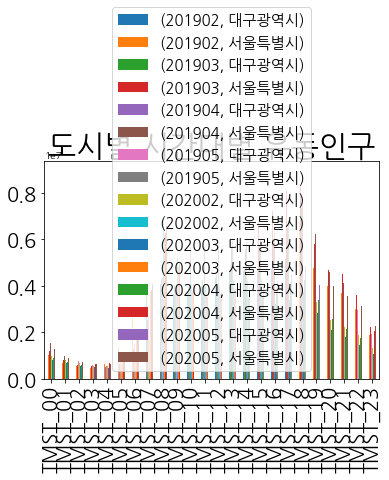

In [8]:
sk_month_move.T.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

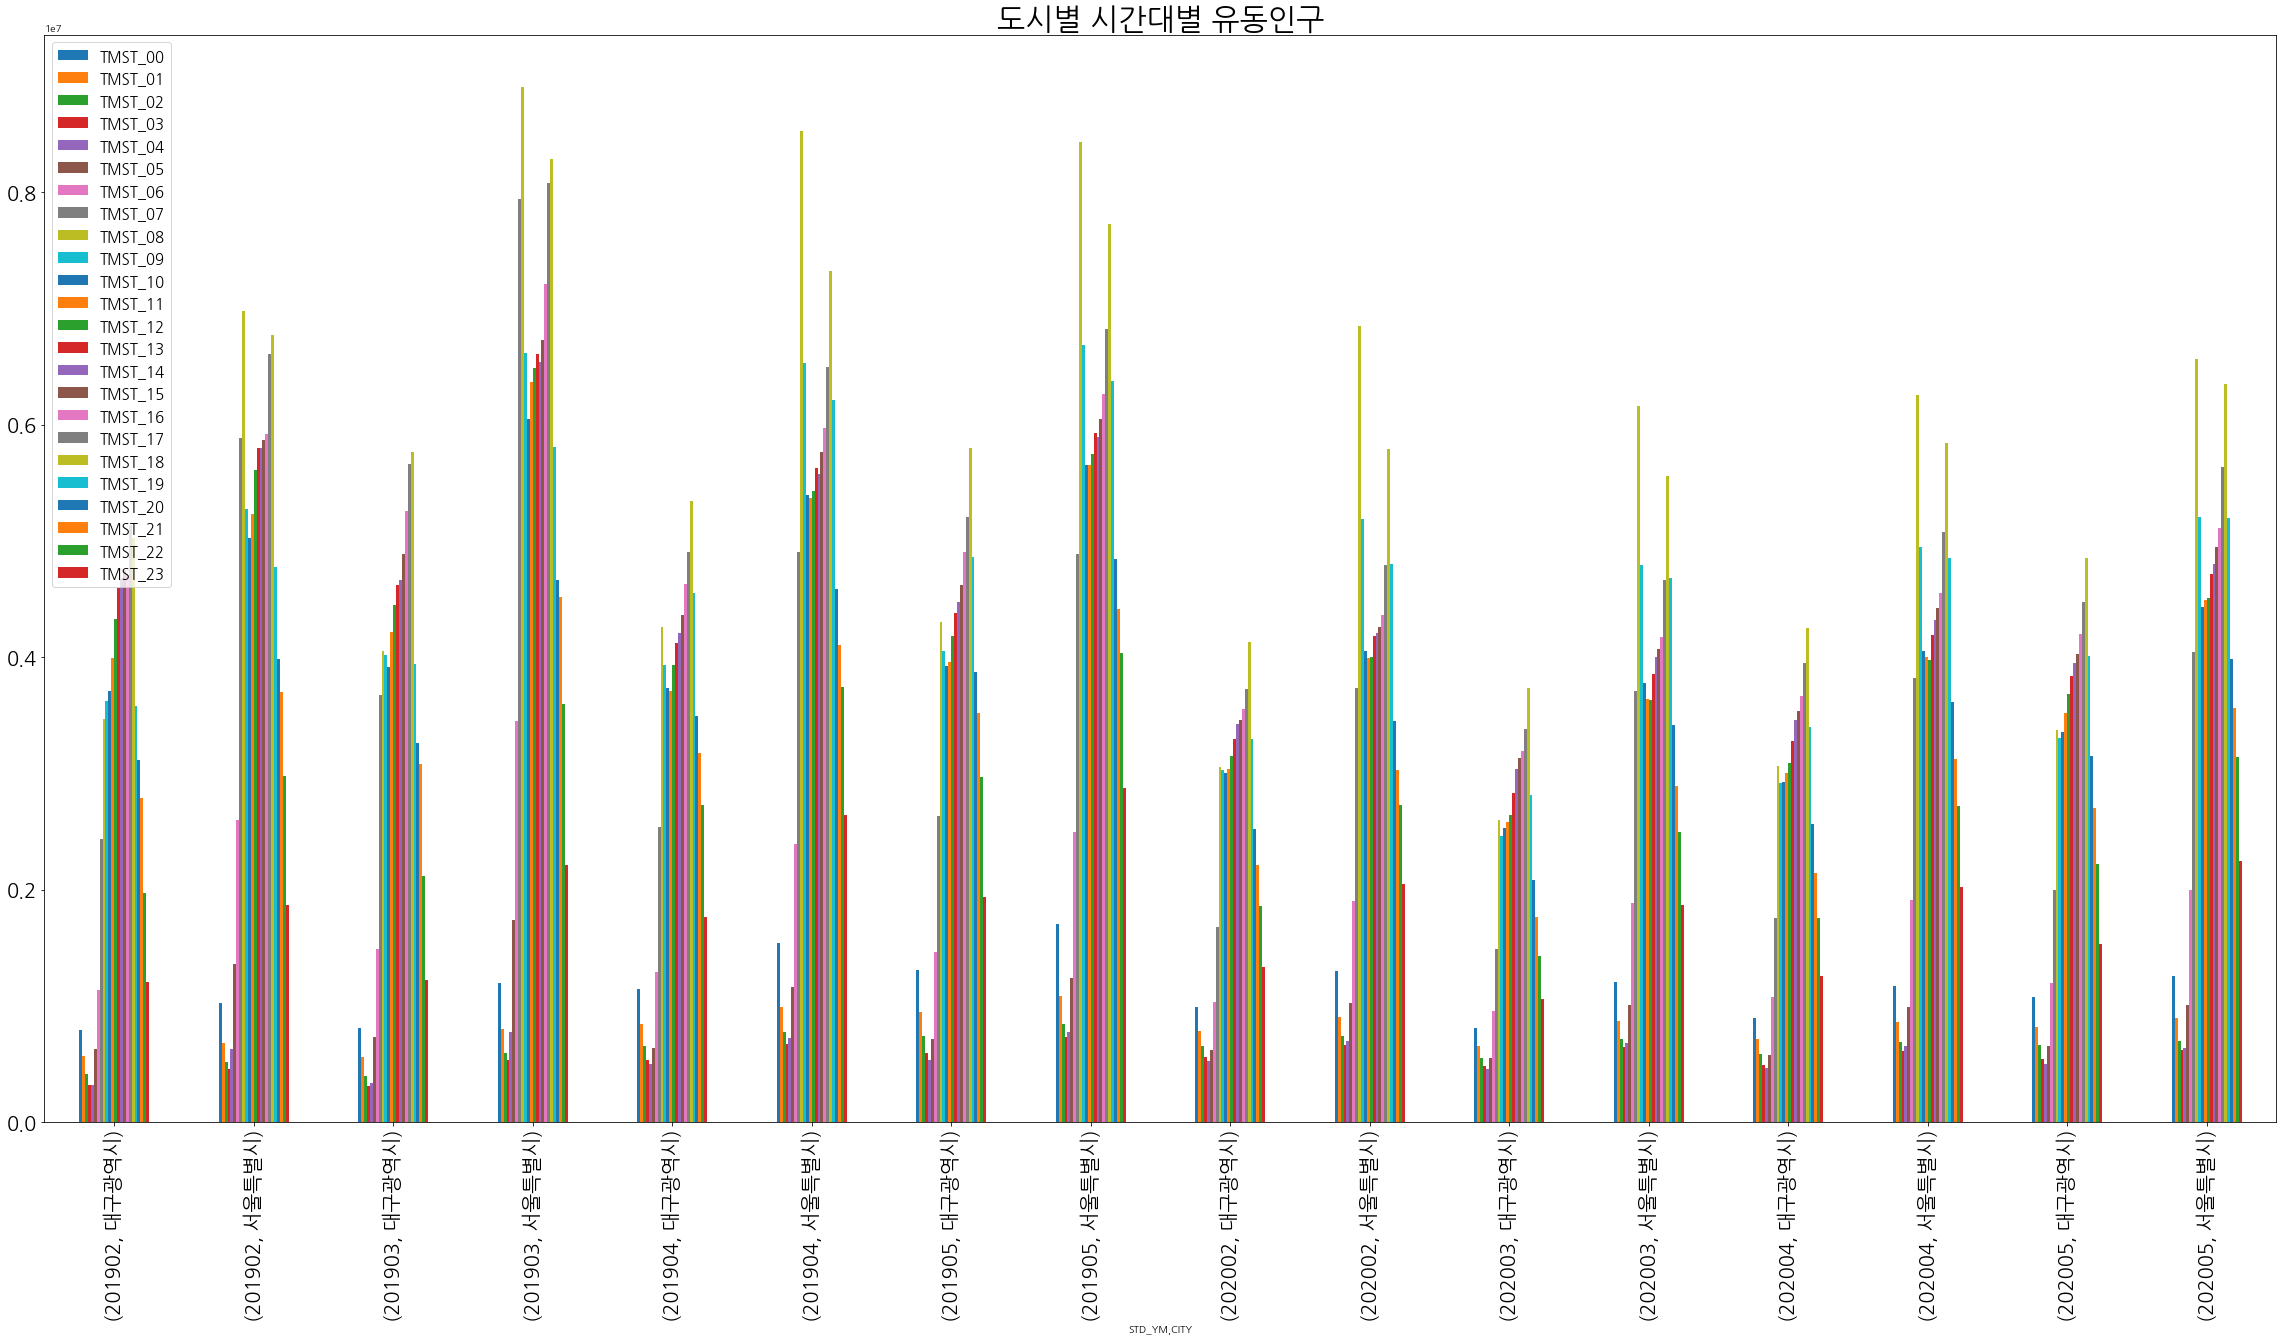

In [9]:
sk_month_move.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

In [10]:
# 서울특별시와 대구광역시 시간별 데이터 나누기

DAEGU_move_per_time = sk_month_move.T.iloc[:, [0, 2, 4, 6, 8, 10, 12, 14]]
SEOUL_move_per_time = sk_month_move.T.iloc[:, [1, 3, 5, 7, 9, 11, 13, 15]]

In [11]:
for i in sk_month_move.T.max(axis = 1):
    index = list(np.where(sk_month_move.T == i))
    
    row_idx = sk_month_move.T.index[index[0]]
    col_idx = sk_month_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 큰 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.max(axis = 0).idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 유동인구가 가장 많은 시간은 {SEOUL_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SEOUL_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'대구광역시에서 유동인구가 가장 많은 시간은 {DAEGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {DAEGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_01시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_02시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_03시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_04시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_05시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_06시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_07시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_08시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_09시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_10시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_11시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_12시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_13시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_14시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_15시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_16시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_17시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_18시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_19시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_20시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_21시의 유동인

In [12]:
for i in sk_month_move.T.min(axis = 1):
    index = list(np.where(sk_month_move.T == i))
    
    row_idx = sk_month_move.T.index[index[0]]
    col_idx = sk_month_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 작은 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 유동인구가 가장 적은 시간은 {SEOUL_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {SEOUL_move_per_time.min(axis = 0).idxmin()[0]}입니다.')
print(f'대구광역시에서 유동인구가 가장 적은 시간은 {DAEGU_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {DAEGU_move_per_time.min(axis = 0).idxmin()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 작은 값은 (201902, '대구광역시')입니다
TMST_01시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시')입니다
TMST_02시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시')입니다
TMST_03시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시')입니다
TMST_04시의 유동인구 값중 가장 작은 값은 (201902, '대구광역시')입니다
TMST_05시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_06시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_07시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_08시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_09시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_10시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_11시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_12시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_13시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_14시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_15시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_16시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_17시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_18시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_19시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_20시의 유동인구 값중 가장 작은 값은 (202003, '대구광

### - 일반적으로 서울시의 유동인구가 대구시보다 많고, 출근시간인 7-9시와 퇴근시간인 17-19시가 다른 시간대보다 유동인구가 많은것을 볼 수 있음.

### 1-2. 월별 도시별 유동인구 (세부)

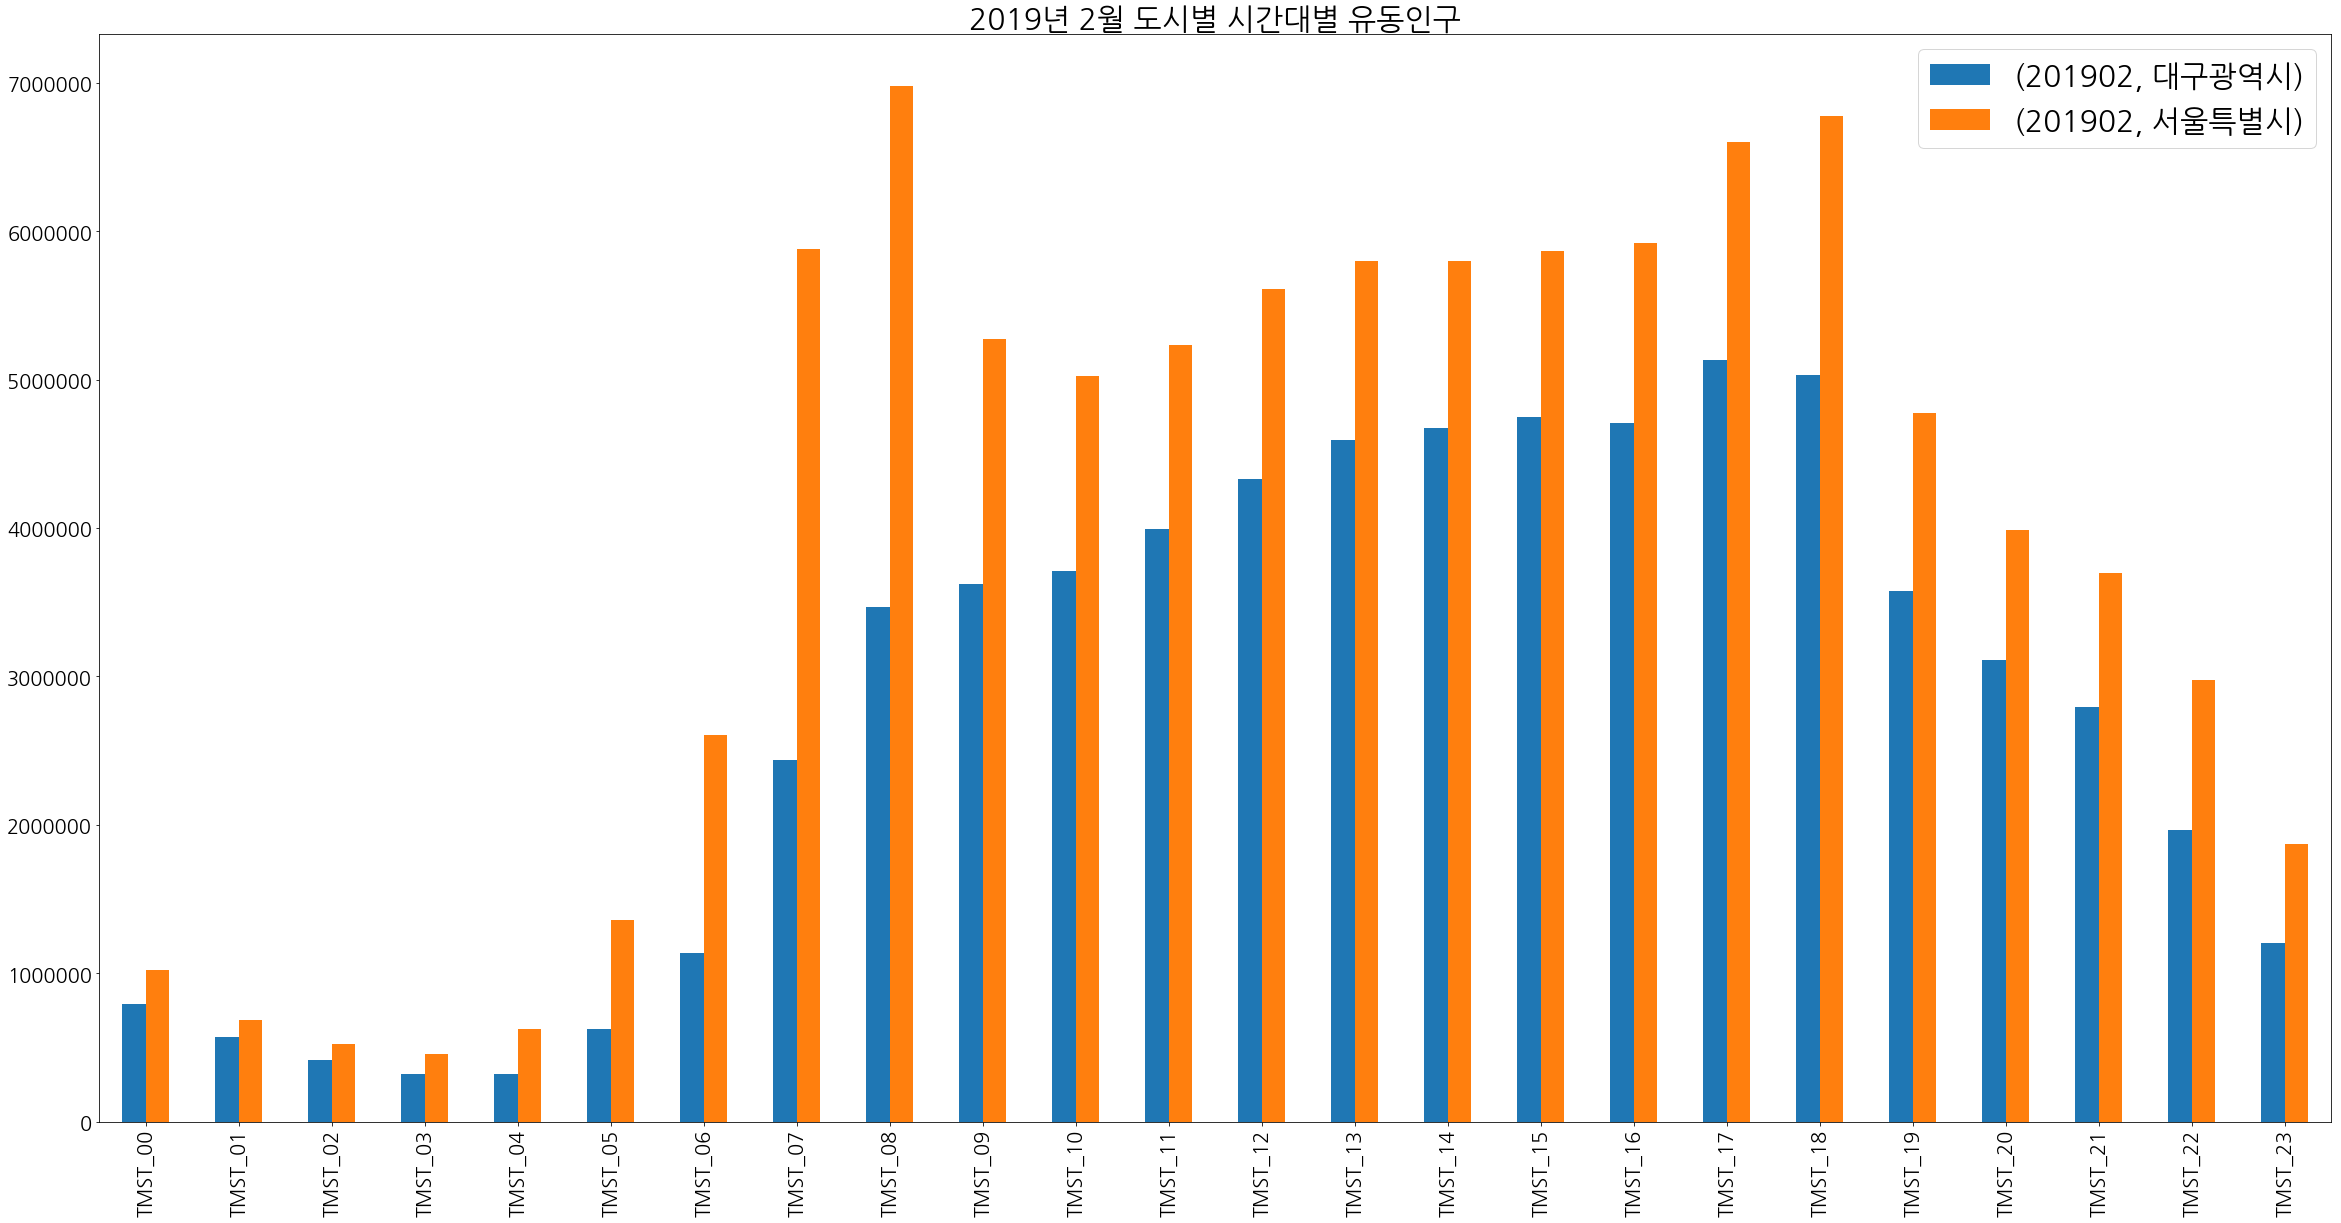

In [13]:
sk_month_move.T.iloc[:, 0:2].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2019년 2월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [14]:
start = 0
end = 2
YM = '2019년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201902, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201902, '대구광역시')입니다.
서울특별시에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_17입니다.
서울특별시에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.


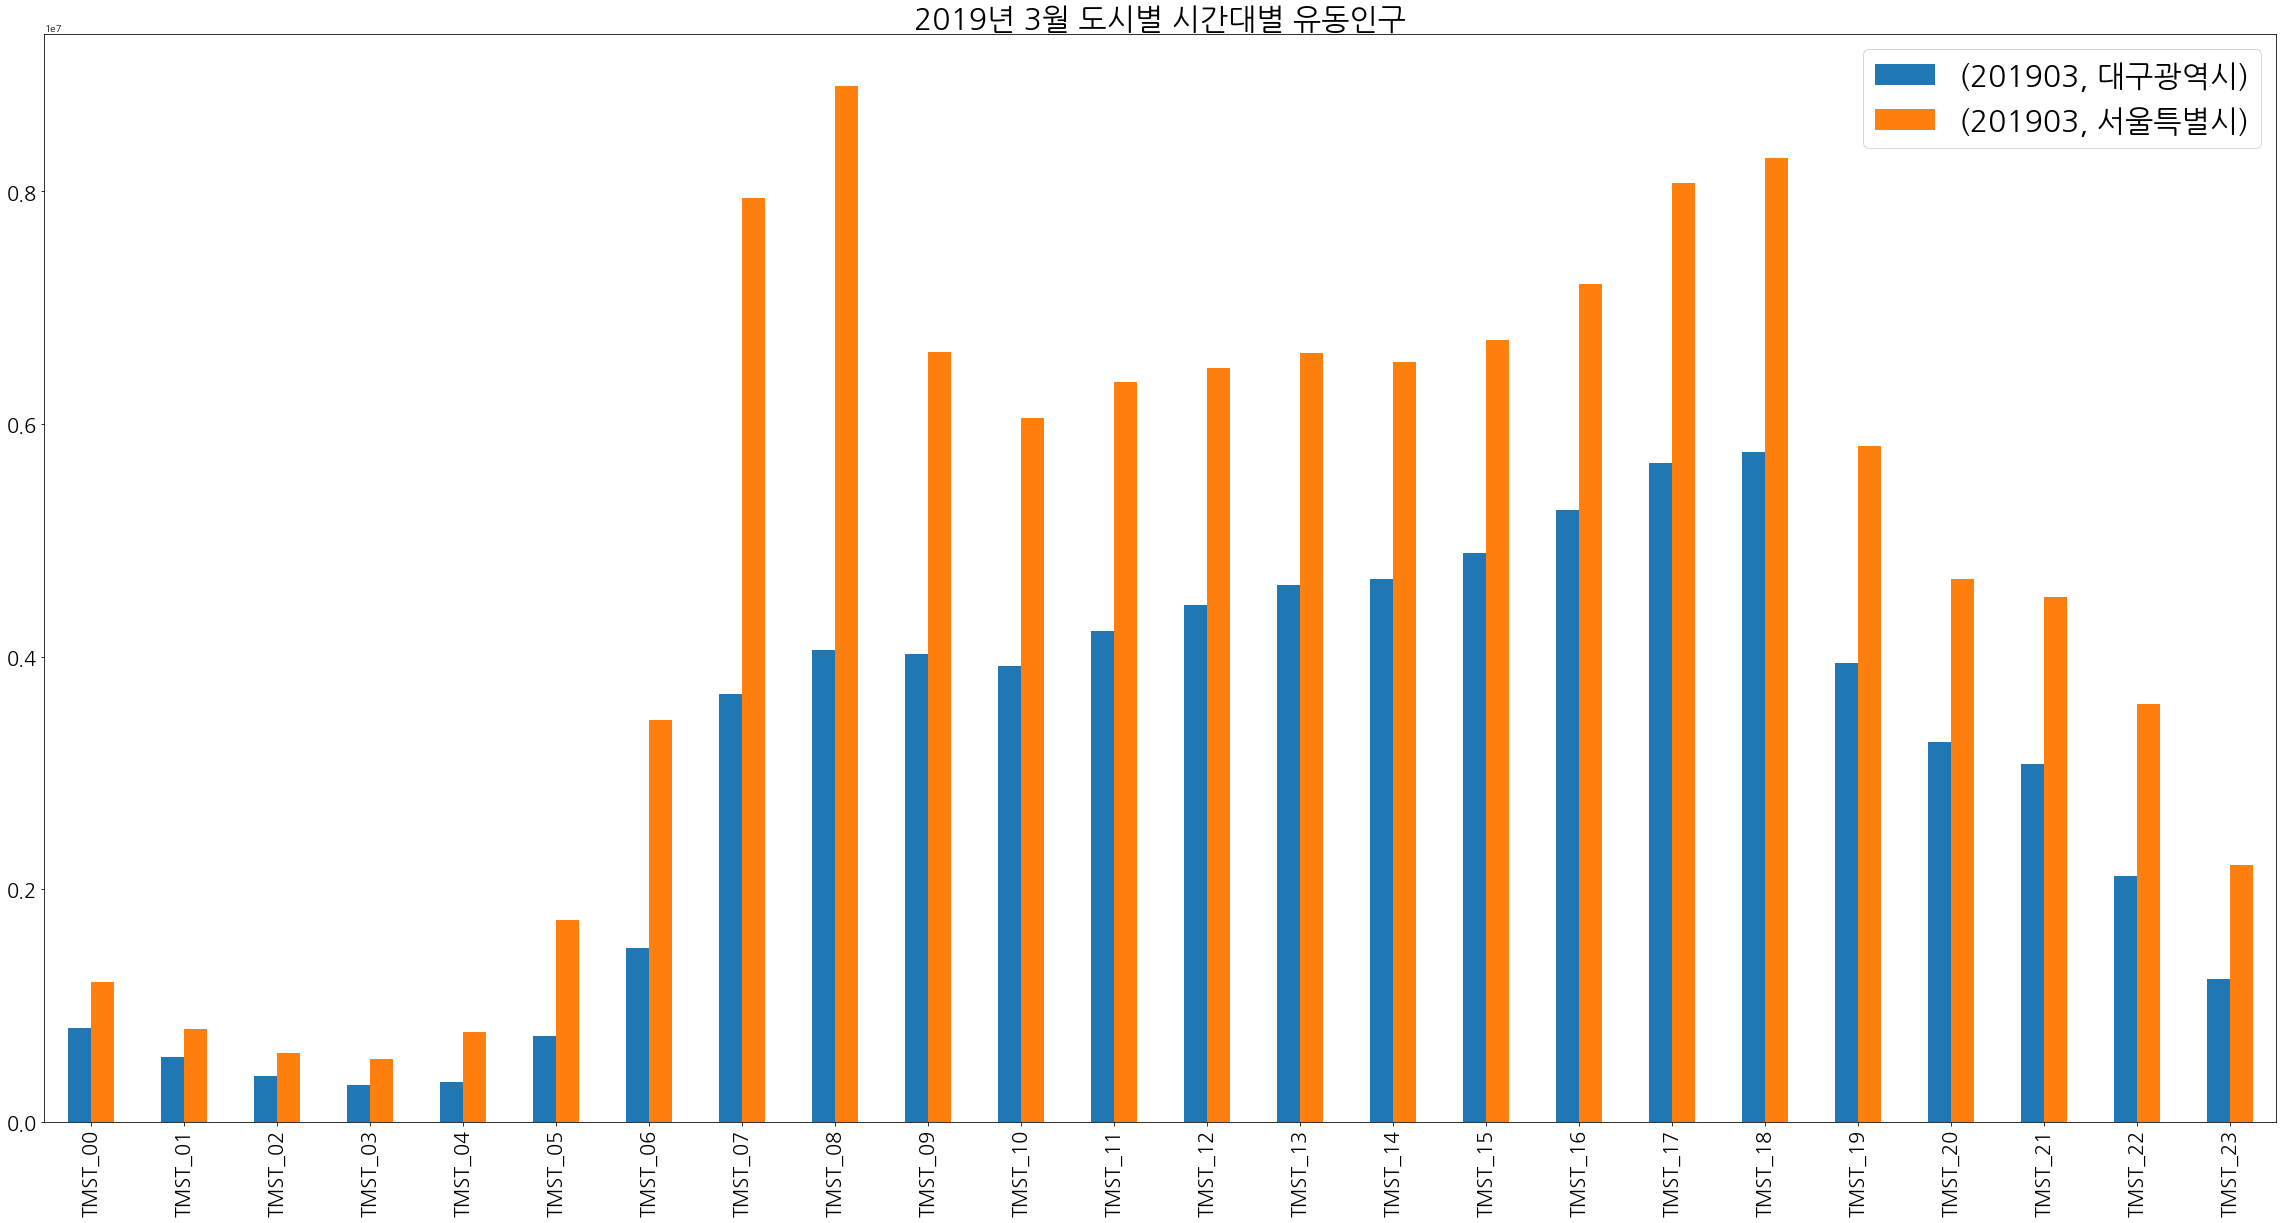

In [15]:
sk_month_move.T.iloc[:, 2:4].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2019년 3월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [16]:
start = 2
end = 4
YM = '2019년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201903, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201903, '대구광역시')입니다.
서울특별시에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.


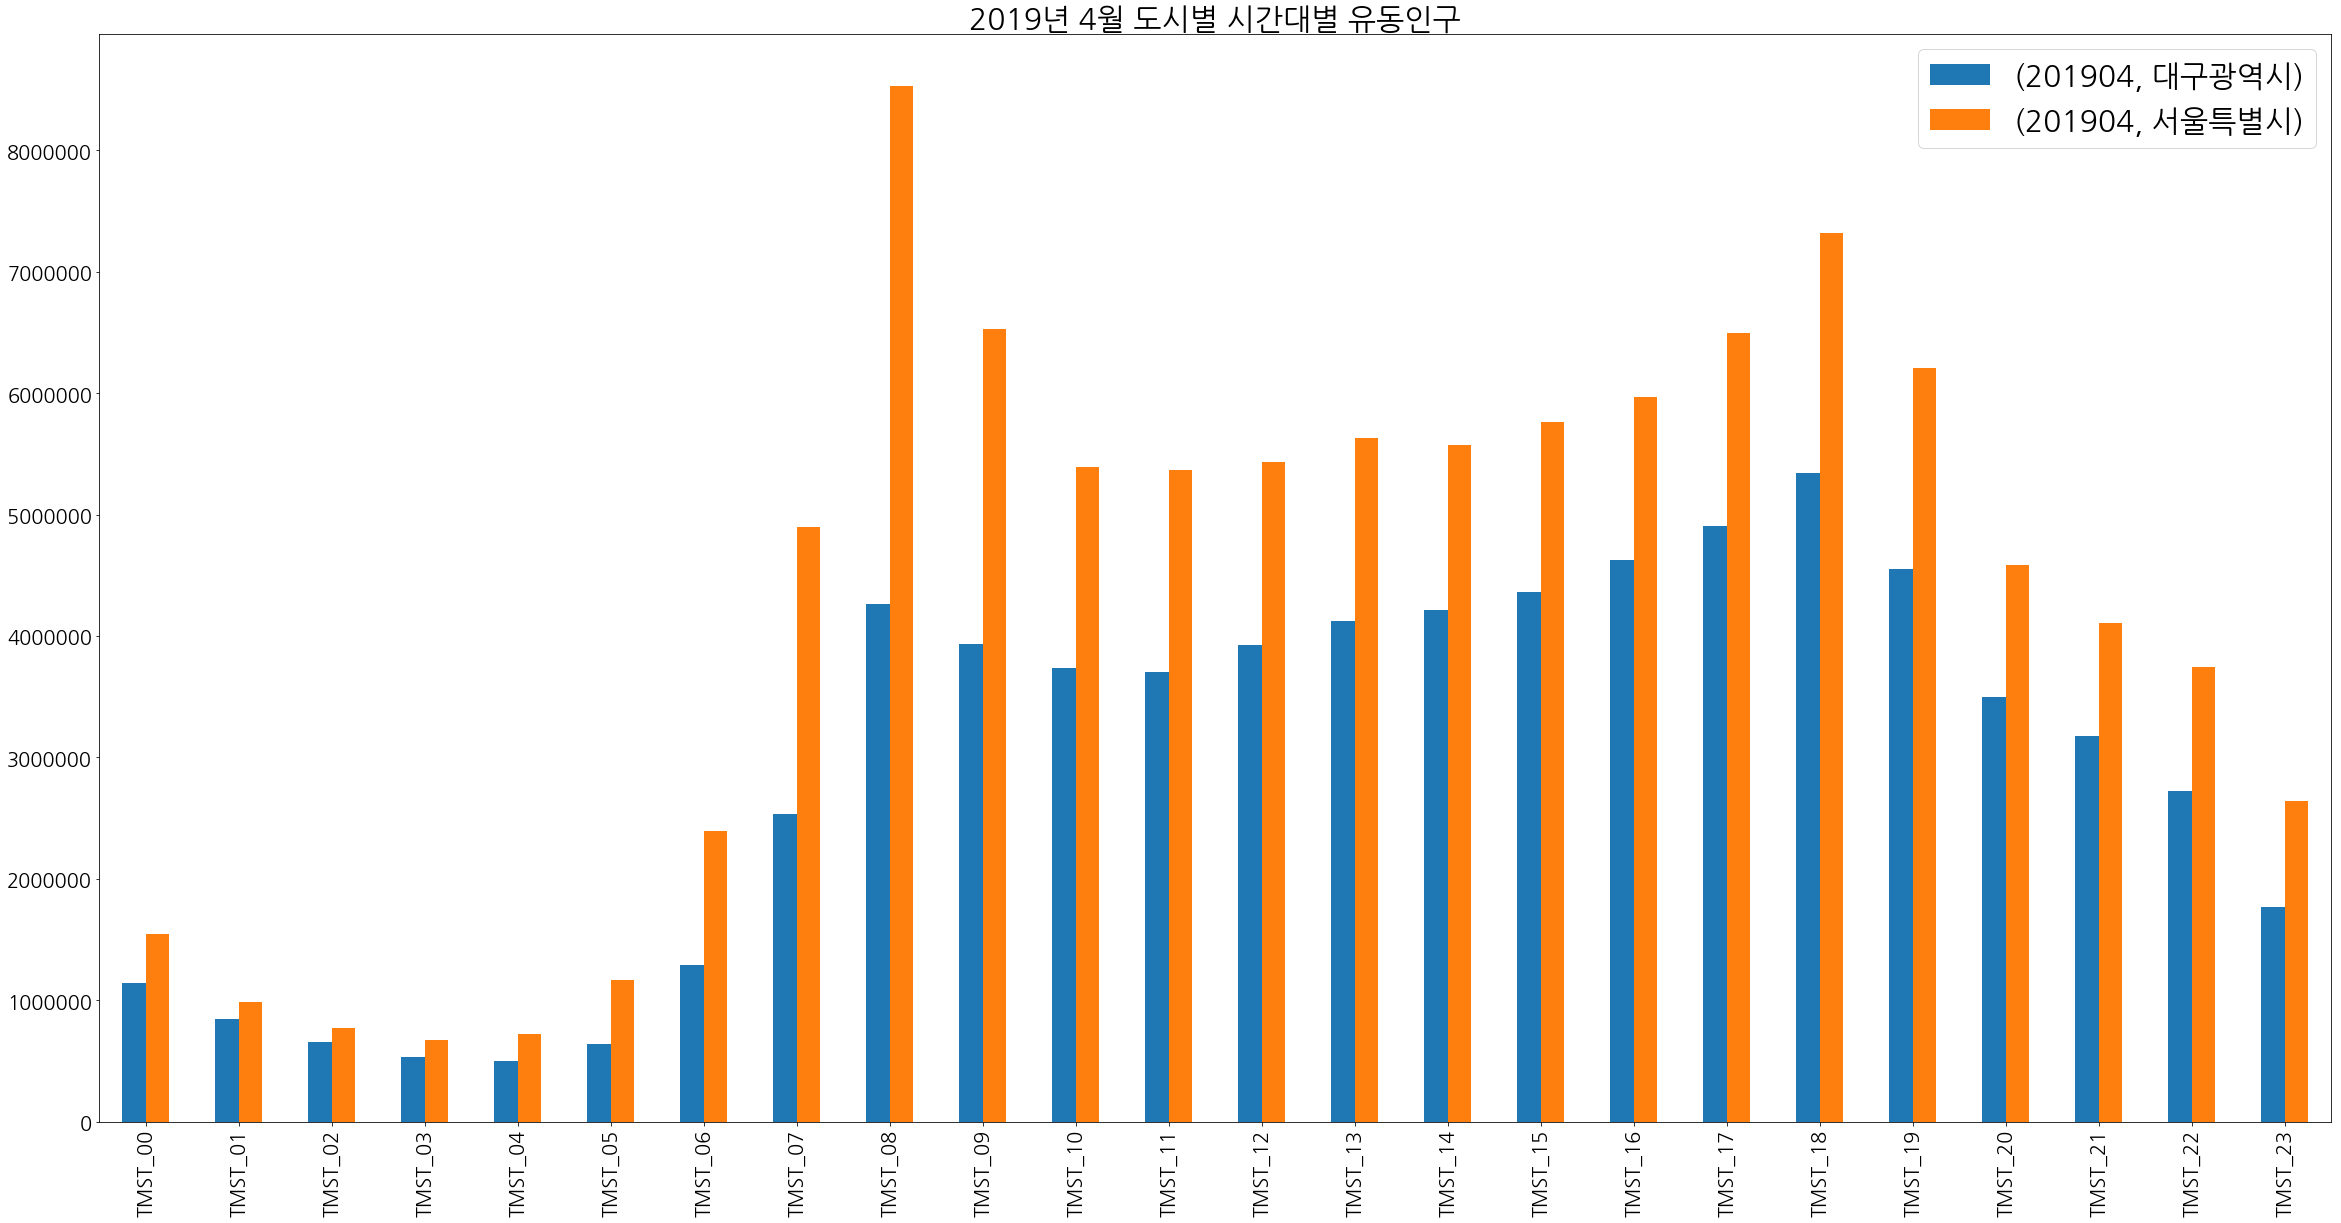

In [17]:
sk_month_move.T.iloc[:, 4:6].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2019년 4월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [18]:
start = 4
end = 6
YM = '2019년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201904, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201904, '대구광역시')입니다.
서울특별시에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


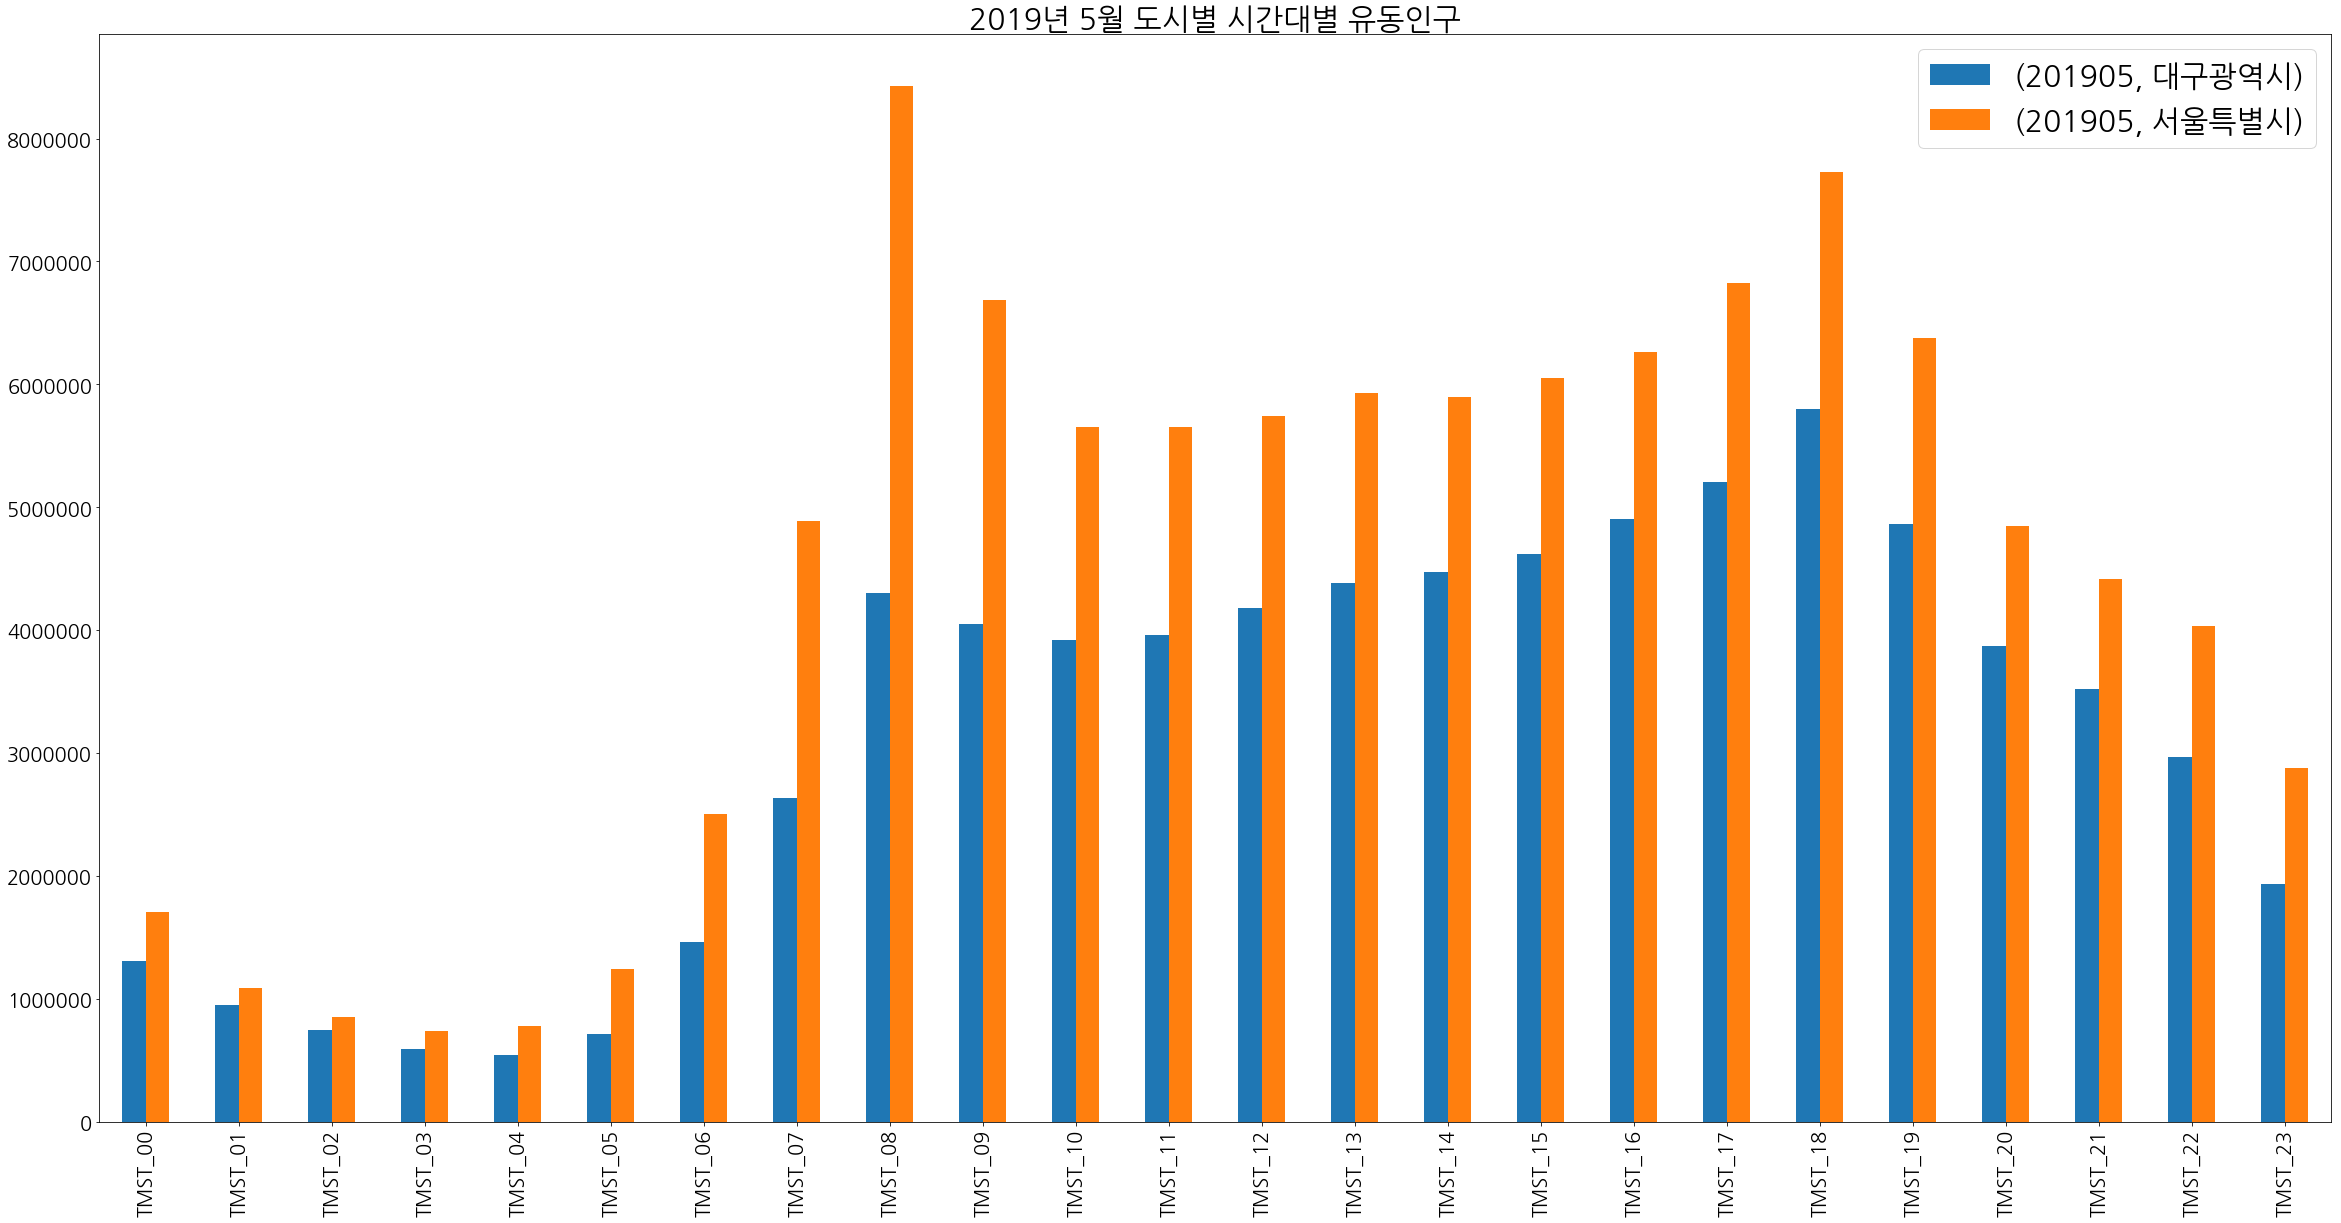

In [19]:
sk_month_move.T.iloc[:, 6:8].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2019년 5월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [20]:
start = 6
end = 8
YM = '2019년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201905, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201905, '대구광역시')입니다.
서울특별시에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


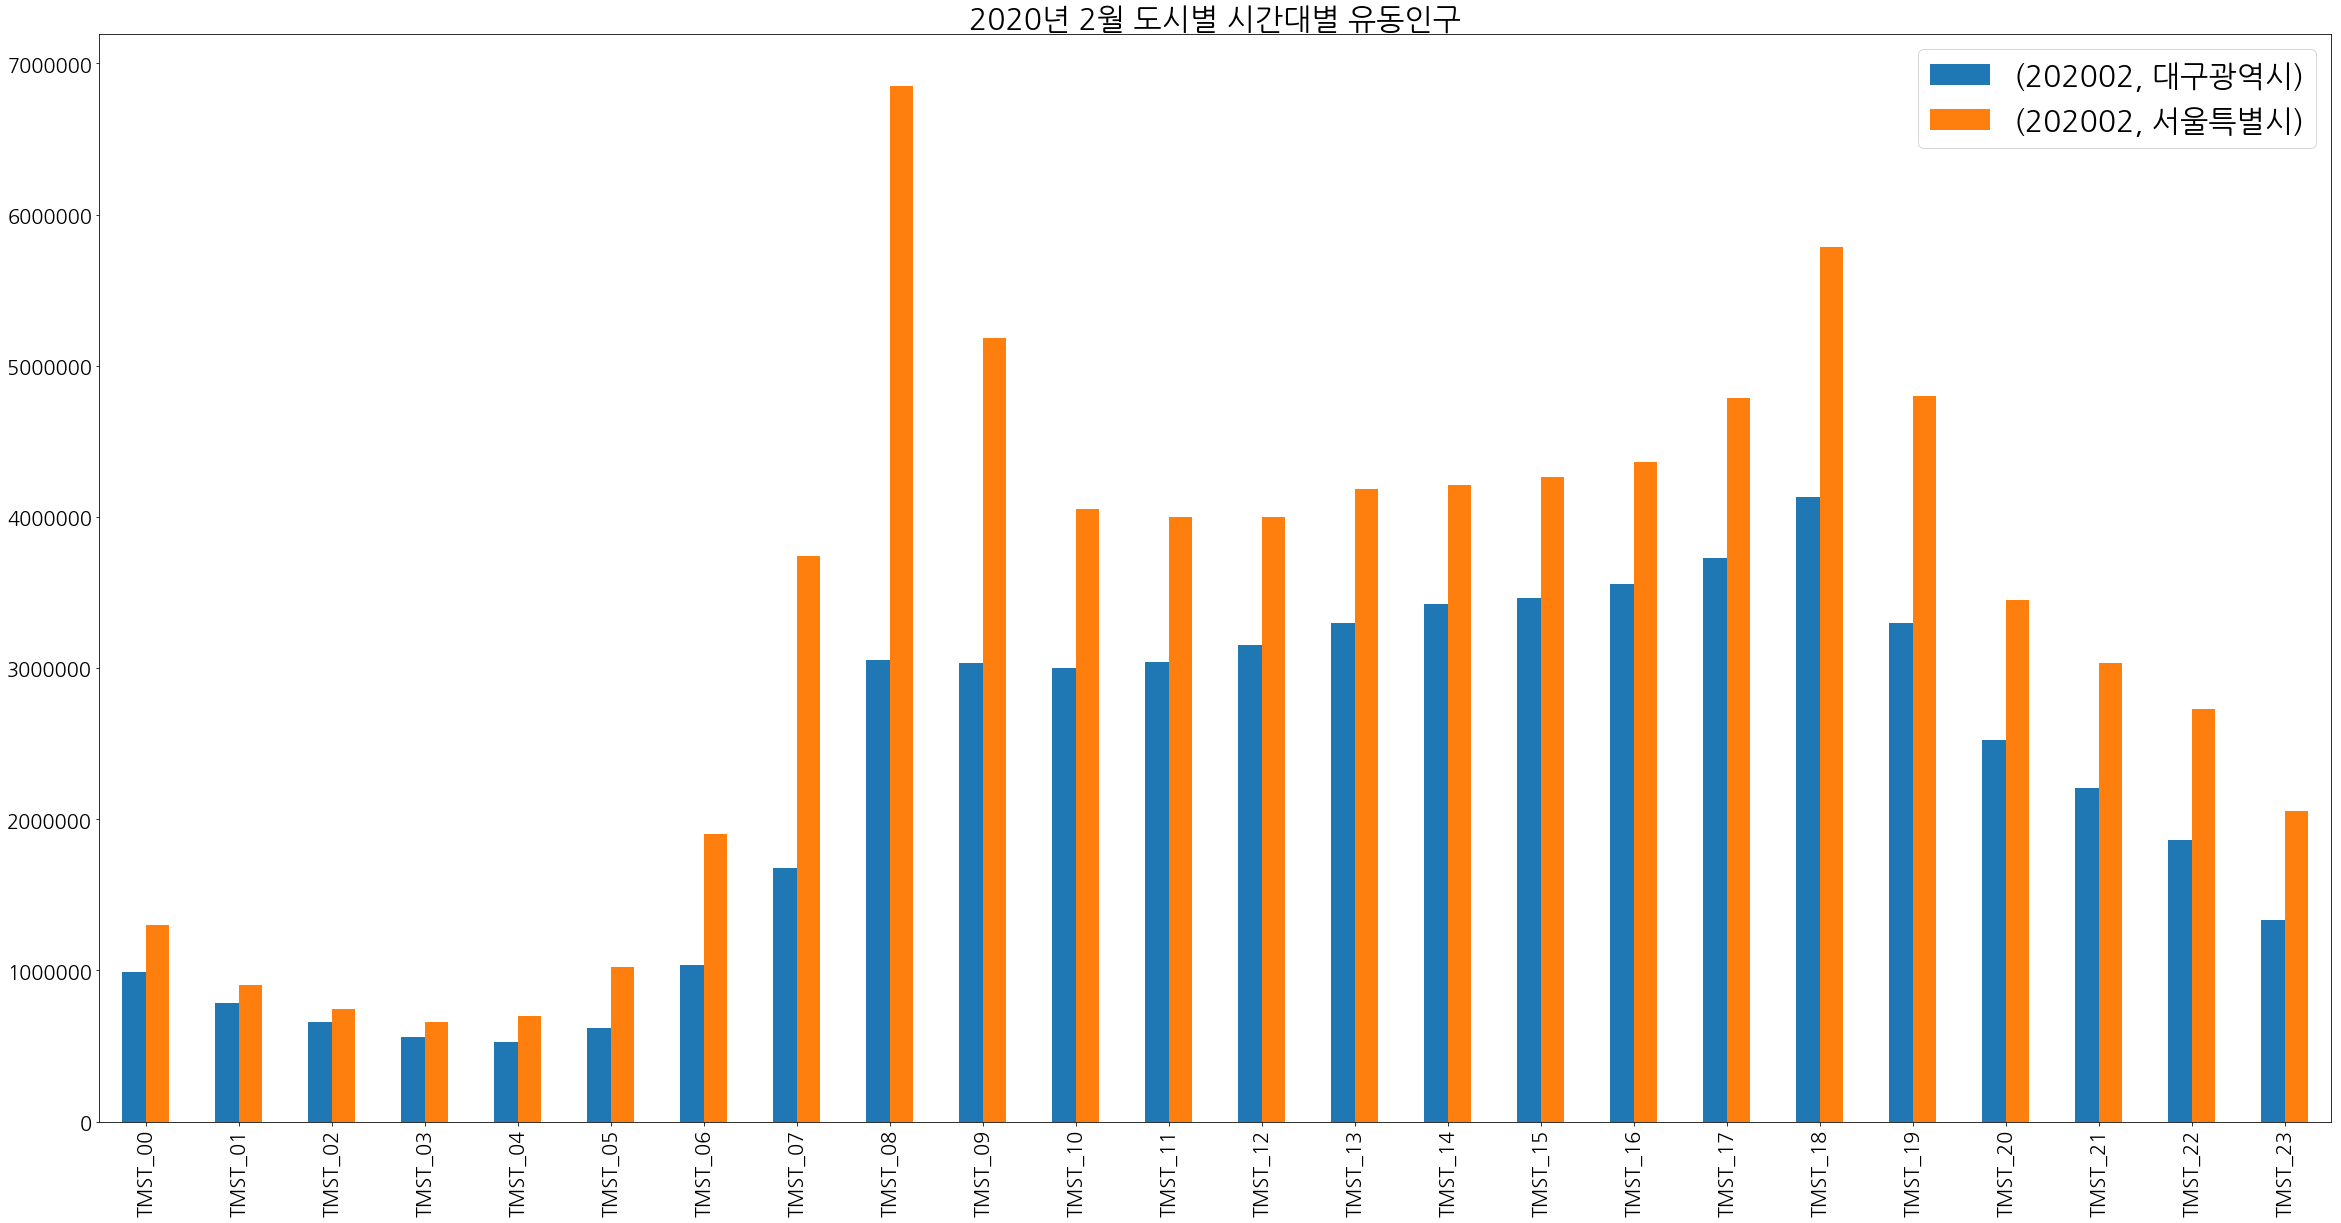

In [21]:
sk_month_move.T.iloc[:, 8:10].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2020년 2월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [22]:
start = 8
end = 10
YM = '2020년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202002, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202002, '대구광역시')입니다.
서울특별시에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


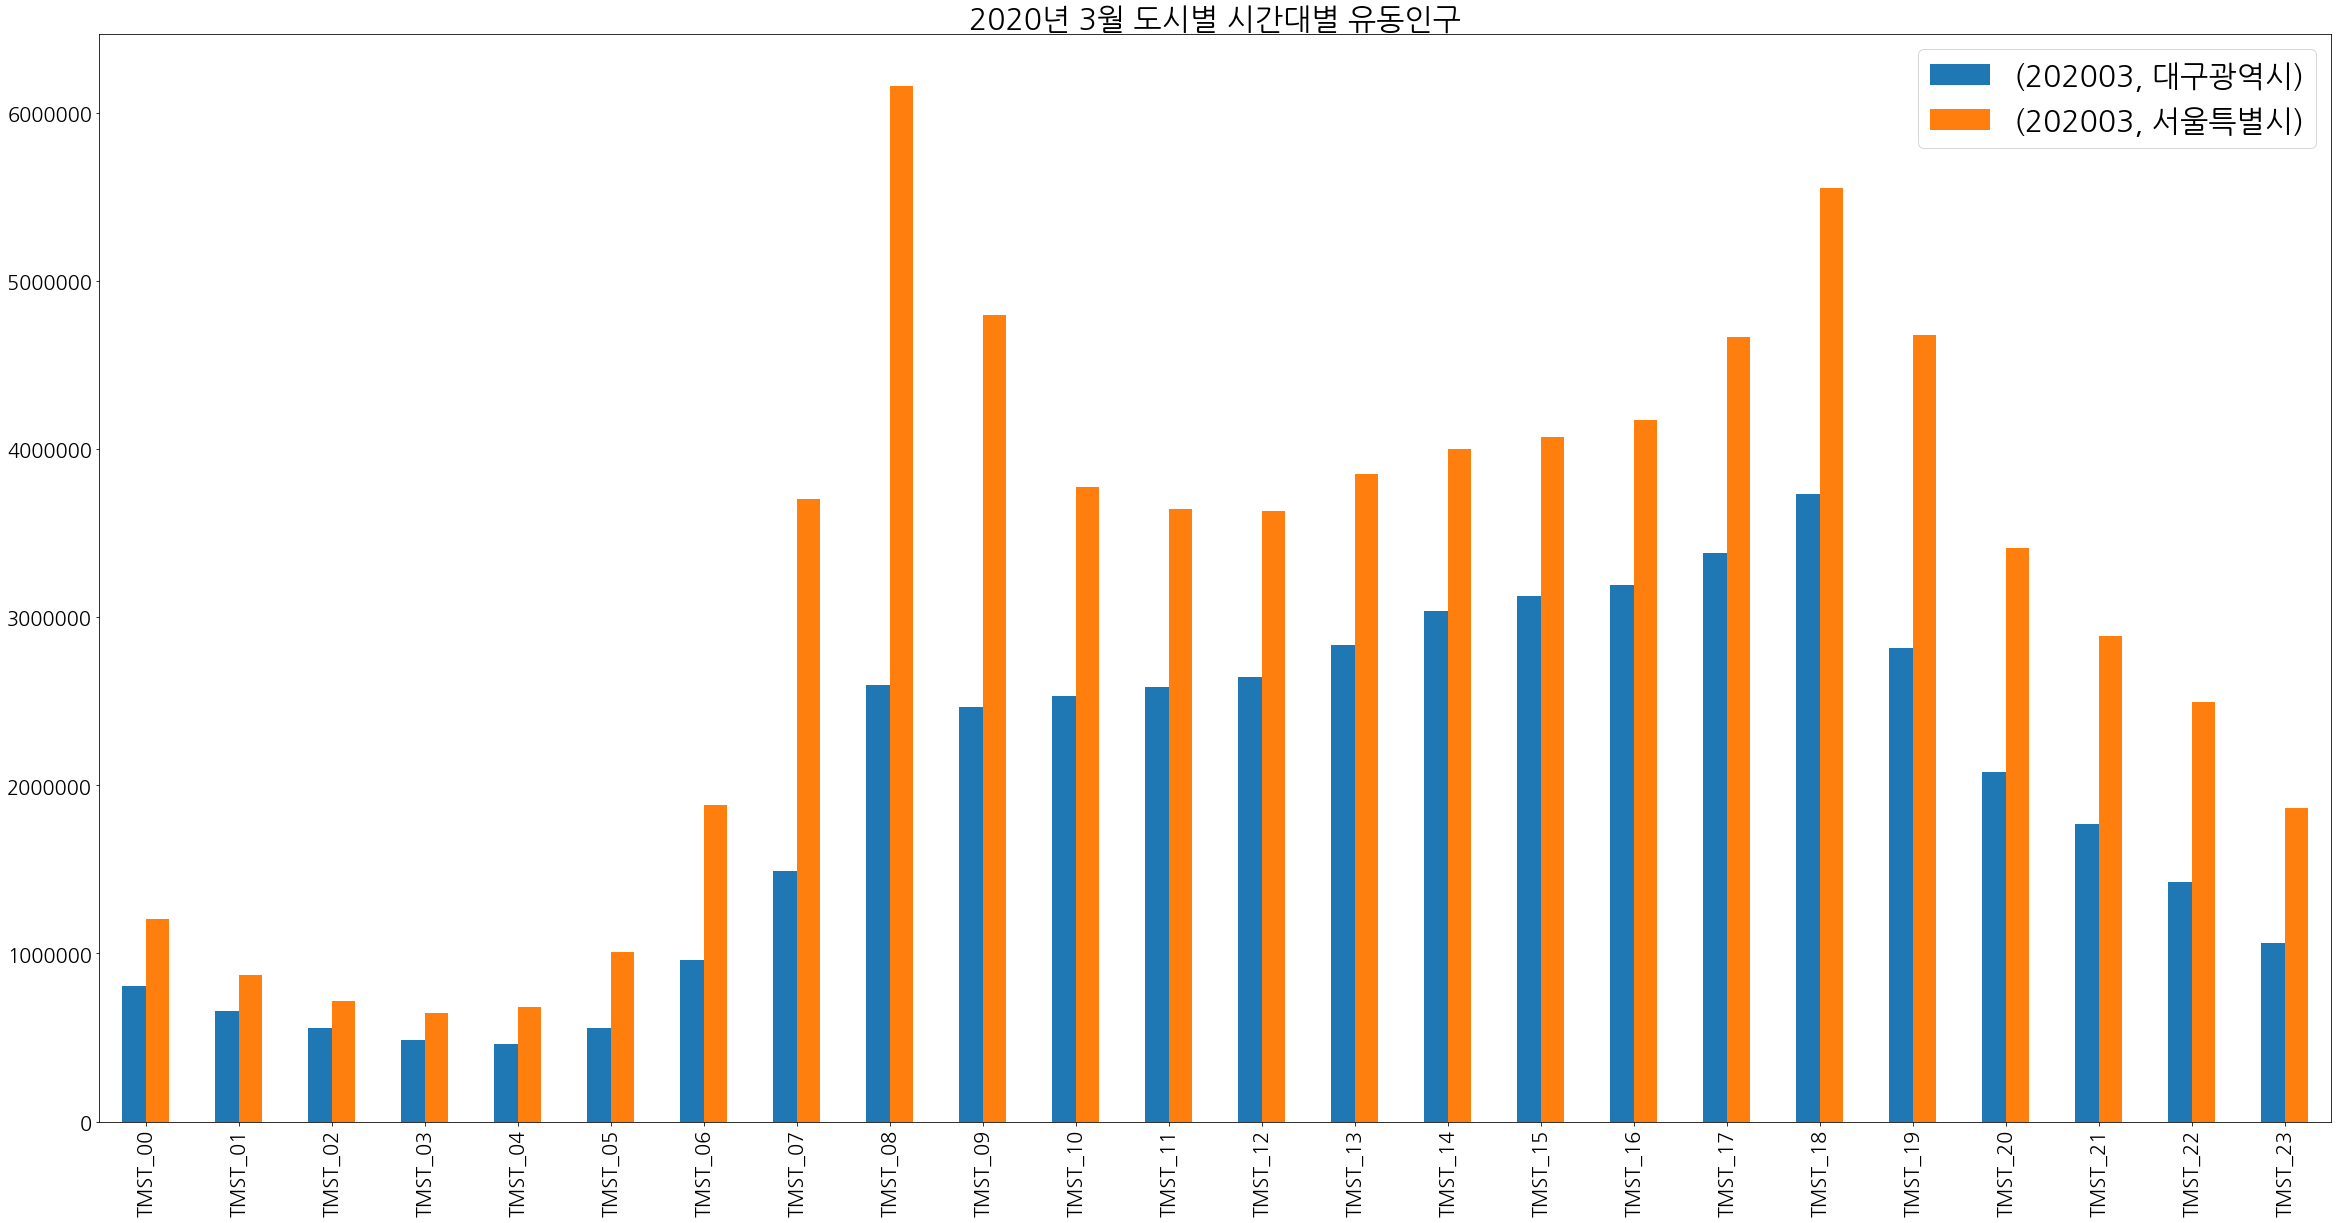

In [23]:
sk_month_move.T.iloc[:, 10:12].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2020년 3월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [24]:
start = 10
end = 12
YM = '2020년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202003, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202003, '대구광역시')입니다.
서울특별시에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


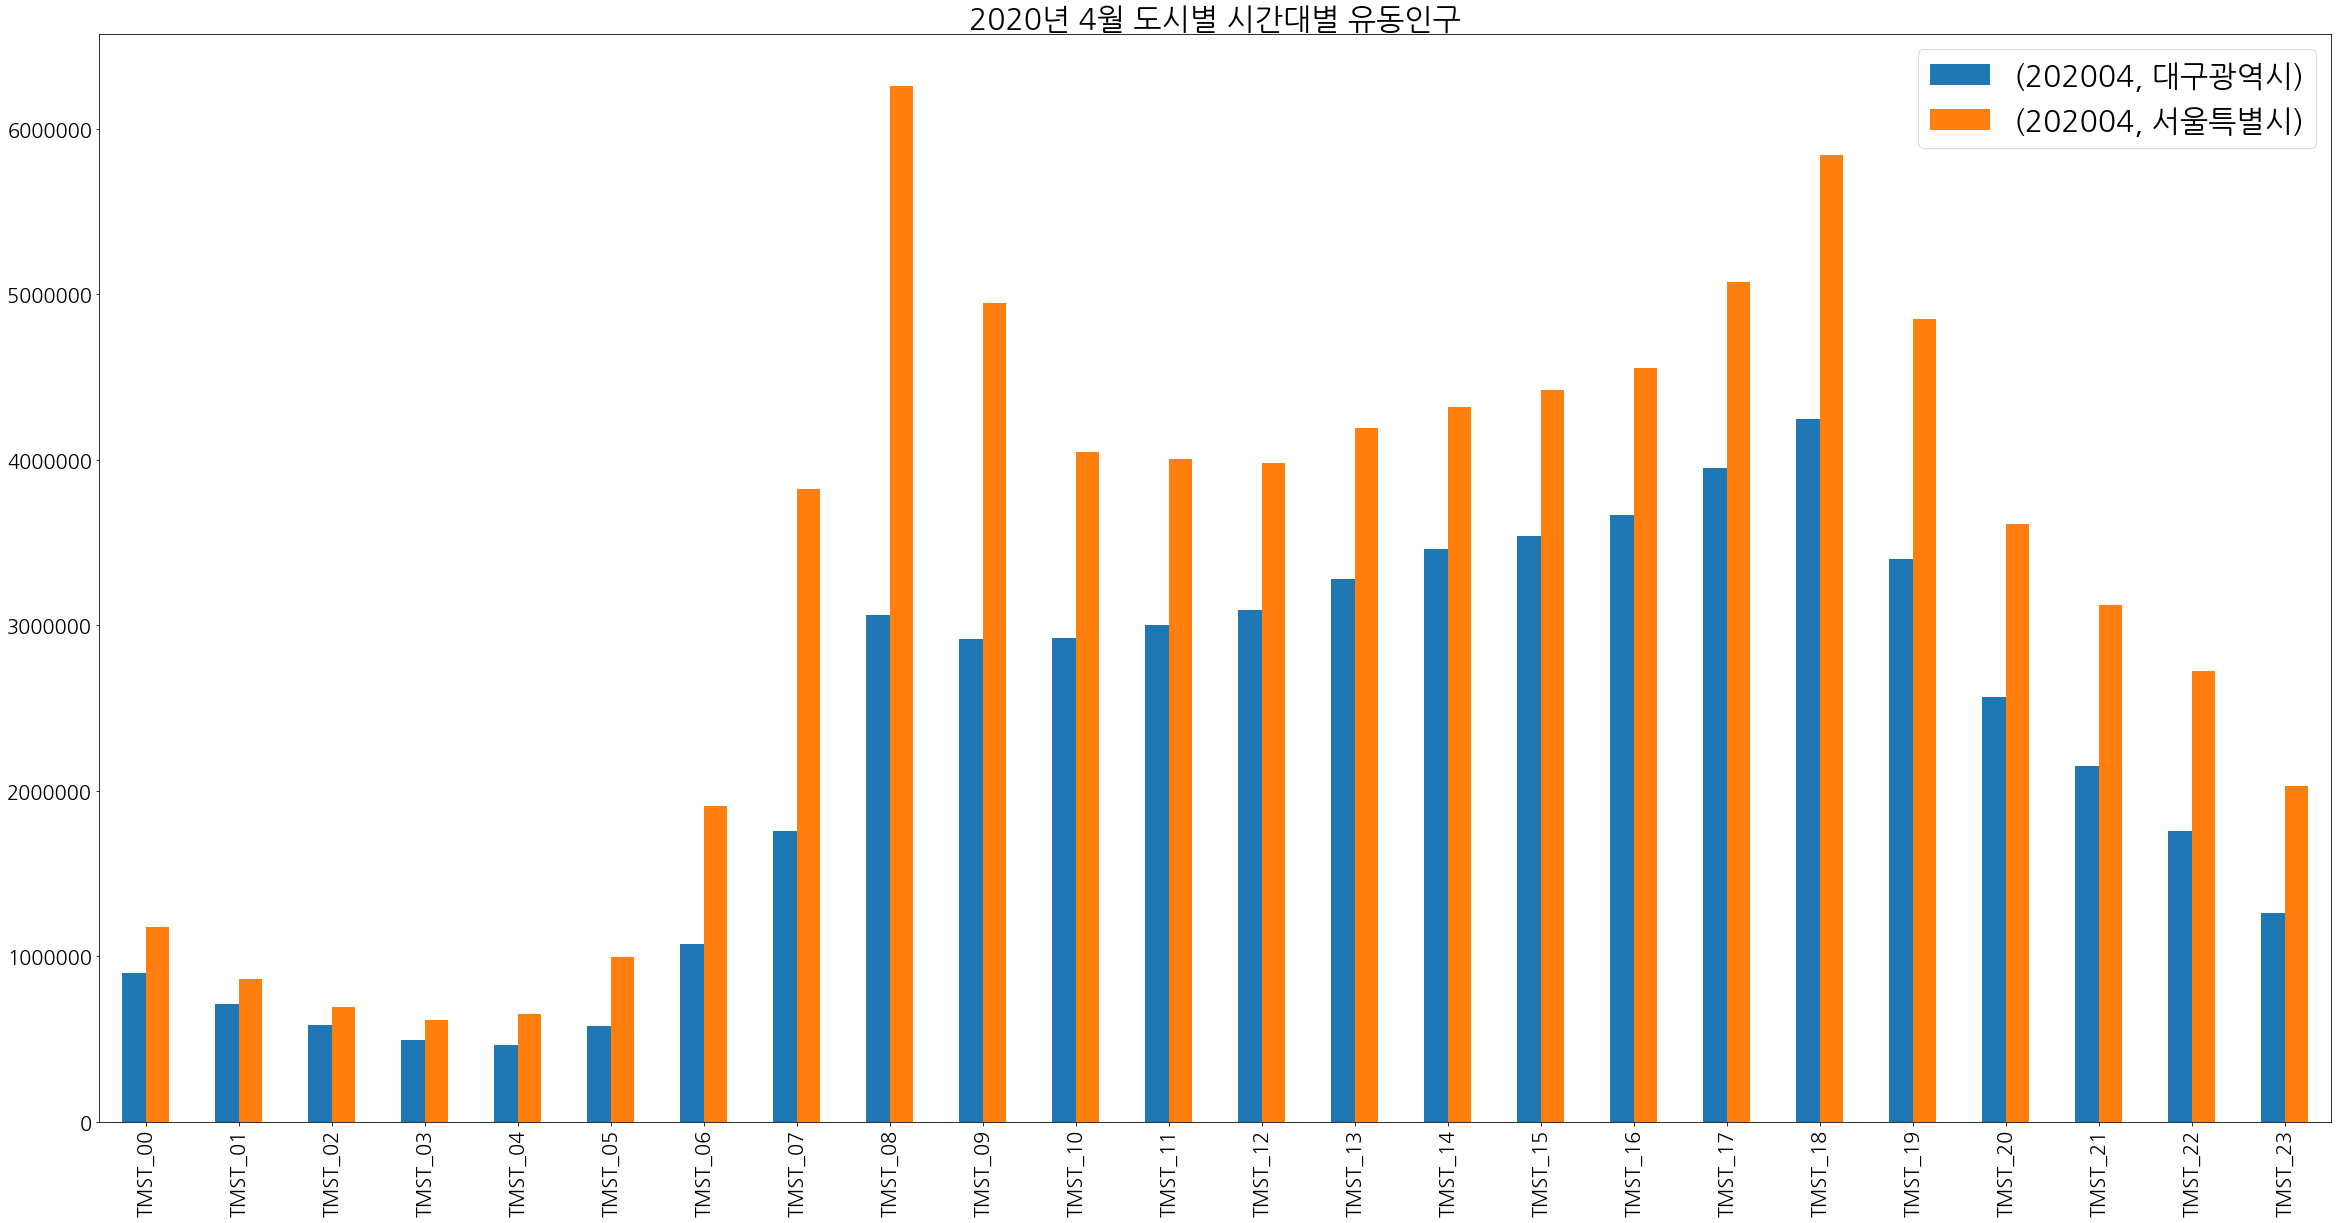

In [25]:
sk_month_move.T.iloc[:, 12:14].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2020년 4월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [26]:
start = 12
end = 14
YM = '2020년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202004, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202004, '대구광역시')입니다.
서울특별시에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


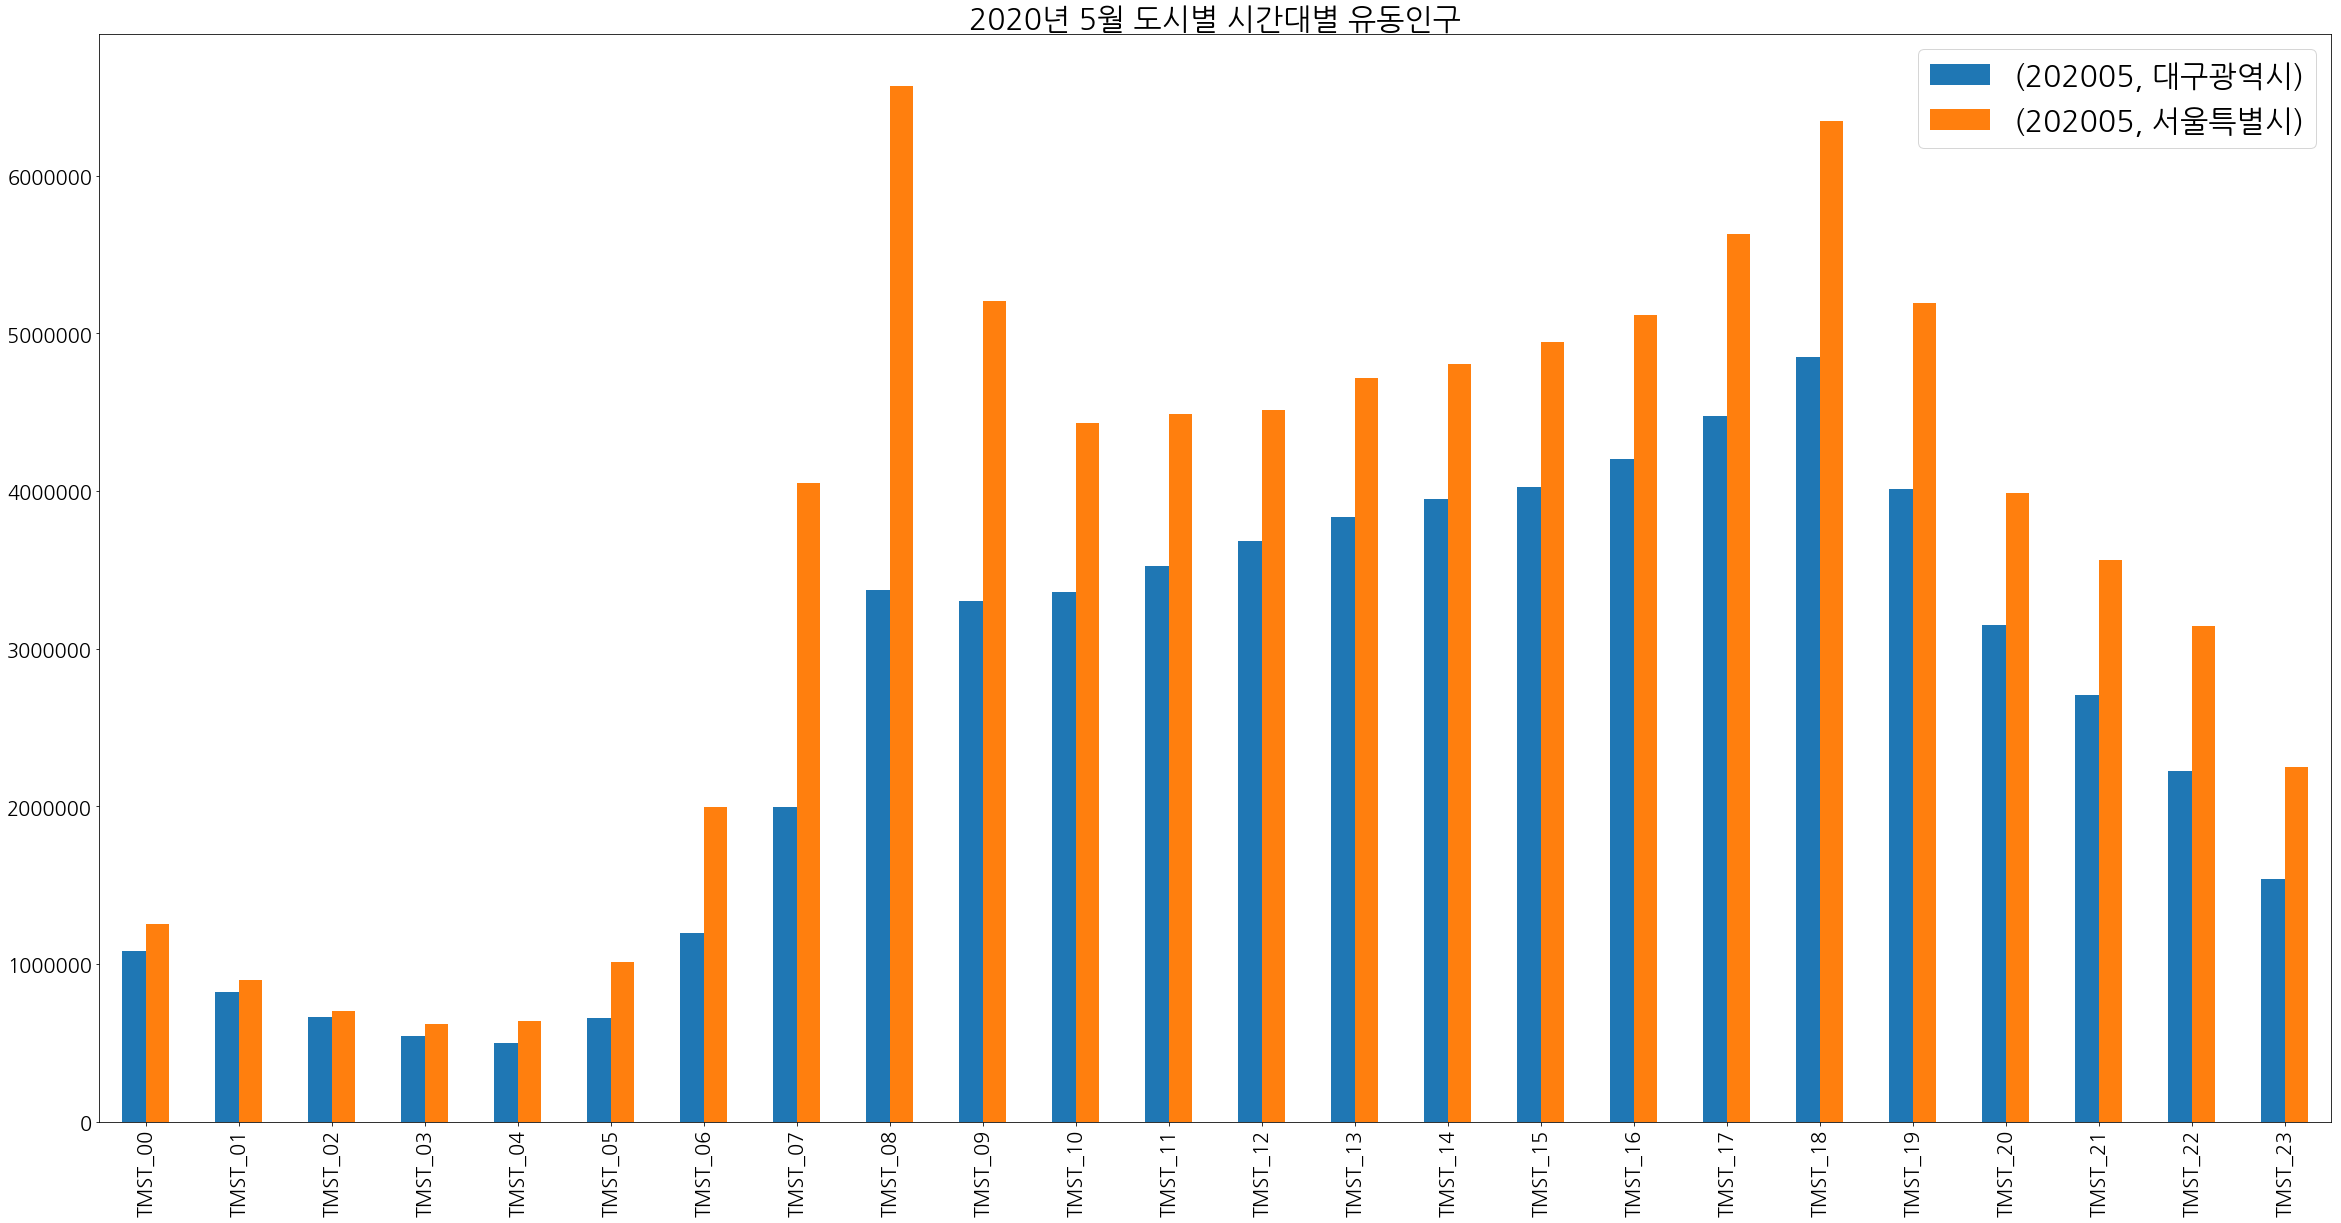

In [27]:
sk_month_move.T.iloc[:, 14:16].plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('2020년 5월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [28]:
start = 14
end = 16
YM = '2020년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202005, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202005, '대구광역시')입니다.
서울특별시에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


## 2-1. 구별 시간대별 유동인구

In [29]:
sk_data_TIME.GU_NAME = sk_data_TIME.CITY + sk_data_TIME.GU_NAME

In [30]:
sk_month_GU_move = sk_data_TIME.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['GU_NAME']]).sum().iloc[:, 2:]

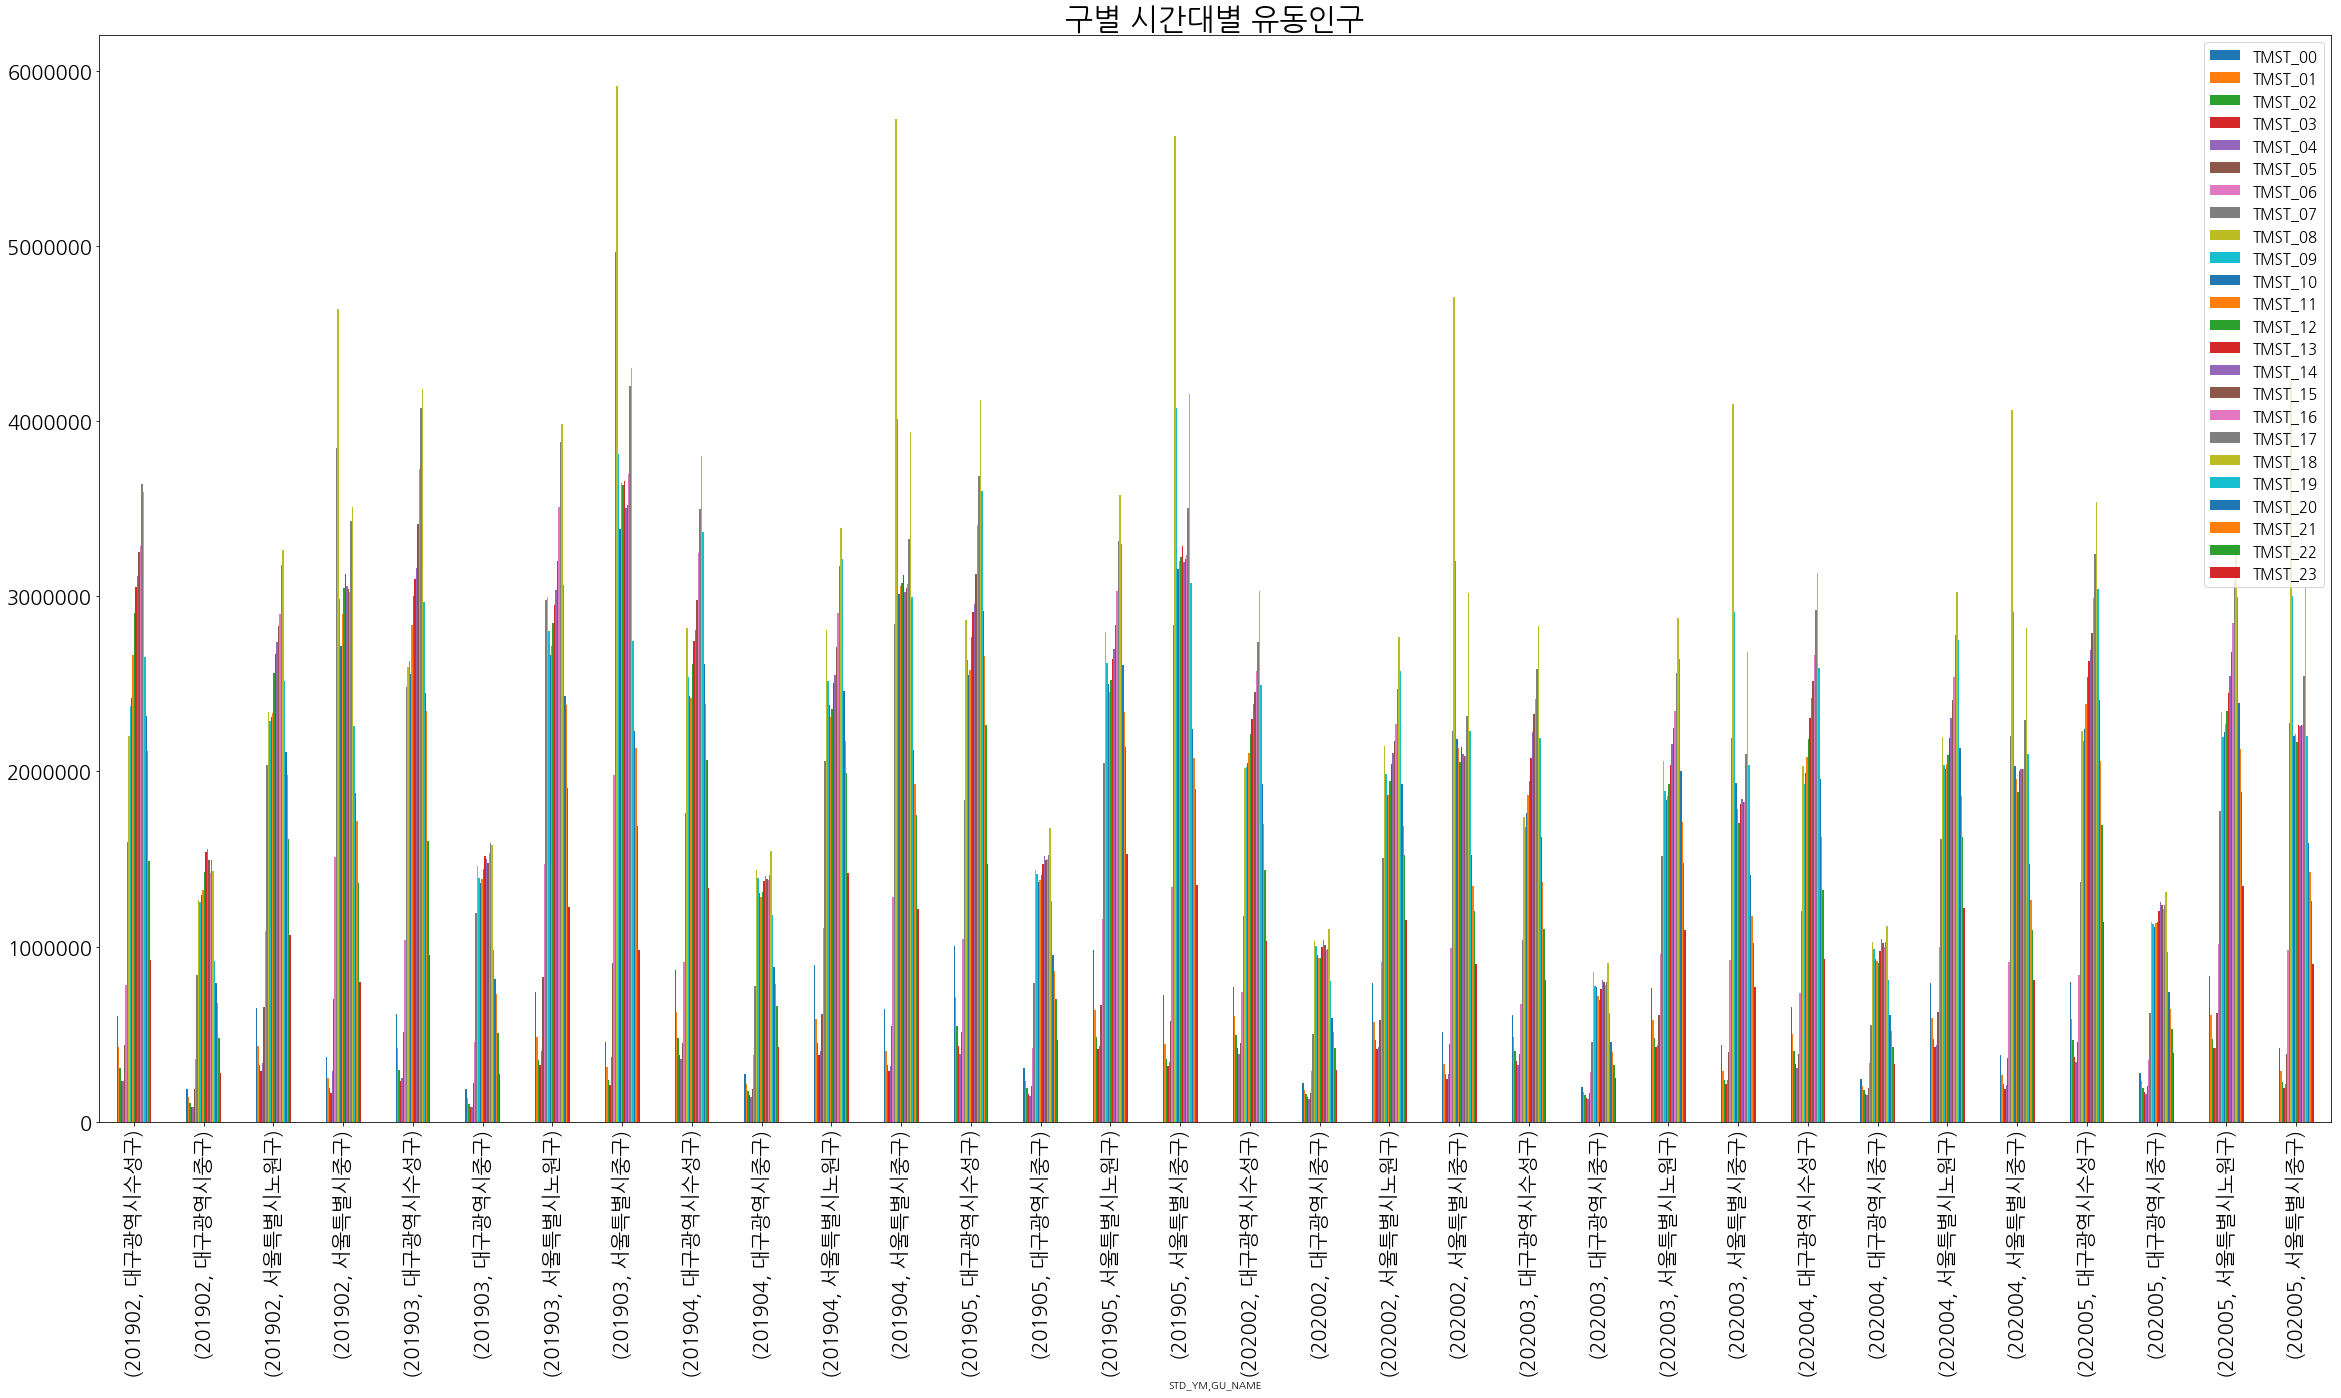

In [31]:
sk_month_GU_move.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

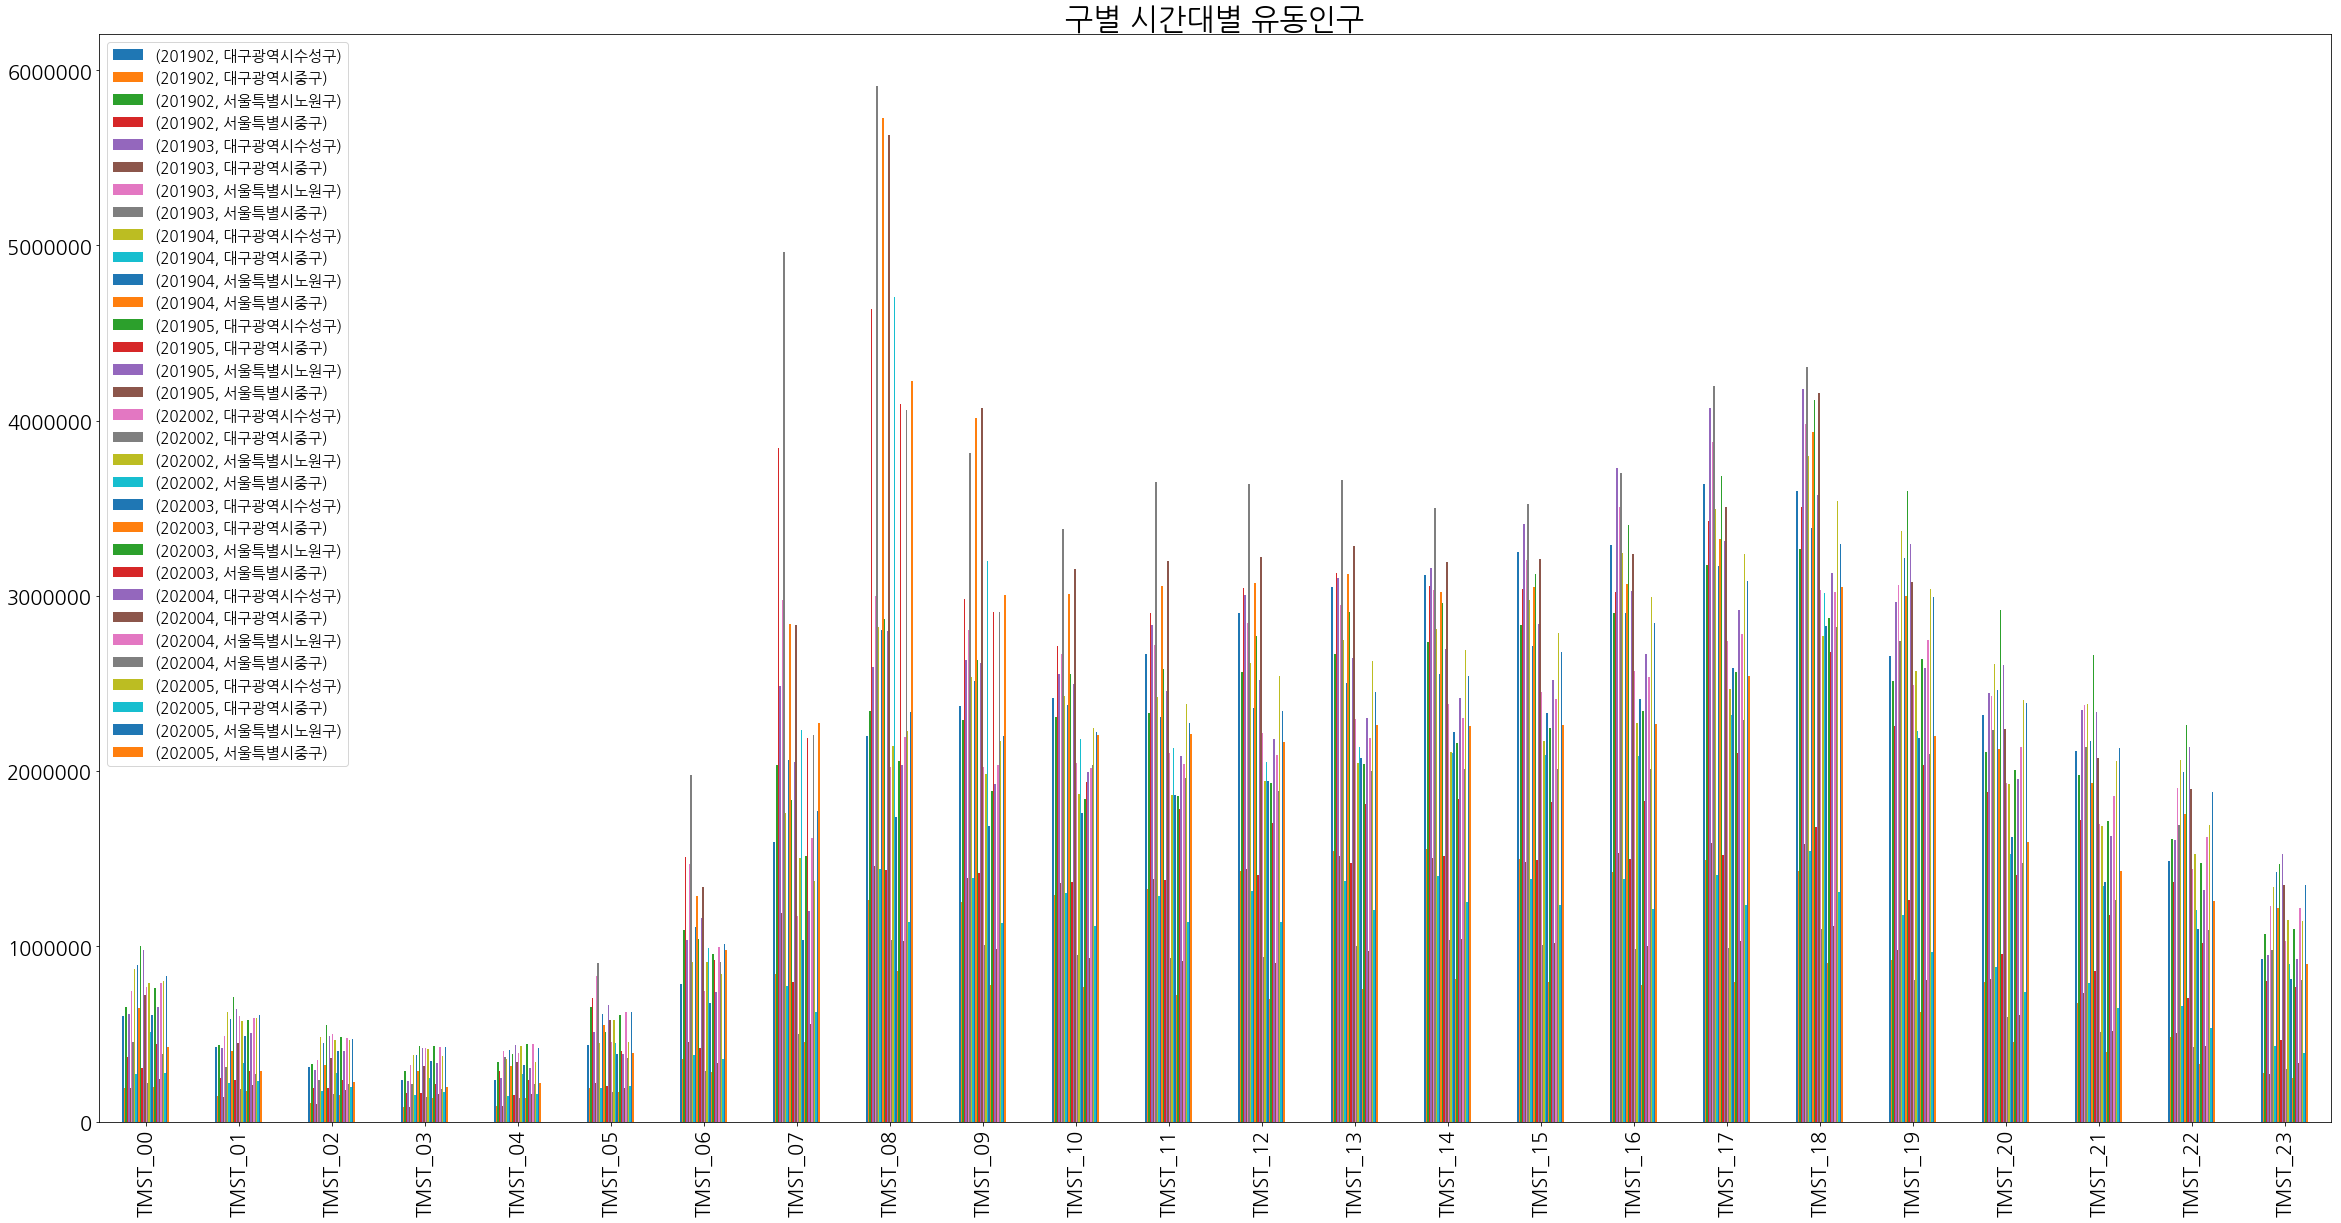

In [32]:
sk_month_GU_move.T.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (40,20)
plt.title('구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

In [33]:
SUSUNG_move_per_time = sk_month_GU_move.T.iloc[:, [0, 4, 8, 12, 16, 20, 24, 28]]
DAEGU_JUNGGU_move_per_time = sk_month_GU_move.T.iloc[:, [1, 5, 9, 13, 17, 21, 25, 29]]
NOWON_move_per_time = sk_month_GU_move.T.iloc[:, [2, 6, 10, 14, 18, 22, 26, 30]]
SEOUL_JUNGGU_move_per_time = sk_month_GU_move.T.iloc[:, [3, 7, 11, 15, 19, 23, 27, 31]]

In [34]:
for i in sk_month_GU_move.T.max(axis = 1):
    index = list(np.where(sk_month_GU_move.T == i))
    
    row_idx = sk_month_GU_move.T.index[index[0]]
    col_idx = sk_month_GU_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 큰 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.max(axis = 0).idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 유동인구가 가장 많은 시간은 {NOWON_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {NOWON_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'서울특별시 중구에서 유동인구가 가장 많은 시간은 {SEOUL_JUNGGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SEOUL_JUNGGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'수성구에서 유동인구가 가장 많은 시간은 {SUSUNG_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SUSUNG_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'대구광역시 중구에서 유동인구가 가장 많은 시간은 {DAEGU_JUNGGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {DAEGU_JUNGGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 큰 값은 (201905, '대구광역시수성구')입니다
TMST_01시의 유동인구 값중 가장 큰 값은 (201905, '대구광역시수성구')입니다
TMST_02시의 유동인구 값중 가장 큰 값은 (201905, '대구광역시수성구')입니다
TMST_03시의 유동인구 값중 가장 큰 값은 (201905, '대구광역시수성구')입니다
TMST_04시의 유동인구 값중 가장 큰 값은 (202003, '서울특별시노원구')입니다
TMST_05시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_06시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_07시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_08시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_09시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시중구')입니다
TMST_10시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_11시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_12시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_13시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_14시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_15시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_16시의 유동인구 값중 가장 큰 값은 (201903, '대구광역시수성구')입니다
TMST_17시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_18시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시중구')입니다
TMST_19시의 유동인구 값중 가장 큰 값은 (201905, '대구광역시수성구')입니다
TMST_20시의 유동인

In [35]:
for i in sk_month_GU_move.T.min(axis = 1):
    index = list(np.where(sk_month_GU_move.T == i))
    
    row_idx = sk_month_GU_move.T.index[index[0]]
    col_idx = sk_month_GU_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 작은 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.min(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.min(axis = 0).idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 유동인구가 가장 많은 시간은 {NOWON_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {NOWON_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'서울특별시 중구에서 유동인구가 가장 많은 시간은 {SEOUL_JUNGGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SEOUL_JUNGGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'수성구에서 유동인구가 가장 많은 시간은 {SUSUNG_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SUSUNG_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'대구광역시 중구에서 유동인구가 가장 많은 시간은 {DAEGU_JUNGGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {DAEGU_JUNGGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 작은 값은 (201902, '대구광역시중구')입니다
TMST_01시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시중구')입니다
TMST_02시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시중구')입니다
TMST_03시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시중구')입니다
TMST_04시의 유동인구 값중 가장 작은 값은 (201902, '대구광역시중구')입니다
TMST_05시의 유동인구 값중 가장 작은 값은 (202002, '대구광역시중구')입니다
TMST_06시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_07시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_08시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_09시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_10시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_11시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_12시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_13시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_14시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_15시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_16시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_17시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_18시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다
TMST_19시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시중구')입니다


### - 일반적으로 중구 > 수성구 > 노원구 순으로 유동인구가 많은 것으로 보임

### 2-2. 구별 시간대별 유동인구 (세부)

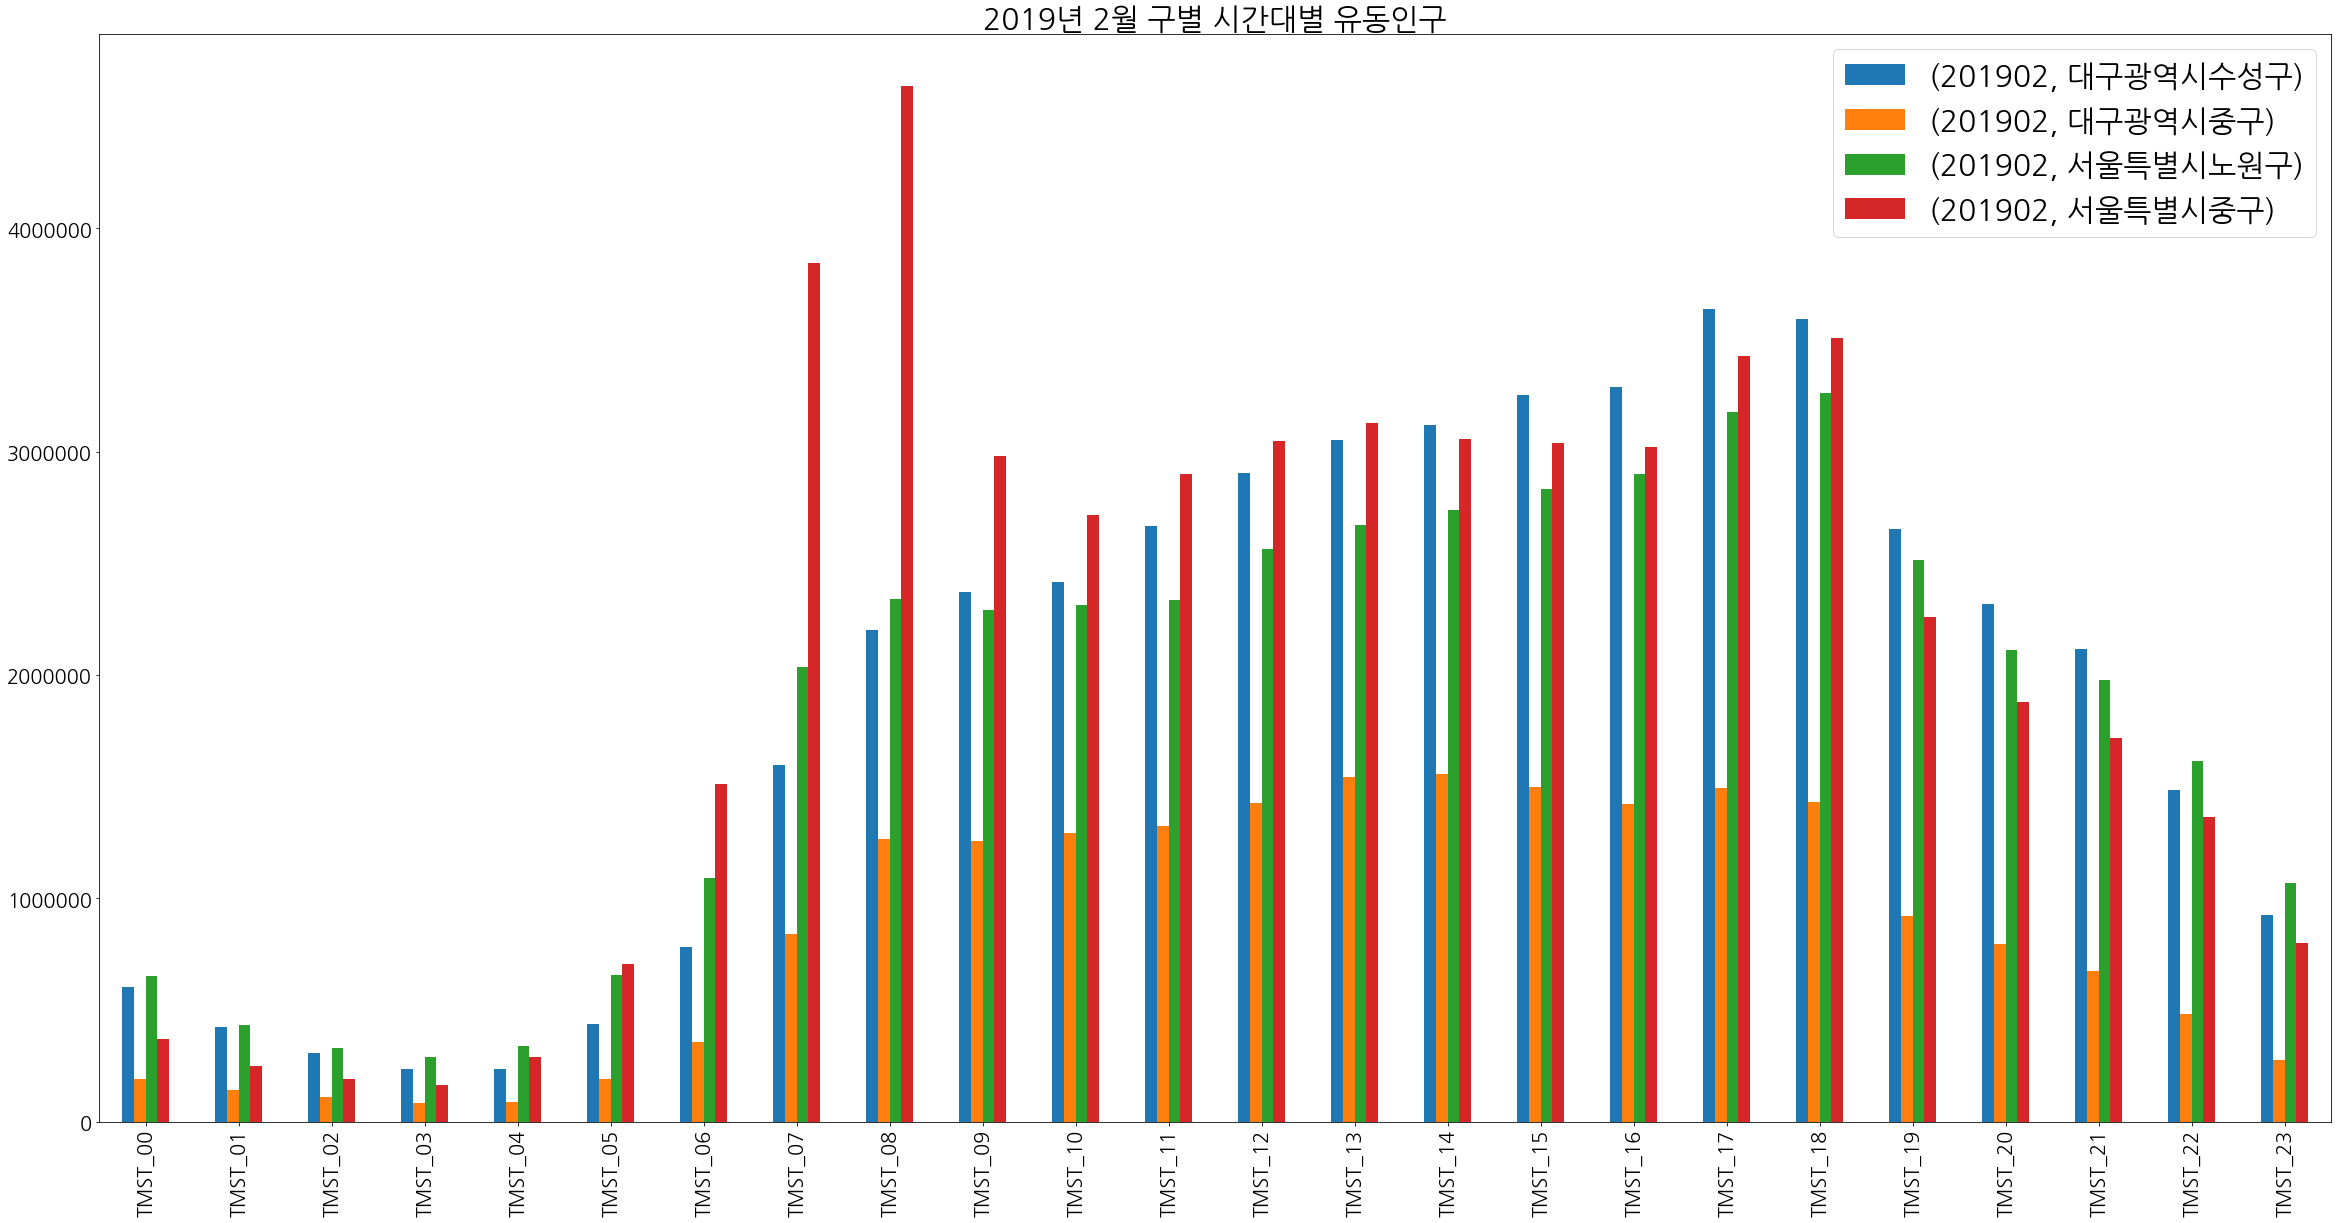

In [36]:
sk_month_GU_move.T.iloc[:, 0:4].plot(kind = 'bar')
plt.title('2019년 2월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [37]:
start = 0
end = 4
YM = '2019년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201902, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201902, '대구광역시중구')입니다.
노원구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_17입니다.
대구광역시 중구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_14입니다.
노원구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.


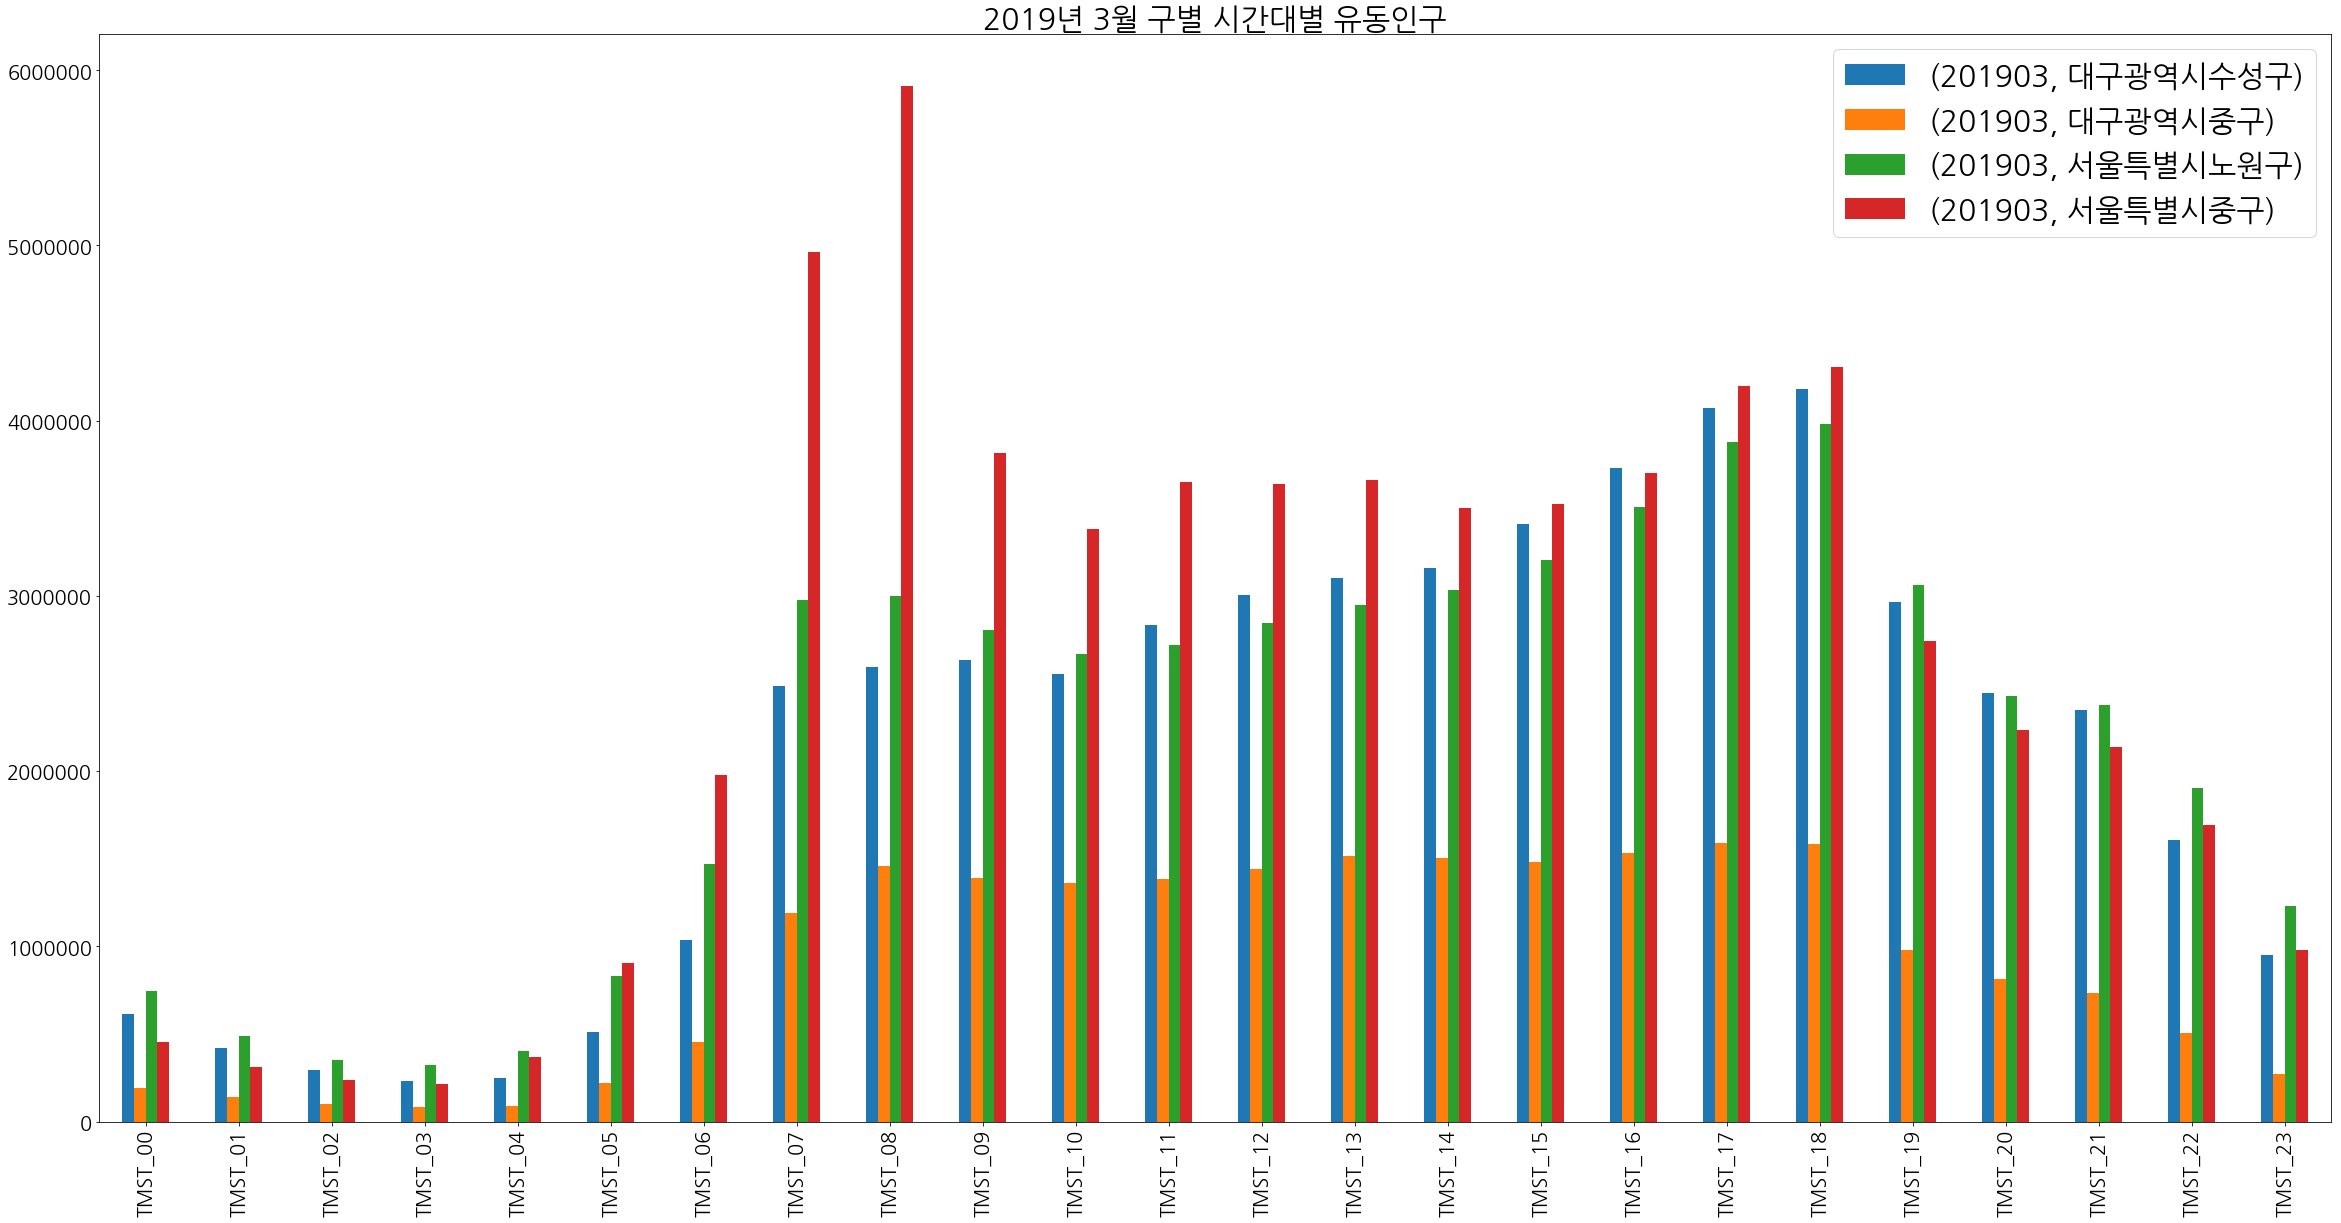

In [38]:
sk_month_GU_move.T.iloc[:, 4:8].plot(kind = 'bar')
plt.title('2019년 3월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [39]:
start = 4
end = 8
YM = '2019년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201903, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201903, '대구광역시중구')입니다.
노원구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_17입니다.
노원구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
대구광역시 중구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.


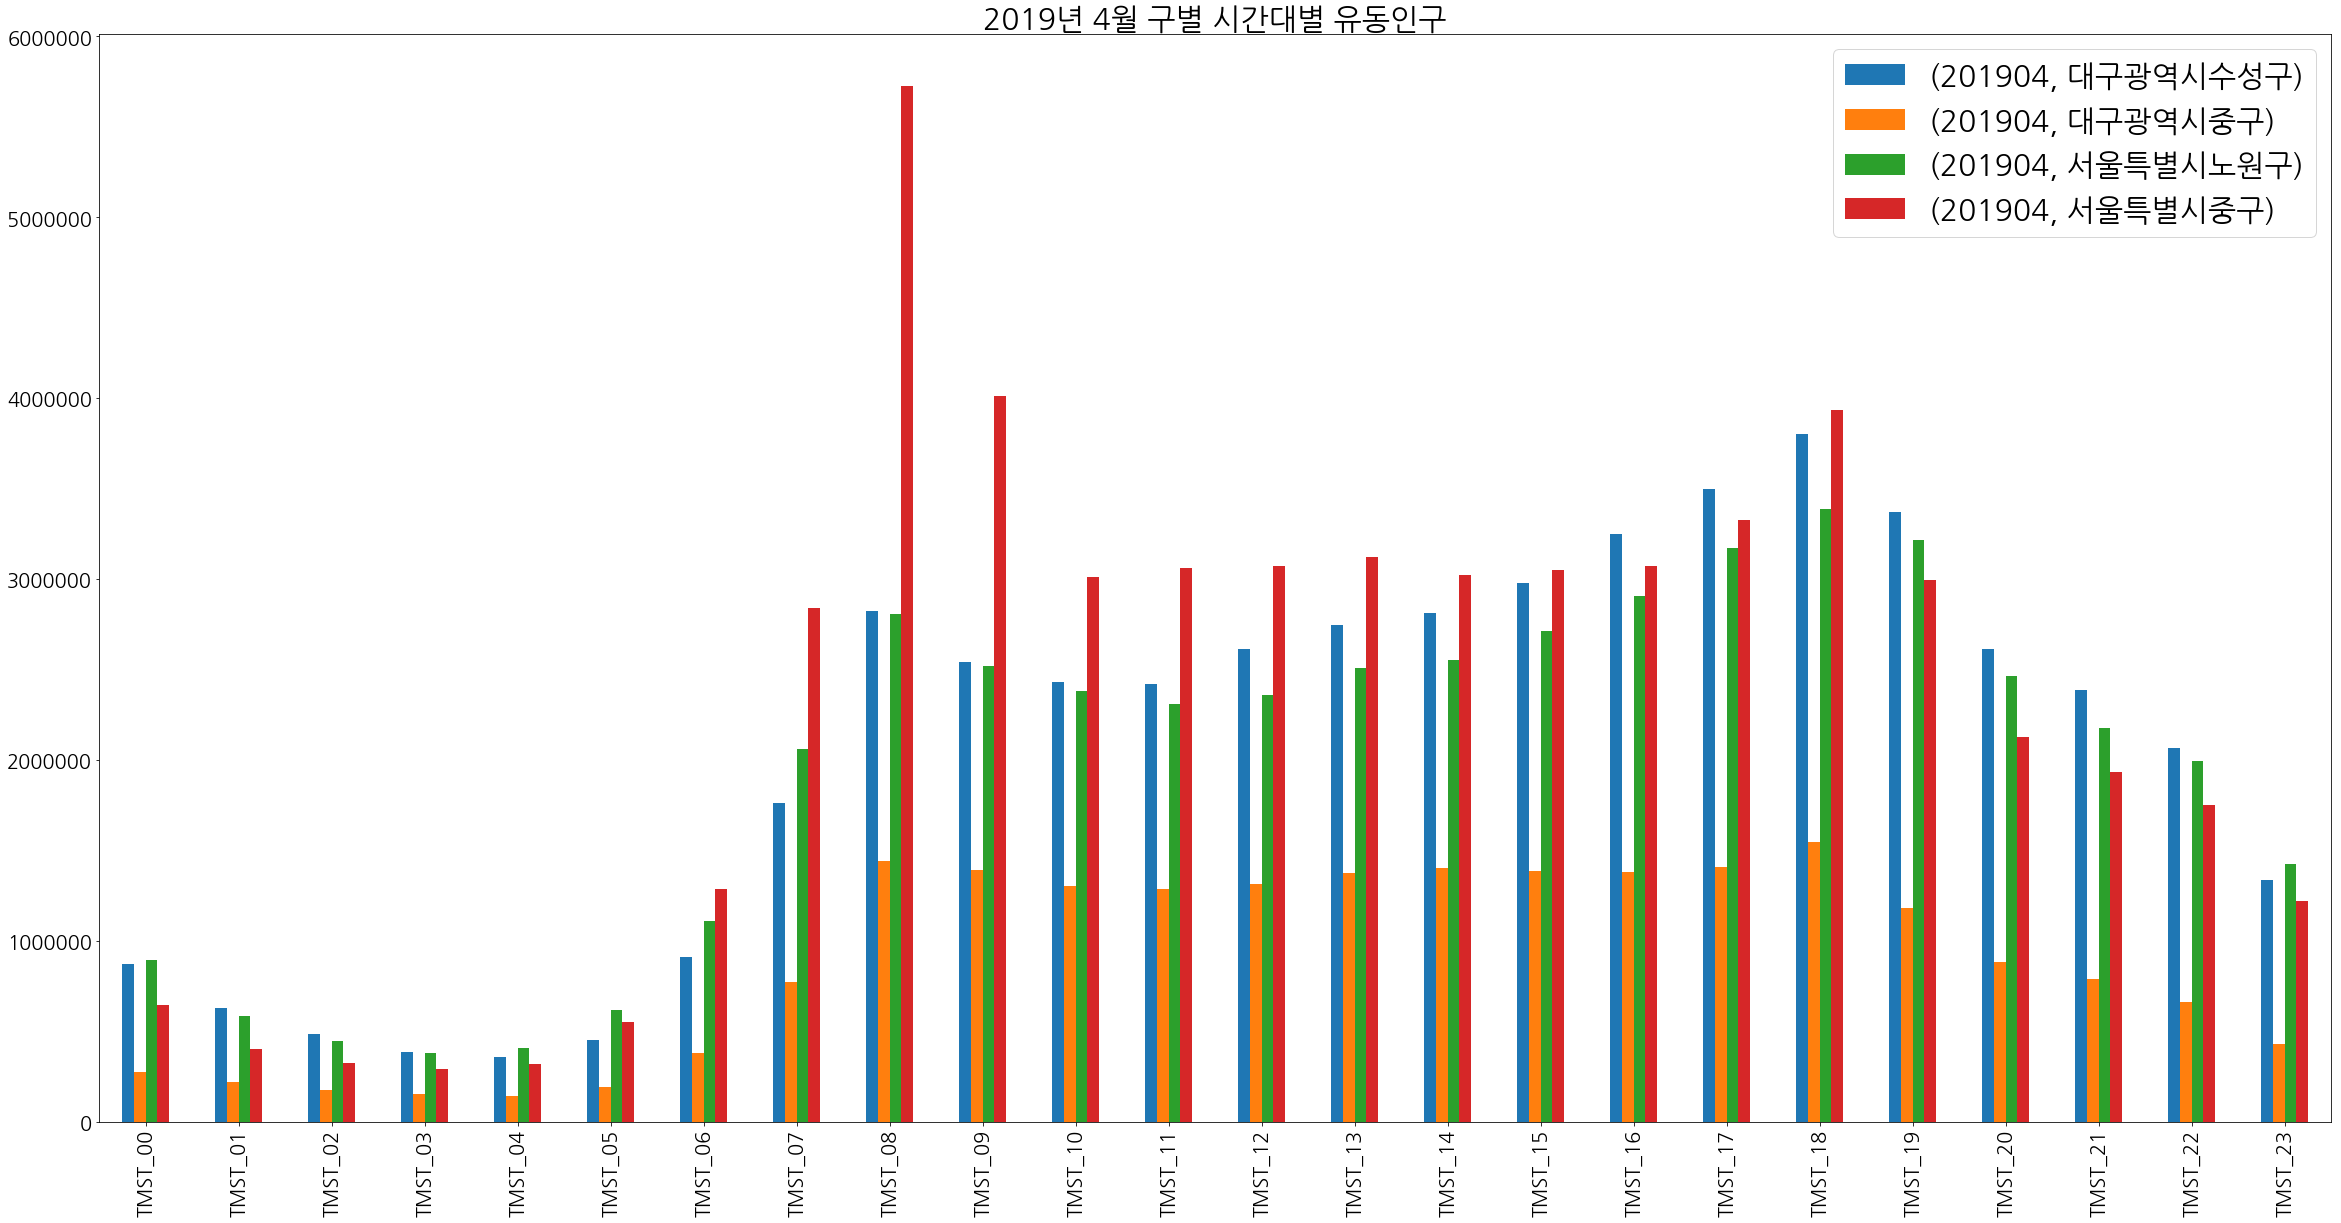

In [40]:
sk_month_GU_move.T.iloc[:, 8:12].plot(kind = 'bar')
plt.title('2019년 4월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [41]:
start = 8
end = 12
YM = '2019년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201904, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201904, '대구광역시중구')입니다.
노원구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.


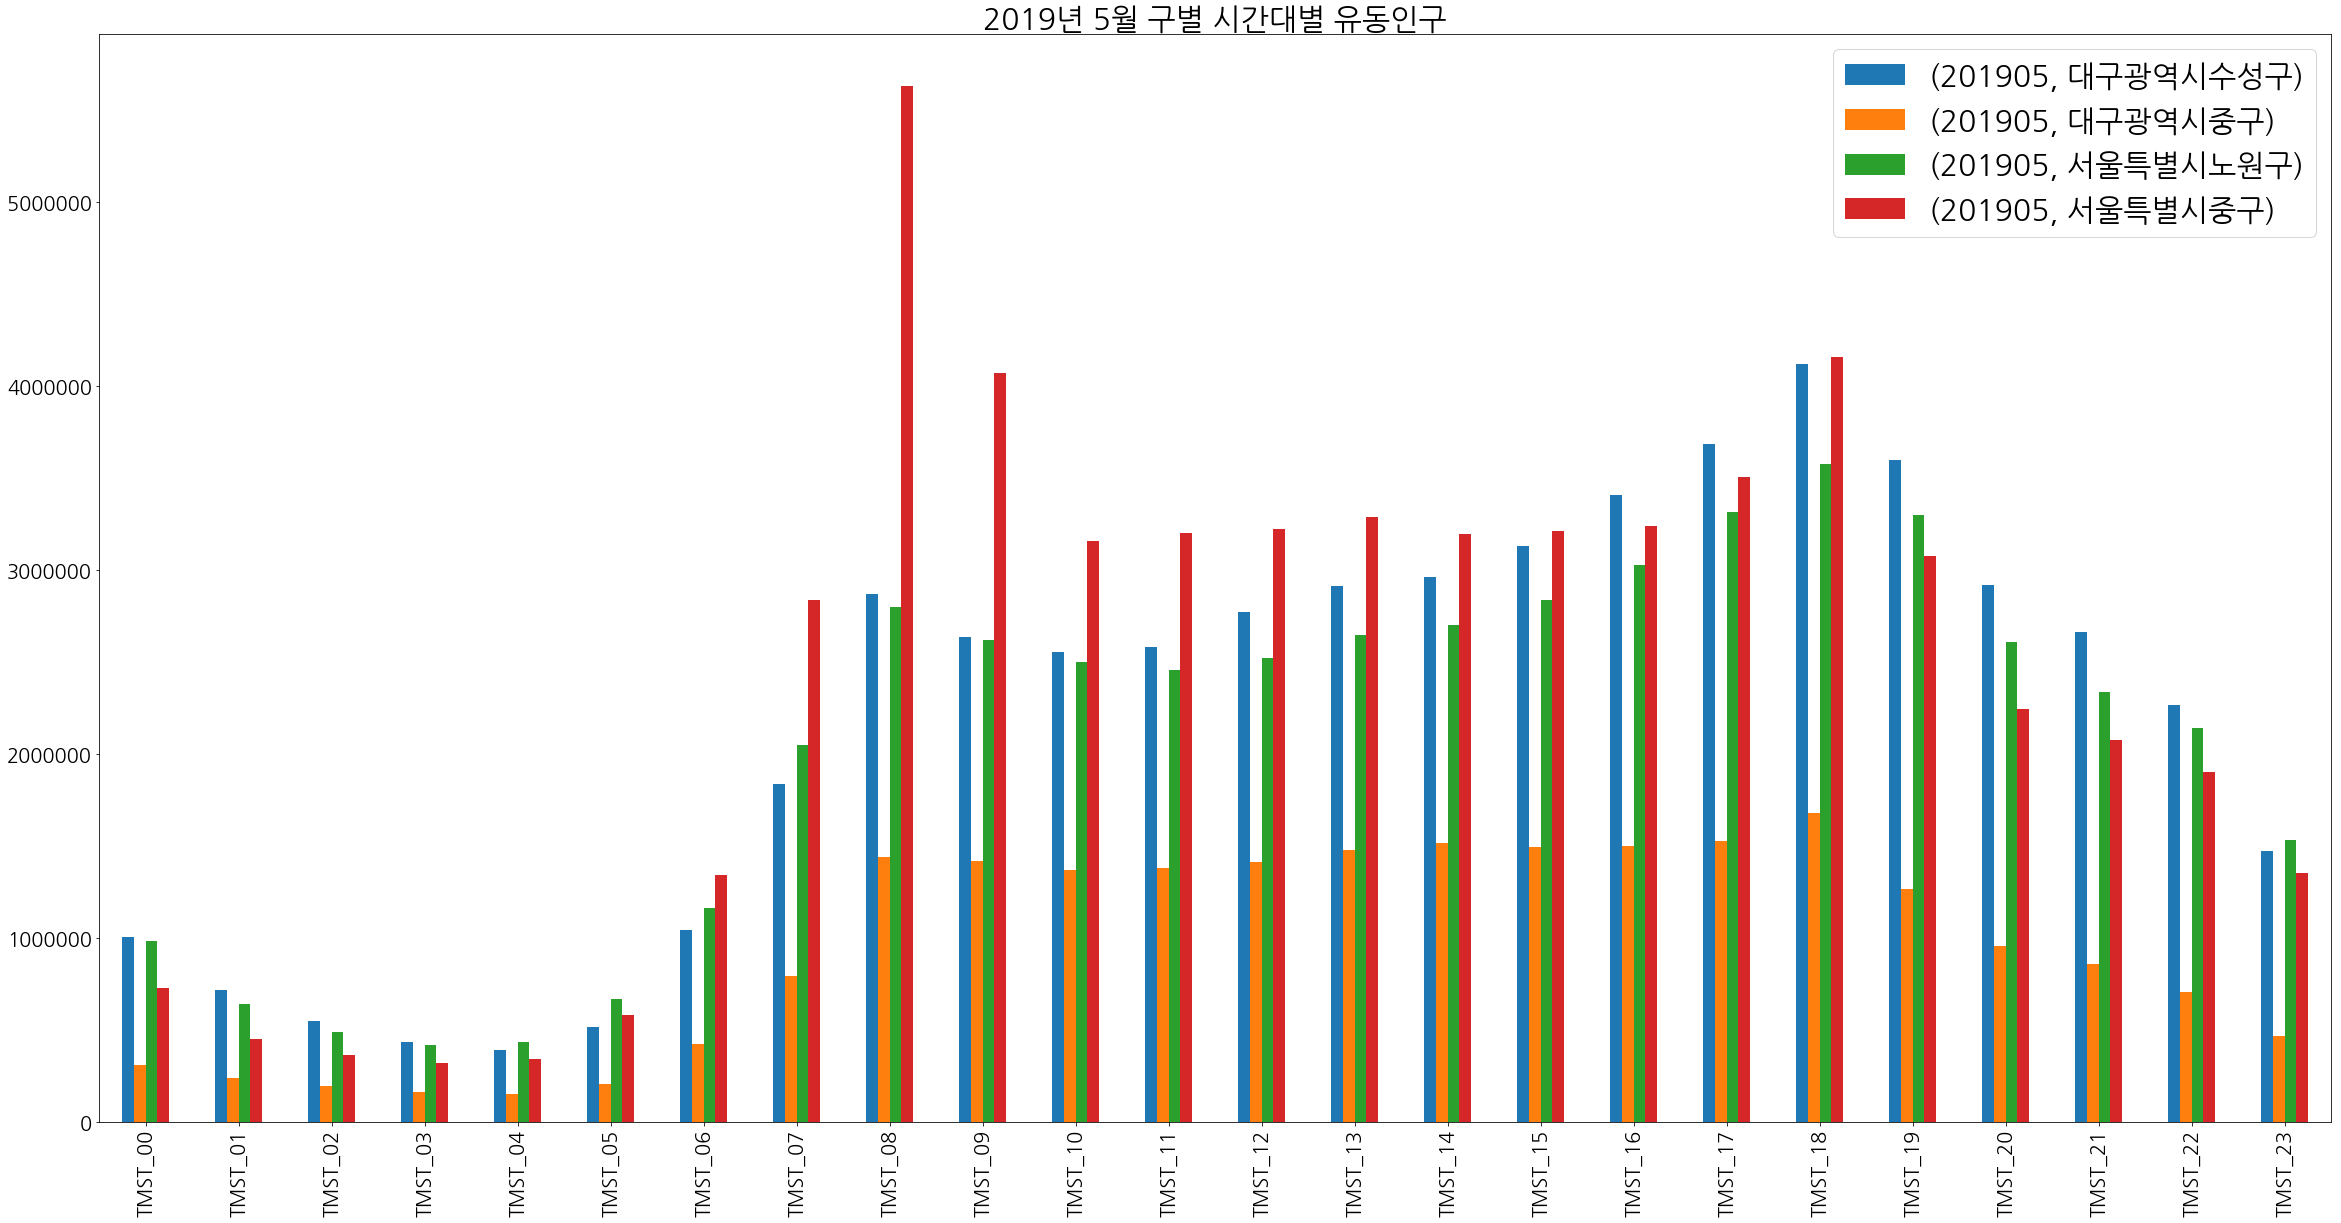

In [42]:
sk_month_GU_move.T.iloc[:, 12:16].plot(kind = 'bar')
plt.title('2019년 5월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [43]:
start = 12
end = 16
YM = '2019년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201905, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201905, '대구광역시중구')입니다.
노원구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.


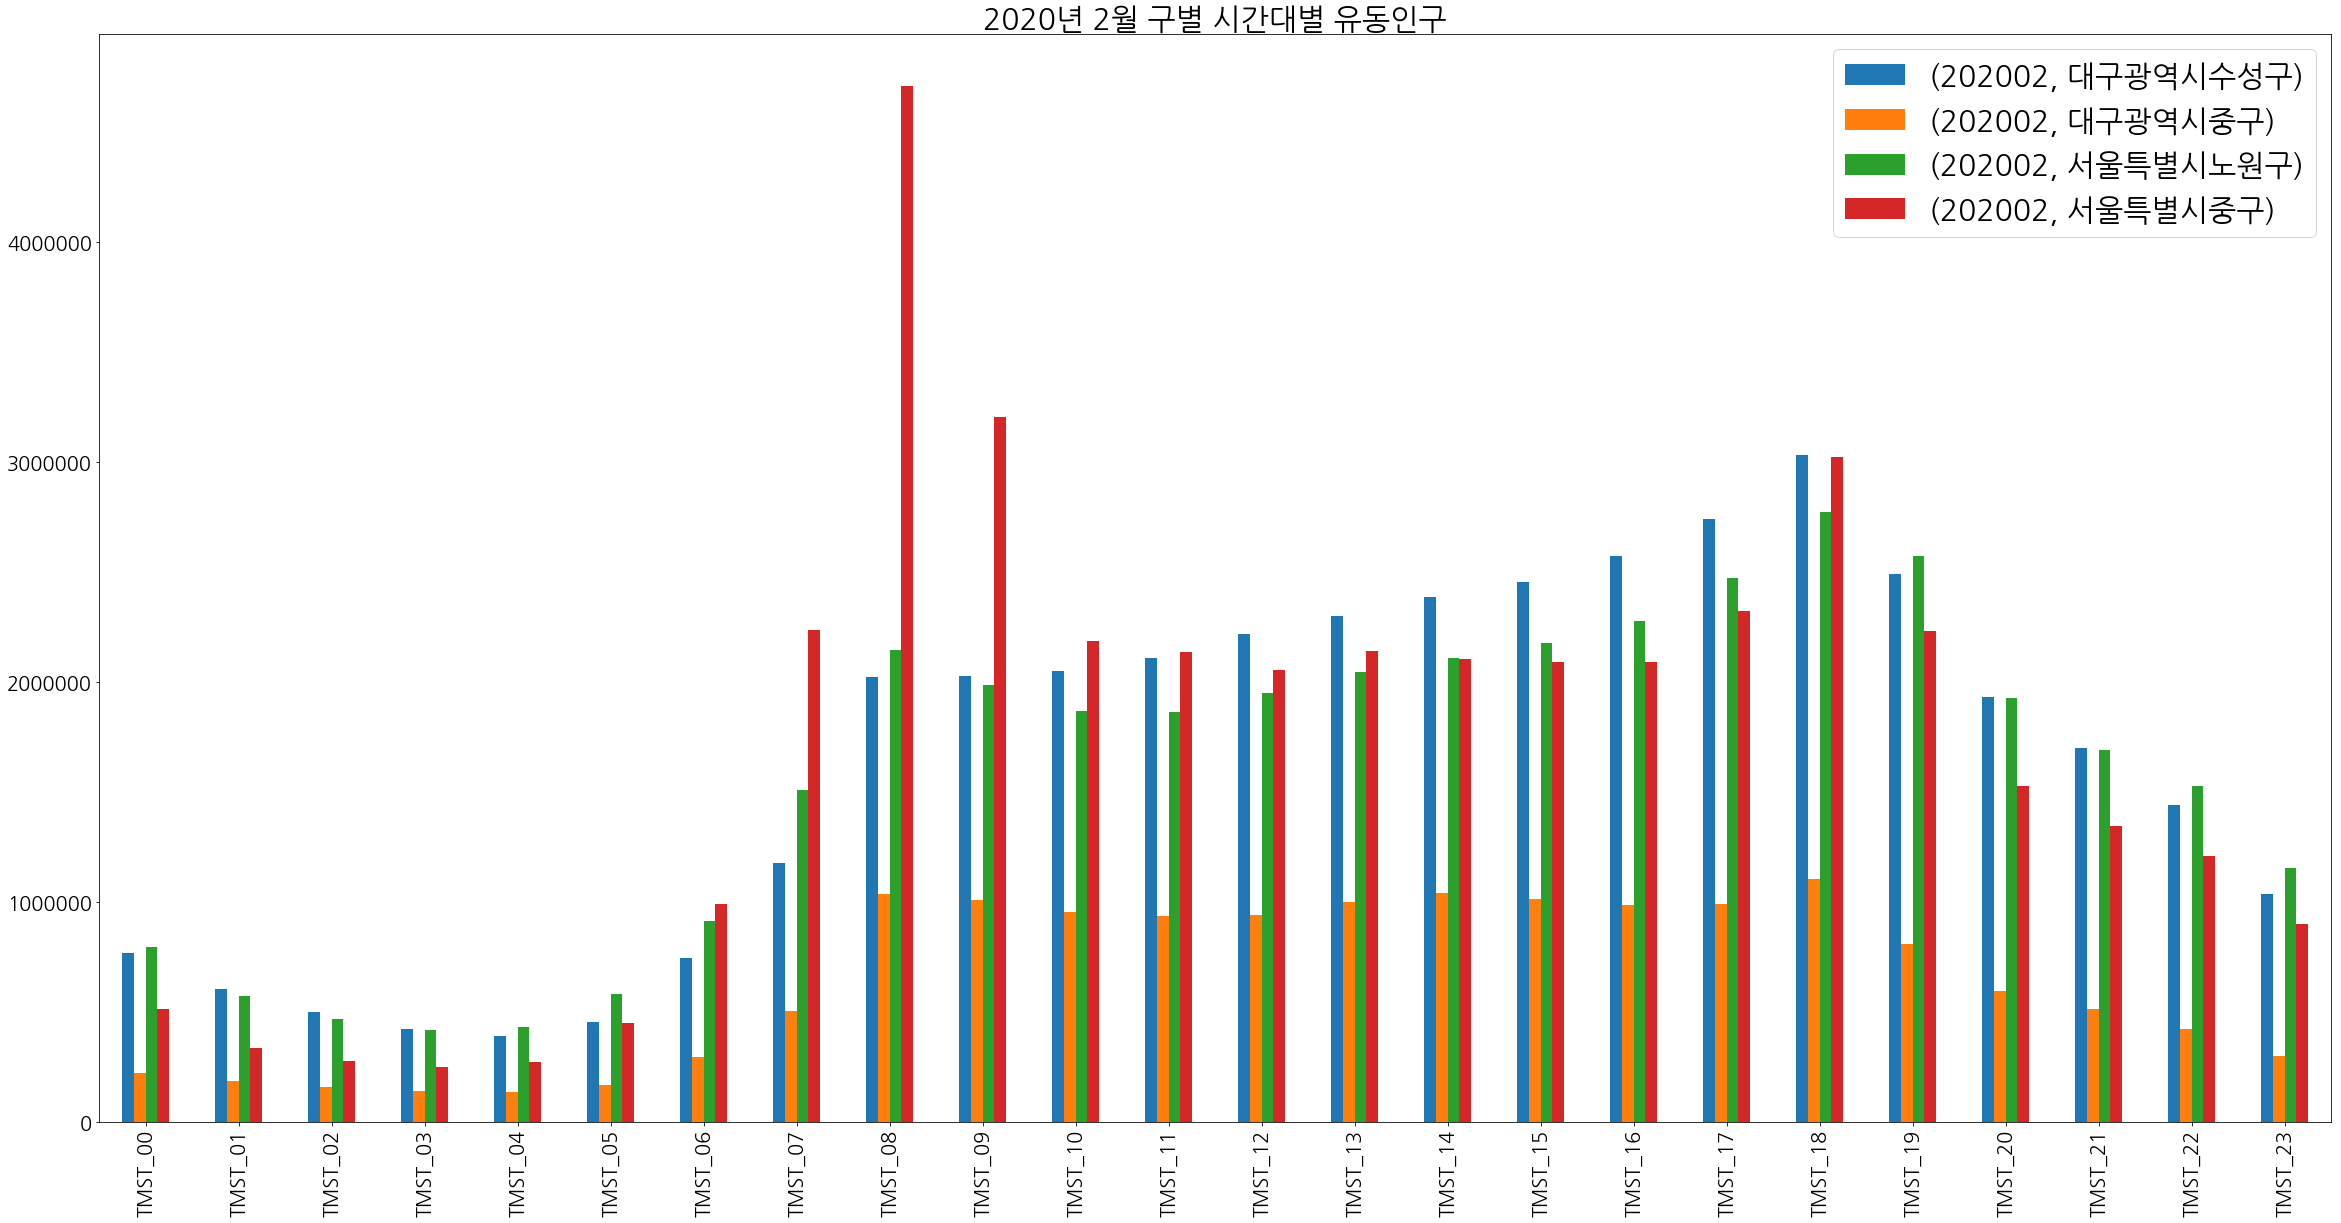

In [44]:
sk_month_GU_move.T.iloc[:, 16:20].plot(kind = 'bar')
plt.title('2020년 2월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [45]:
start = 16
end = 20
YM = '2020년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202002, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202002, '대구광역시중구')입니다.
노원구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.


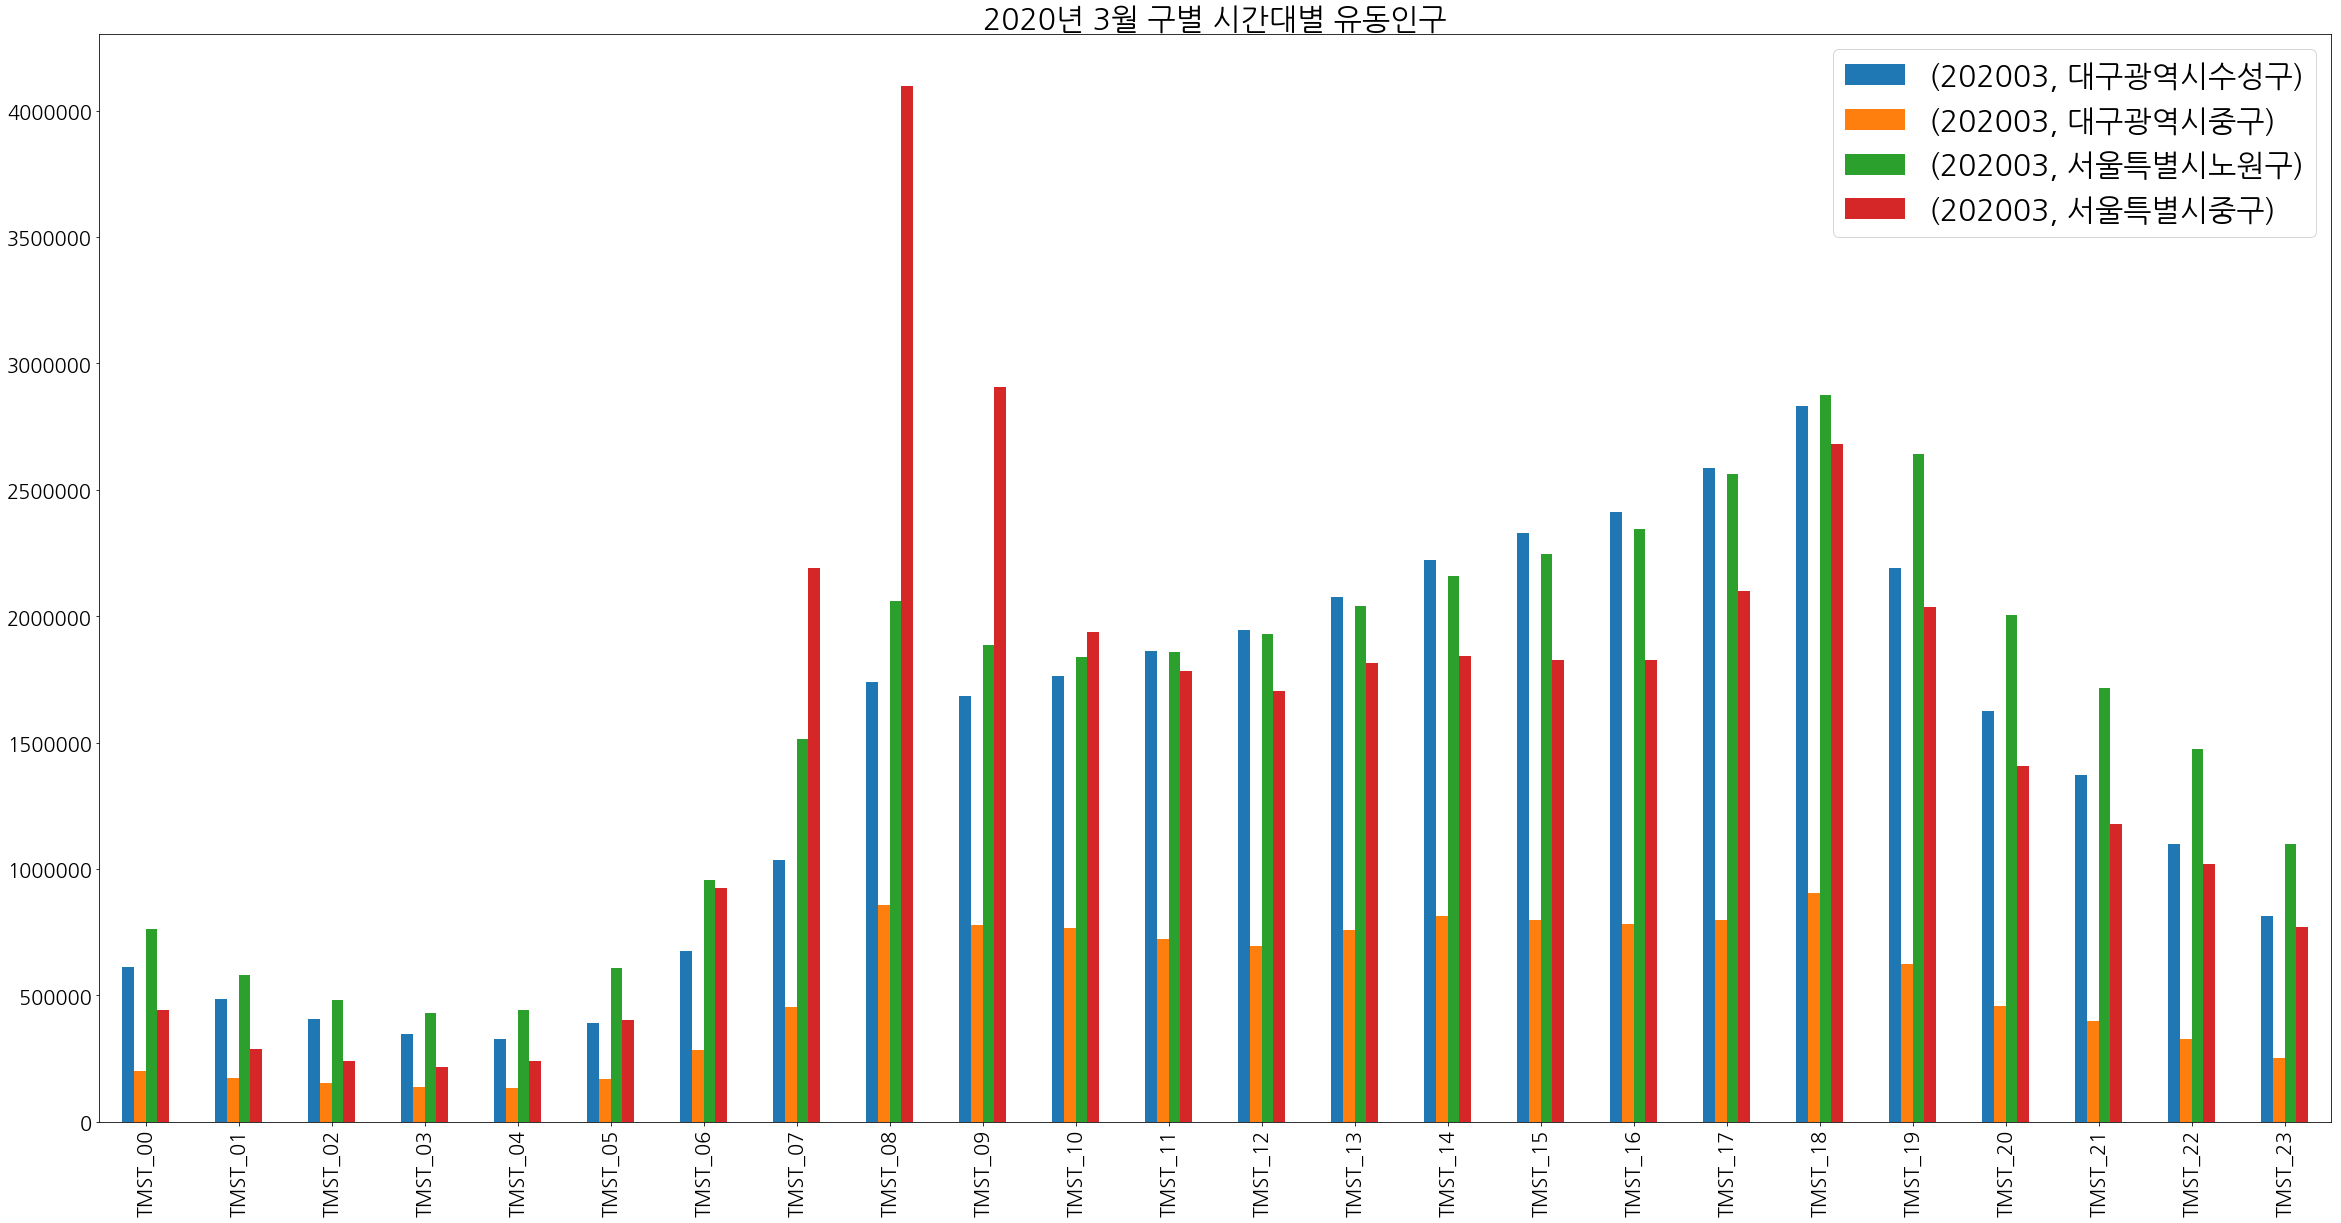

In [46]:
sk_month_GU_move.T.iloc[:, 20:24].plot(kind = 'bar')
plt.title('2020년 3월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [47]:
start =20
end = 24
YM = '2020년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202003, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202003, '대구광역시중구')입니다.
노원구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.


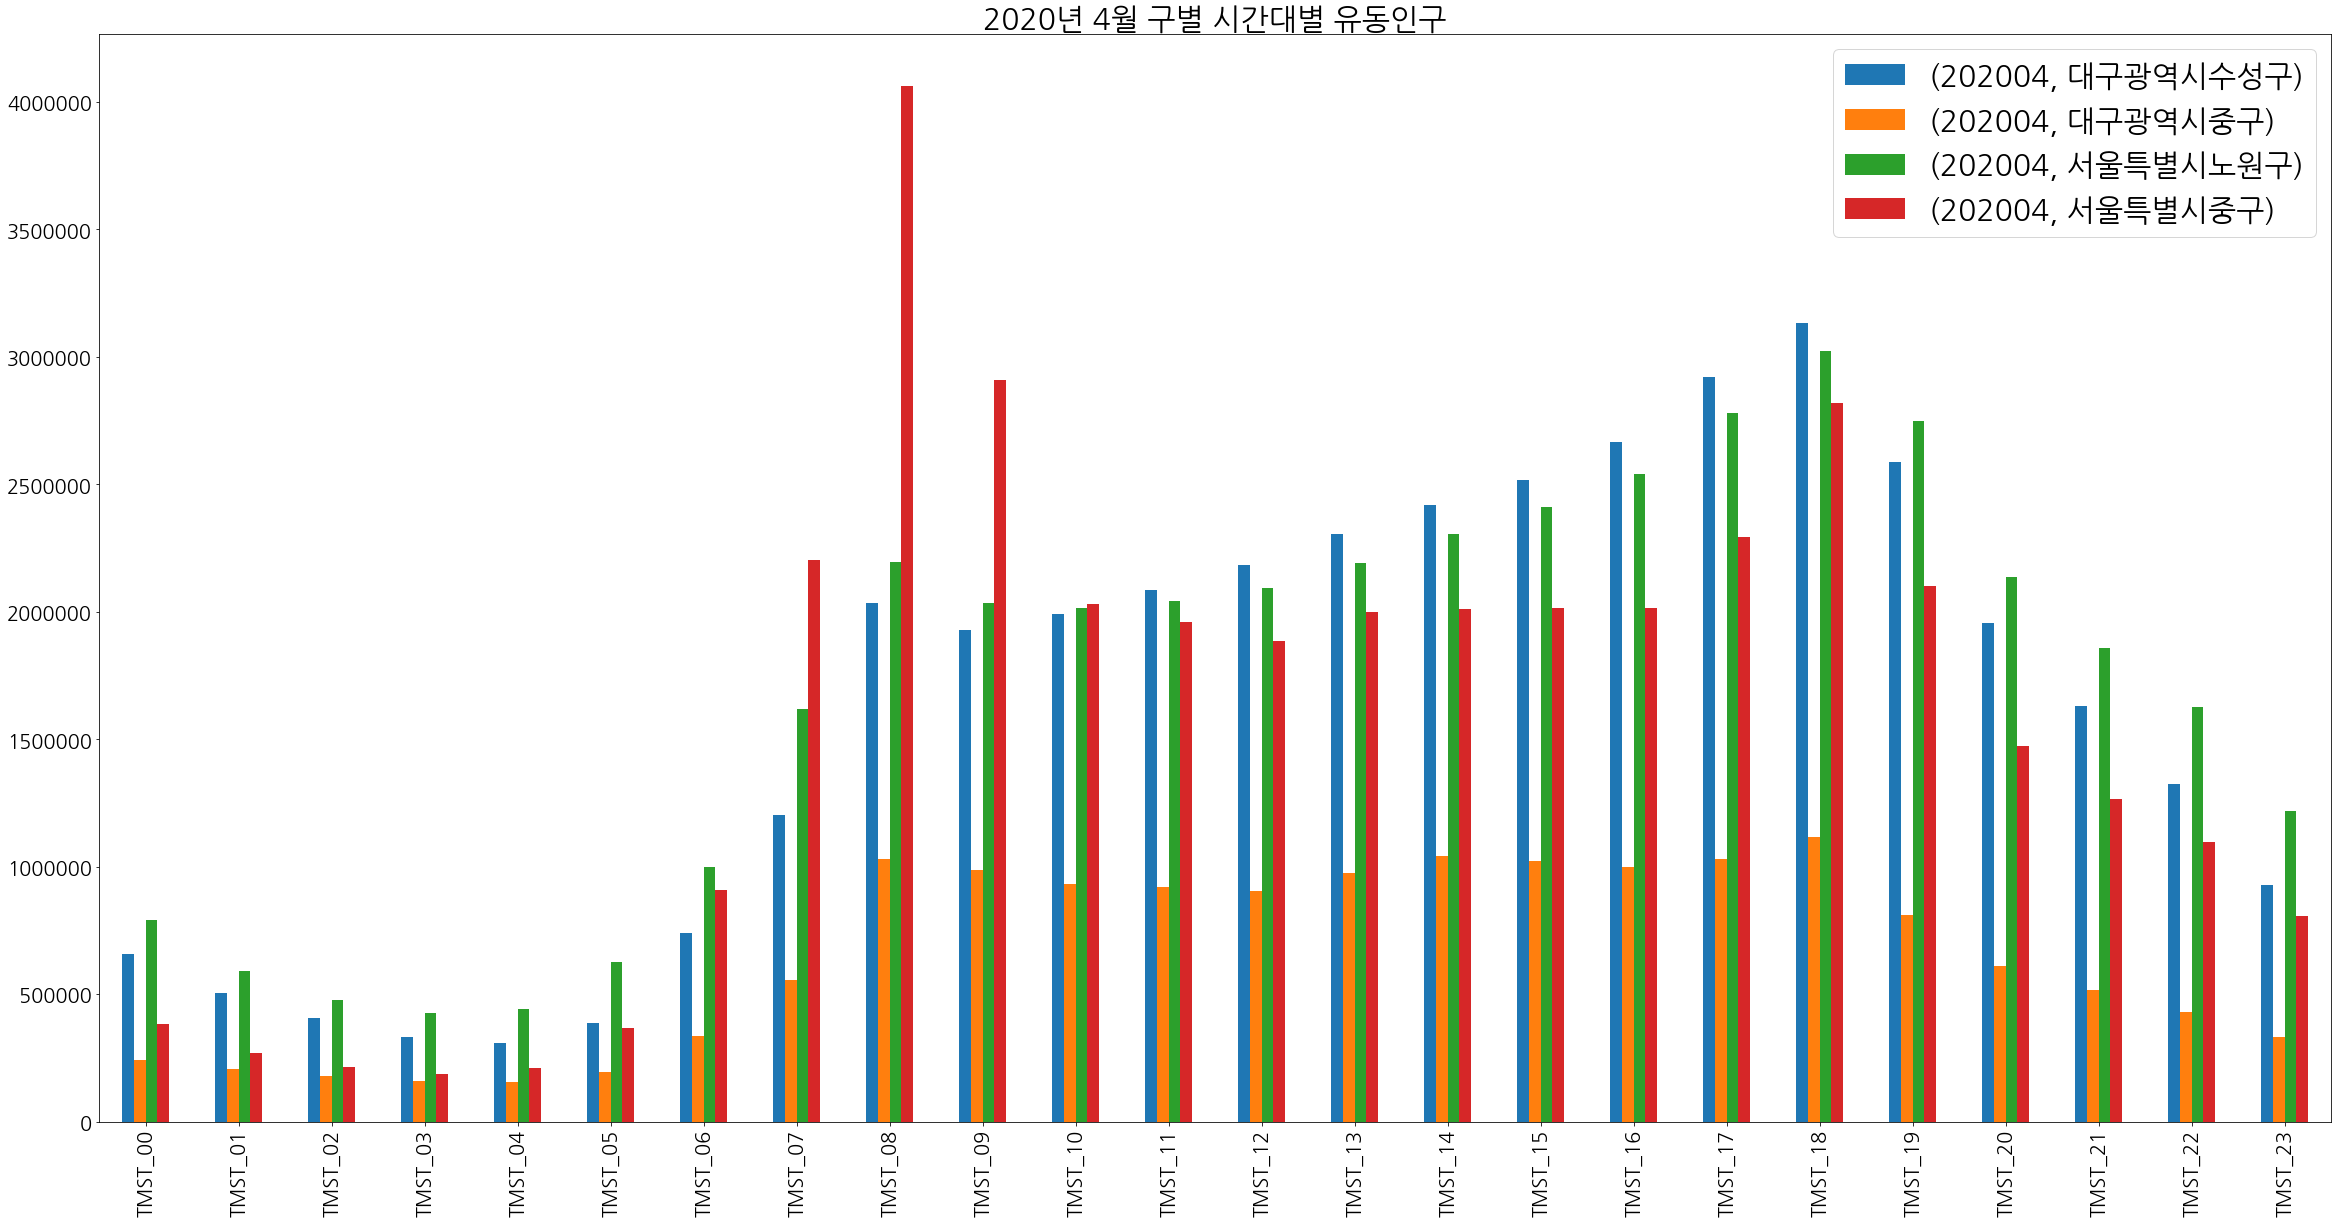

In [48]:
sk_month_GU_move.T.iloc[:, 24:28].plot(kind = 'bar')
plt.title('2020년 4월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [49]:
start = 24
end = 28
YM = '2020년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202004, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202004, '대구광역시중구')입니다.
노원구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
서울특별시 중구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.


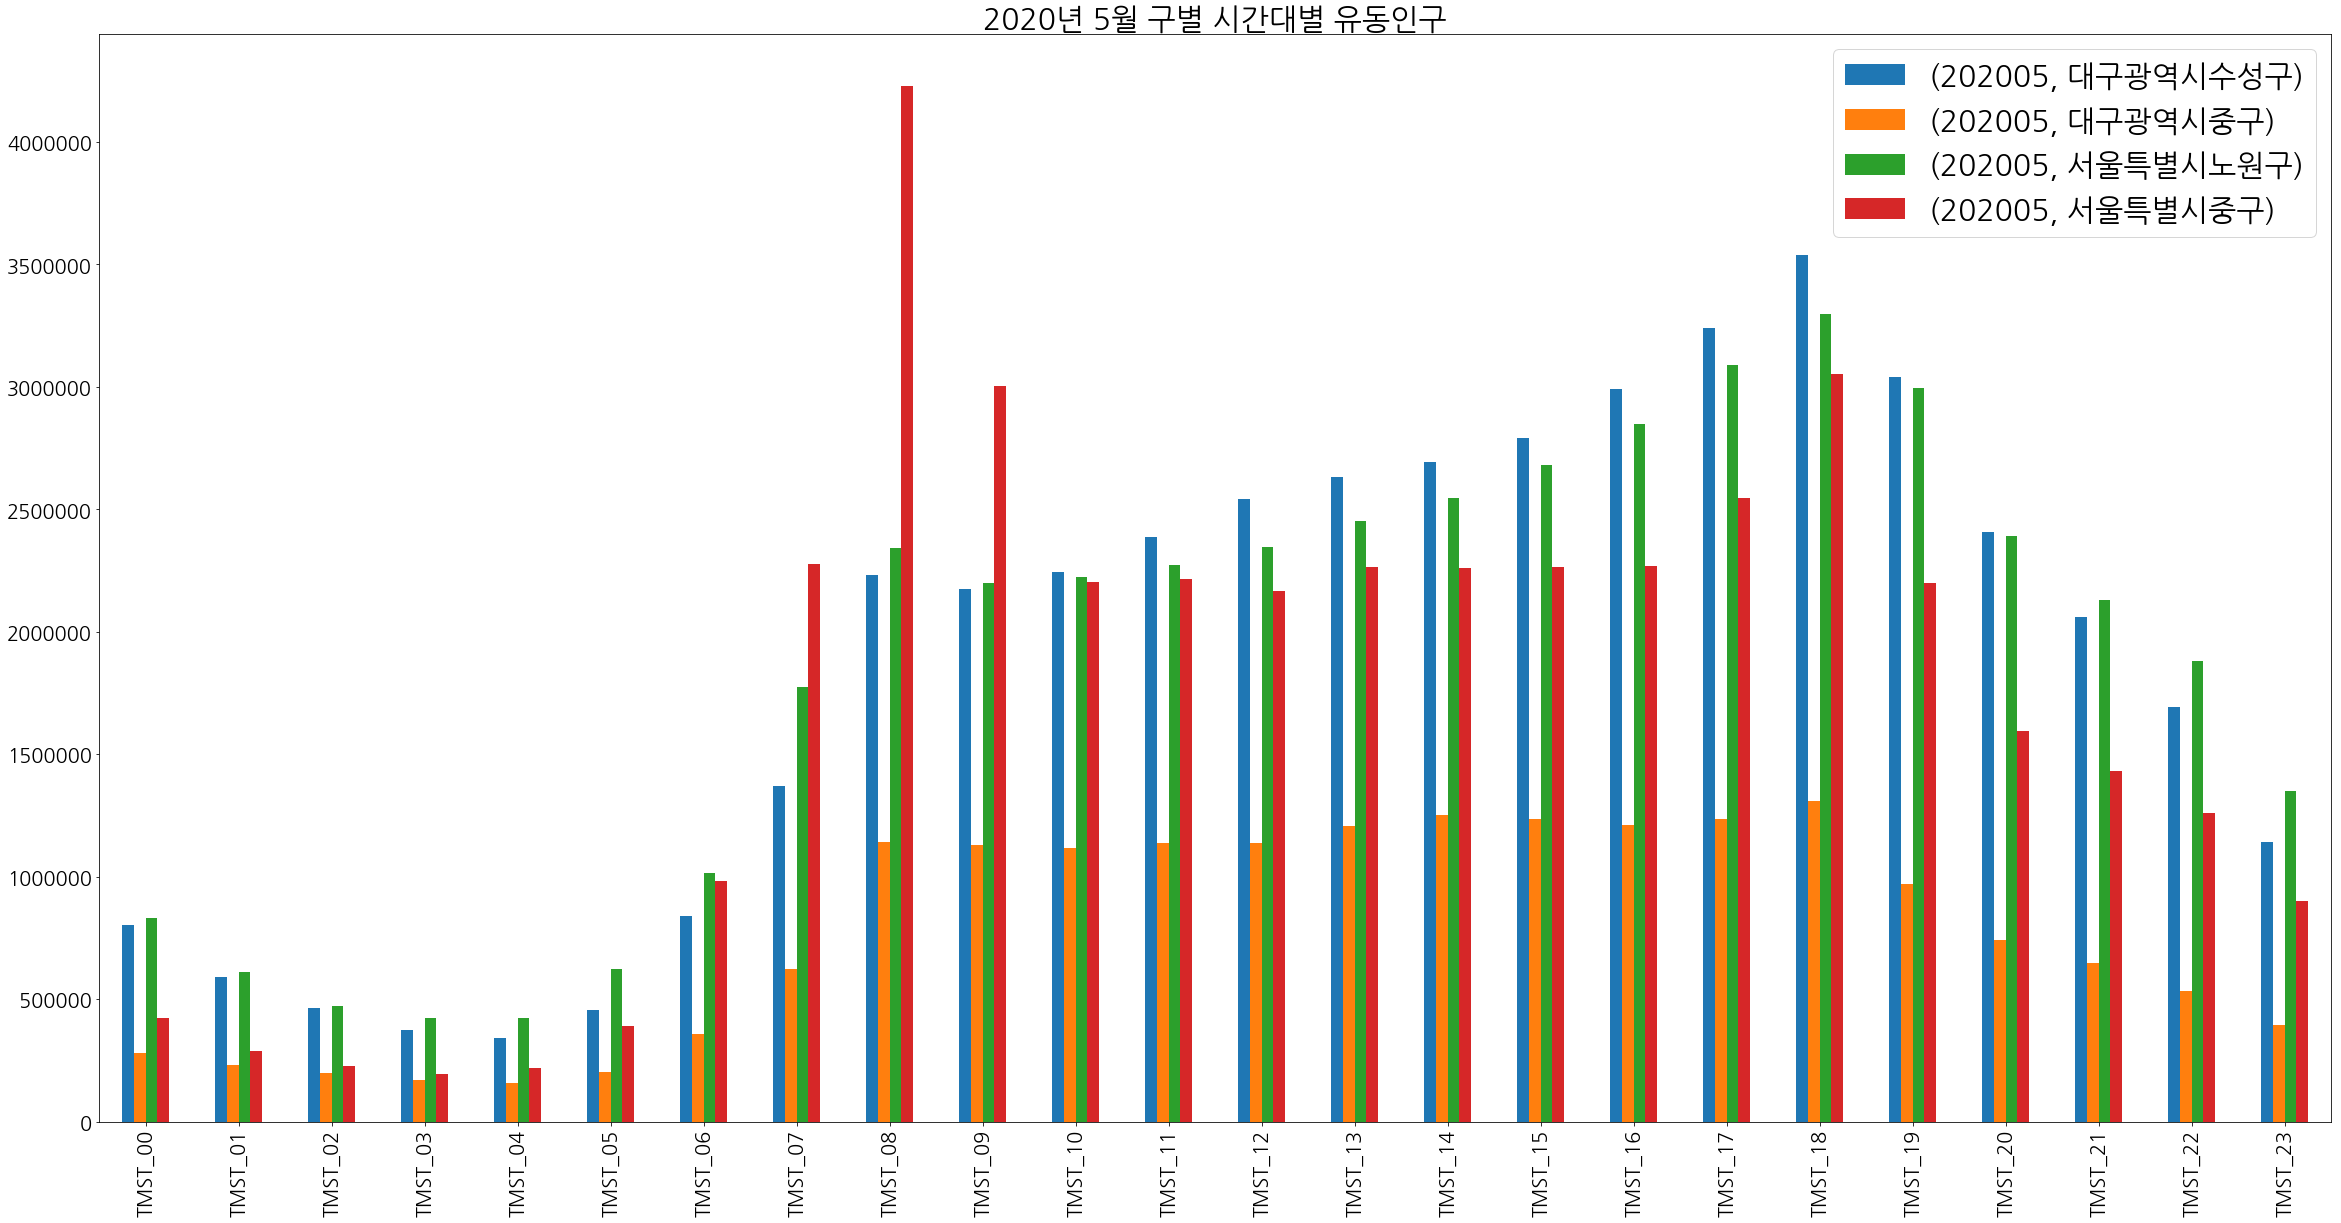

In [50]:
sk_month_GU_move.T.iloc[:, 28:32].plot(kind = 'bar')
plt.title('2020년 5월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [51]:
start = 28
end = 32
YM = '2020년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')
print(f'서울특별시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'대구광역시 중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 3].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202005, '서울특별시중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202005, '대구광역시중구')입니다.
노원구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시 중구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
수성구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
대구광역시 중구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
서울특별시 중구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_03입니다.
수성구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.
대구광역시 중구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_04입니다.


## 3-1. 코로나 전후 유동인구 비교

### 3-1-1. 서울

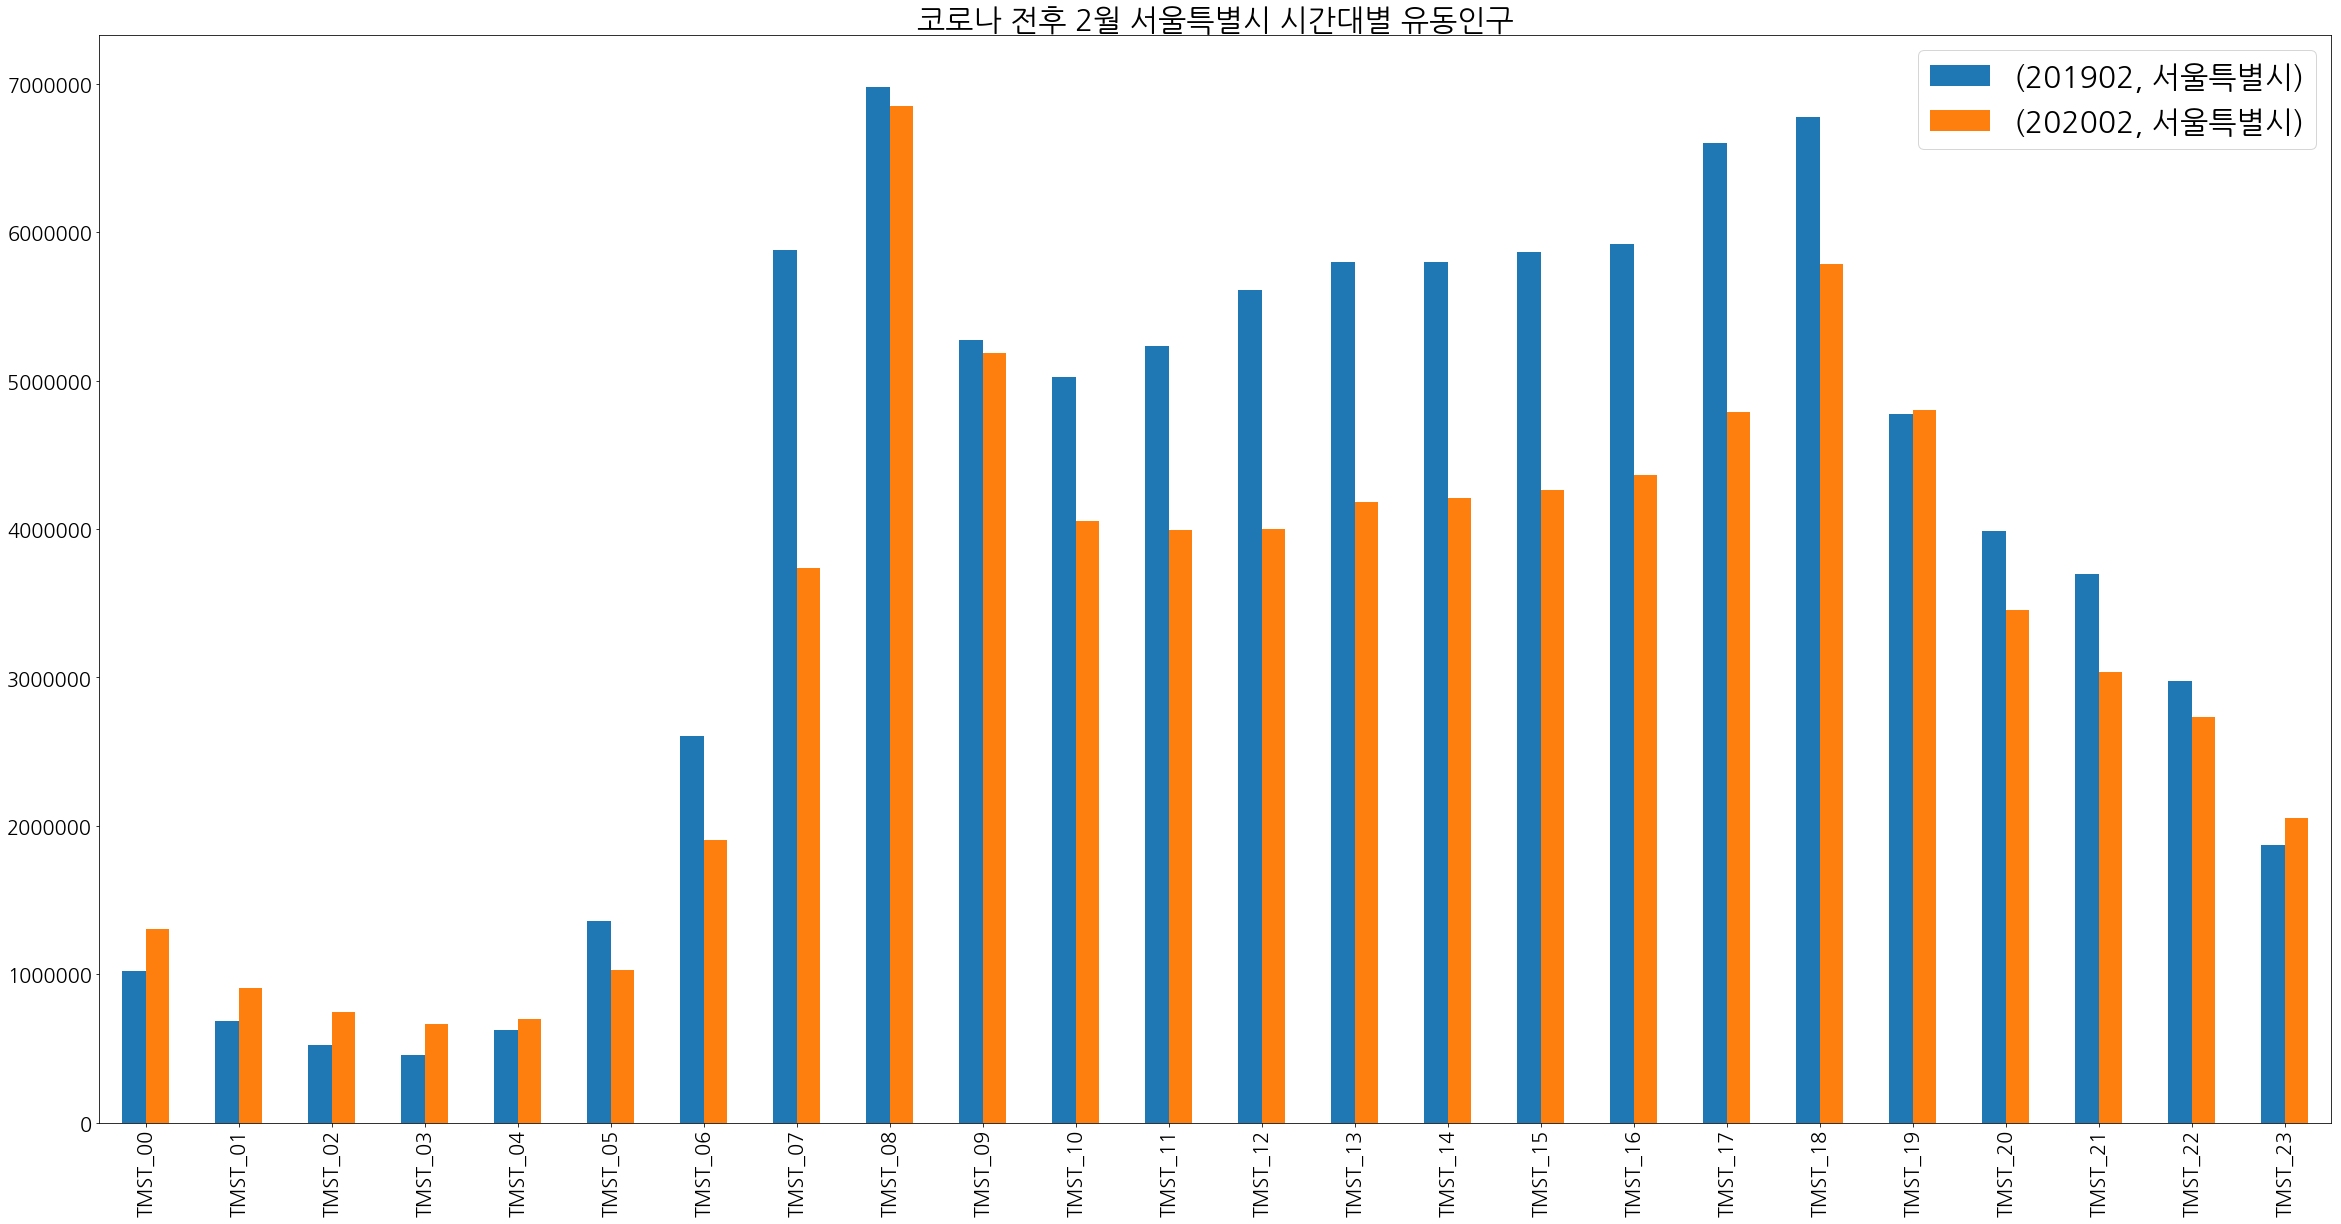

In [52]:
sk_month_move.T.iloc[:, [1, 9]].plot(kind = 'bar')
plt.title('코로나 전후 2월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [53]:
start = 1
end = 9
YM = '2월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 서울의 유동인구 변화량은 TMST_19에 제일 작으며, TMST_07에 제일 크다
2월 서울은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_00에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '19', '23']시간에 이동량 증가


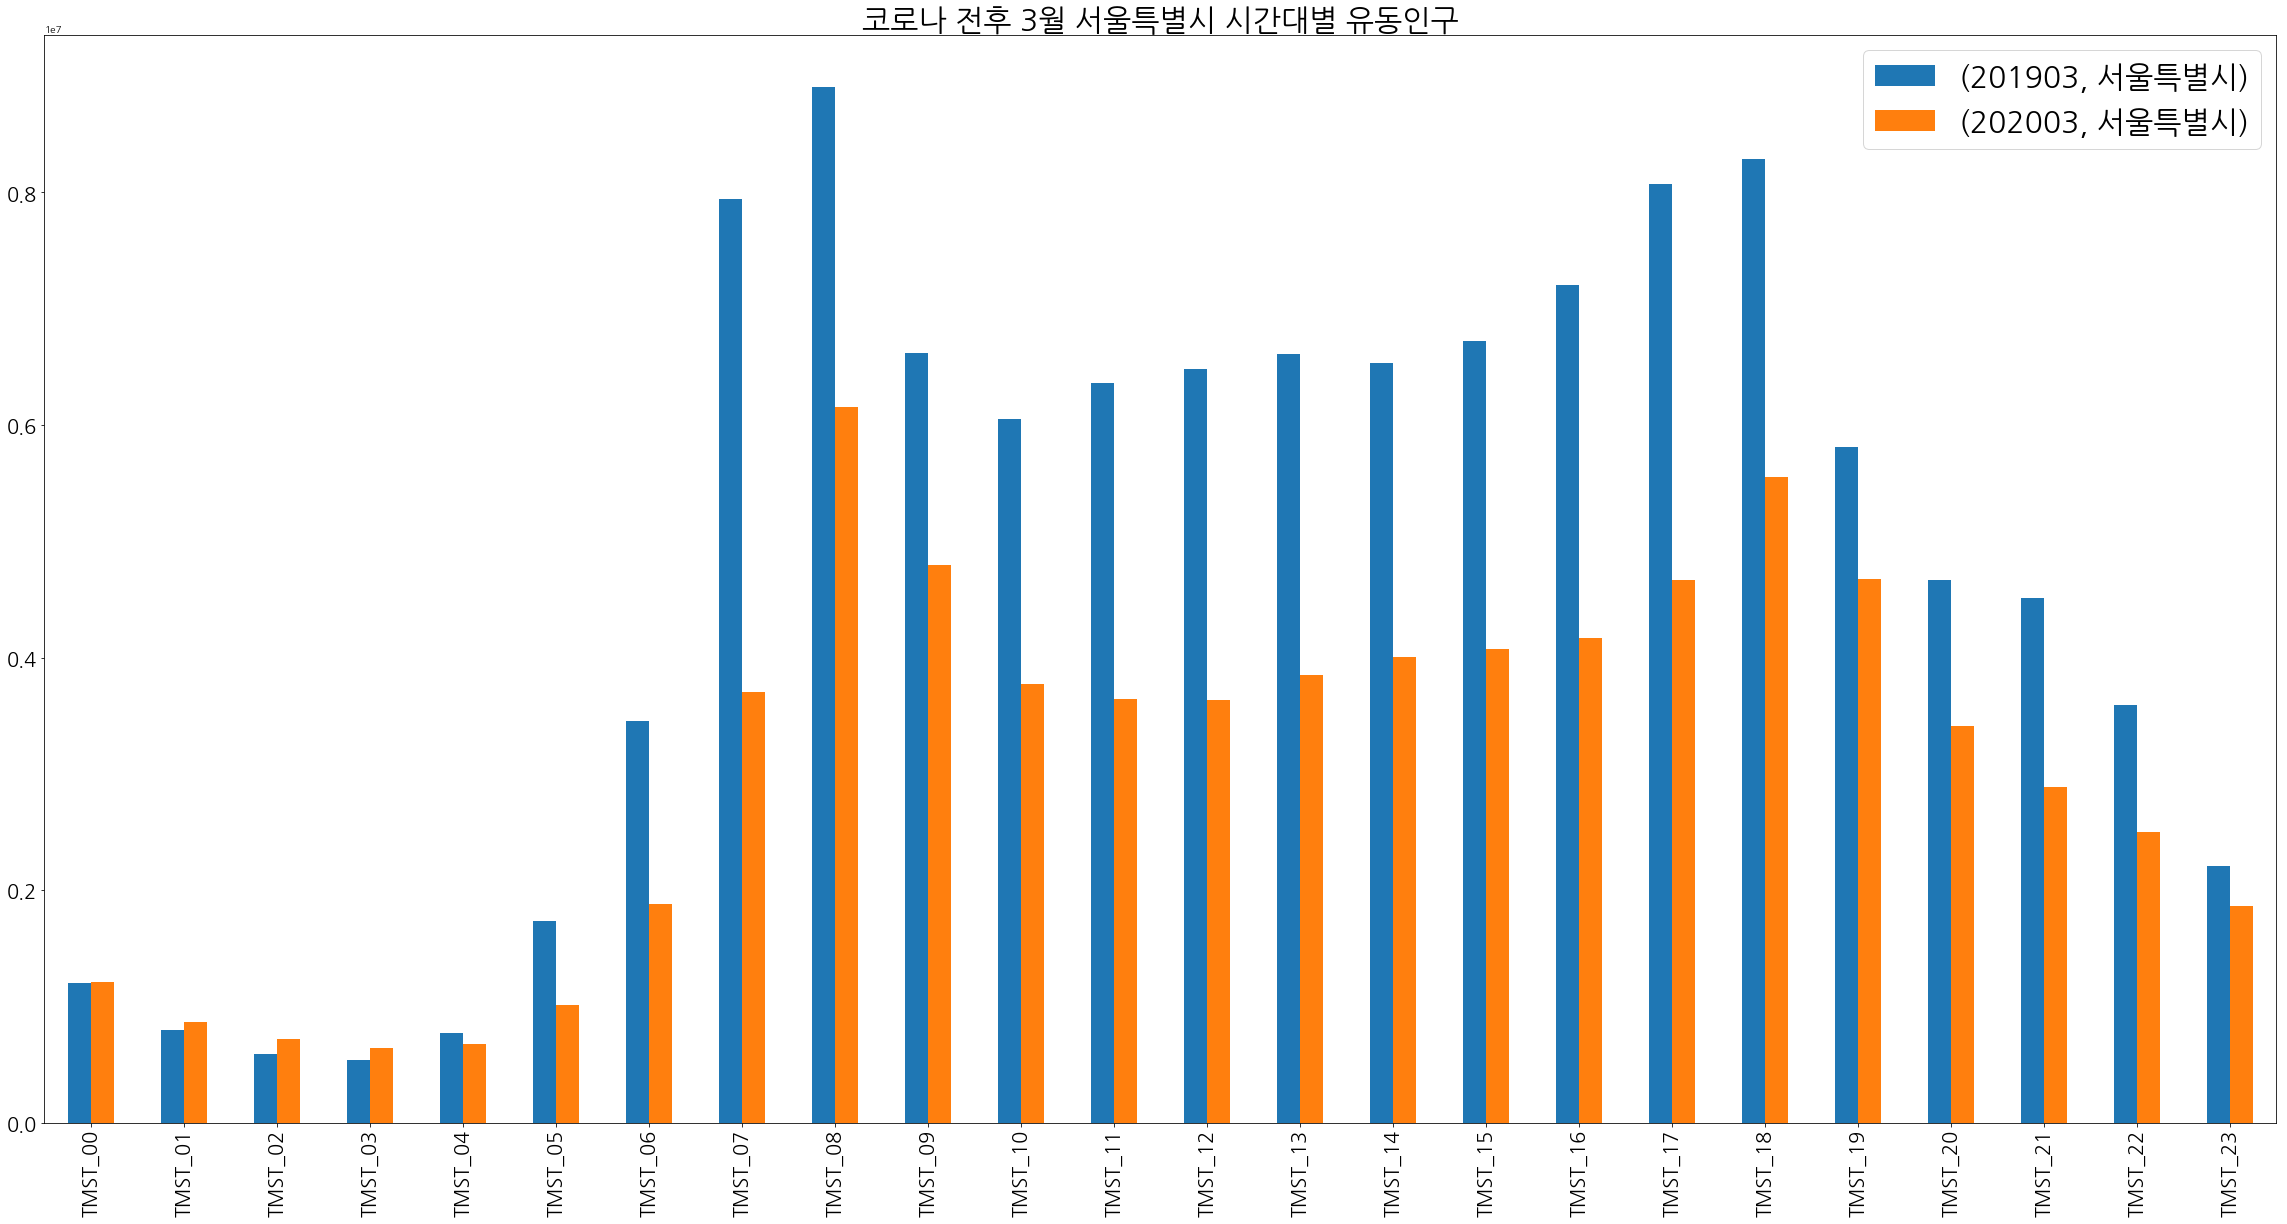

In [54]:
sk_month_move.T.iloc[:, [3, 11]].plot(kind = 'bar')
plt.title('코로나 전후 3월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [55]:
start = 3
end = 11

YM = '3월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 서울의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_07에 제일 크다
3월 서울은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['00', '01', '02', '03']시간에 이동량 증가


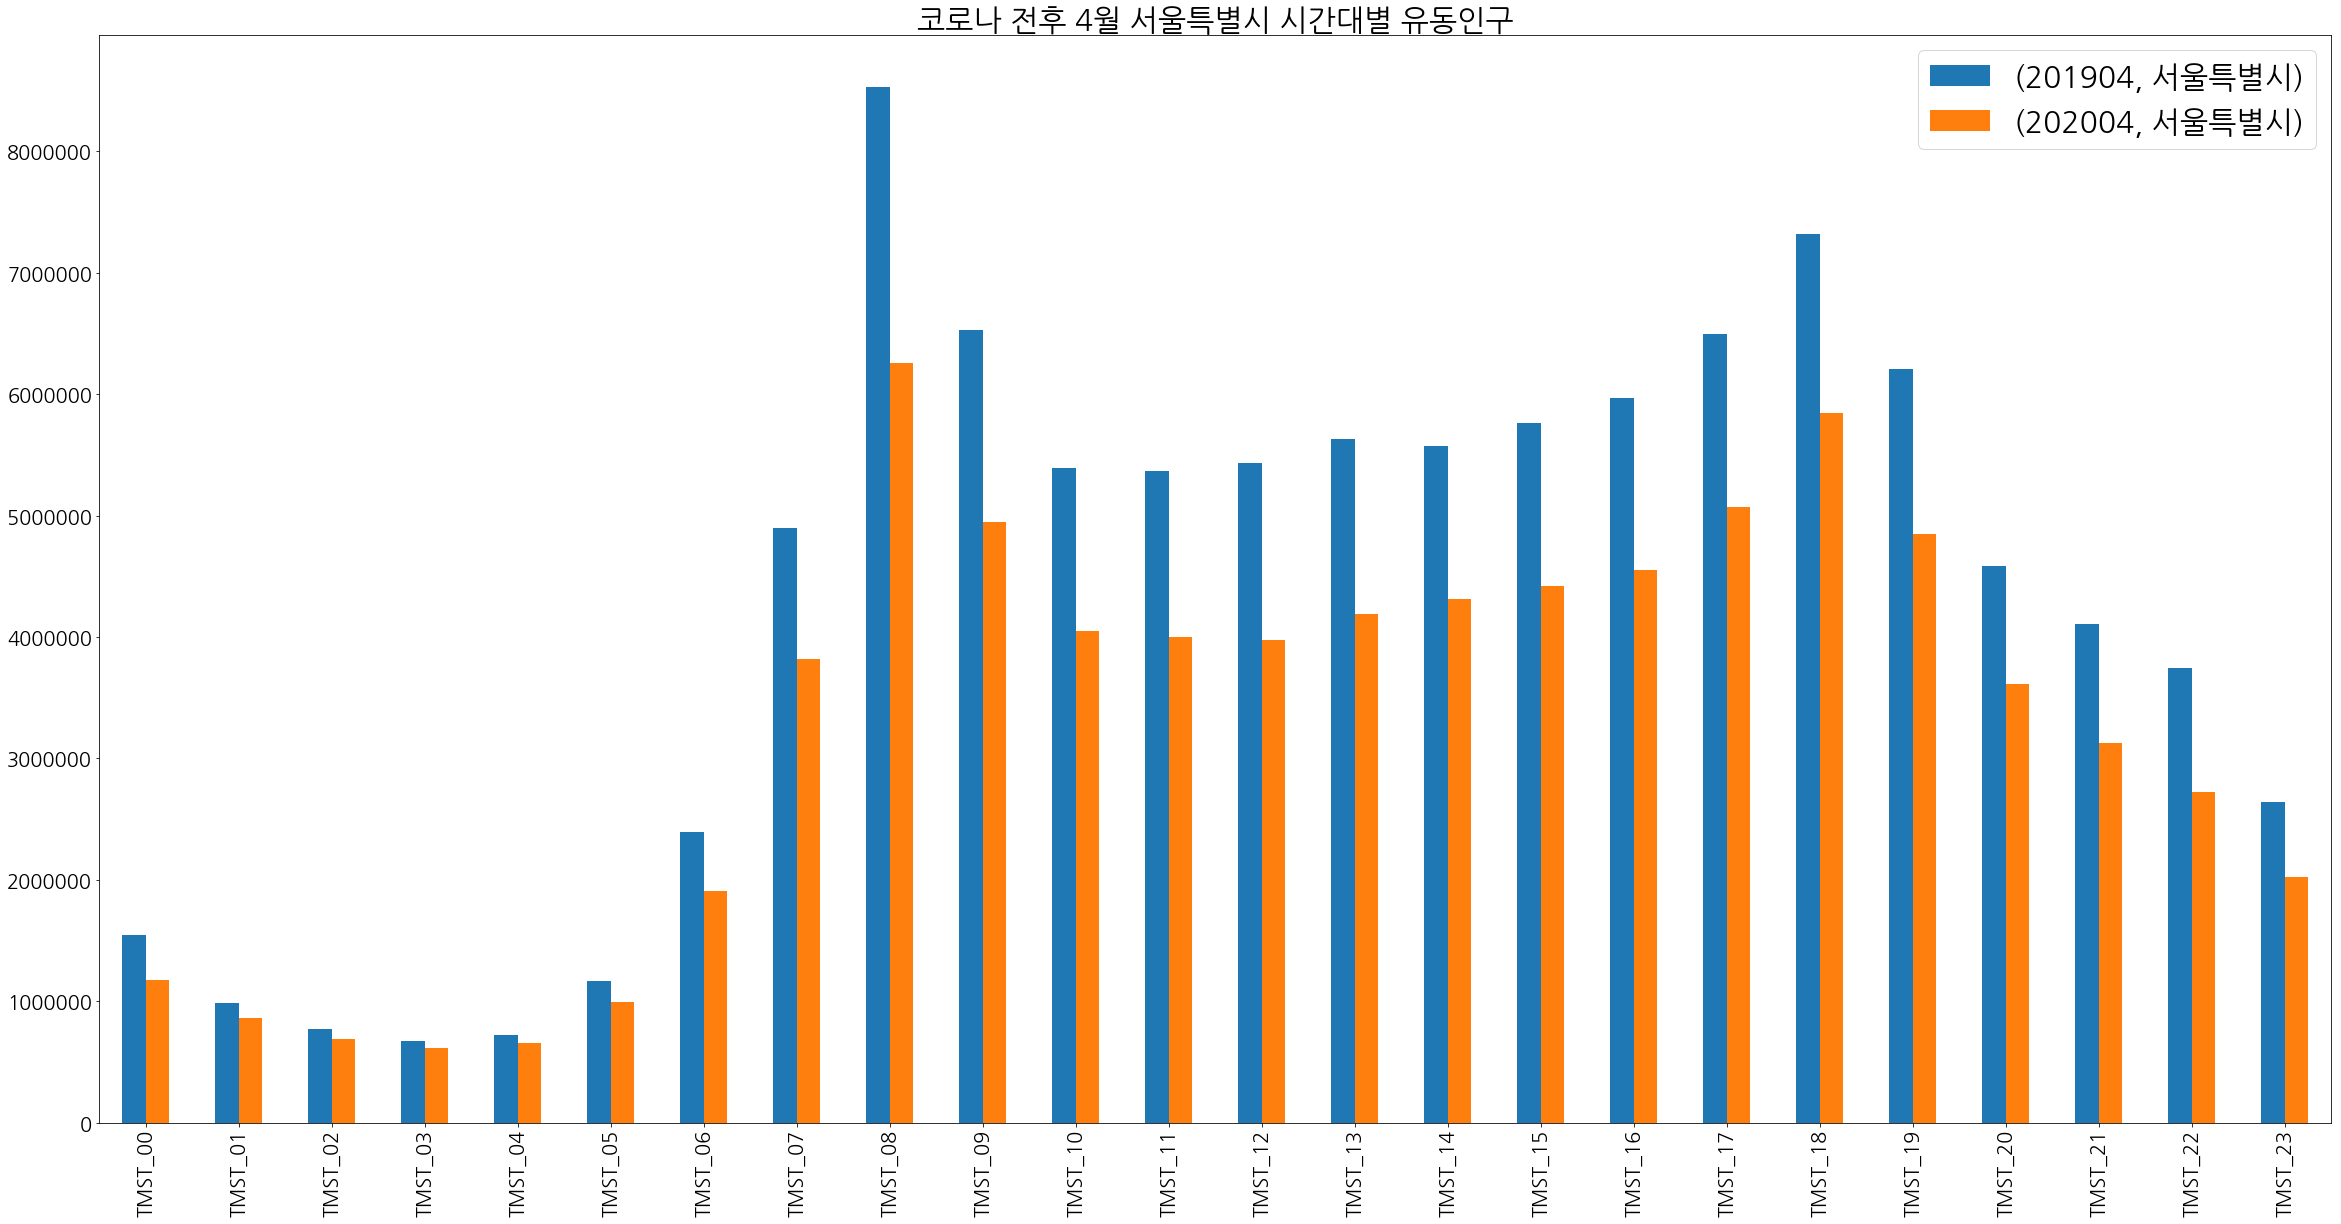

In [56]:
sk_month_move.T.iloc[:, [5, 13]].plot(kind = 'bar')
plt.title('코로나 전후 4월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [57]:
start = 5
end = 13

YM = '4월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 서울의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
4월 서울은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


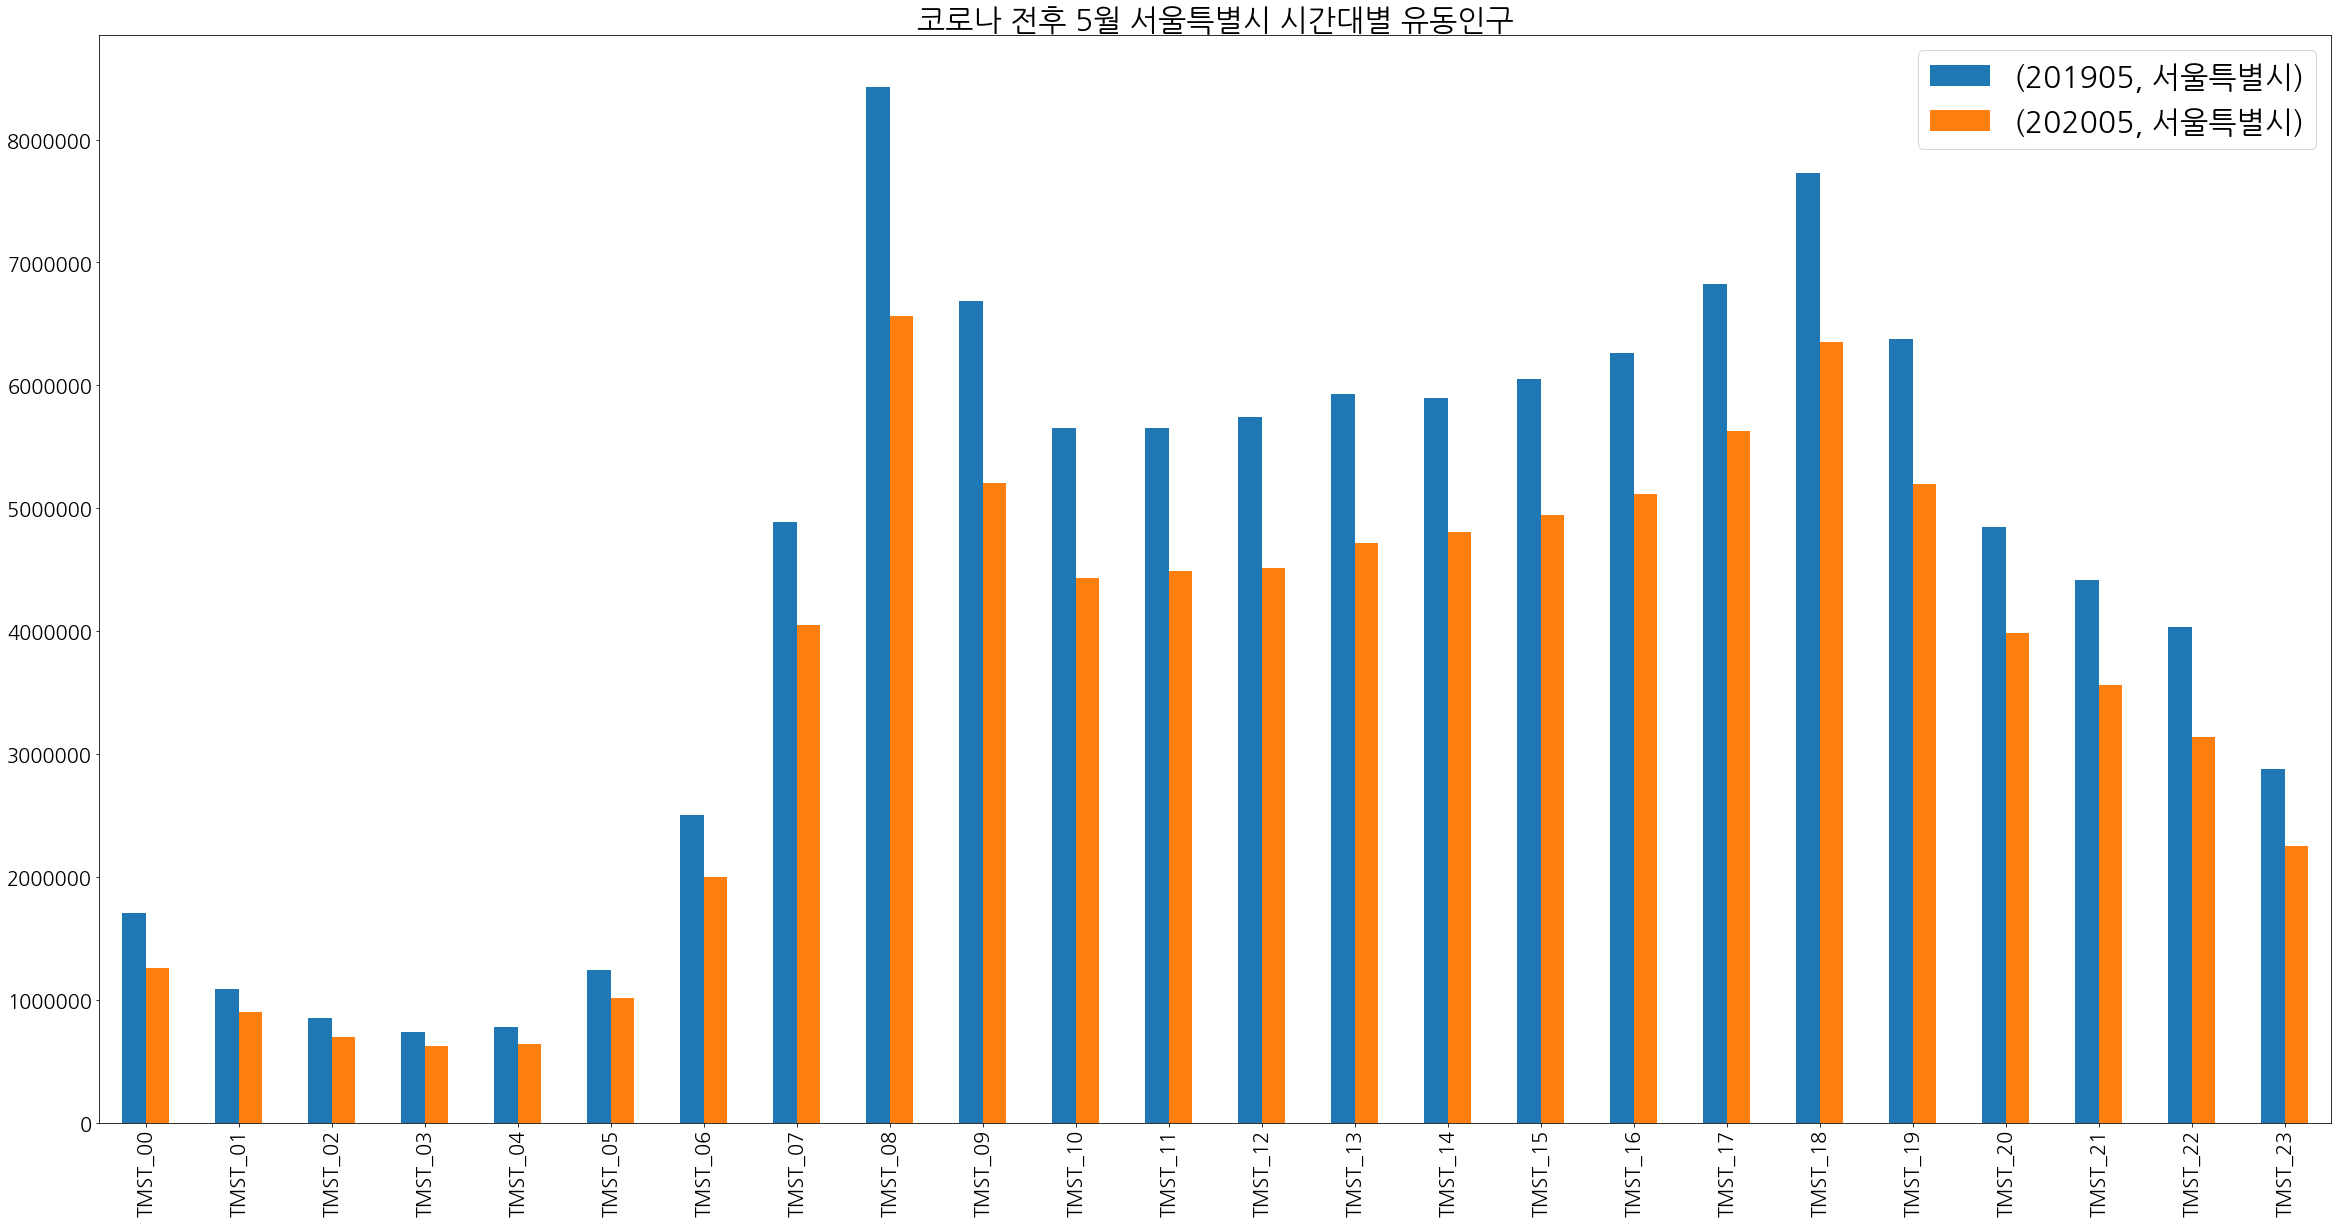

In [58]:
sk_month_move.T.iloc[:, [7, 15]].plot(kind = 'bar')
plt.title('코로나 전후 5월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [59]:
start = 7
end = 15

YM = '5월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 서울의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
5월 서울은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


### 3-1-2. 대구

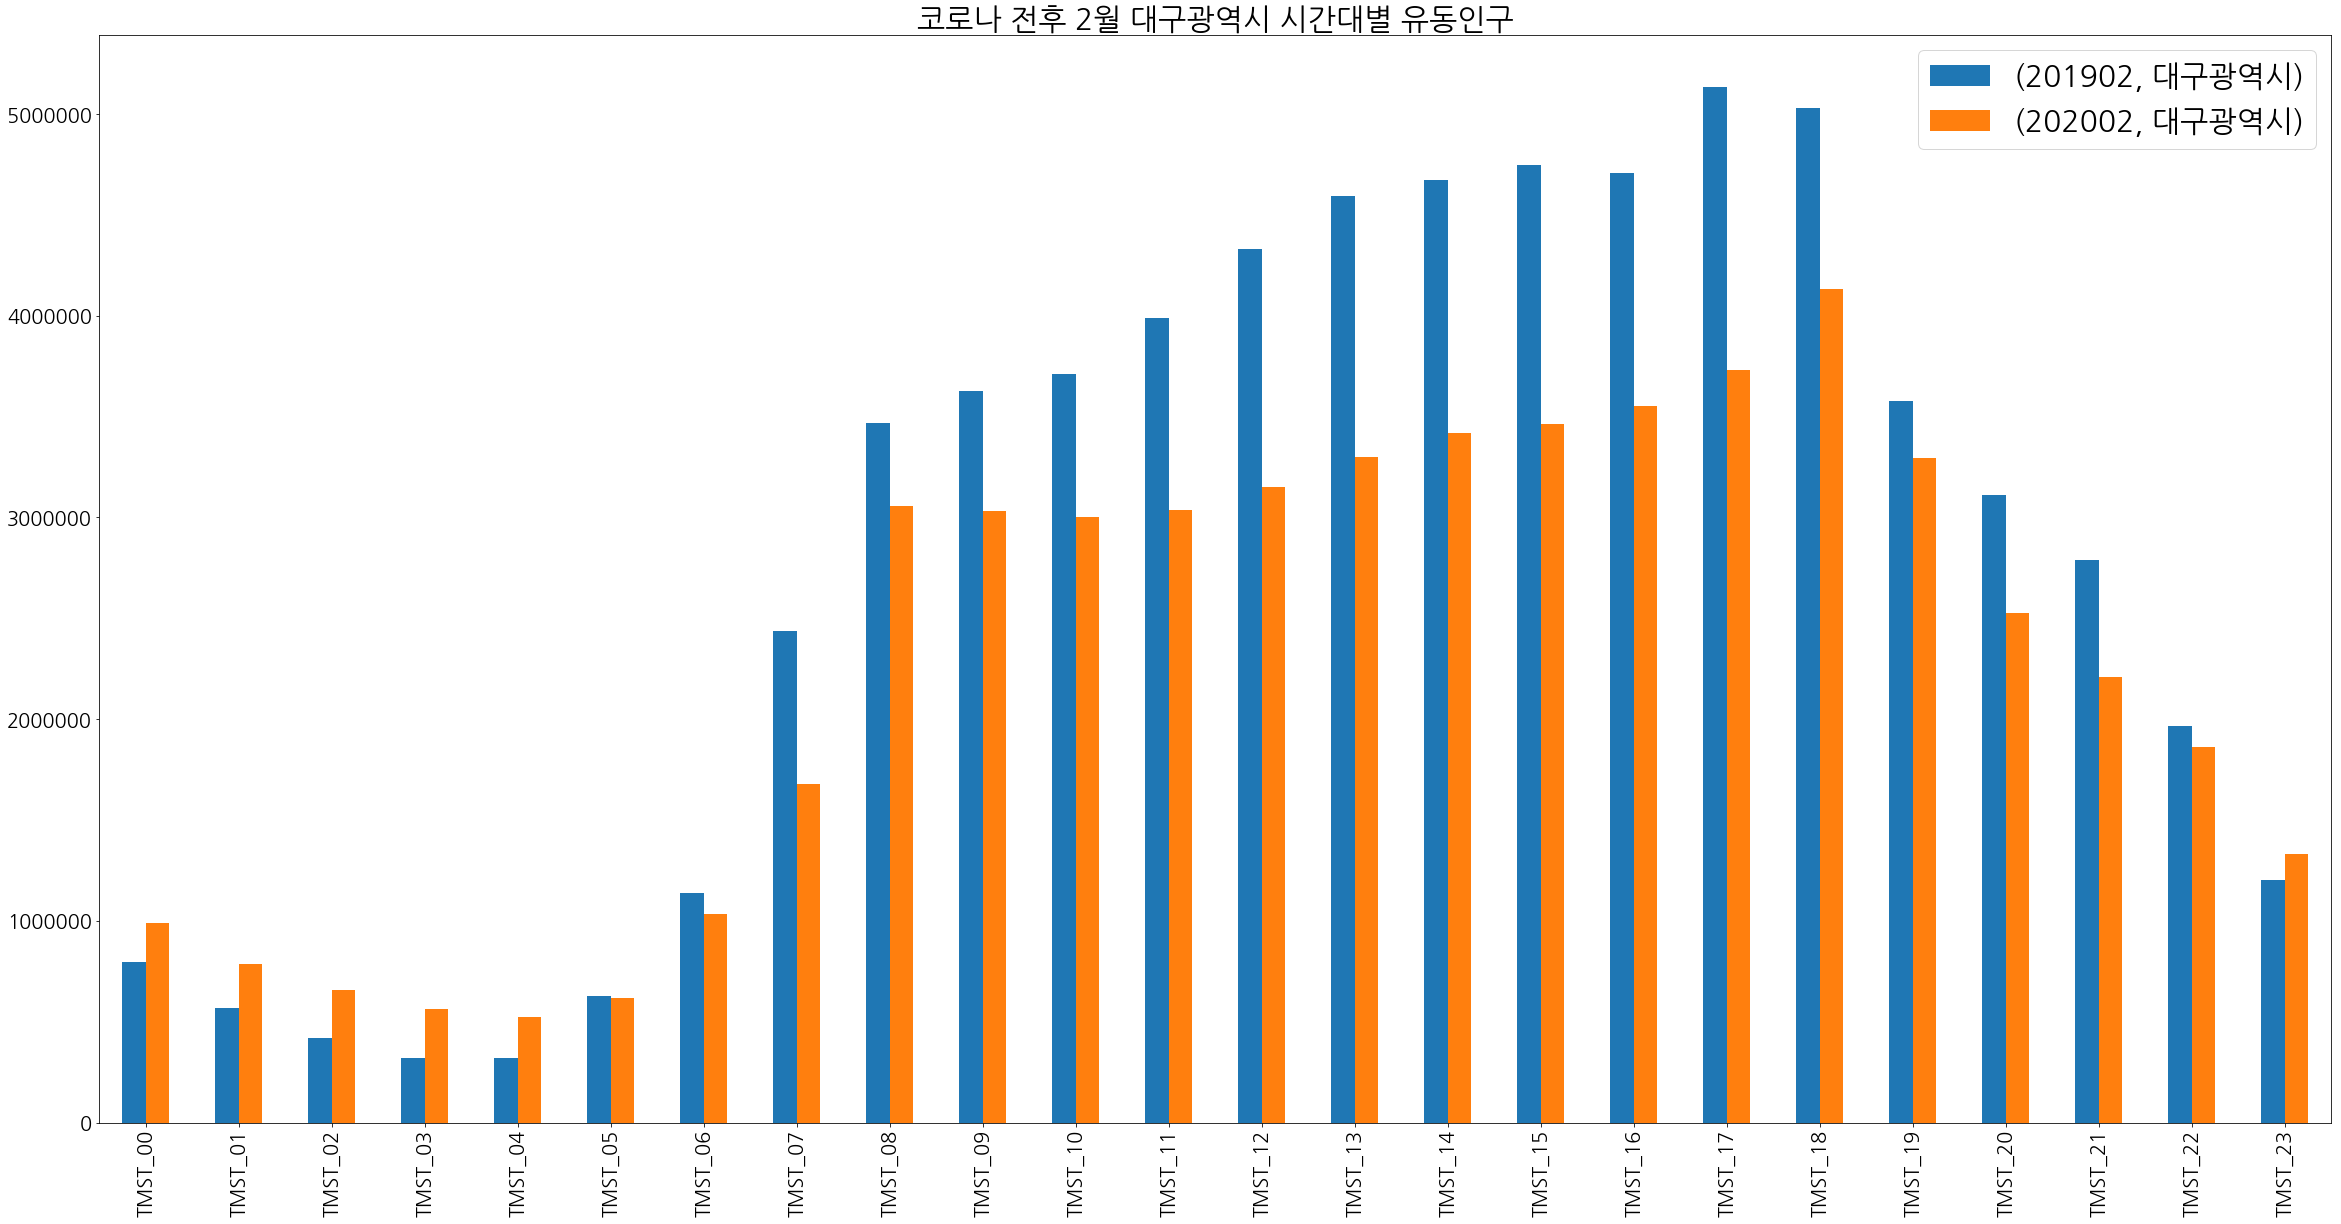

In [60]:
sk_month_move.T.iloc[:, [0, 8]].plot(kind = 'bar')
plt.title('코로나 전후 2월 대구광역시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [61]:
start = 0
end = 8

YM = '2월 대구'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 대구의 유동인구 변화량은 TMST_05에 제일 작으며, TMST_17에 제일 크다
2월 대구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '23']시간에 이동량 증가


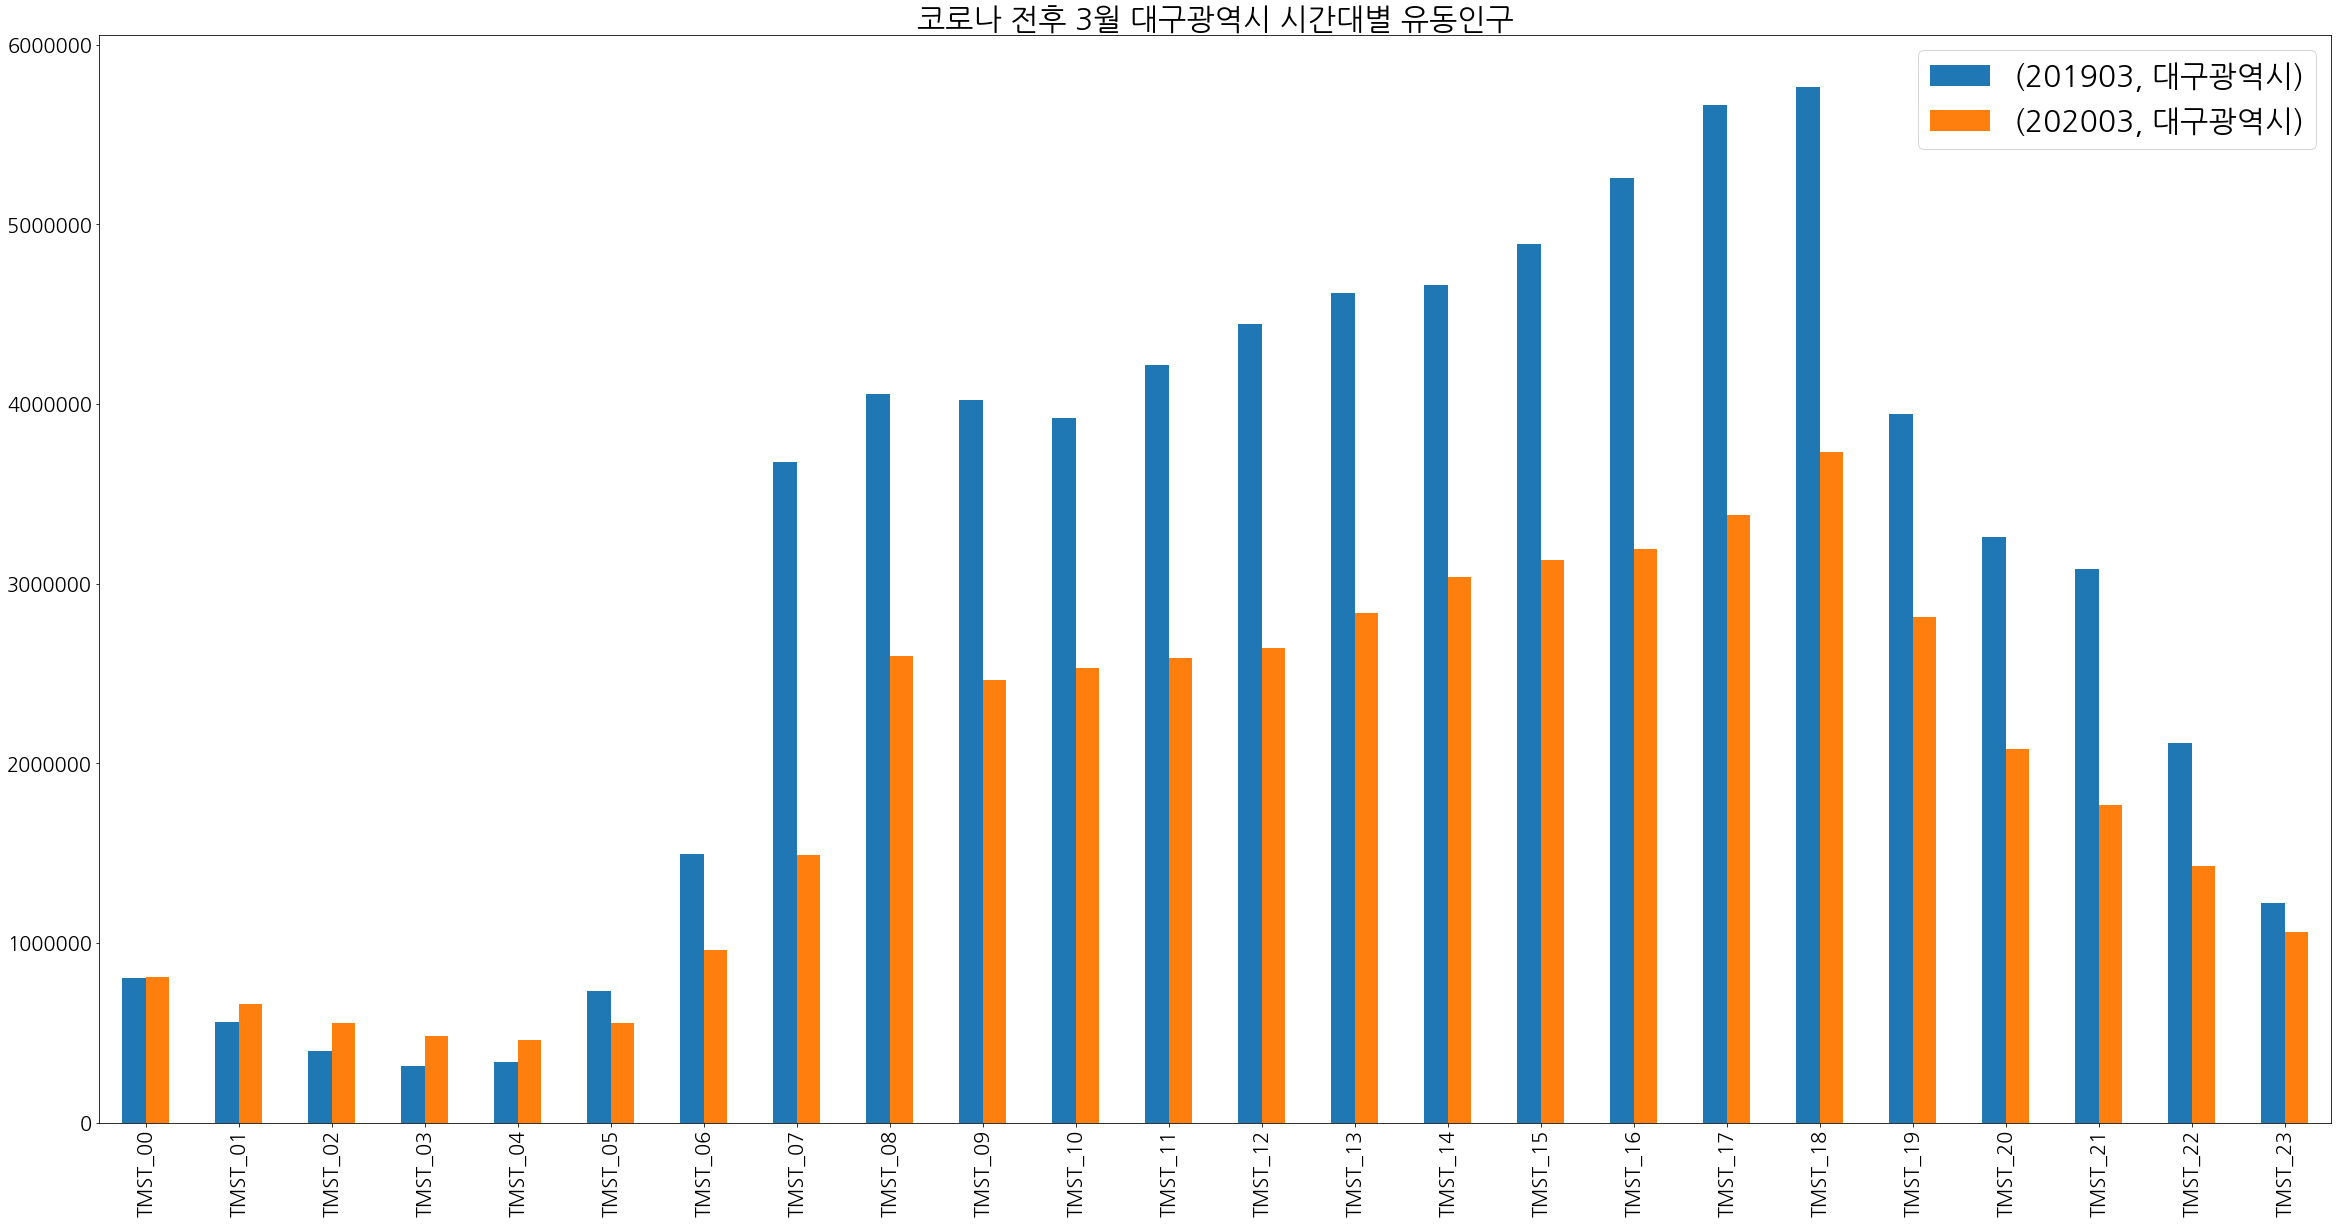

In [63]:
sk_month_move.T.iloc[:, [2, 10]].plot(kind = 'bar')
plt.title('코로나 전후 3월 대구광역시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [68]:
start = 2
end = 10

YM = '3월 대구'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 대구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_17에 제일 크다
3월 대구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['00', '01', '02', '03', '04']시간에 이동량 증가


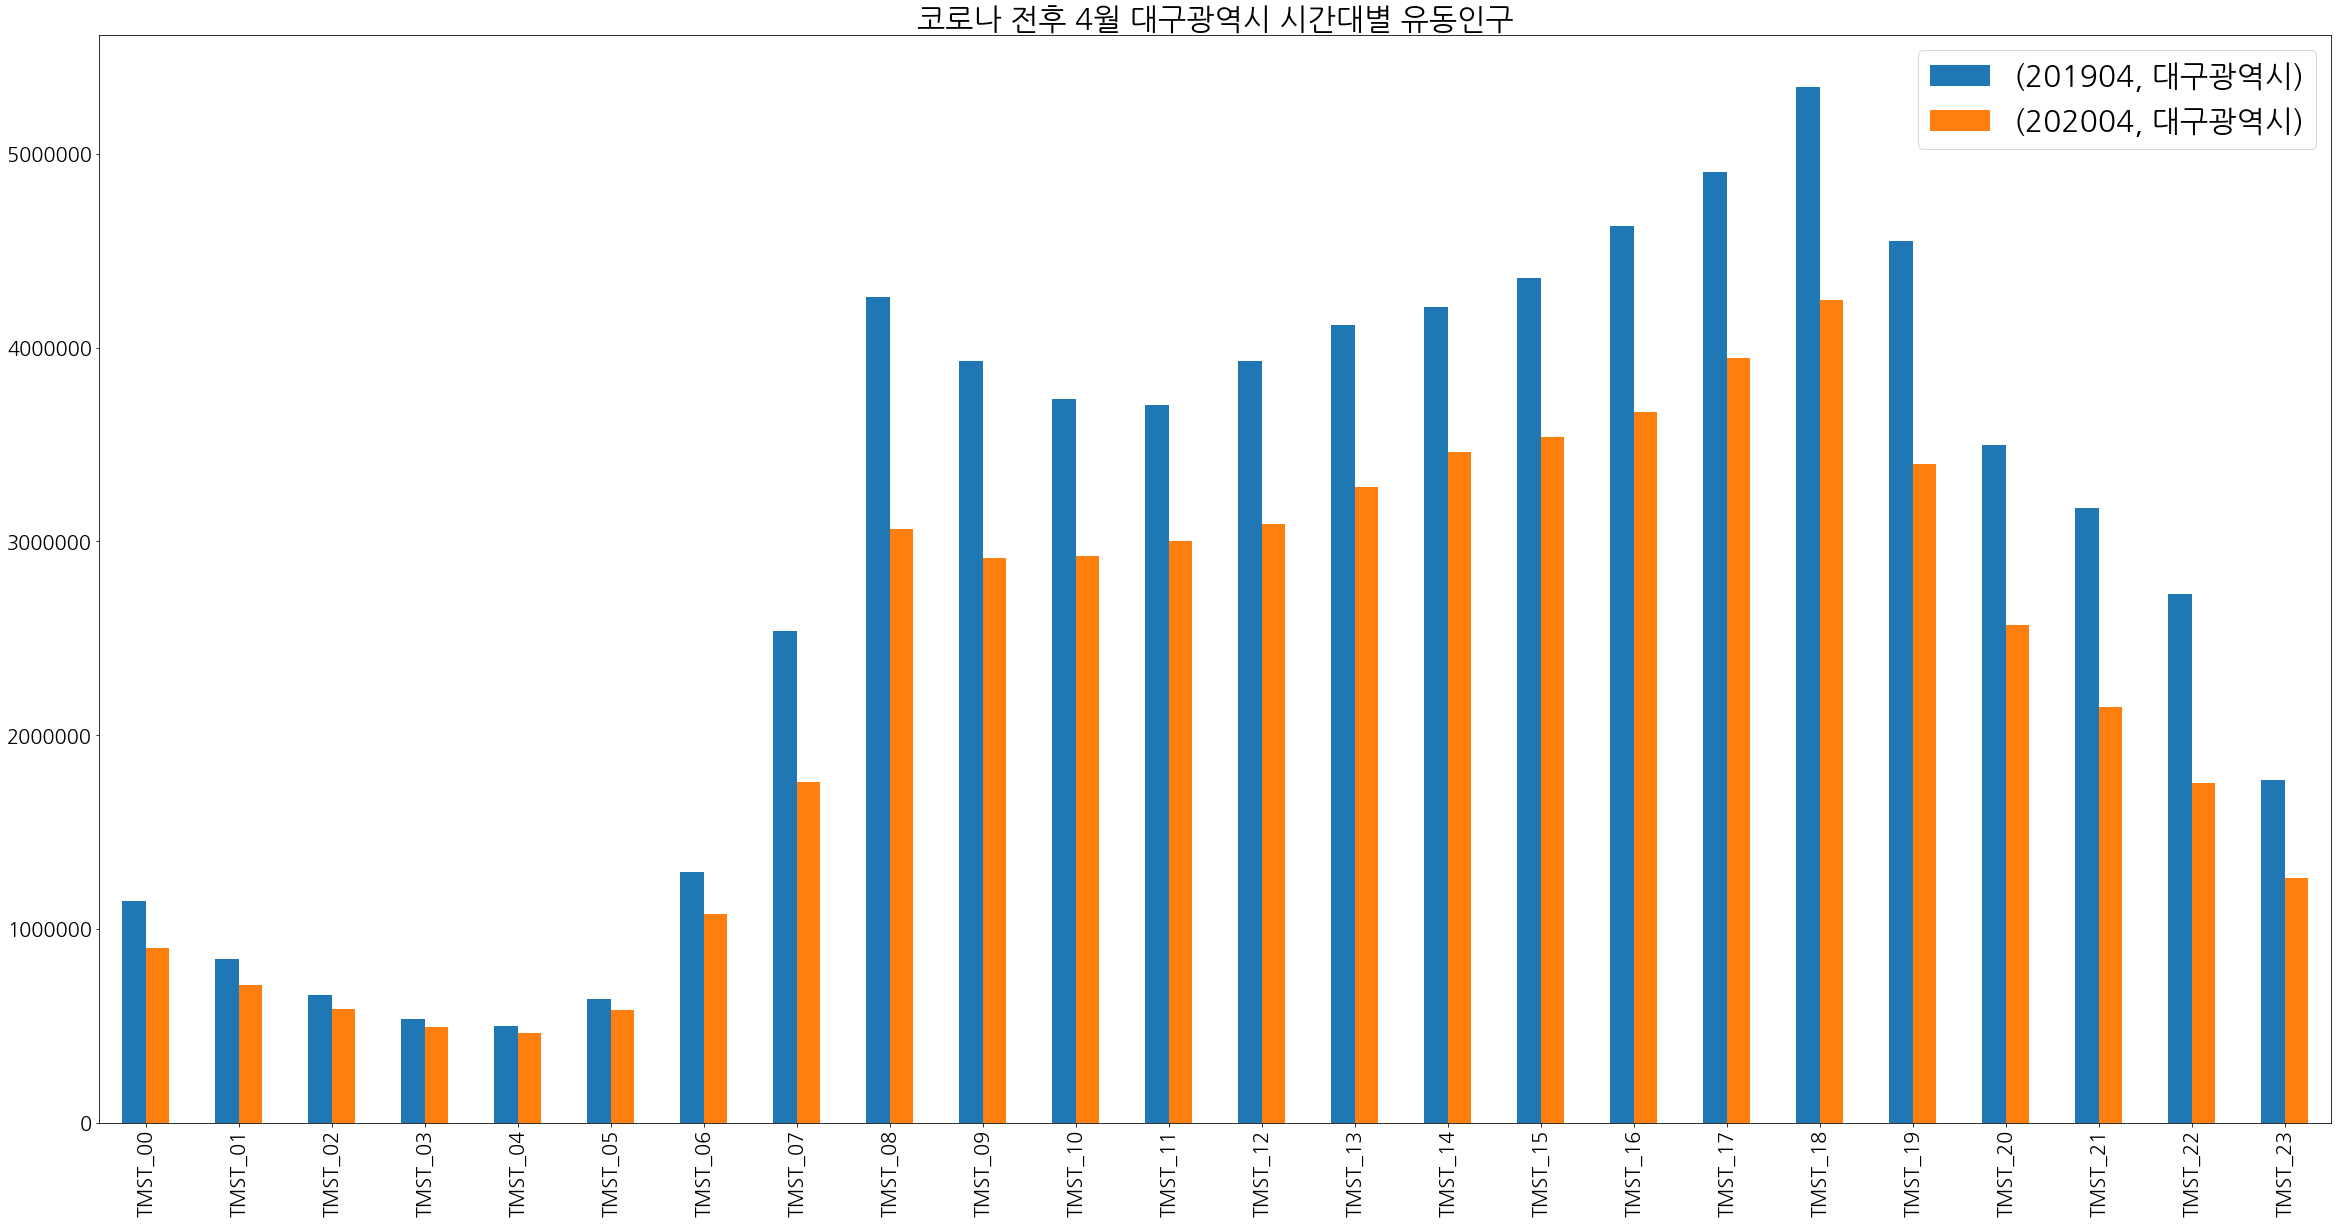

In [65]:
sk_month_move.T.iloc[:, [4, 12]].plot(kind = 'bar')
plt.title('코로나 전후 4월 대구광역시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [69]:
start = 4
end = 12

YM = '4월 대구'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 대구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
4월 대구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


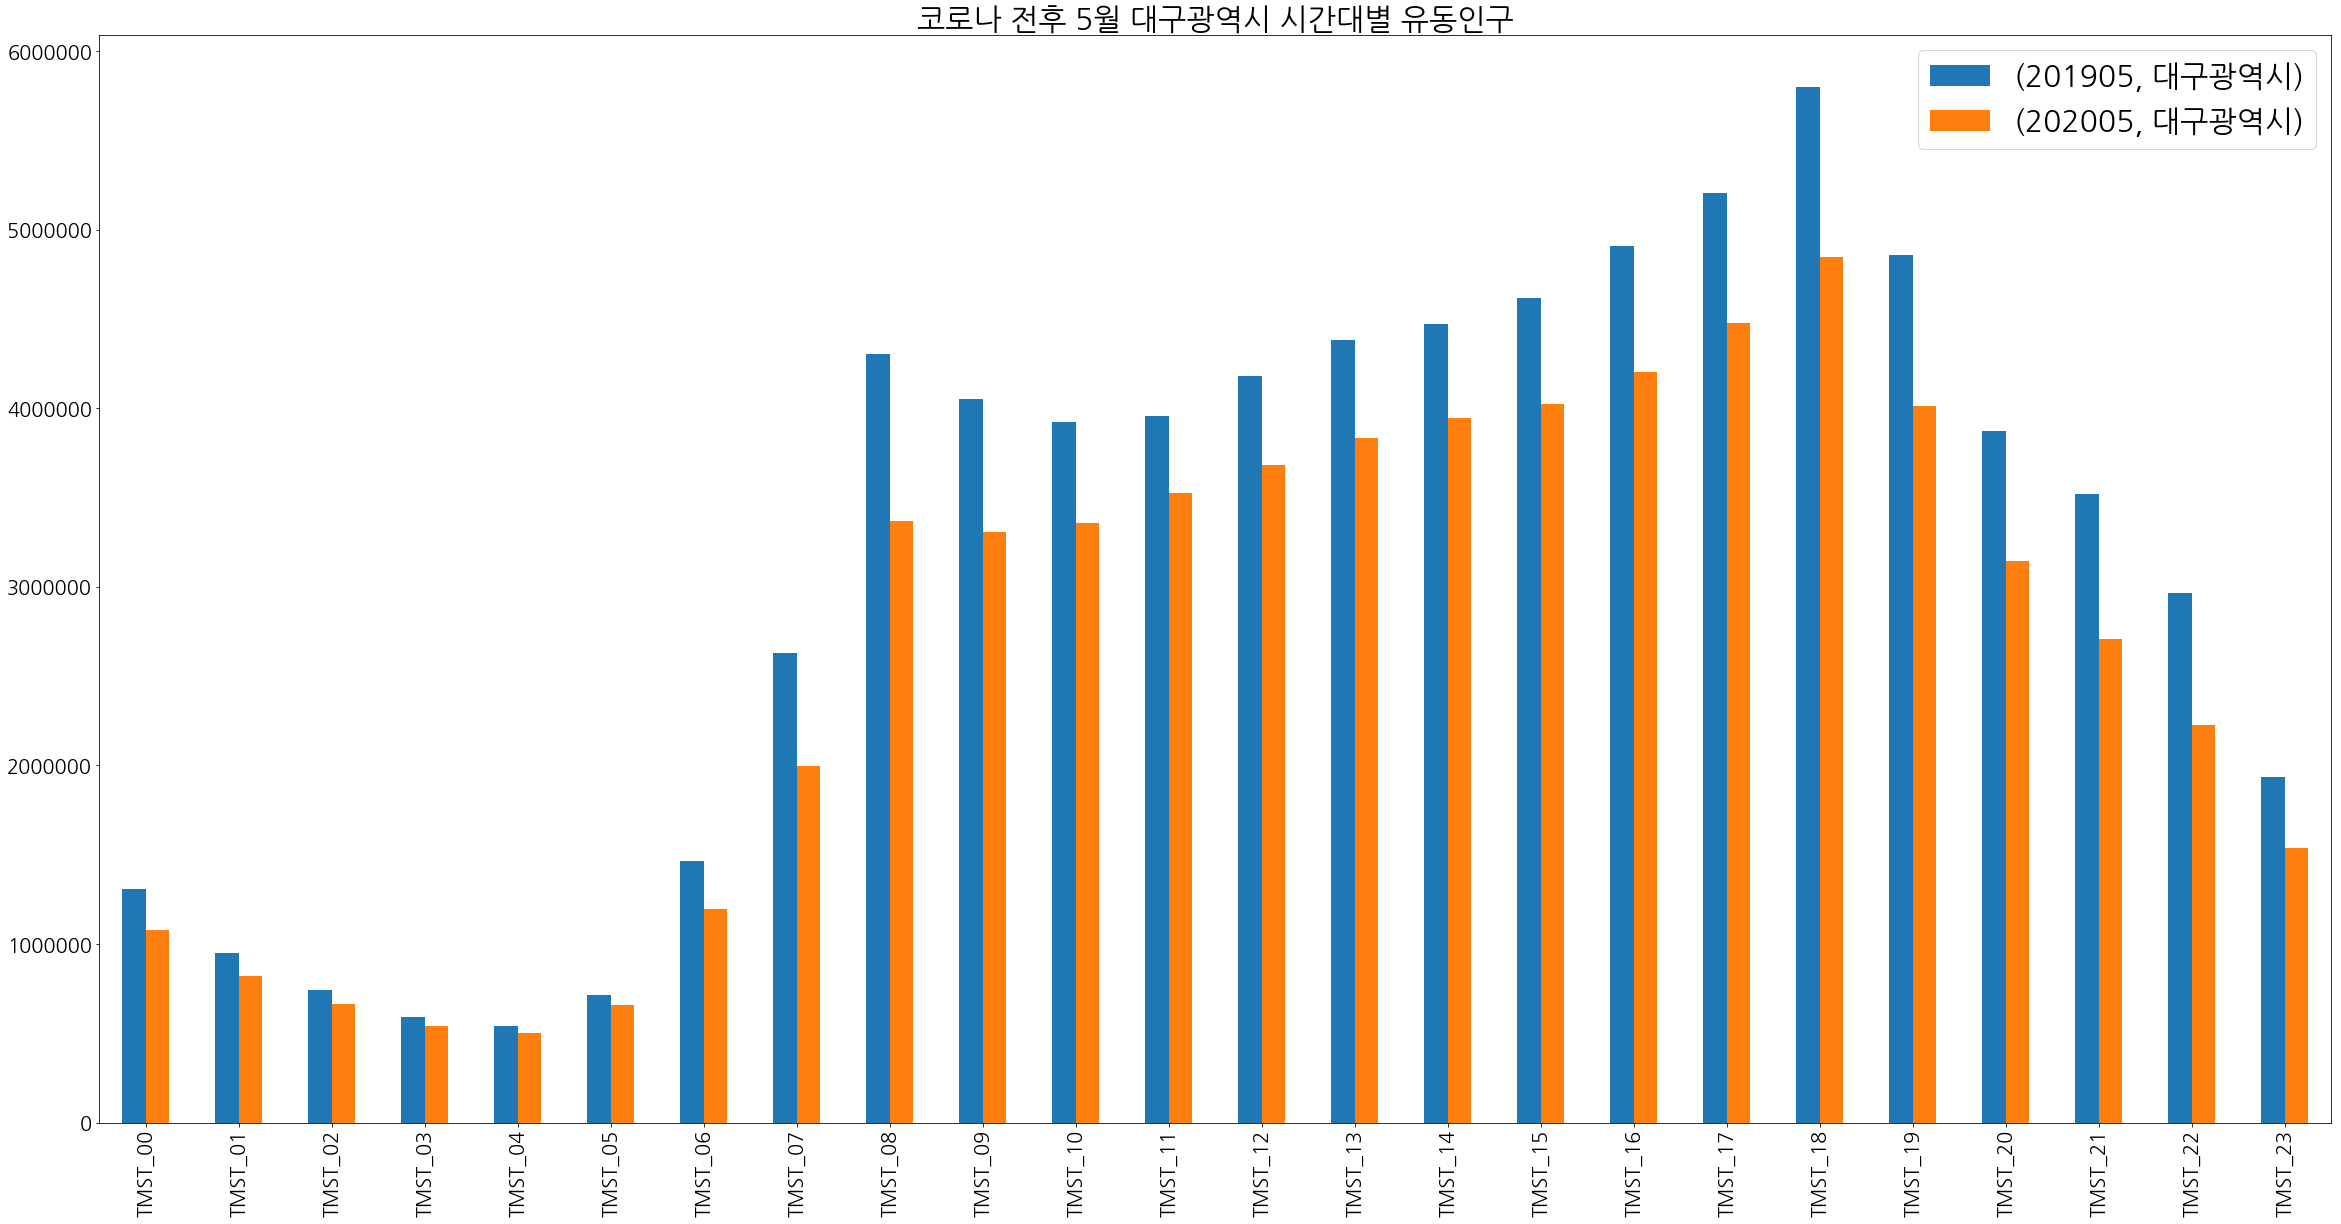

In [70]:
sk_month_move.T.iloc[:, [6, 14]].plot(kind = 'bar')
plt.title('코로나 전후 5월 대구광역시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [71]:
start = 6
end = 14

YM = '5월 대구'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 대구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_18에 제일 크다
5월 대구은 TMST_18에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


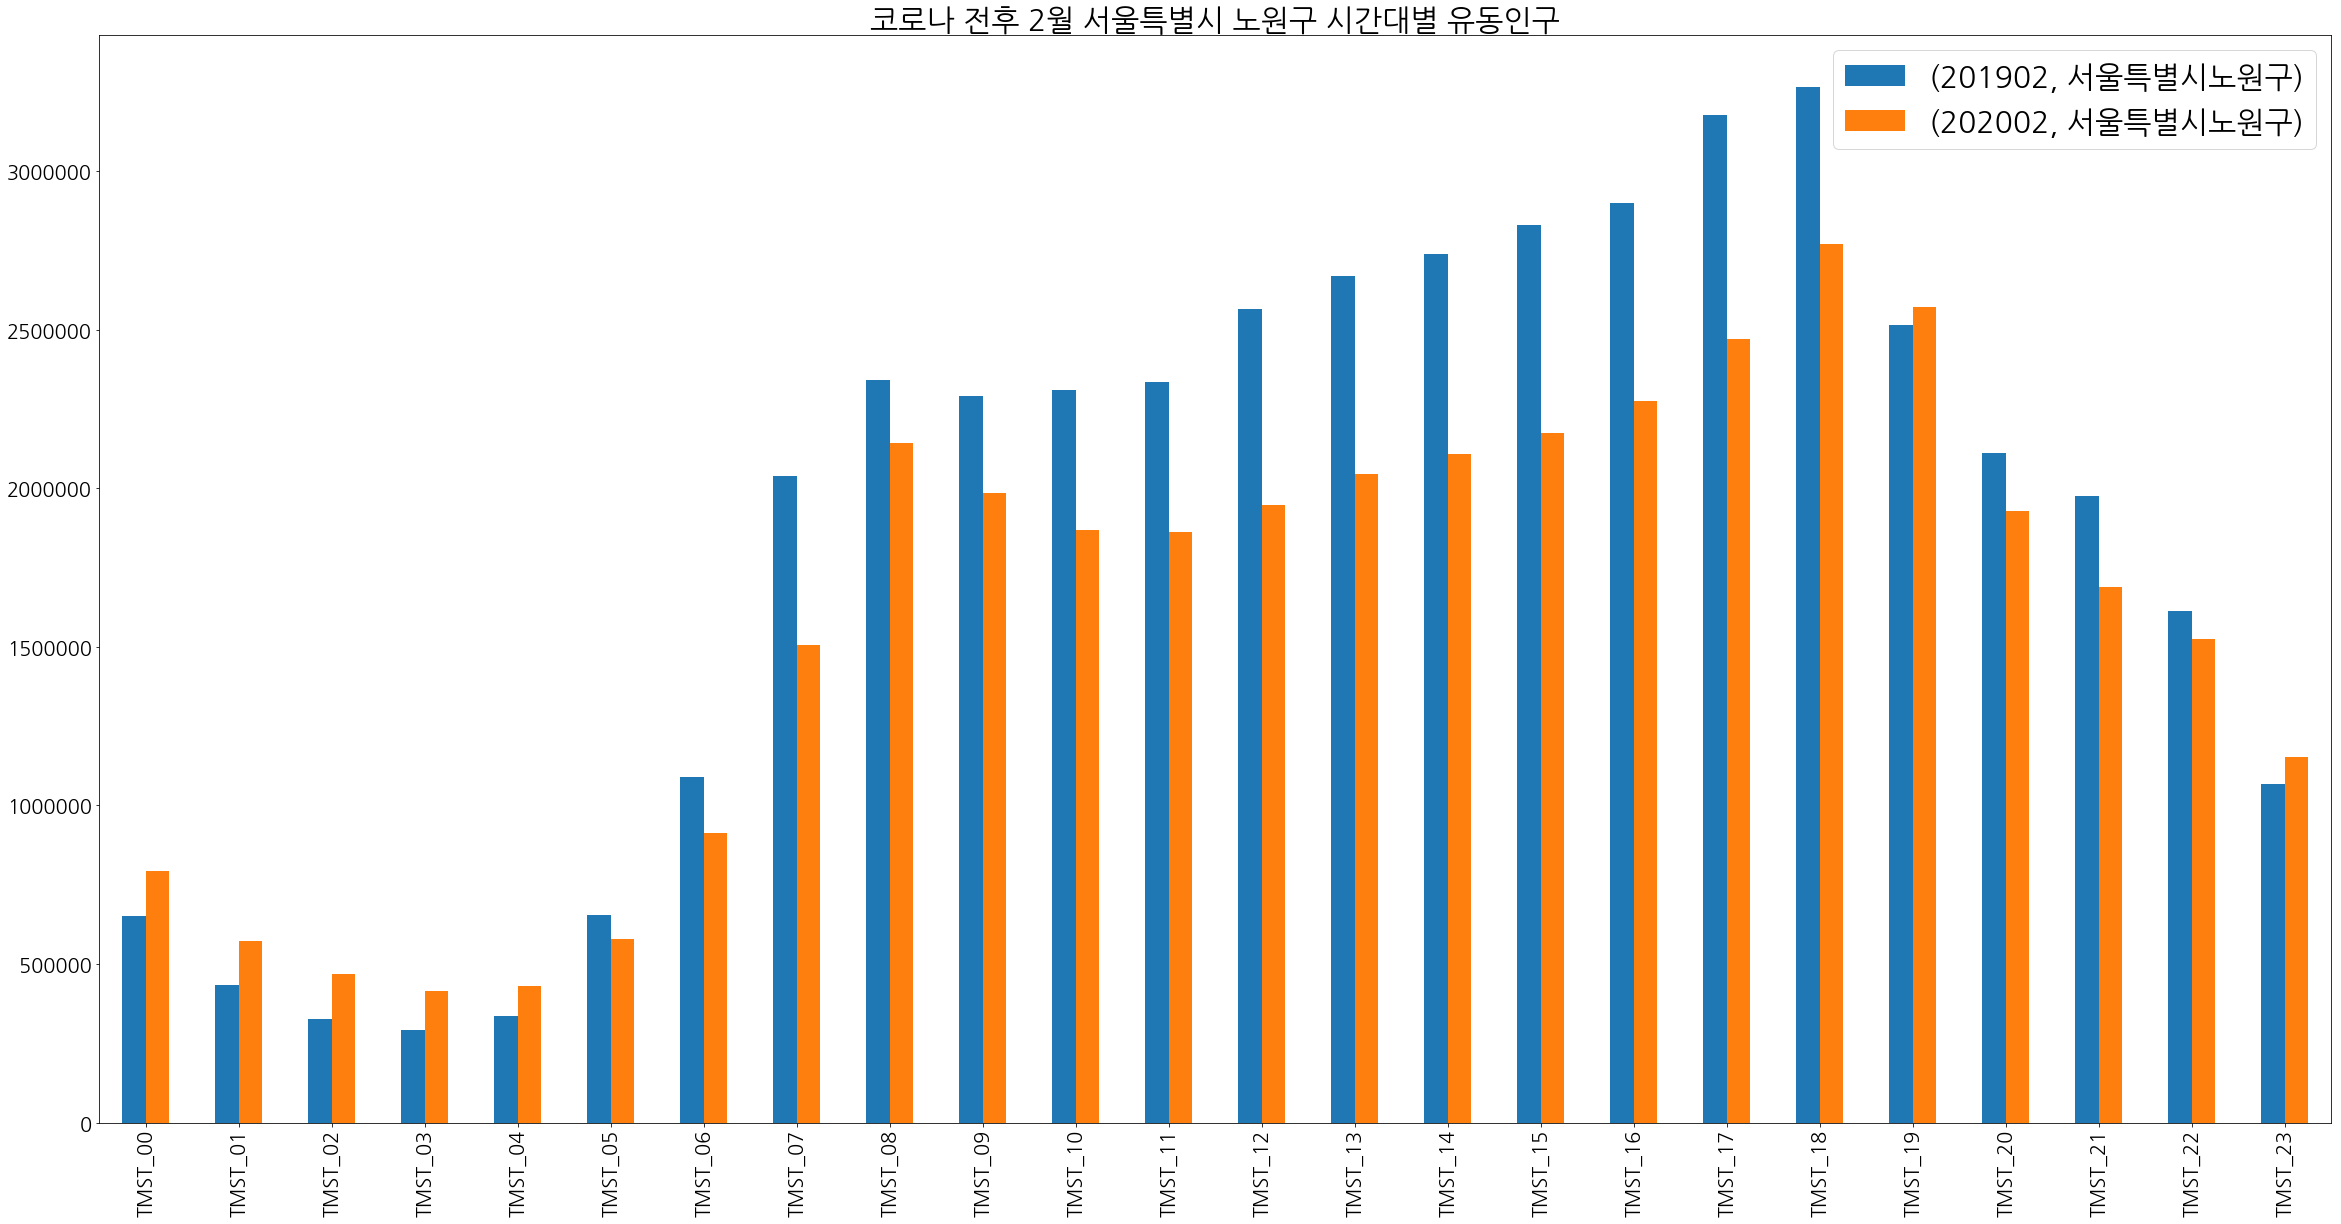

In [99]:
sk_month_GU_move.T.iloc[:, [2, 18]].plot(kind = 'bar')
plt.title('코로나 전후 2월 서울특별시 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [100]:
start = 2
end = 18

YM = '2월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 노원구의 유동인구 변화량은 TMST_19에 제일 작으며, TMST_17에 제일 크다
2월 노원구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_00에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '19', '23']시간에 이동량 증가


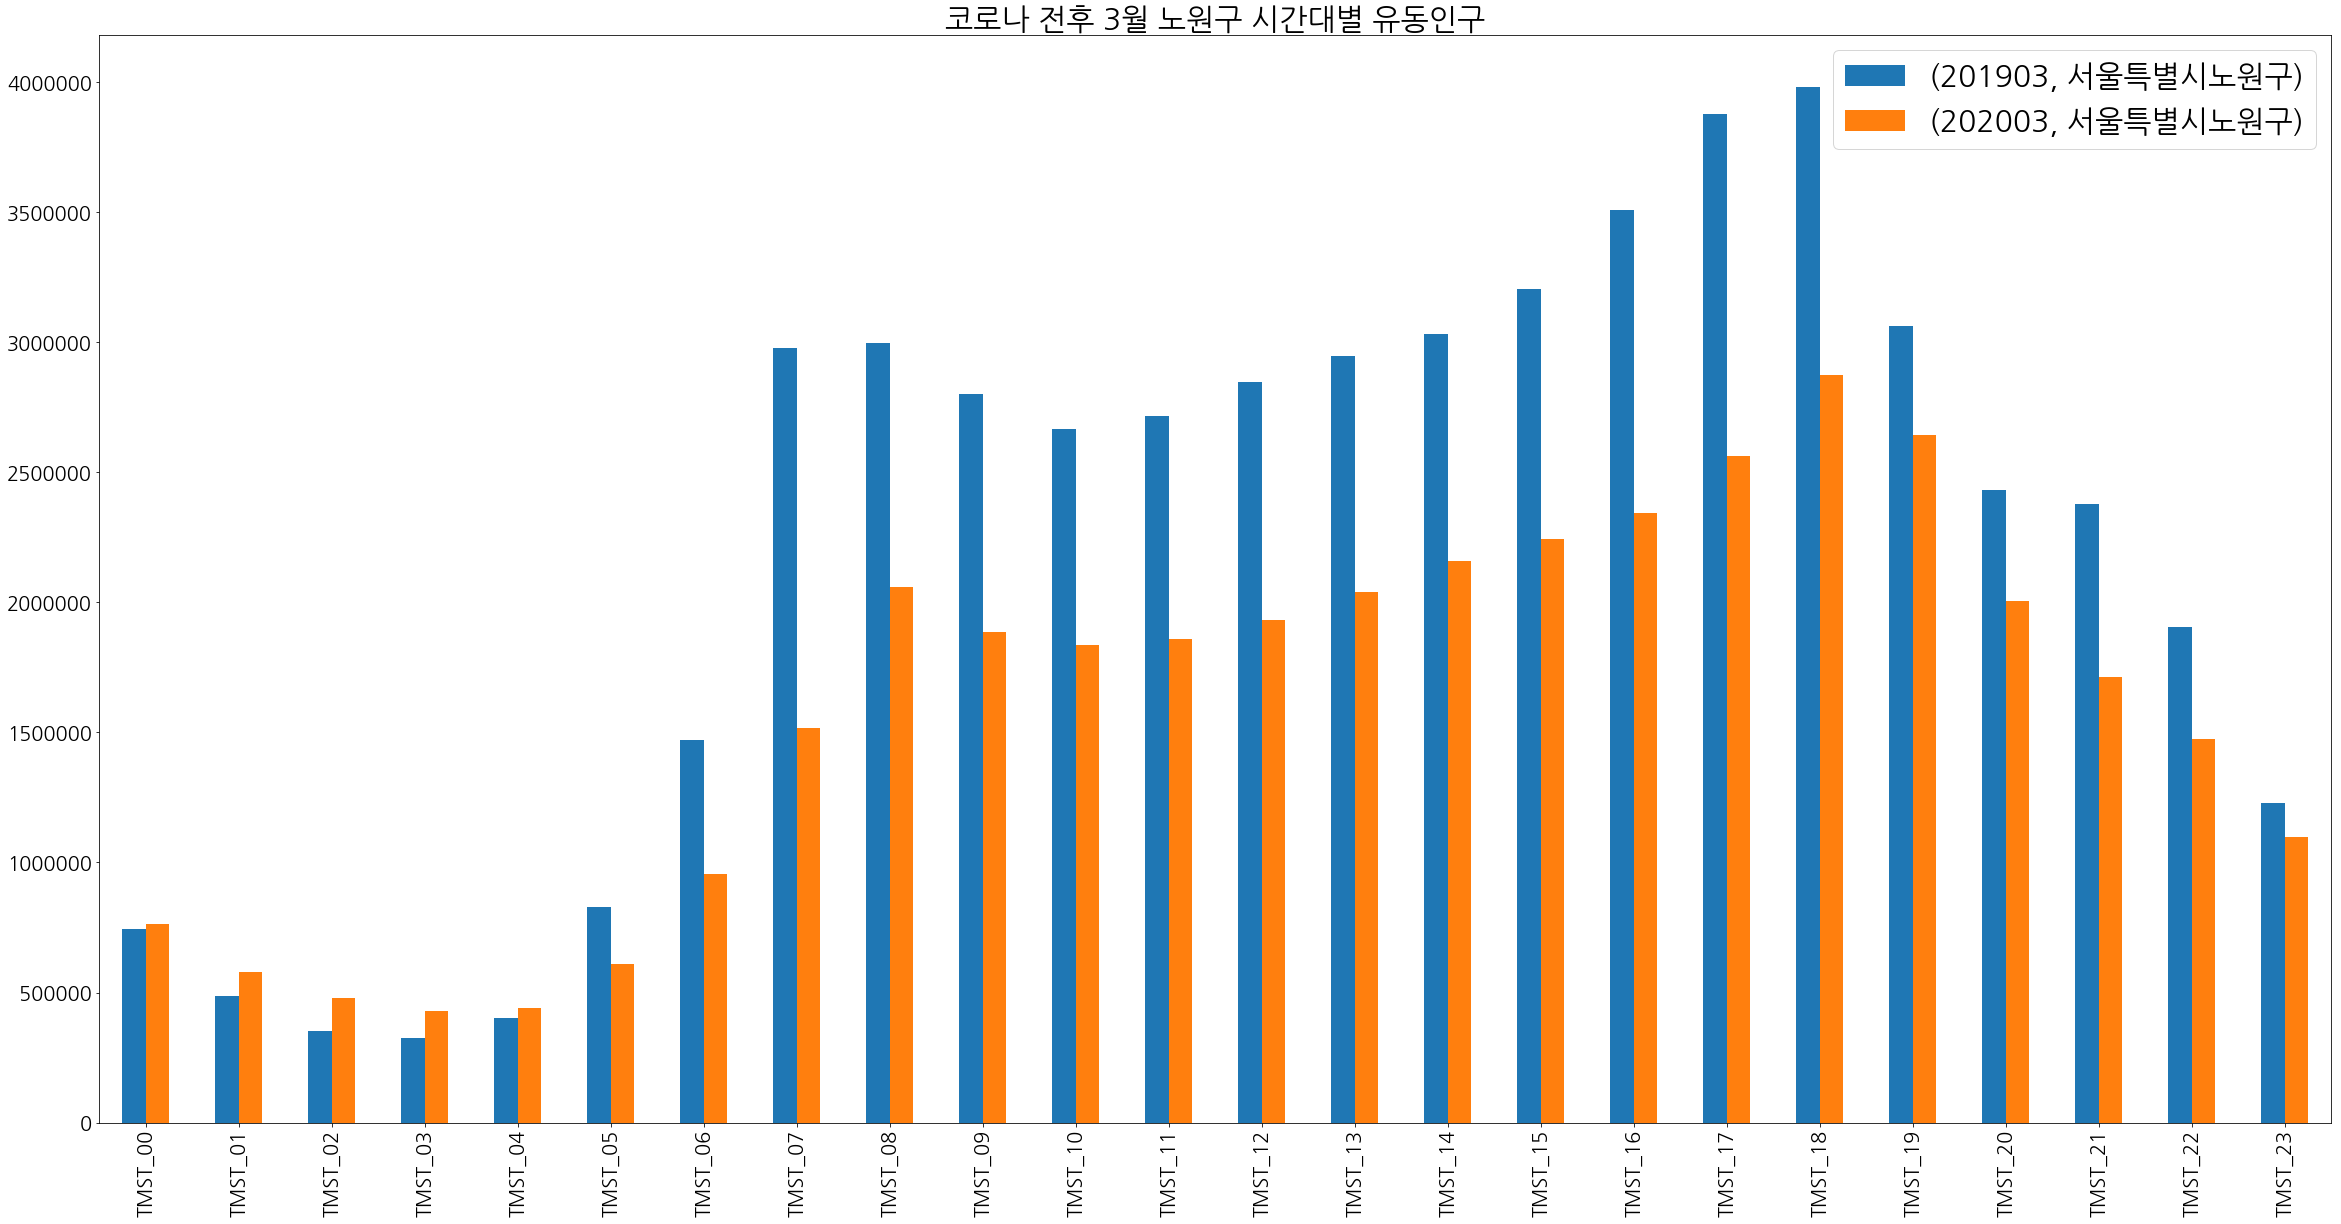

In [101]:
sk_month_GU_move.T.iloc[:, [6, 22]].plot(kind = 'bar')
plt.title('코로나 전후 3월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [102]:
start = 6
end = 22

YM = '3월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 노원구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_07에 제일 크다
3월 노원구은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['00', '01', '02', '03', '04']시간에 이동량 증가


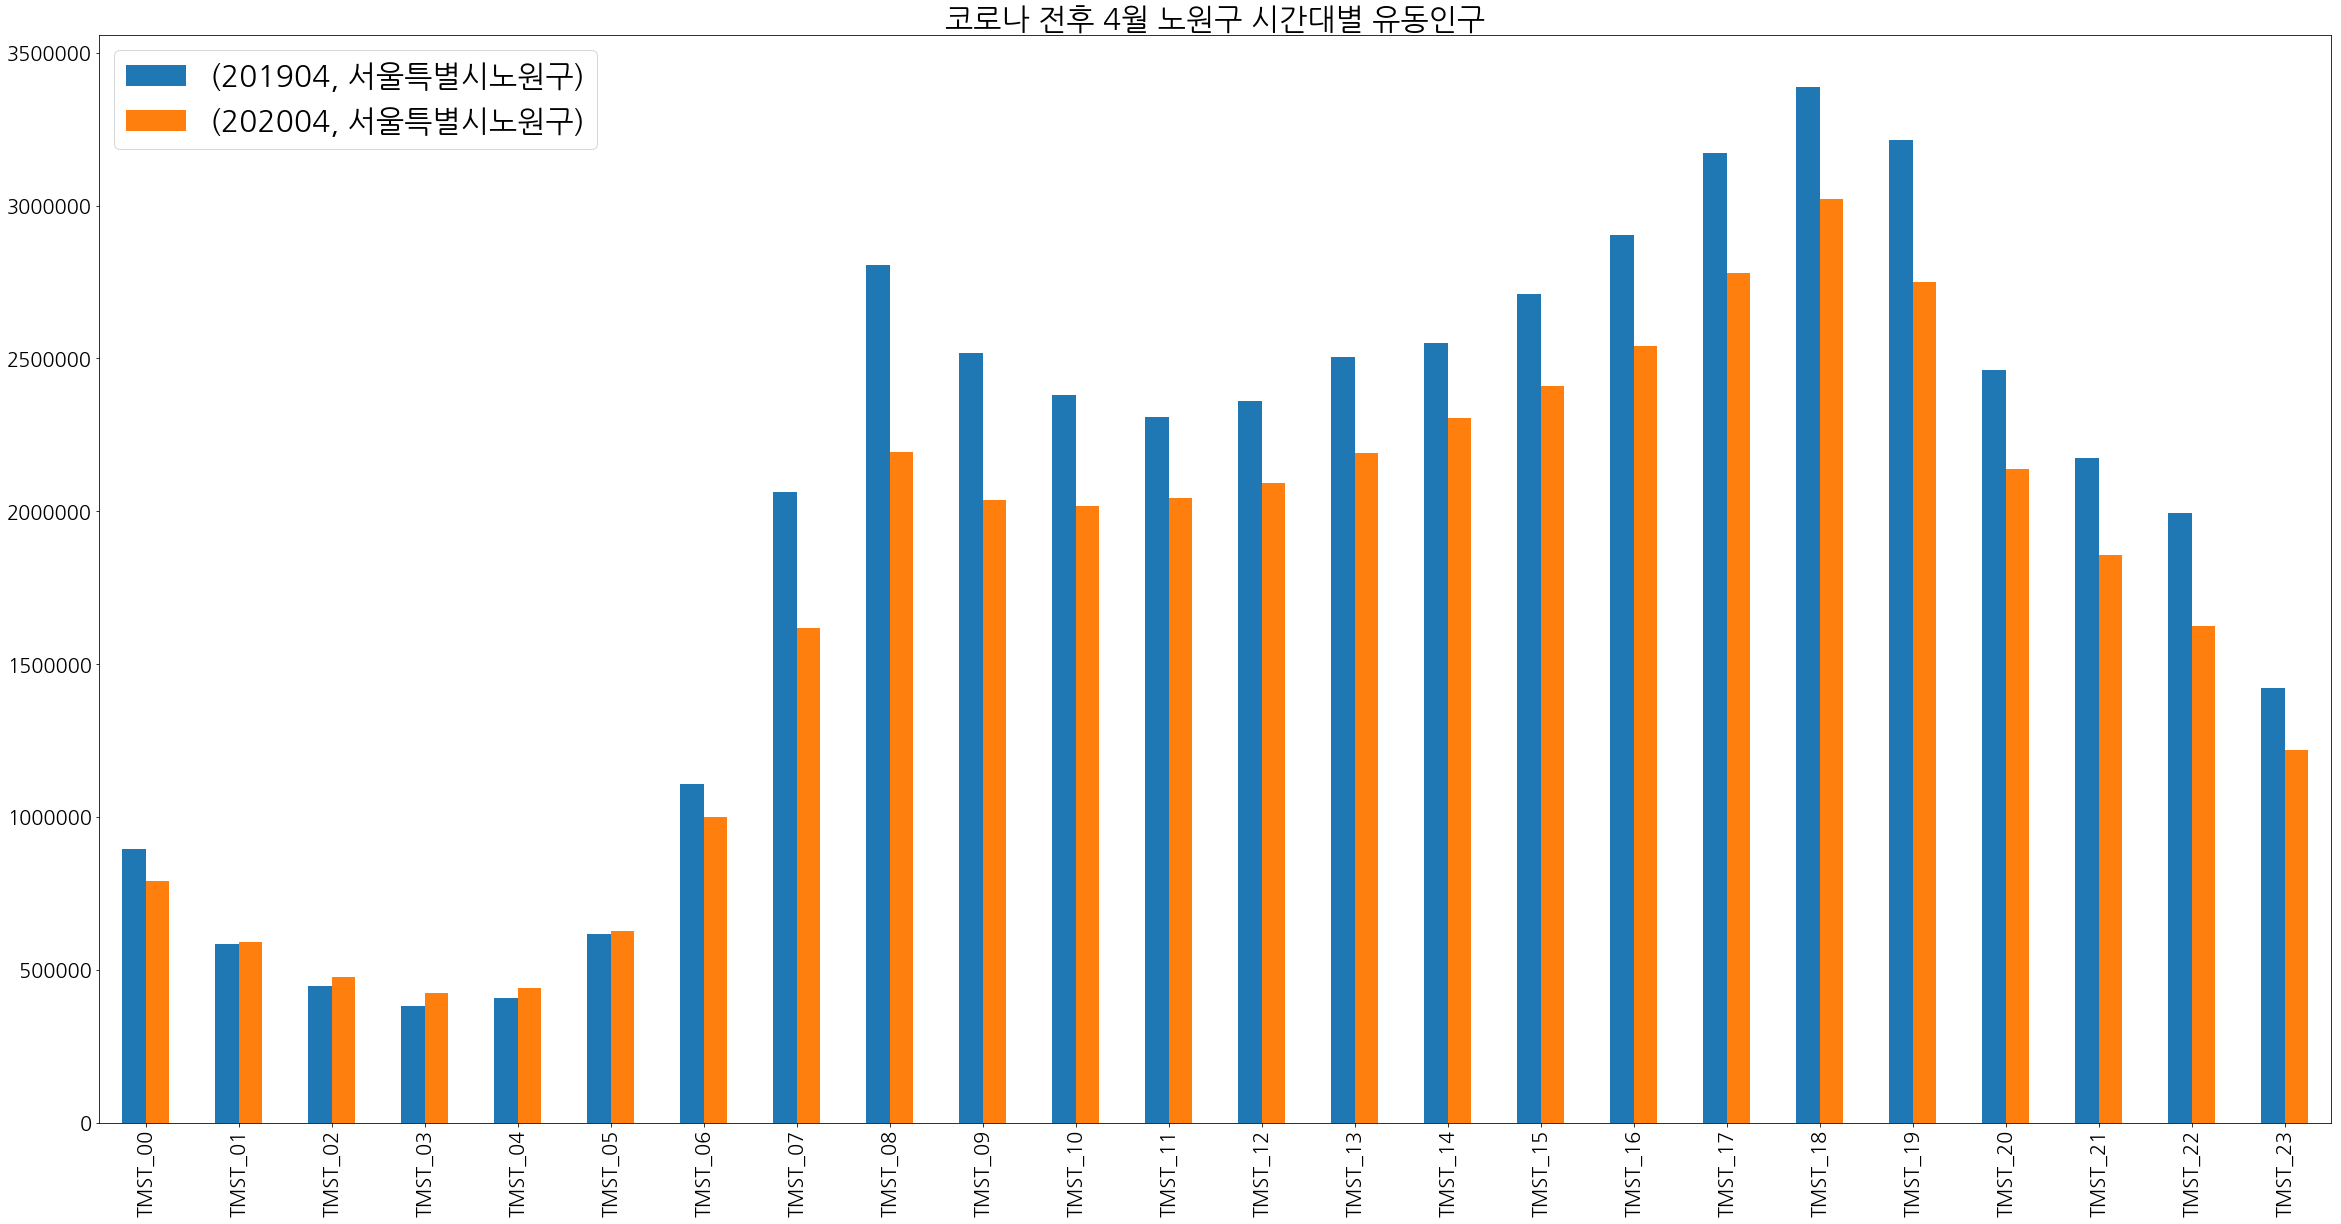

In [104]:
sk_month_GU_move.T.iloc[:, [10, 26]].plot(kind = 'bar')
plt.title('코로나 전후 4월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [105]:
start = 10
end = 26

YM = '4월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 노원구의 유동인구 변화량은 TMST_01에 제일 작으며, TMST_08에 제일 크다
4월 노원구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['01', '02', '03', '04', '05']시간에 이동량 증가


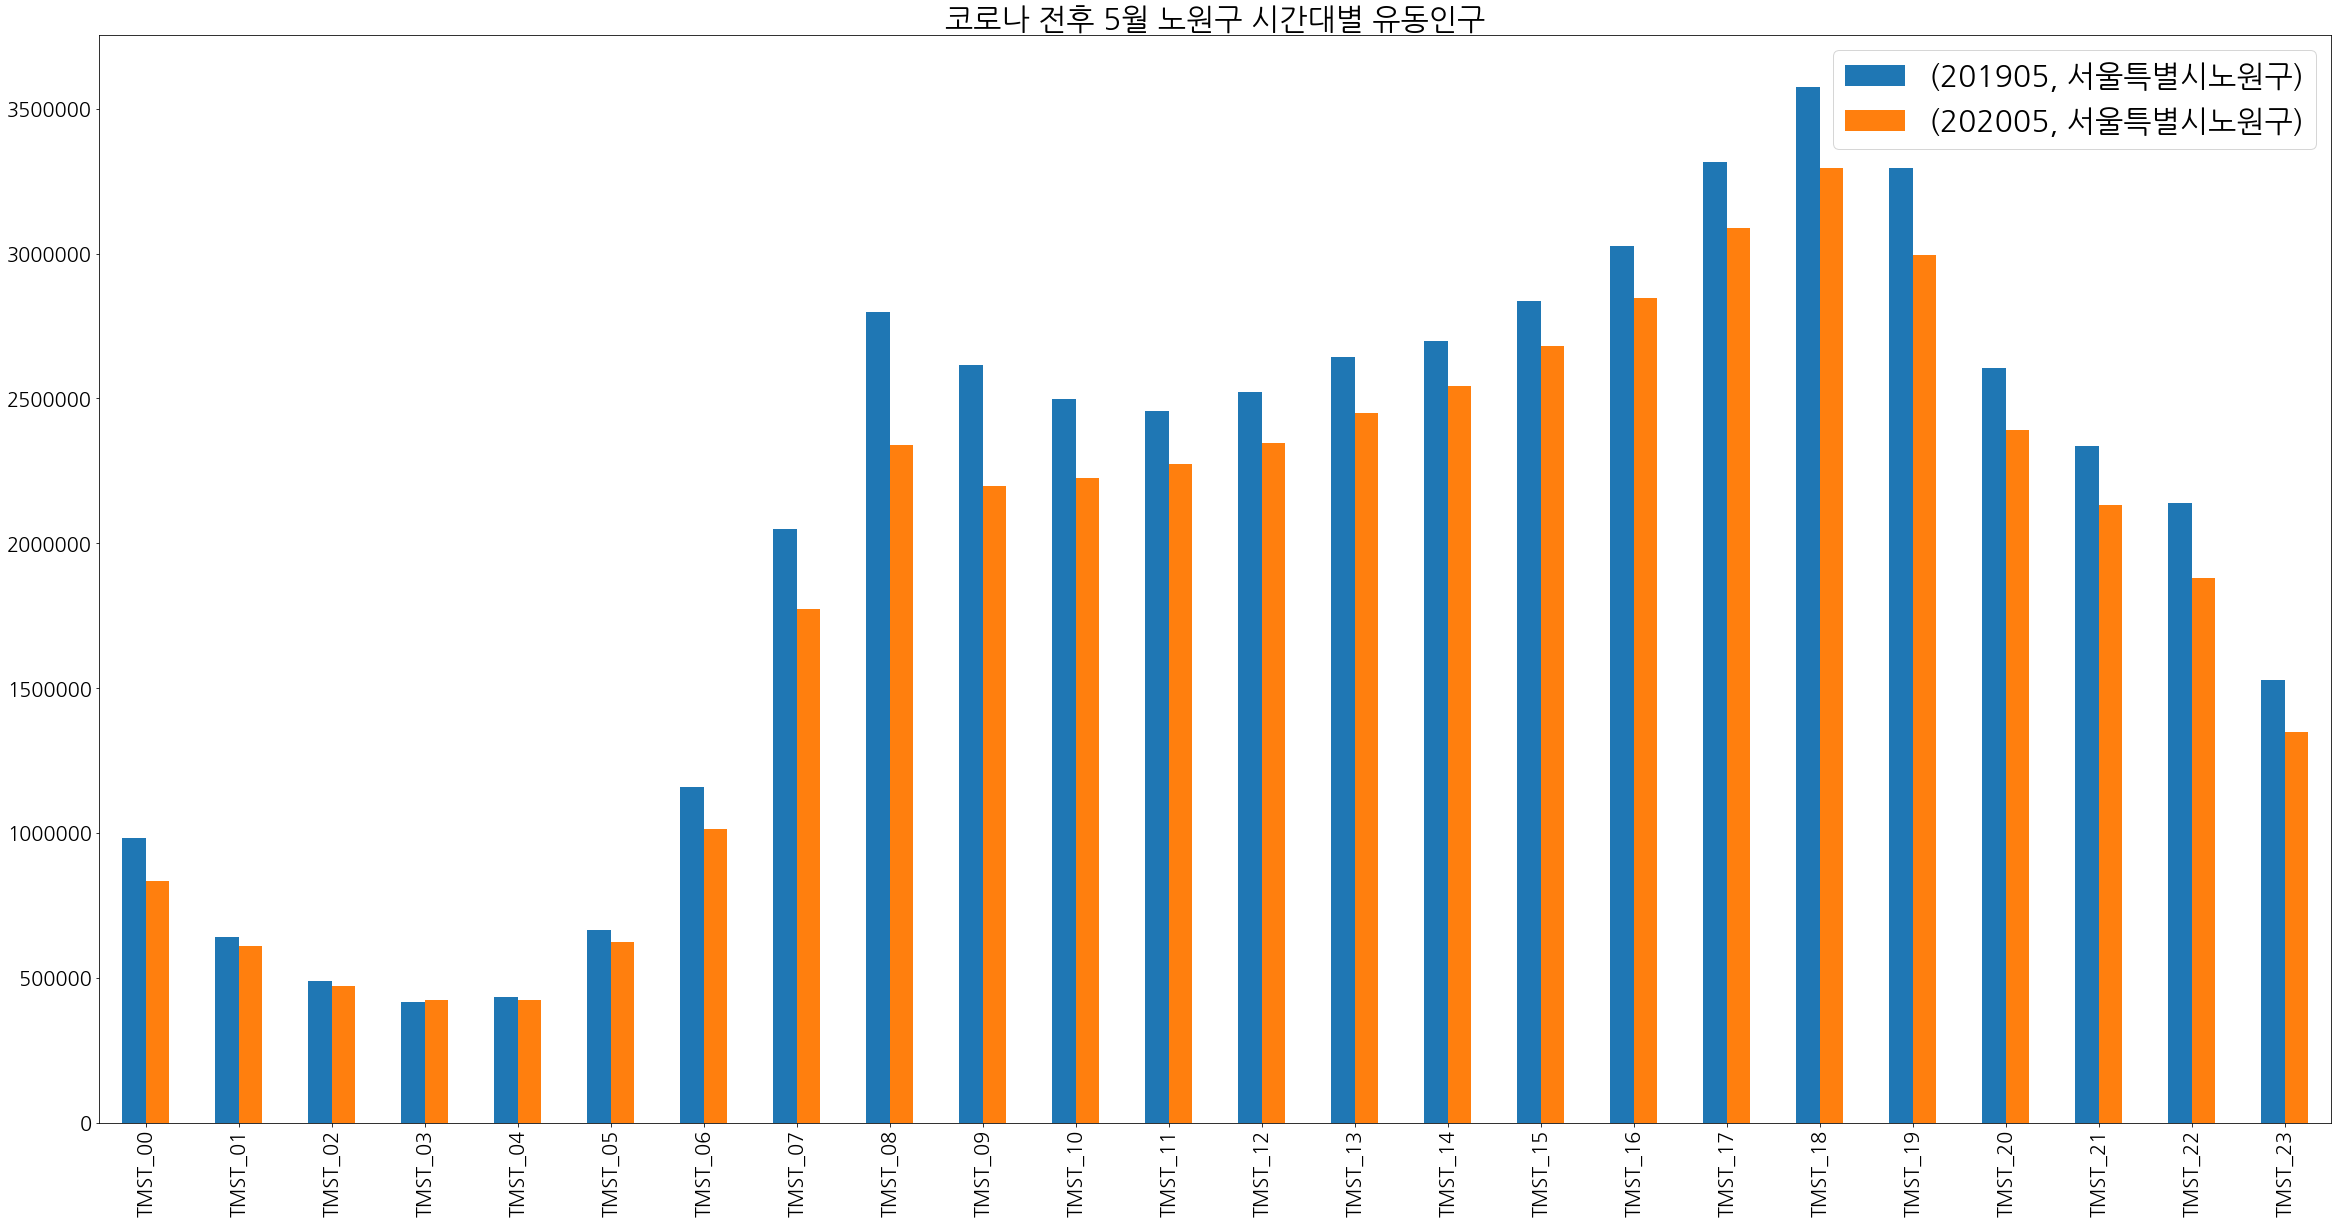

In [106]:
sk_month_GU_move.T.iloc[:, [14, 30]].plot(kind = 'bar')
plt.title('코로나 전후 5월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [107]:
start = 14
end = 30

YM = '5월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 노원구의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
5월 노원구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['03']시간에 이동량 증가


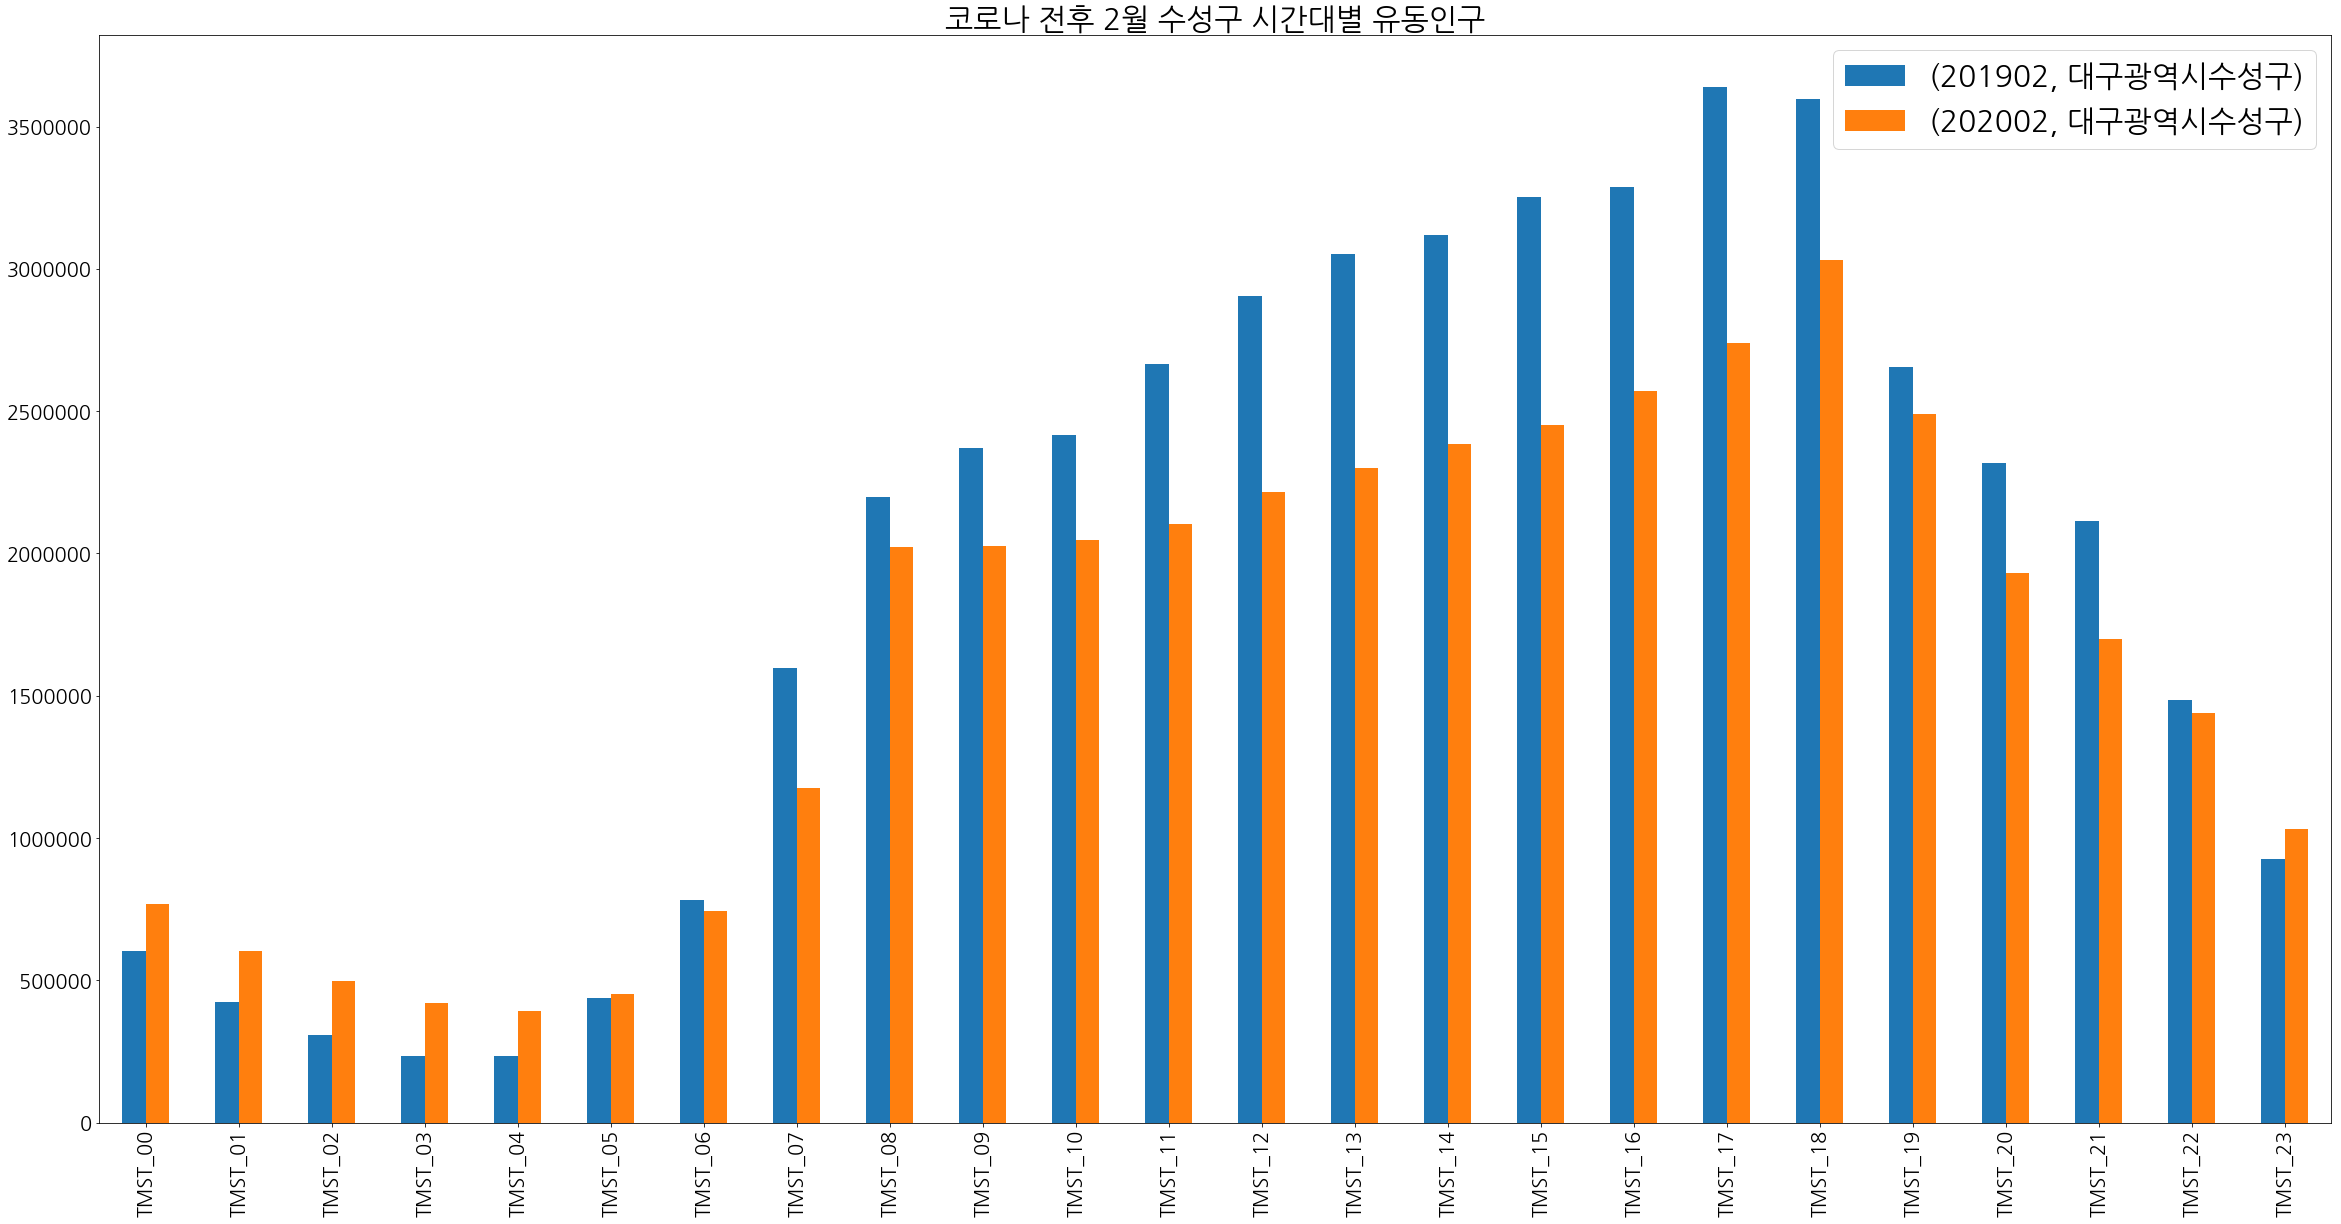

In [108]:
sk_month_GU_move.T.iloc[:, [0, 16]].plot(kind = 'bar')
plt.title('코로나 전후 2월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [109]:
start = 0
end = 16

YM = '2월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 수성구의 유동인구 변화량은 TMST_05에 제일 작으며, TMST_17에 제일 크다
2월 수성구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '05', '23']시간에 이동량 증가


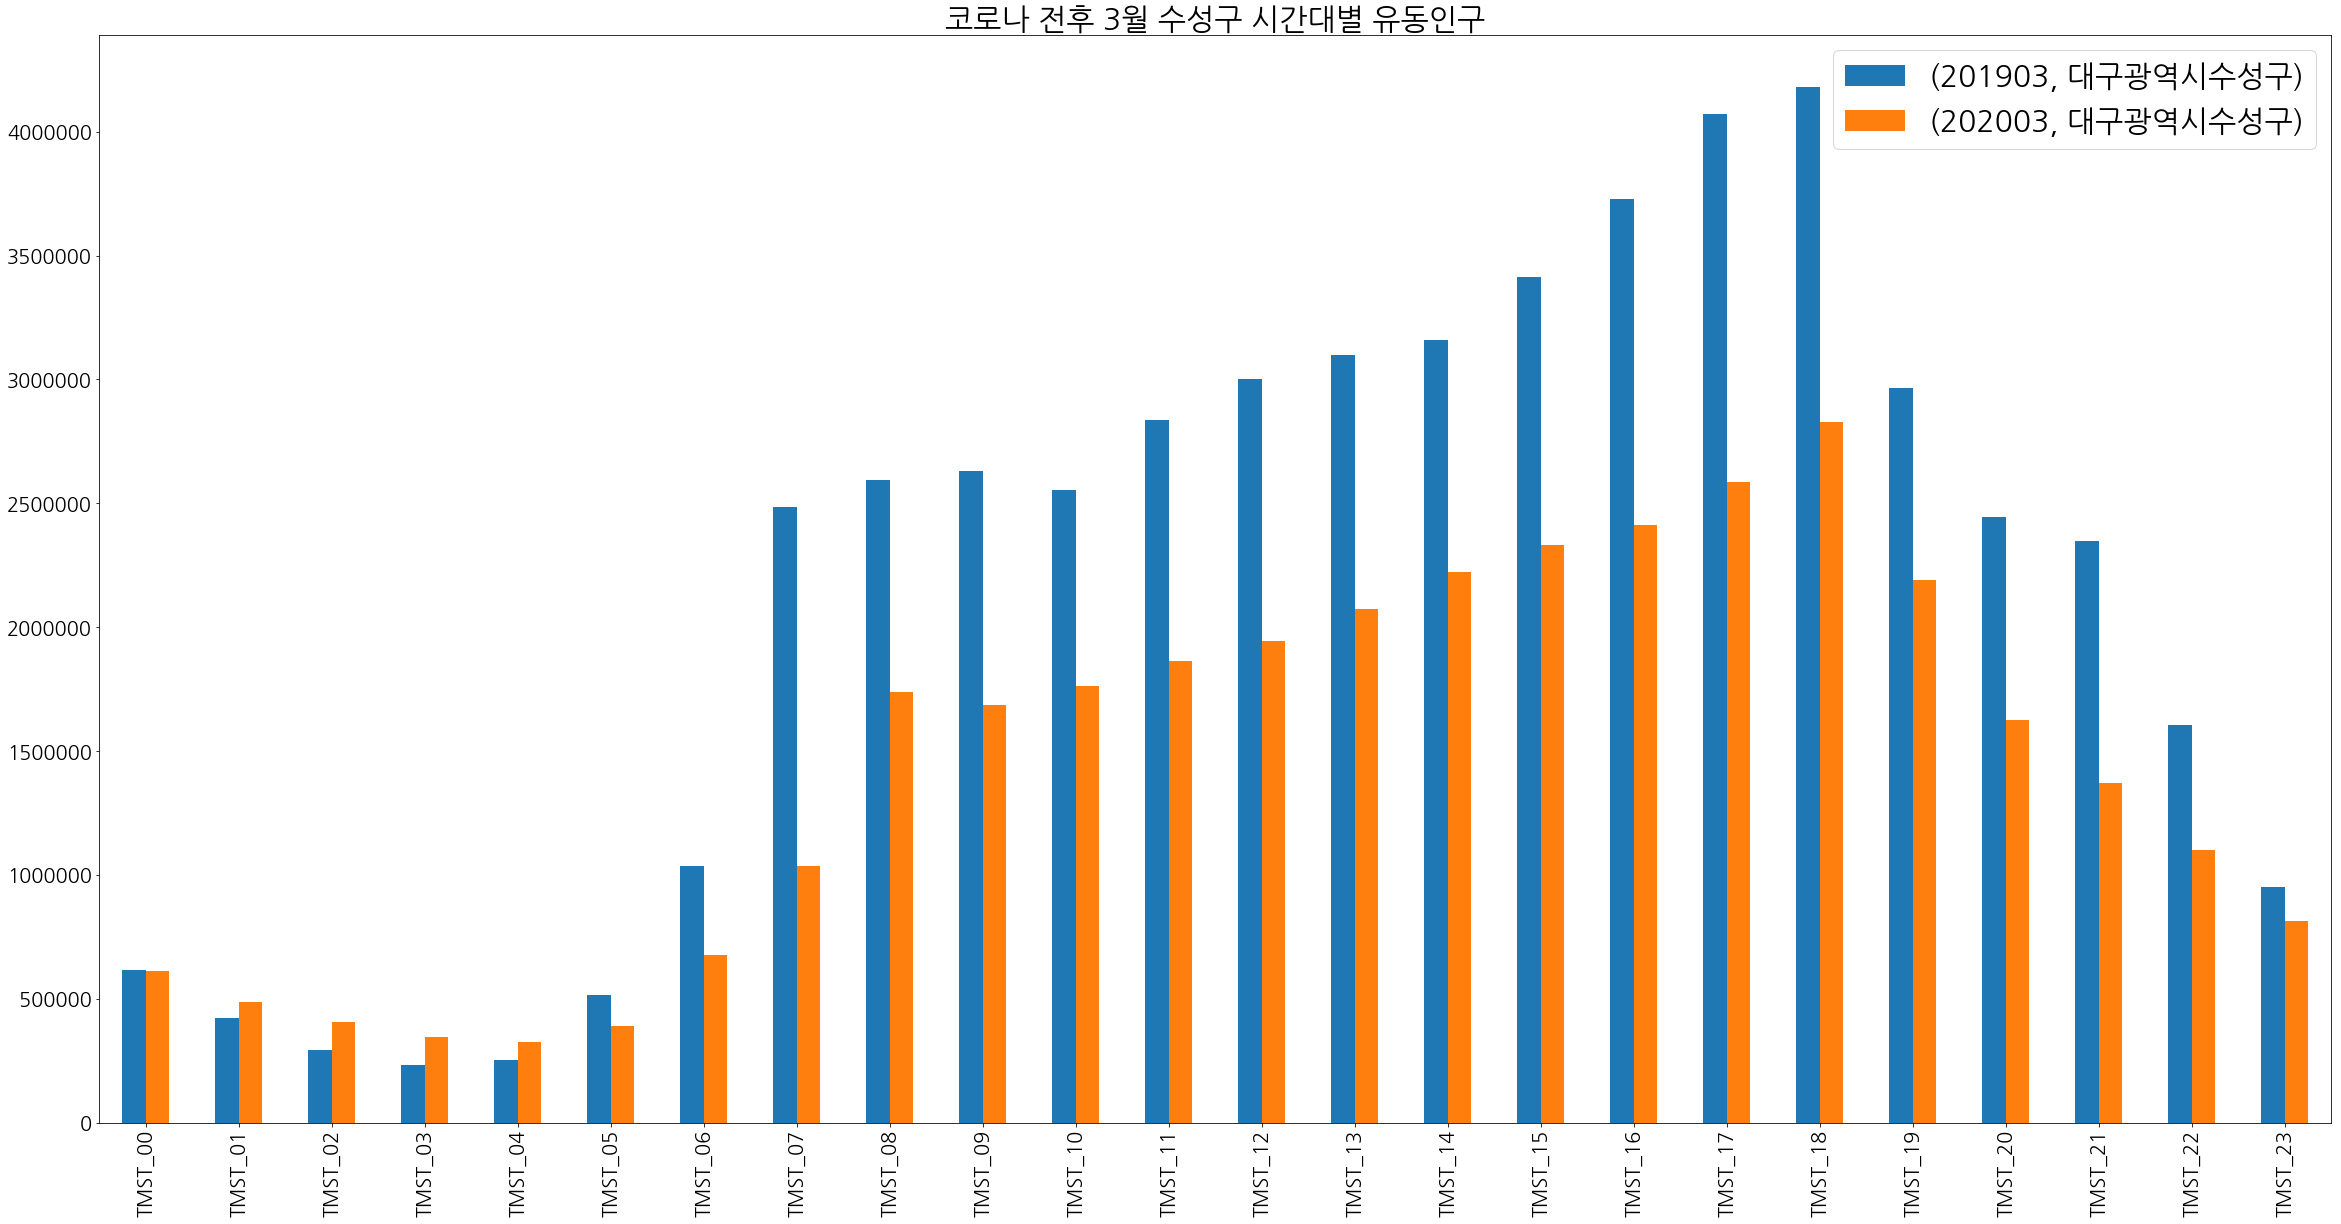

In [110]:
sk_month_GU_move.T.iloc[:, [4, 20]].plot(kind = 'bar')
plt.title('코로나 전후 3월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [111]:
start = 4
end = 20

YM = '3월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 수성구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_17에 제일 크다
3월 수성구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['01', '02', '03', '04']시간에 이동량 증가


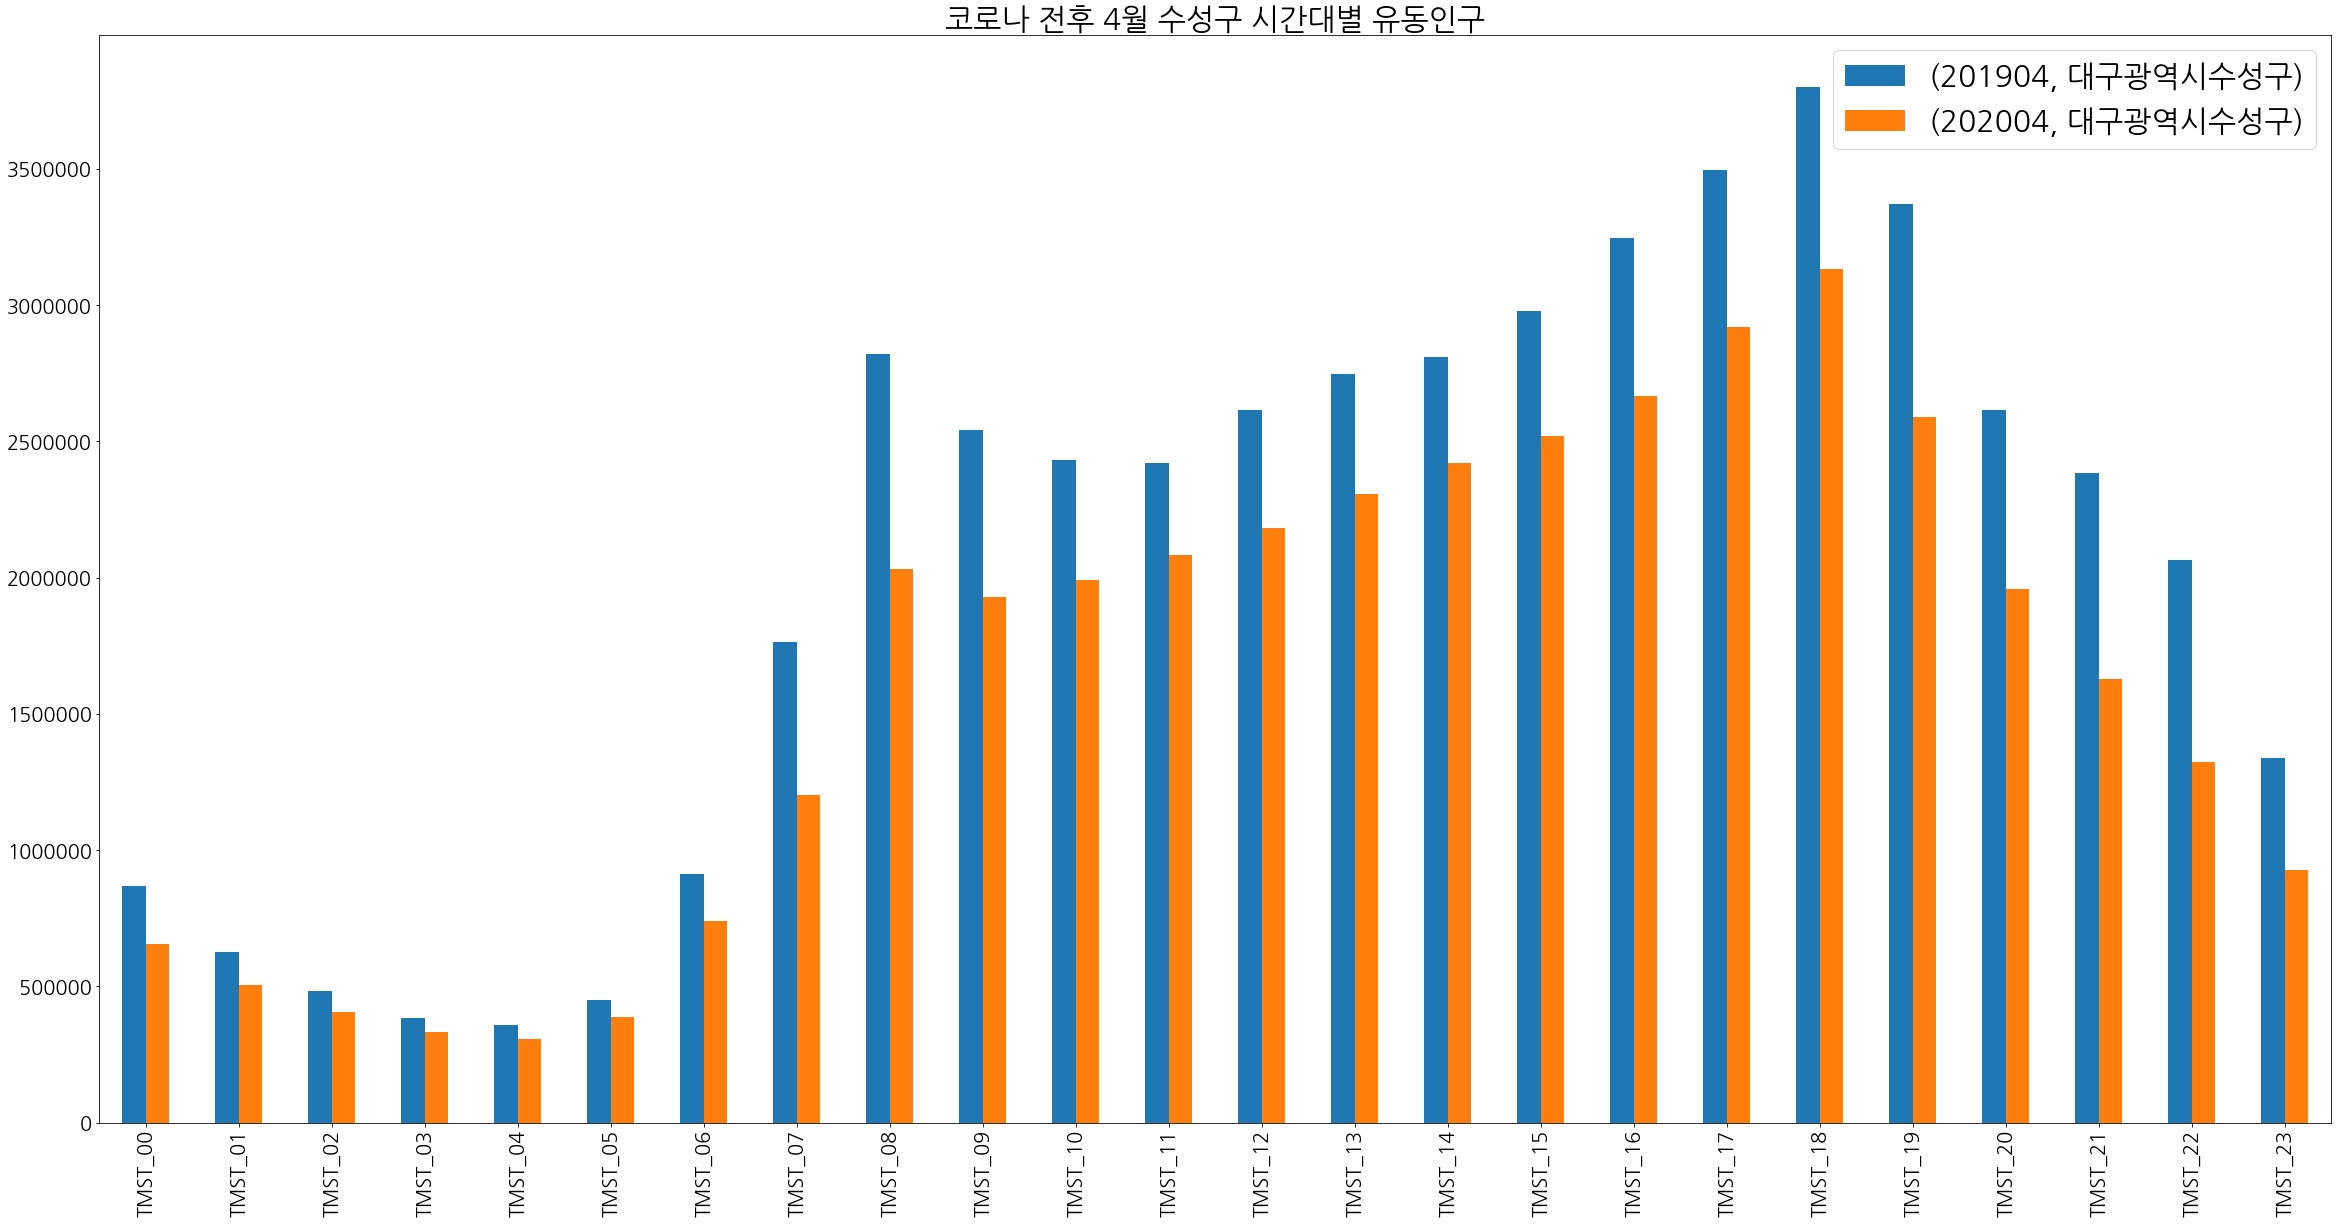

In [112]:
sk_month_GU_move.T.iloc[:, [8, 24]].plot(kind = 'bar')
plt.title('코로나 전후 4월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [113]:
start = 8
end = 24

YM = '4월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 수성구의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
4월 수성구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


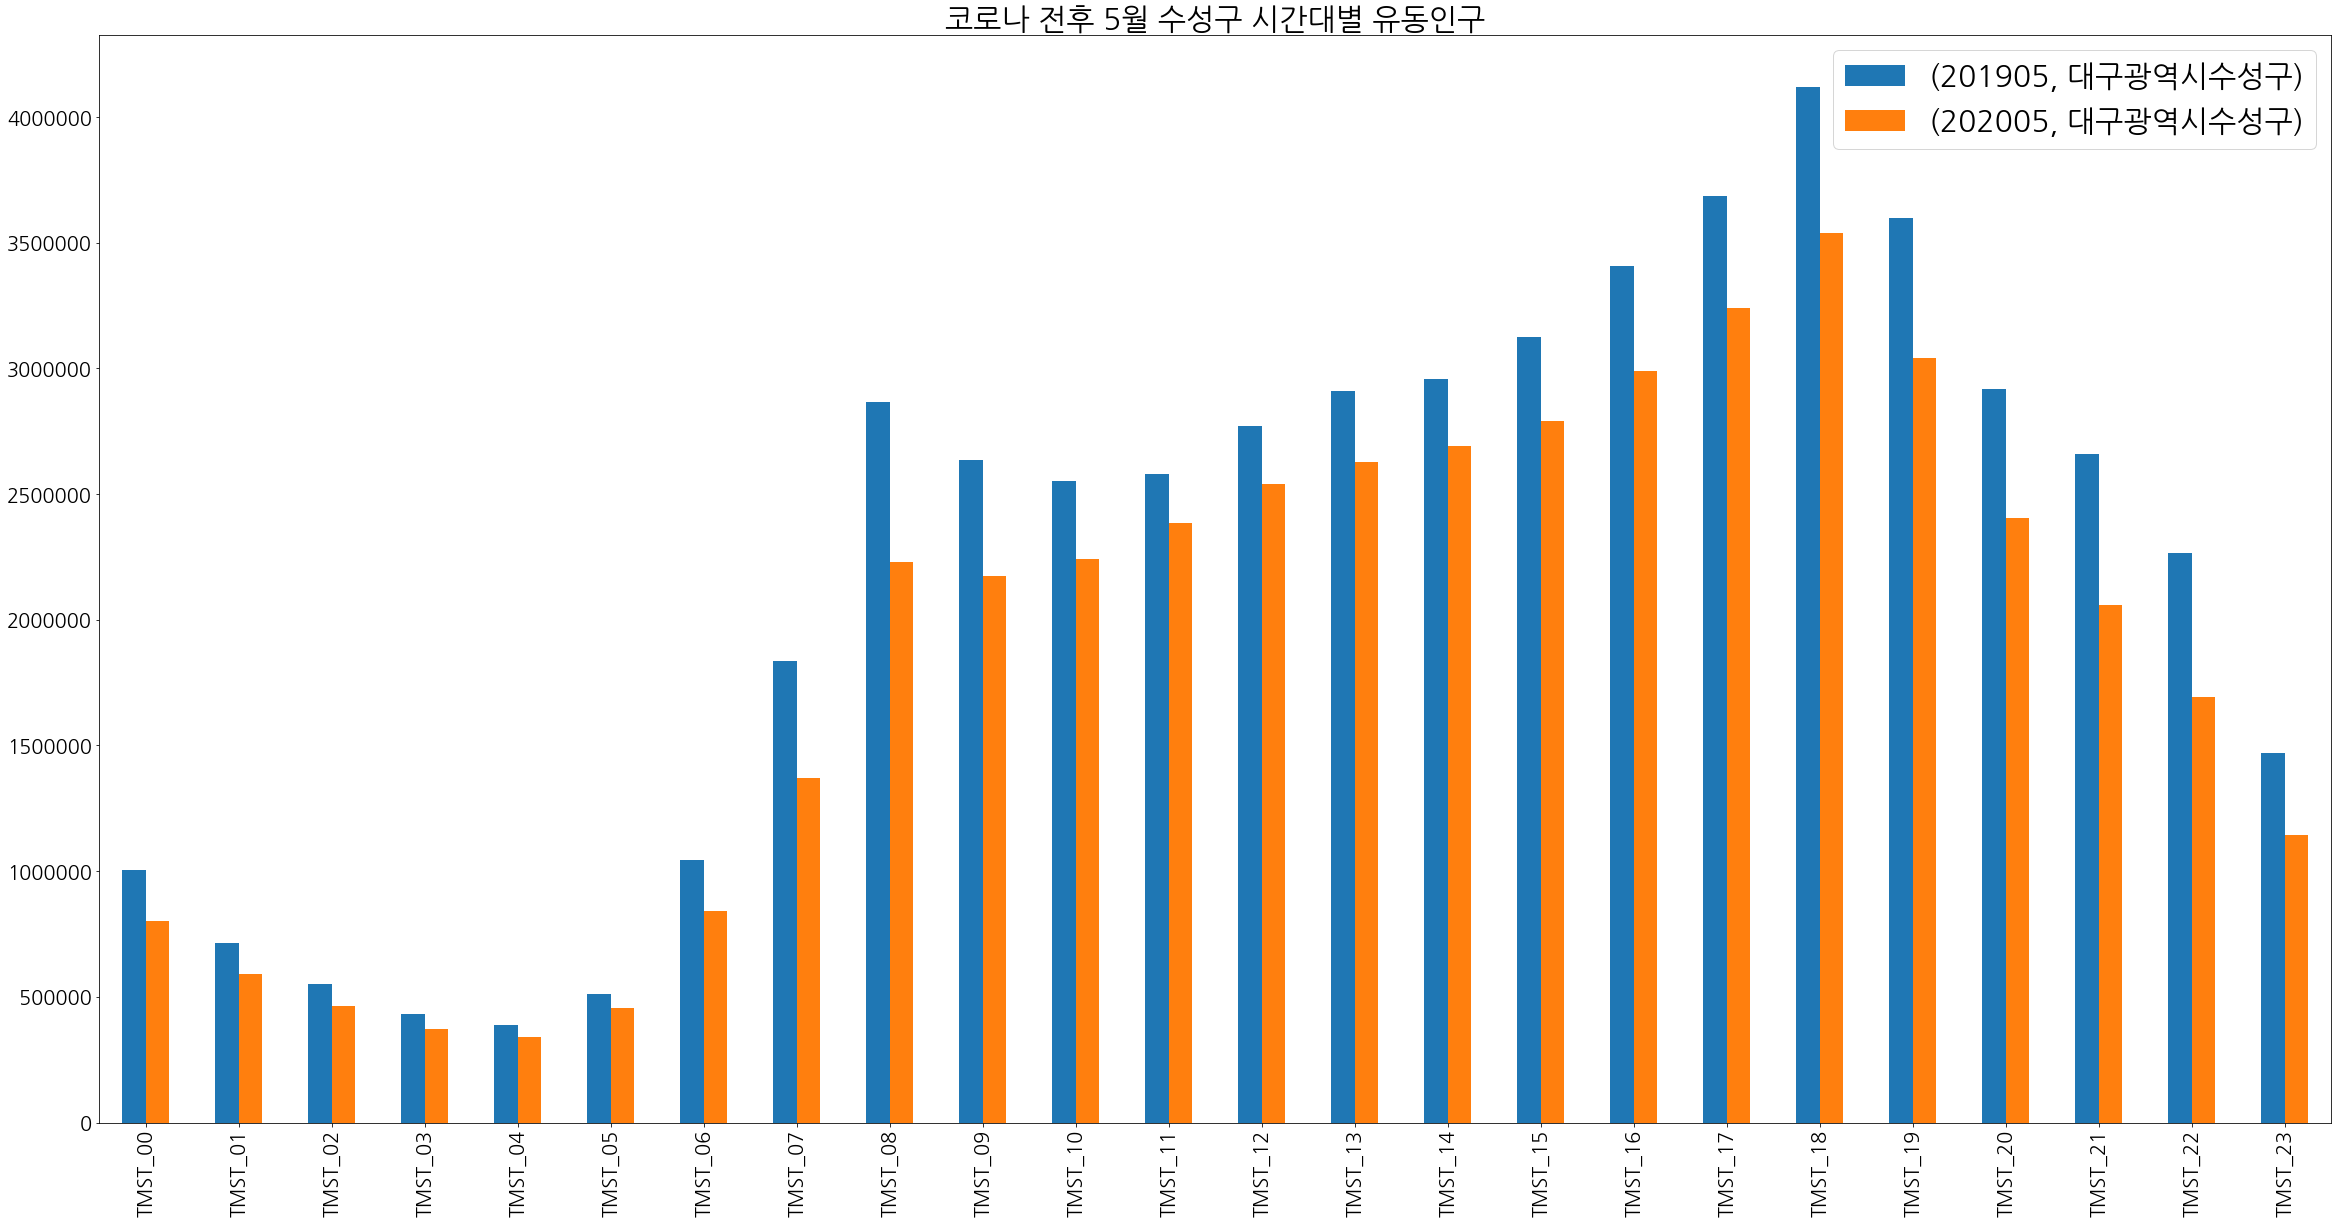

In [114]:
sk_month_GU_move.T.iloc[:, [12, 28]].plot(kind = 'bar')
plt.title('코로나 전후 5월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [115]:
start = 12
end = 28

YM = '5월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 수성구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
5월 수성구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


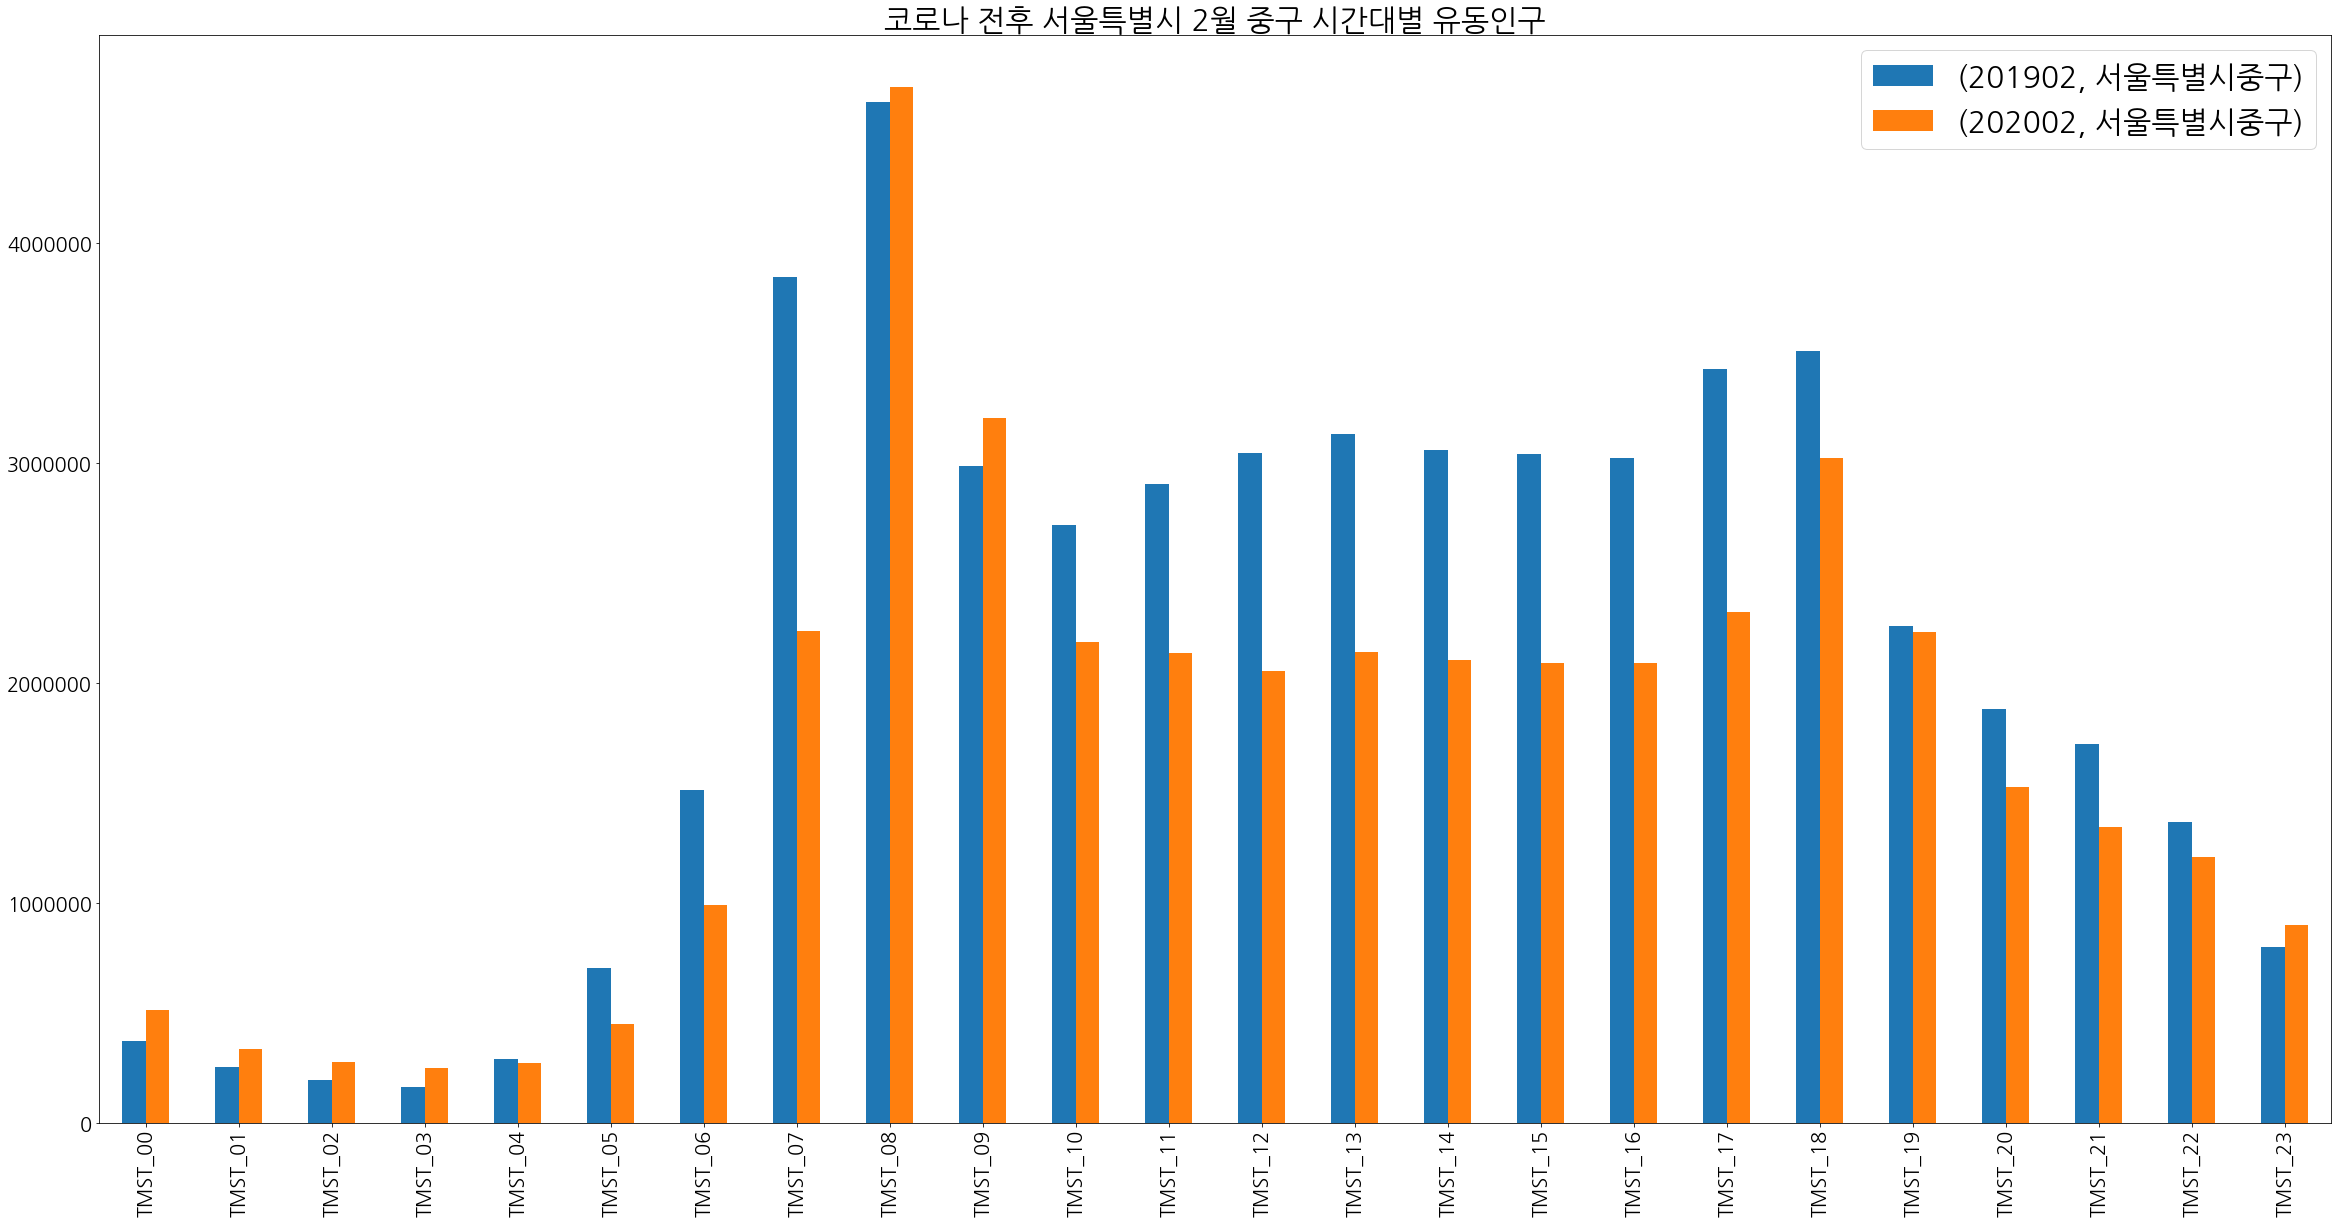

In [118]:
sk_month_GU_move.T.iloc[:, [3, 19]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 2월 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [119]:
start = 3
end = 19

YM = '서울특별시 2월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

서울특별시 2월 중구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_07에 제일 크다
서울특별시 2월 중구은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_09에 가장 큰 폭으로 증가하였다.
['04', '05', '06', '07', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '08', '09', '23']시간에 이동량 증가


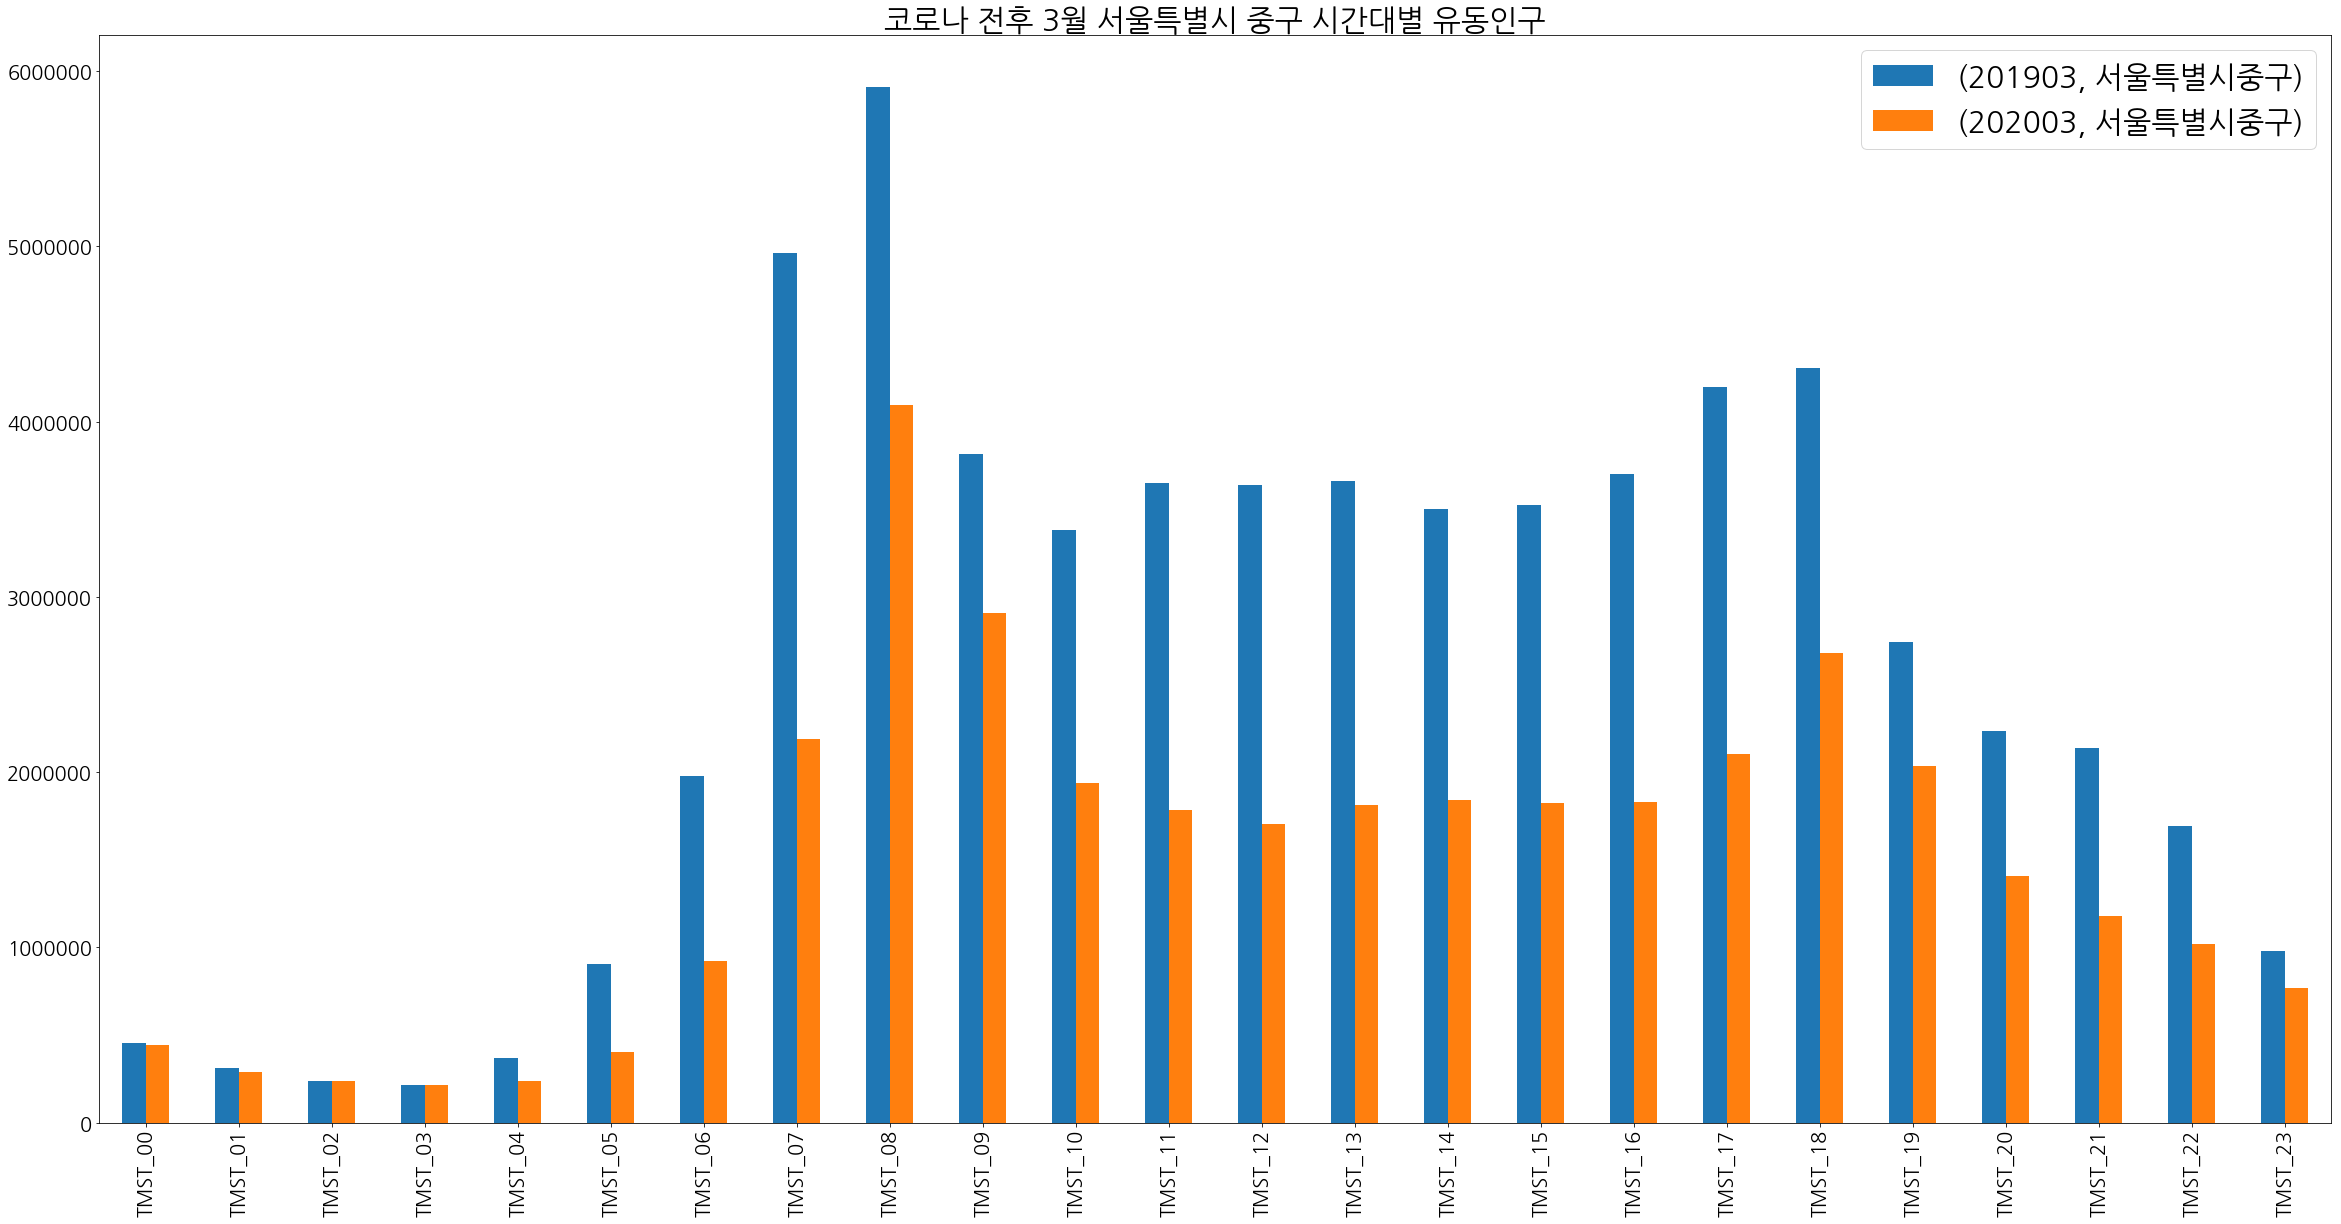

In [120]:
sk_month_GU_move.T.iloc[:, [7, 23]].plot(kind = 'bar')
plt.title('코로나 전후 3월 서울특별시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [121]:
start = 7
end = 23

YM = '서울특별시 3월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

서울특별시 3월 중구의 유동인구 변화량은 TMST_02에 제일 작으며, TMST_07에 제일 크다
서울특별시 3월 중구은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['03']시간에 이동량 증가


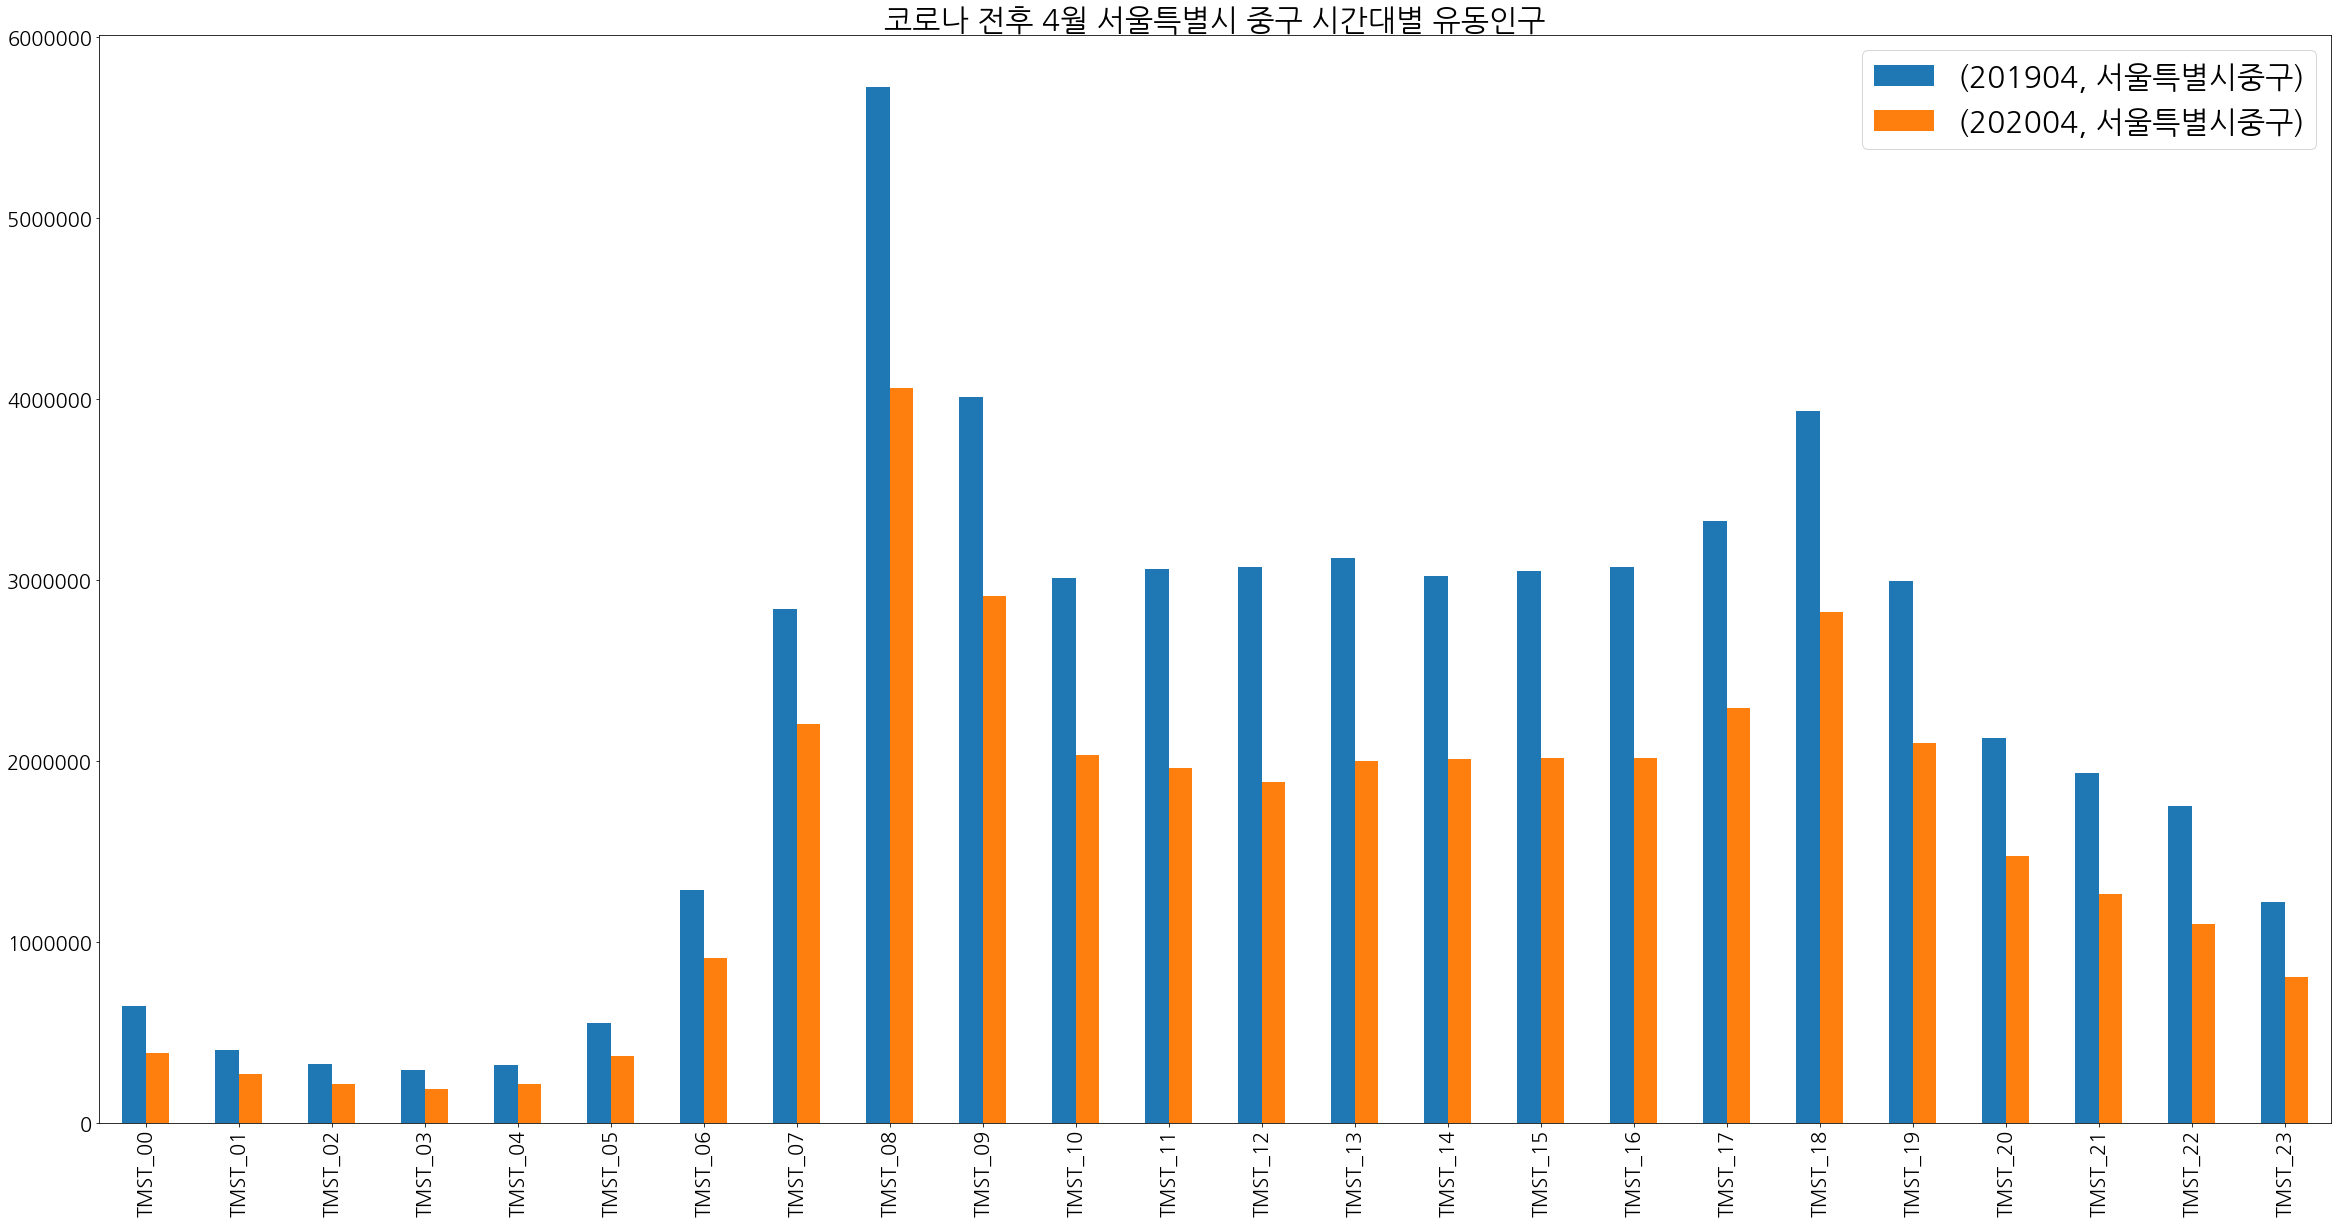

In [122]:
sk_month_GU_move.T.iloc[:, [11, 27]].plot(kind = 'bar')
plt.title('코로나 전후 4월 서울특별시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [123]:
start = 11
end = 27

YM = '4월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 중구의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
4월 중구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


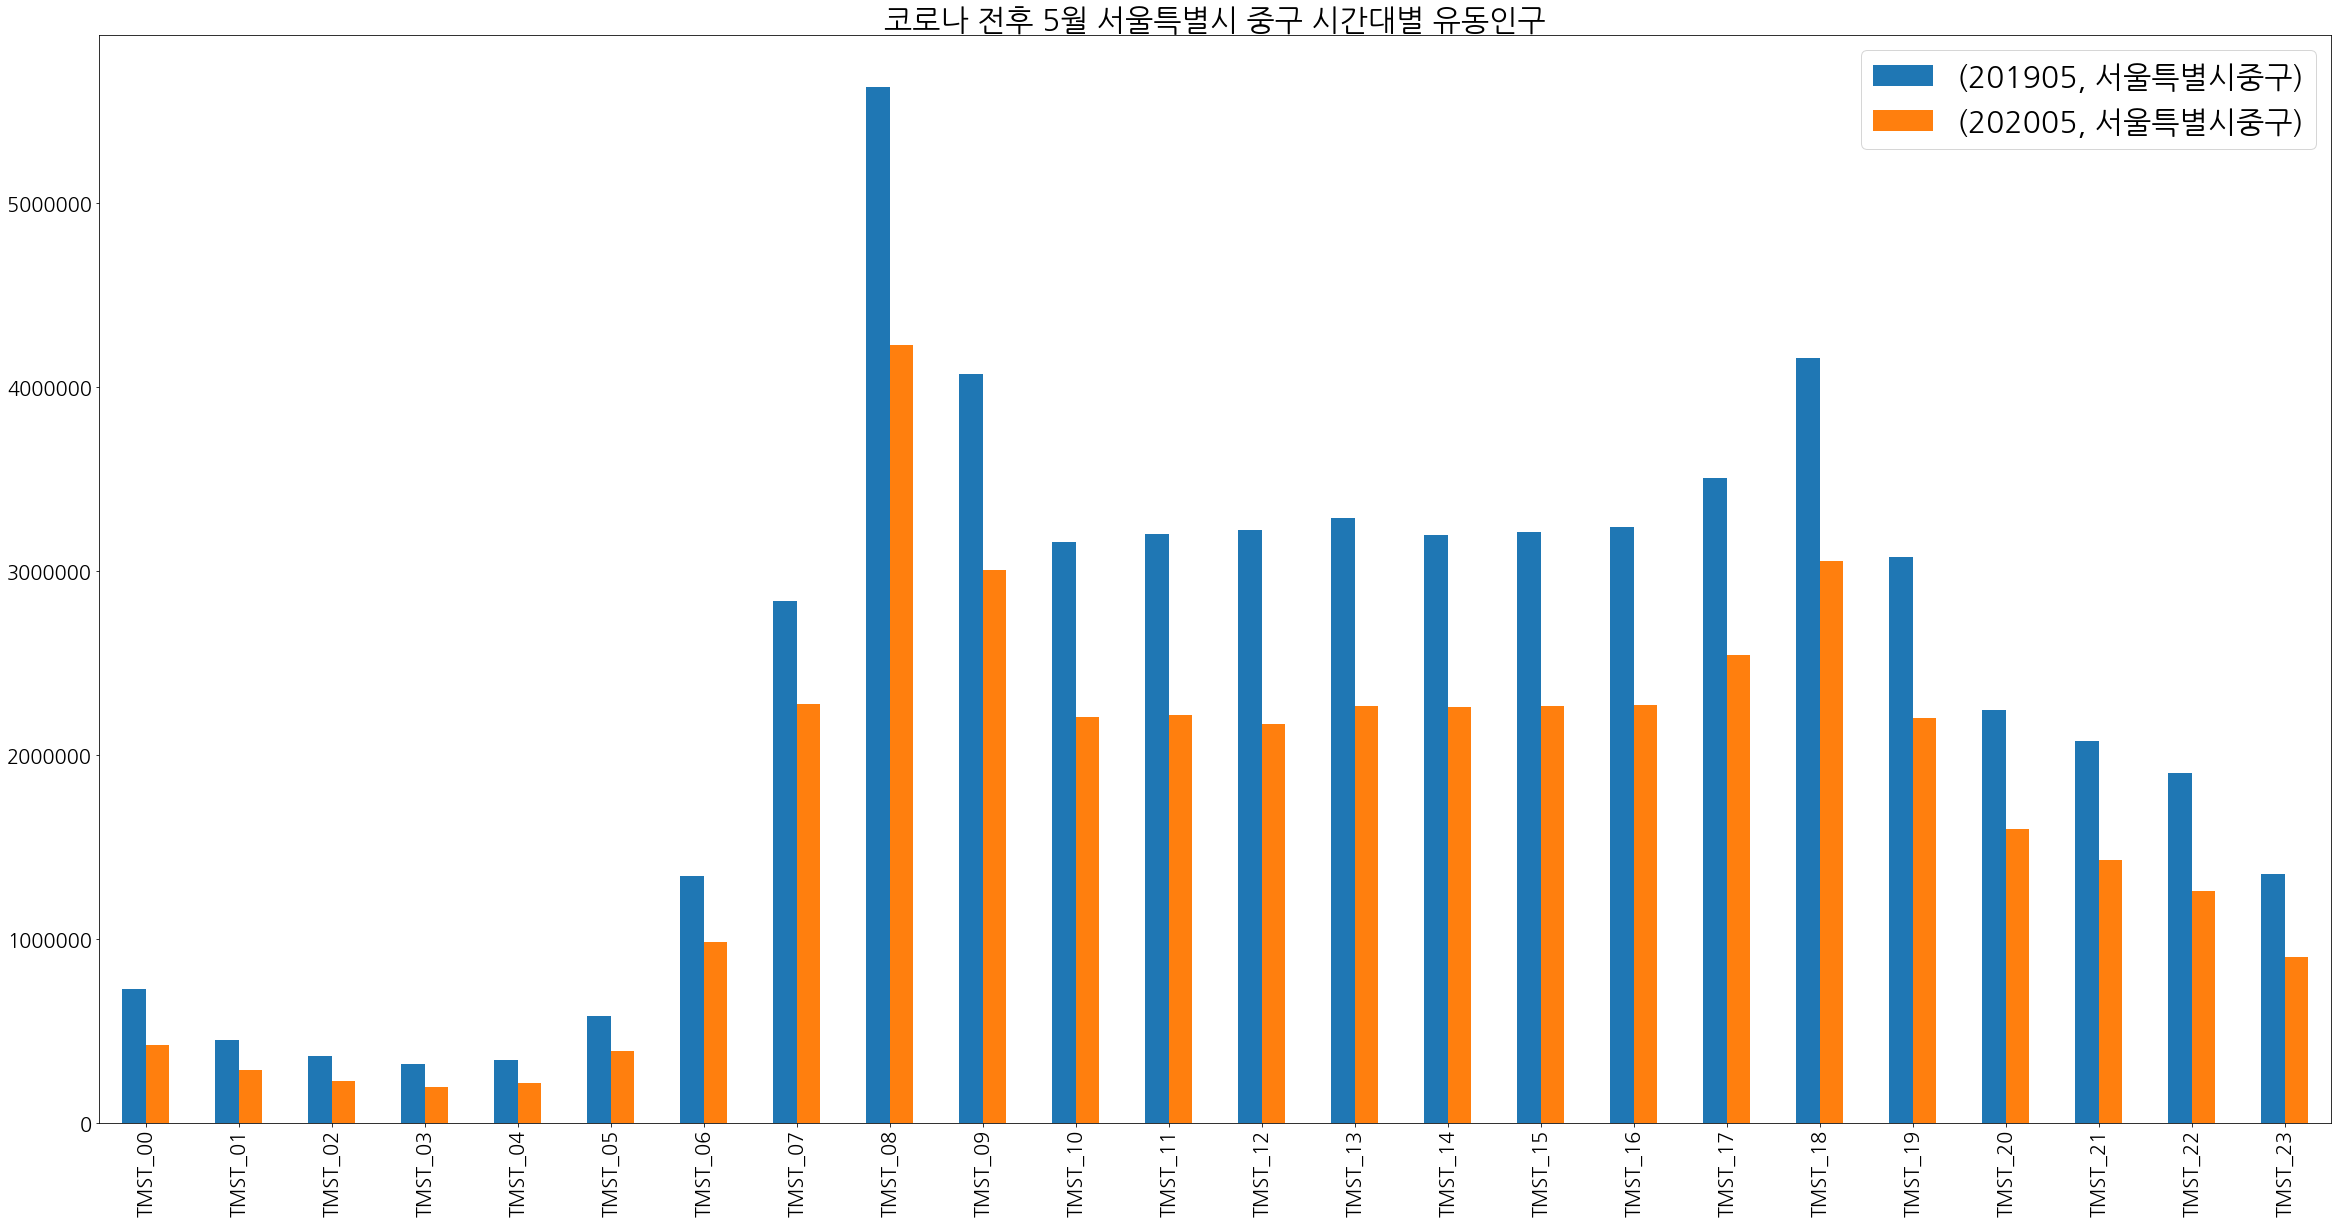

In [124]:
sk_month_GU_move.T.iloc[:, [15, 31]].plot(kind = 'bar')
plt.title('코로나 전후 5월 서울특별시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [125]:
start = 15
end = 31

YM = '5월 서울특별시 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 서울특별시 중구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
5월 서울특별시 중구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


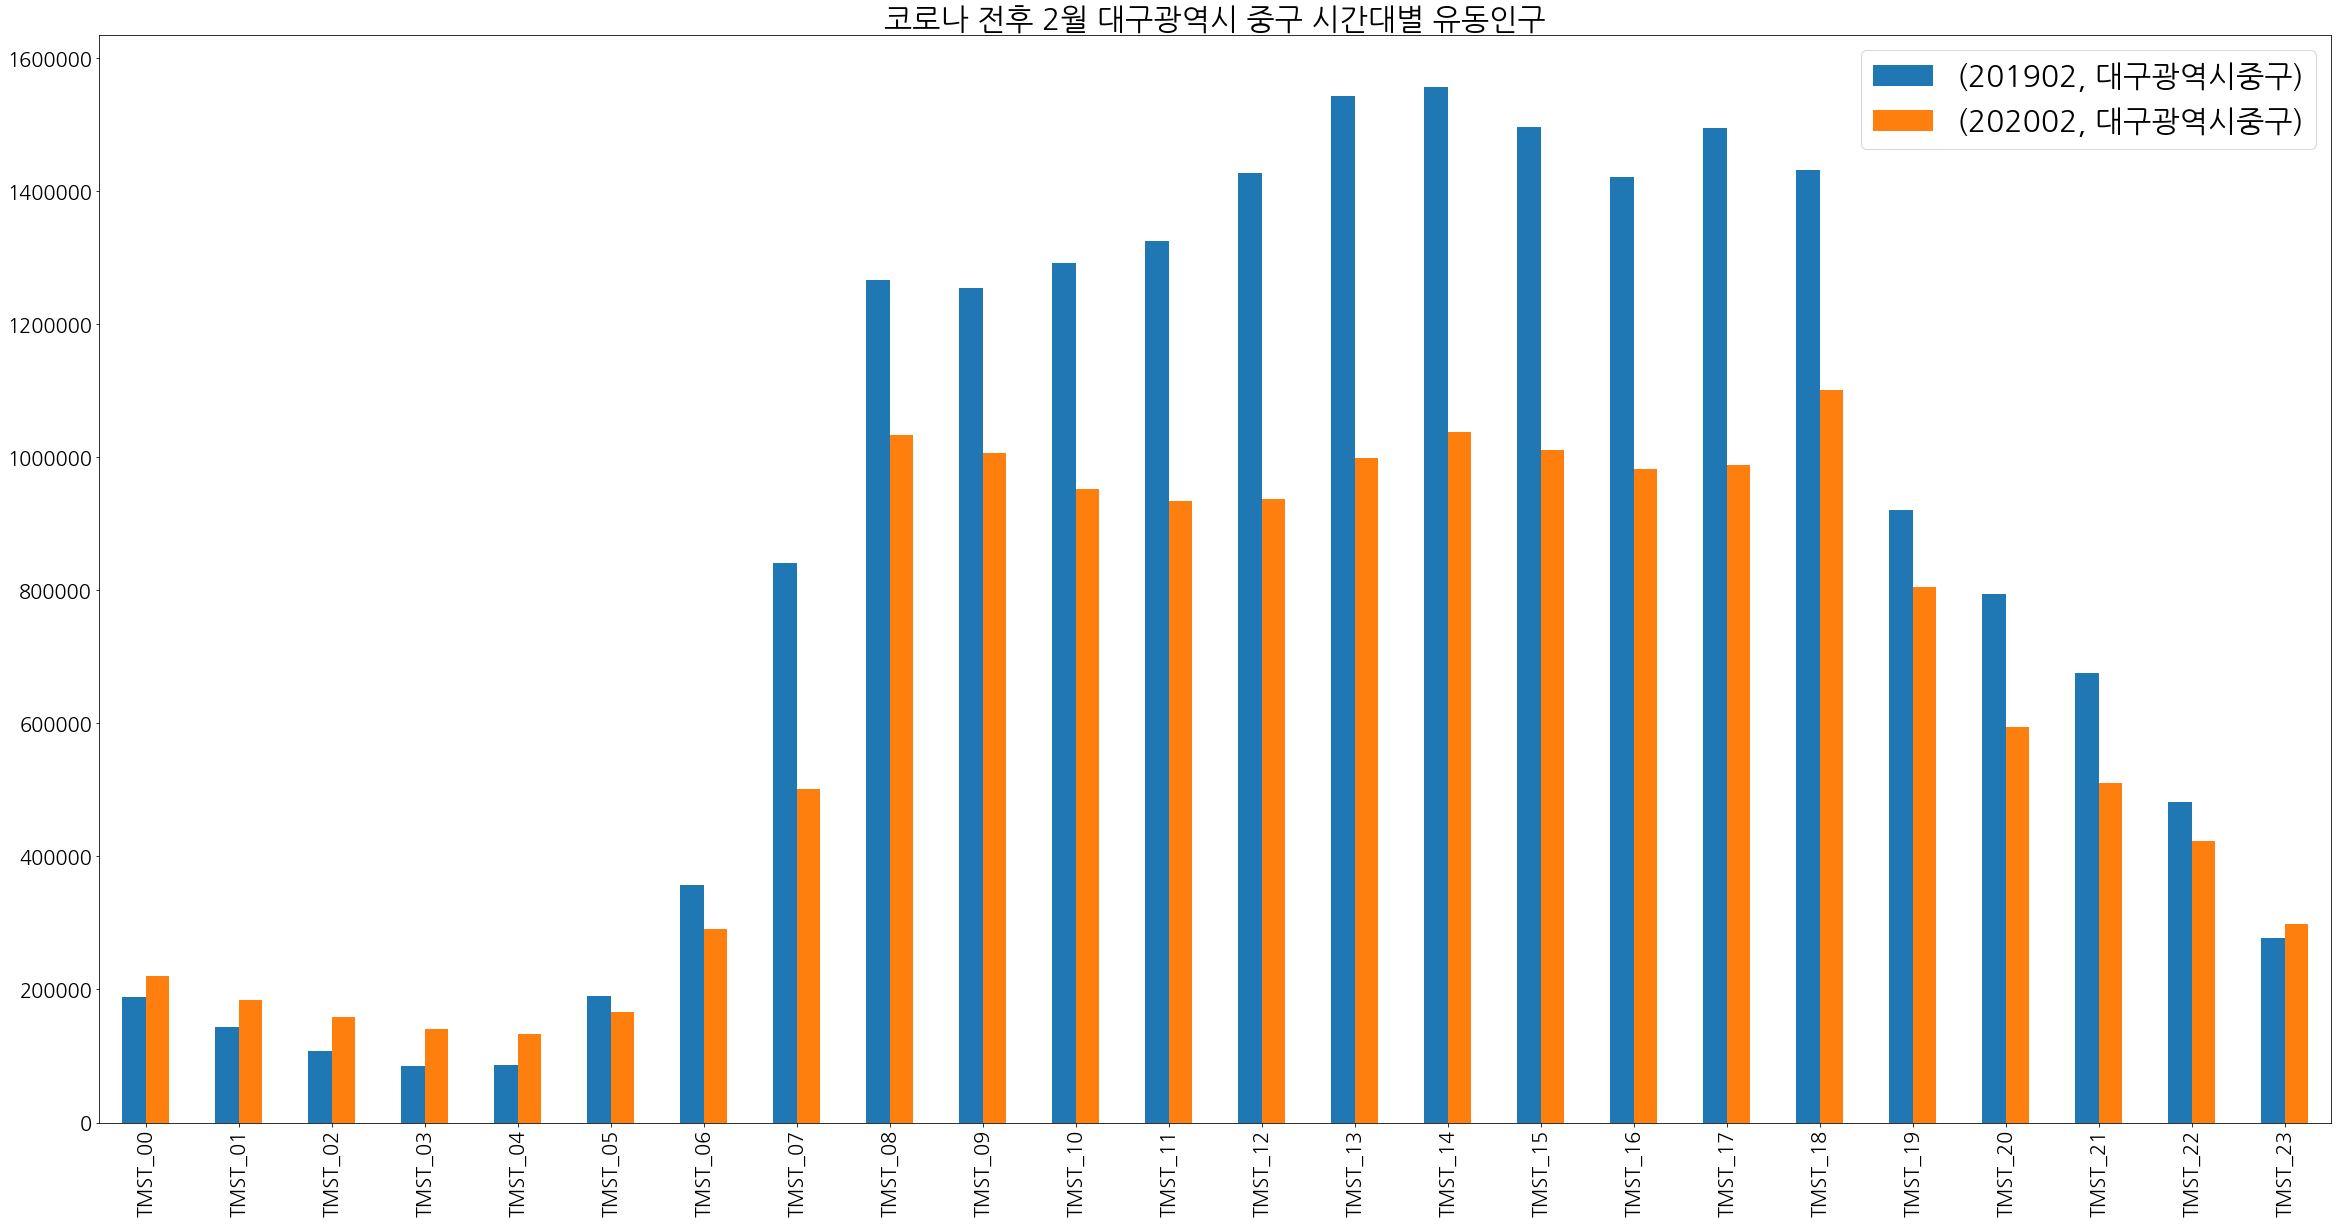

In [127]:
sk_month_GU_move.T.iloc[:, [1, 17]].plot(kind = 'bar')
plt.title('코로나 전후 2월 대구광역시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [128]:
start = 1
end = 17

YM = '2월 대구광역시 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 대구광역시 중구의 유동인구 변화량은 TMST_23에 제일 작으며, TMST_13에 제일 크다
2월 대구광역시 중구은 TMST_13에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '23']시간에 이동량 증가


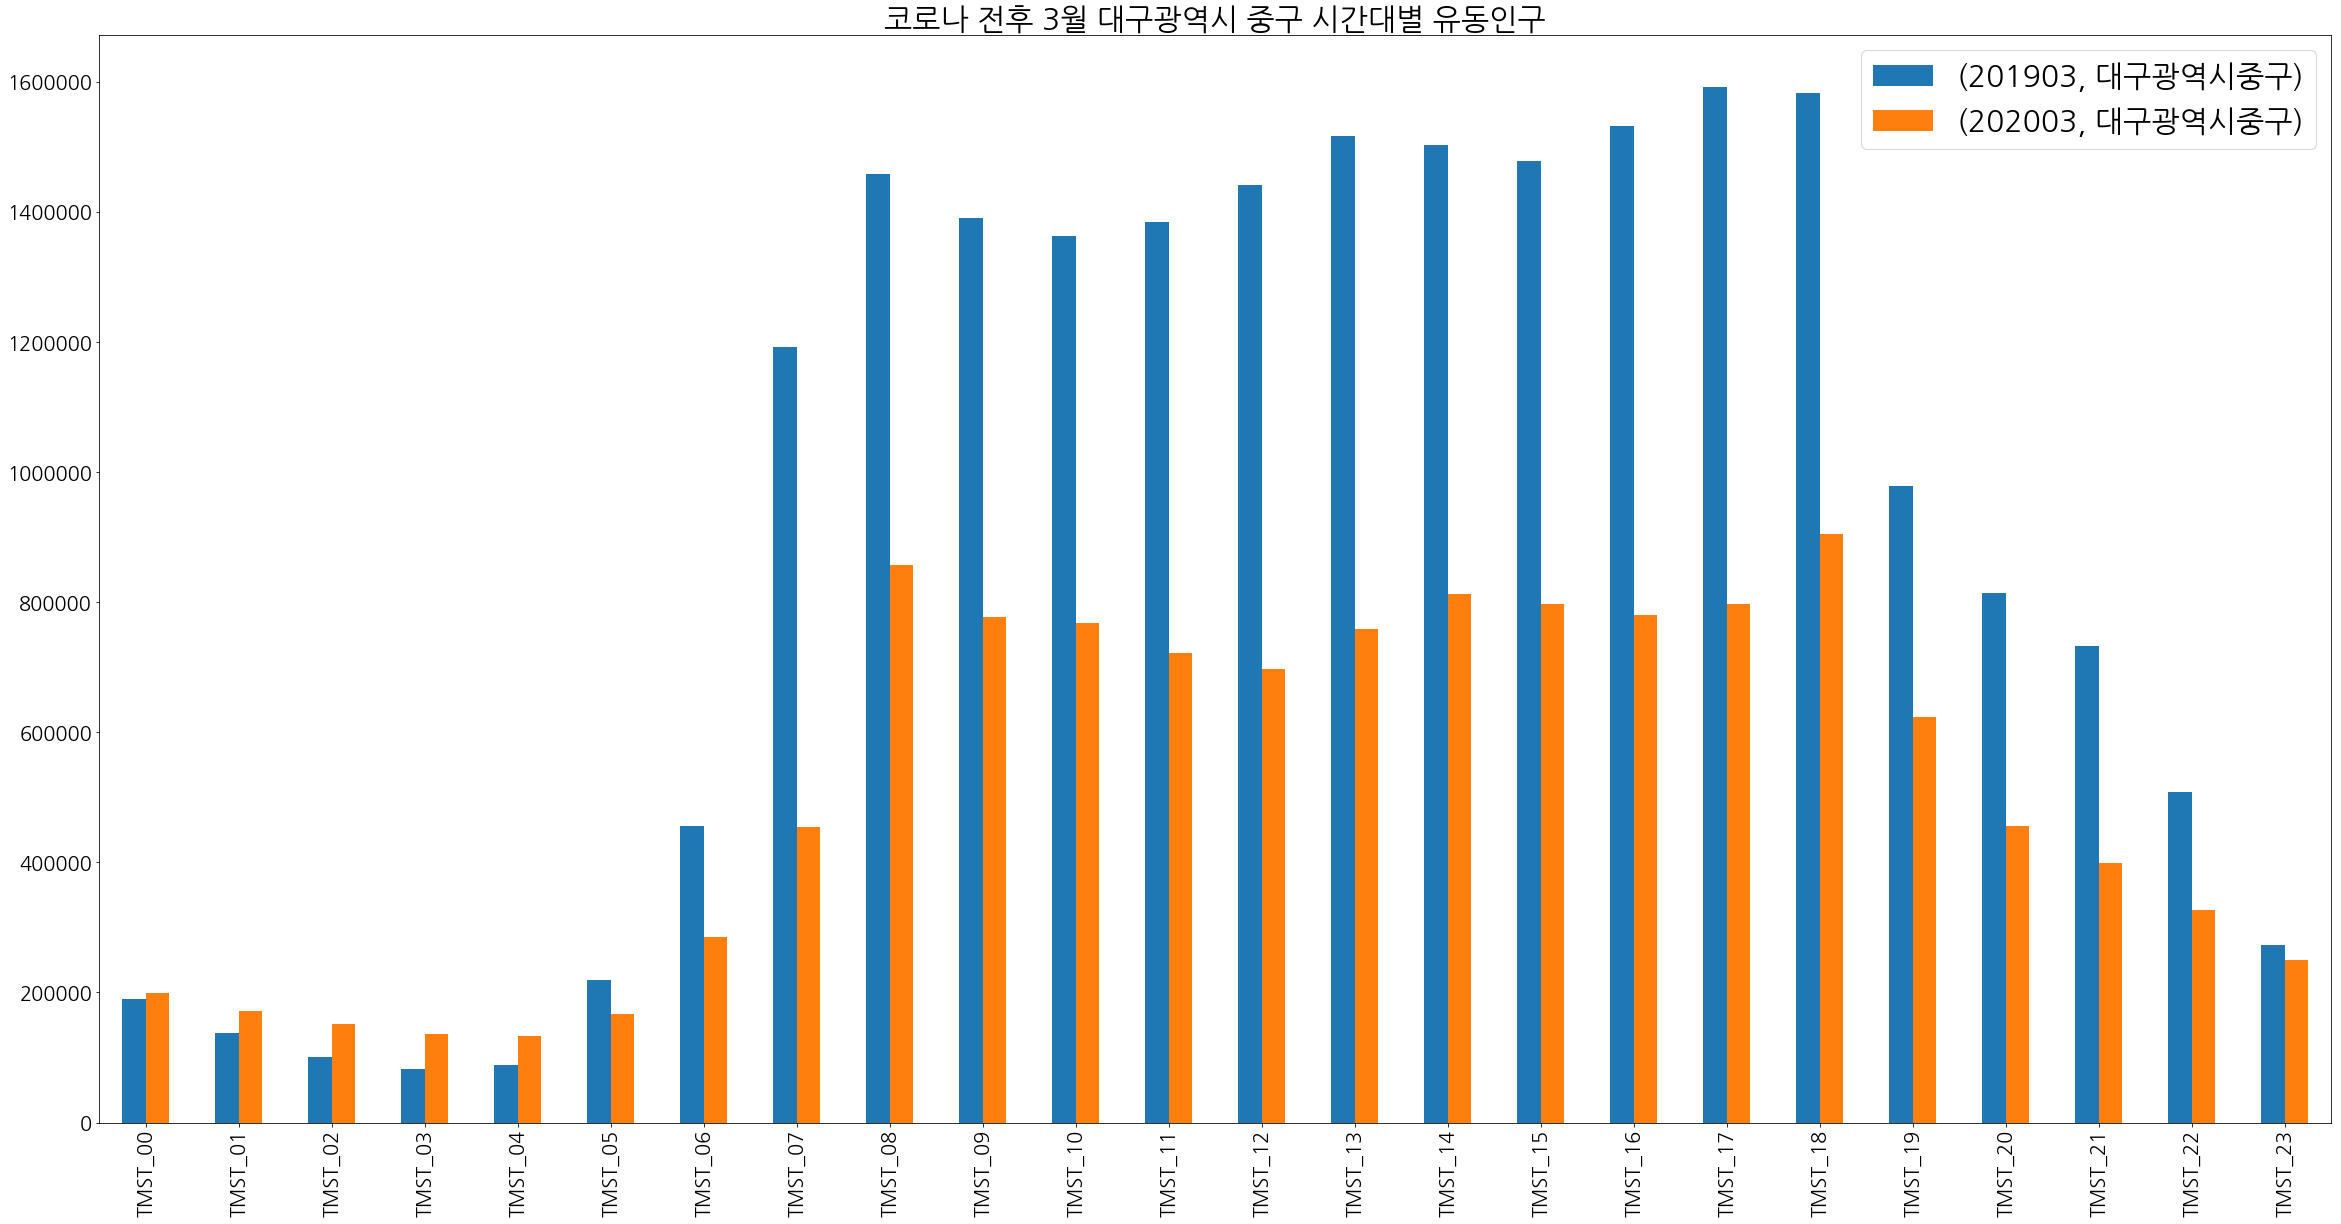

In [131]:
sk_month_GU_move.T.iloc[:, [5, 21]].plot(kind = 'bar')
plt.title('코로나 전후 3월 대구광역시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [132]:
start = 5
end = 21

YM = '3월 대구광역시 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 대구광역시 중구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_17에 제일 크다
3월 대구광역시 중구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['00', '01', '02', '03', '04']시간에 이동량 증가


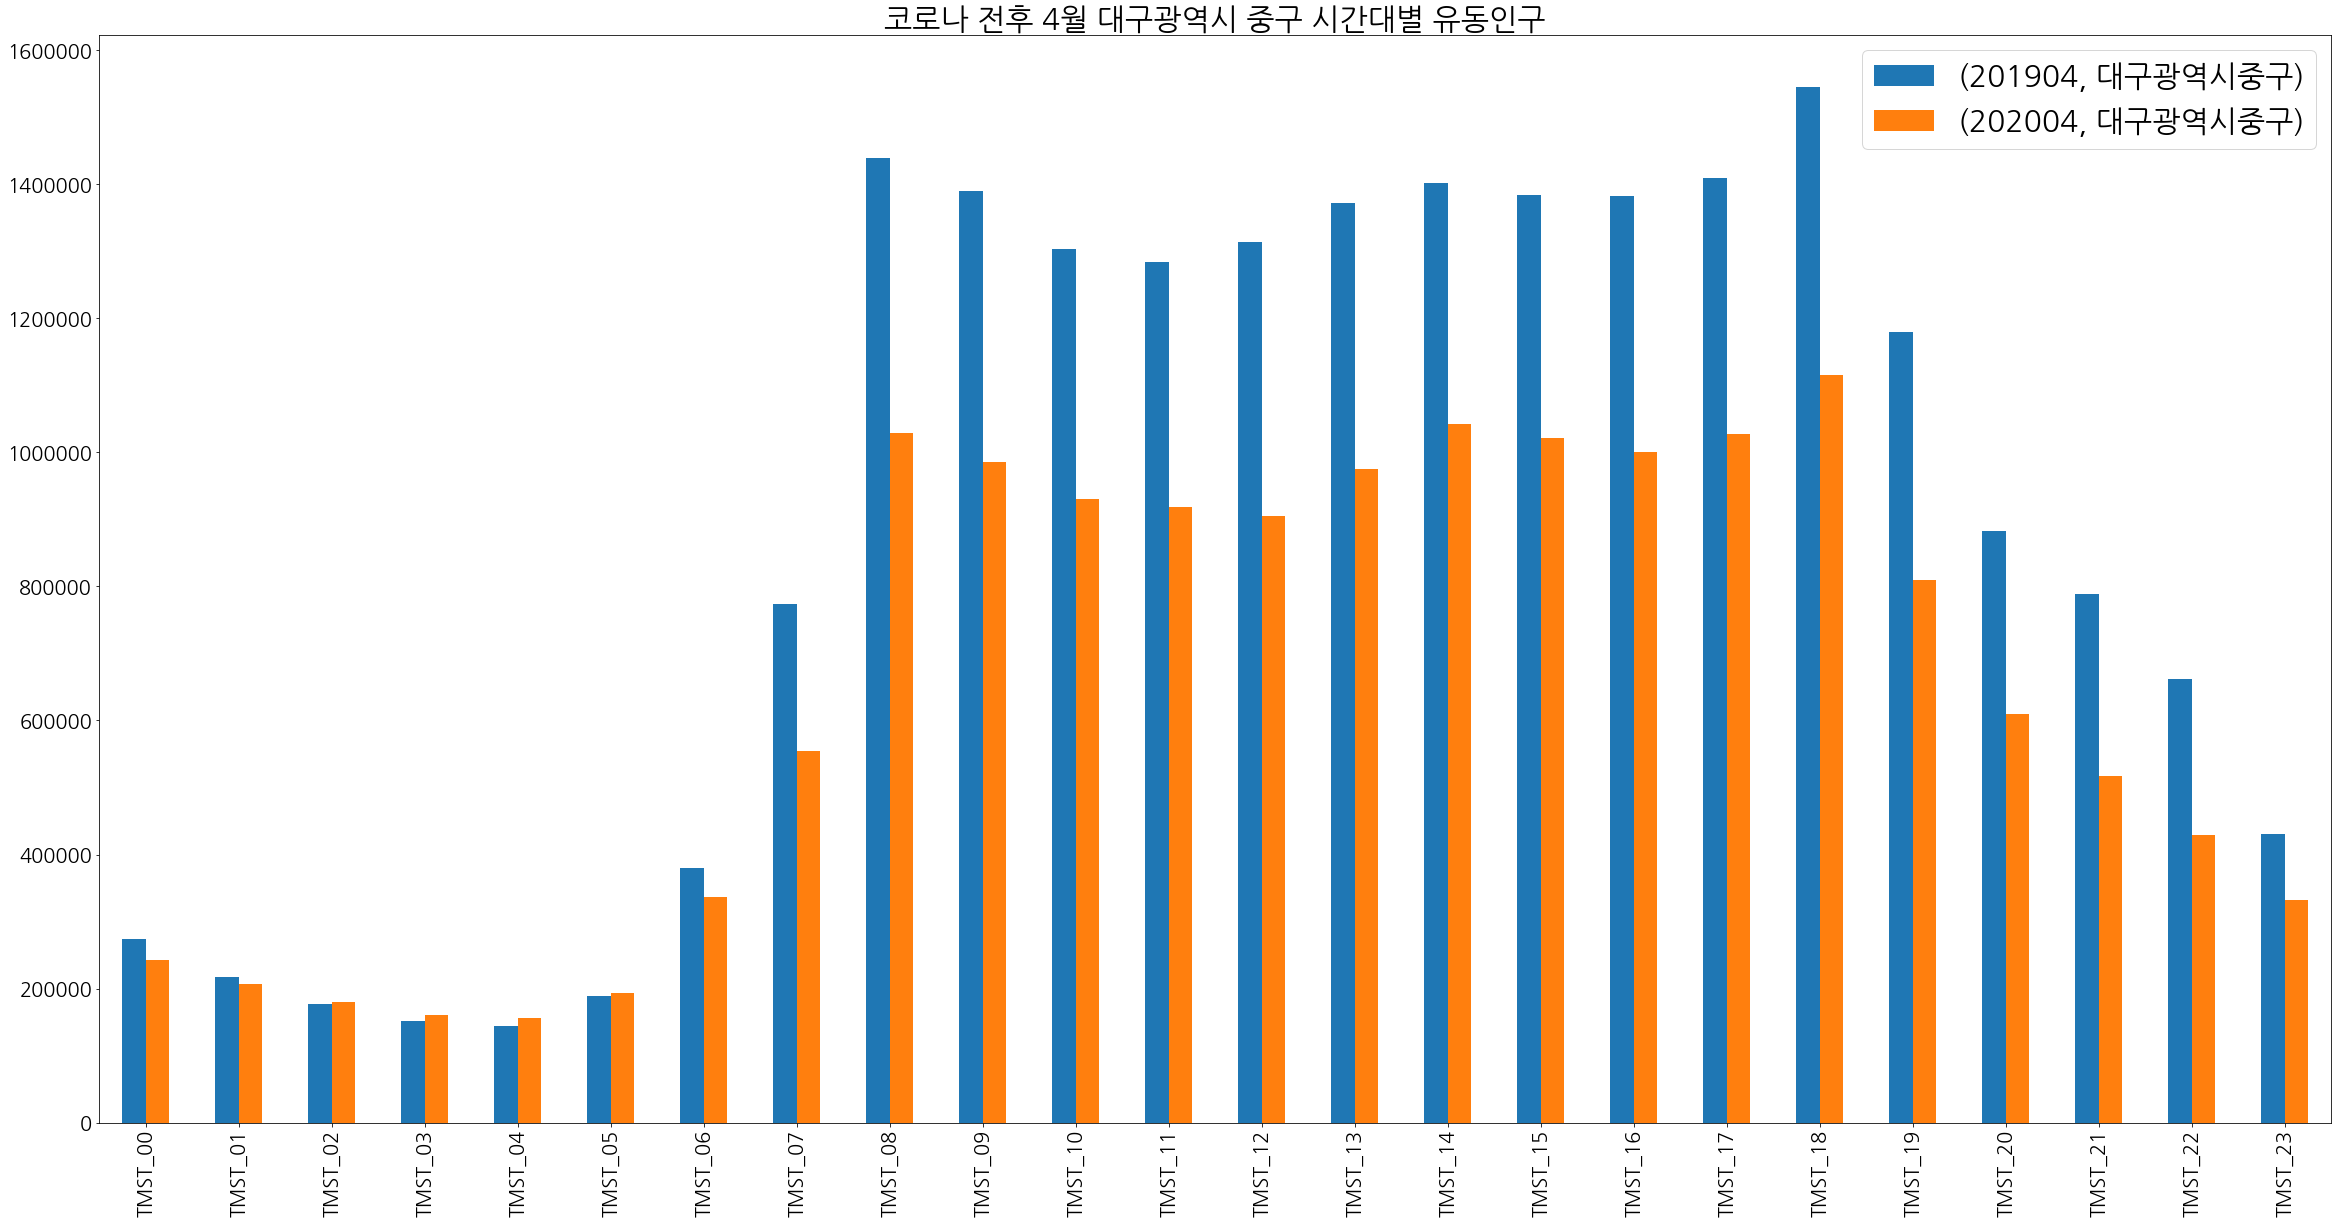

In [133]:
sk_month_GU_move.T.iloc[:, [9, 25]].plot(kind = 'bar')
plt.title('코로나 전후 4월 대구광역시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [134]:
start = 9
end = 25

YM = '4월 대구광역시 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 대구광역시 중구의 유동인구 변화량은 TMST_02에 제일 작으며, TMST_18에 제일 크다
4월 대구광역시 중구은 TMST_18에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['02', '03', '04', '05']시간에 이동량 증가


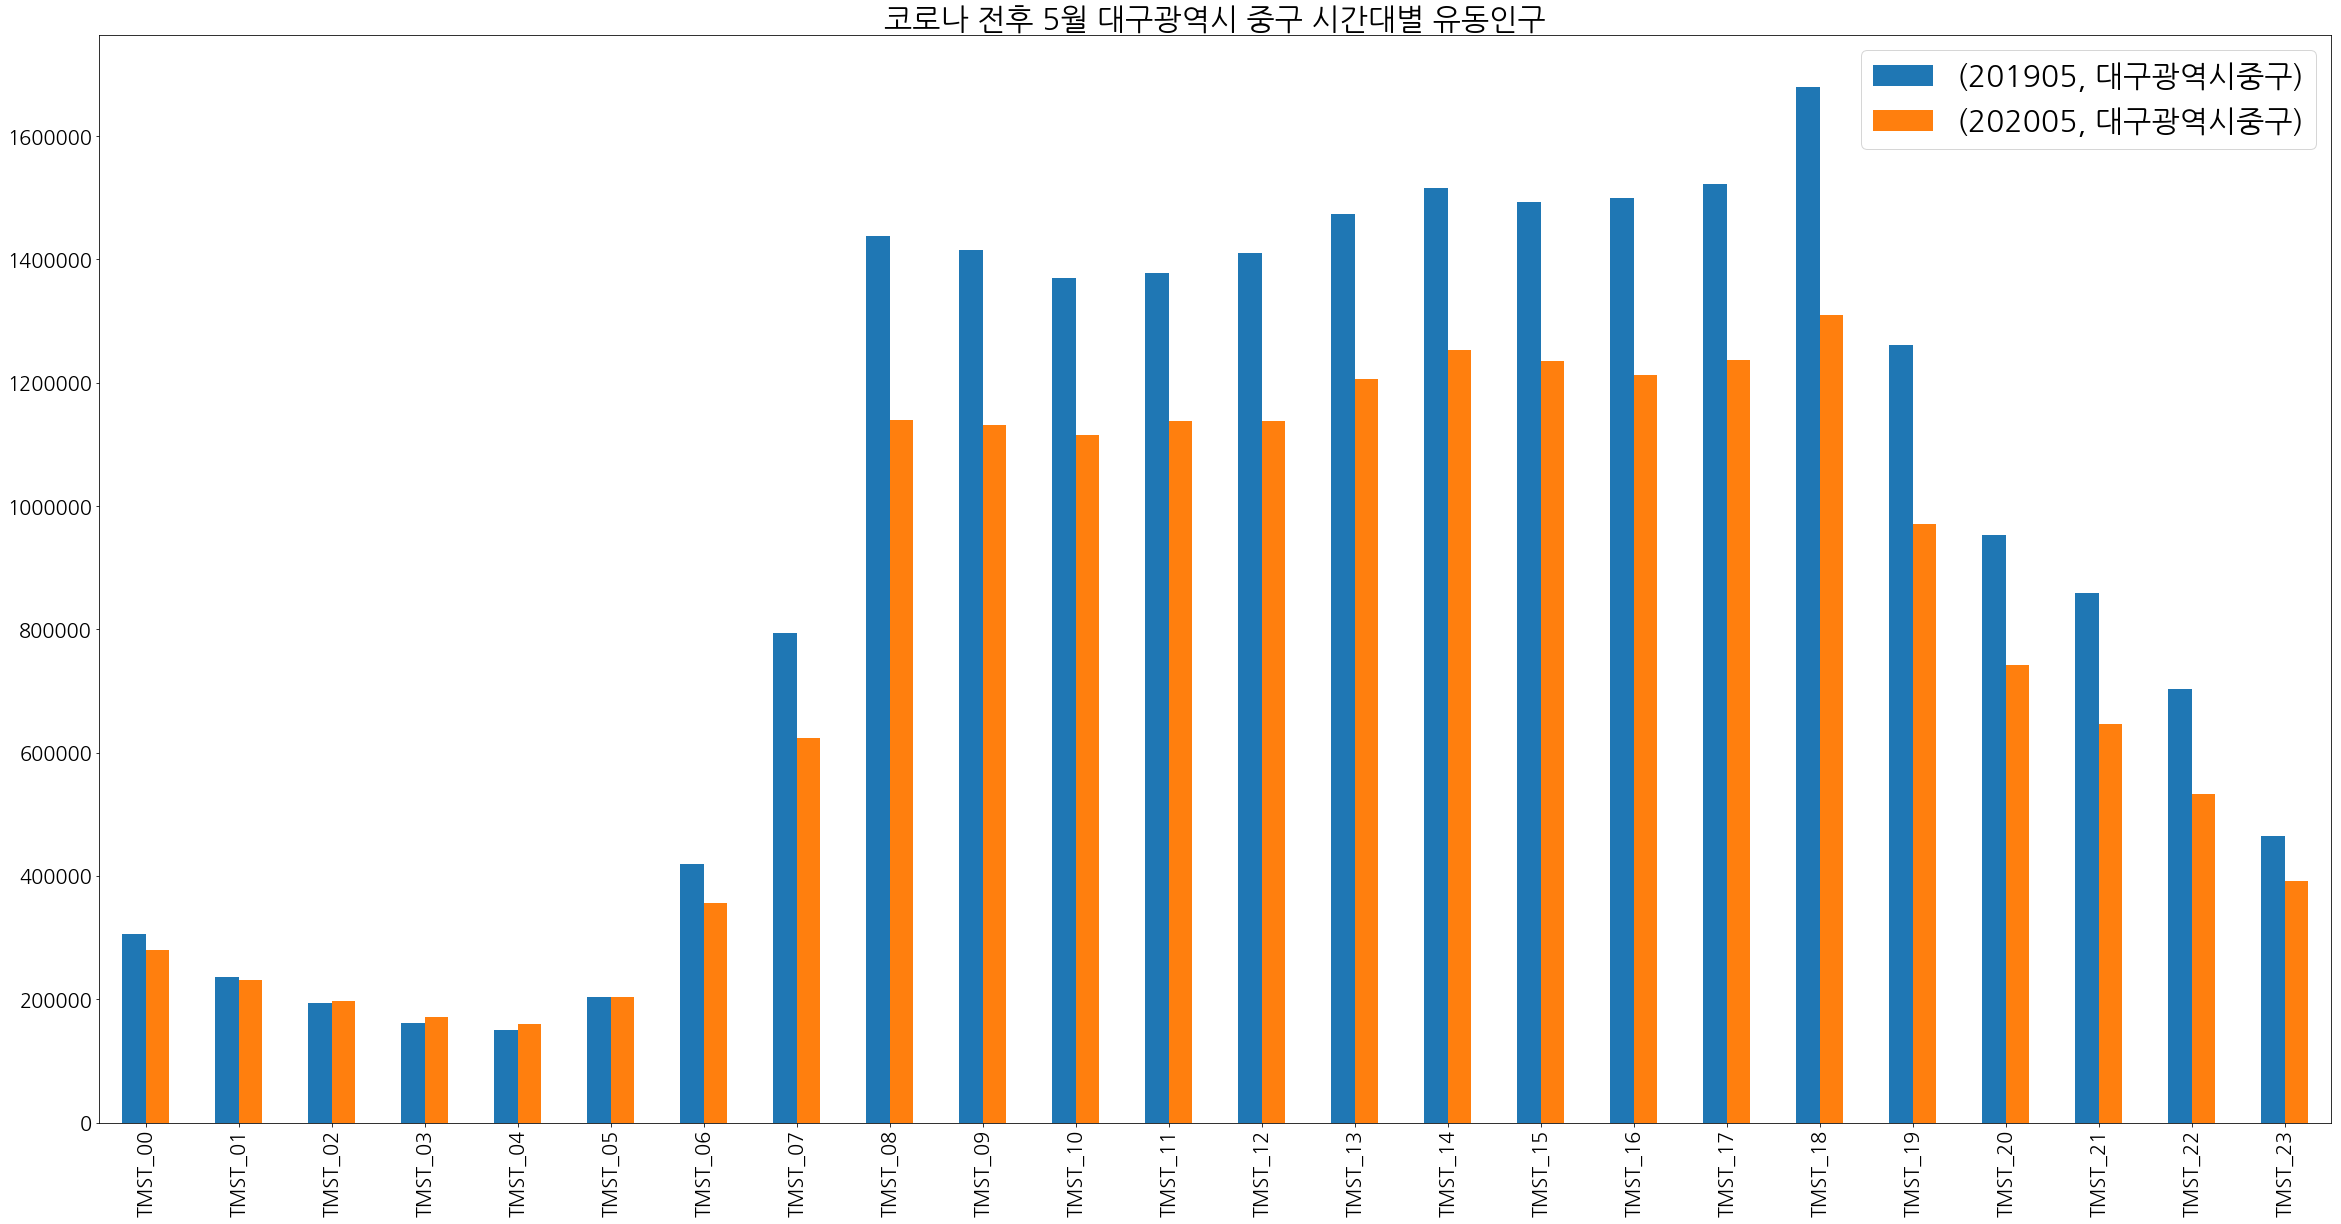

In [136]:
sk_month_GU_move.T.iloc[:, [13, 29]].plot(kind = 'bar')
plt.title('코로나 전후 5월 대구광역시 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [137]:
start = 13
end = 29

YM = '5월 대구광역시 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 대구광역시 중구의 유동인구 변화량은 TMST_05에 제일 작으며, TMST_18에 제일 크다
5월 대구광역시 중구은 TMST_18에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['02', '03', '04', '05']시간에 이동량 증가


# 2. 연령별 유동인구 EDA

In [138]:
sk_month_move_AGE = sk_data_AGE.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['CITY']]).sum().iloc[:, 3:]

In [139]:
for i in sk_month_move_AGE.T.max(axis = 1):
    index = list(np.where(sk_month_move_AGE.T == i))
    
    row_idx = sk_month_move_AGE.T.index[index[0]]
    col_idx = sk_month_move_AGE.T.columns[index[1]][0]
    
    print(f'{row_idx[0][:3]}&{row_idx[0][-4:]}의 유동인구가 가장 큰 시점은 {col_idx}입니다')
    
print('===============================================================================')

print(f'{sk_month_move_AGE.T.max(axis = 1).idxmax()} 연령의 유동인구가 가장 크며, 시점과 도시는 {sk_month_move_AGE.T.max(axis = 0).idxmax()}입니다.')

MAN&0004의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&0509의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
MAN&1014의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
MAN&1519의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
MAN&2024의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&2529의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&3034의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&3539의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&4044의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&4549의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&5054의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&5559의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&6064의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&6569의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&_70U의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
WMA&0004의 유동인구가 가장 큰 시점은 (201903, '서울특별시')입니다
WMA&0509의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
WMA&1014의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
WMA&1519의 유동인구가 가장 큰 시점은 (201905, '서울특별시')입니다
WMA&2024의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
WMA&2529의 유동인구가 가장 큰 시점은 (201903, '서울특별시')입니다
WMA&3034의 유동인구가 가장 큰 시점은 (201903, 

In [140]:
for i in sk_month_move_AGE.T.min(axis = 1):
    index = list(np.where(sk_month_move_AGE.T == i))
    
    row_idx = sk_month_move_AGE.T.index[index[0]]
    col_idx = sk_month_move_AGE.T.columns[index[1]][0]
    
    print(f'{row_idx[0][:3]}&{row_idx[0][-4:]}의 유동인구가 가장 작은 시점은 {col_idx}입니다')
    
print('===============================================================================')

print(f'{sk_month_move_AGE.T.min(axis = 1).idxmin()} 연령의 유동인구가 가장 작으며, 시점과 도시는 {sk_month_move_AGE.T.min(axis = 0).idxmin()}입니다.')

MAN&0004의 유동인구가 가장 작은 시점은 (202003, '대구광역시')입니다
MAN&0509의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&1014의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&1519의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&2024의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&2529의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&3034의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&3539의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&4044의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&4549의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&5054의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&5559의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&6064의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&6569의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&_70U의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&0004의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&0509의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&1014의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&1519의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&2024의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&2529의 유동인구가 가장 작은 시점은 (202003, '대구광역시')입니다
WMA&3034의 유동인

### 2-1. 코로나 전후 도시별 연령별 유동인구

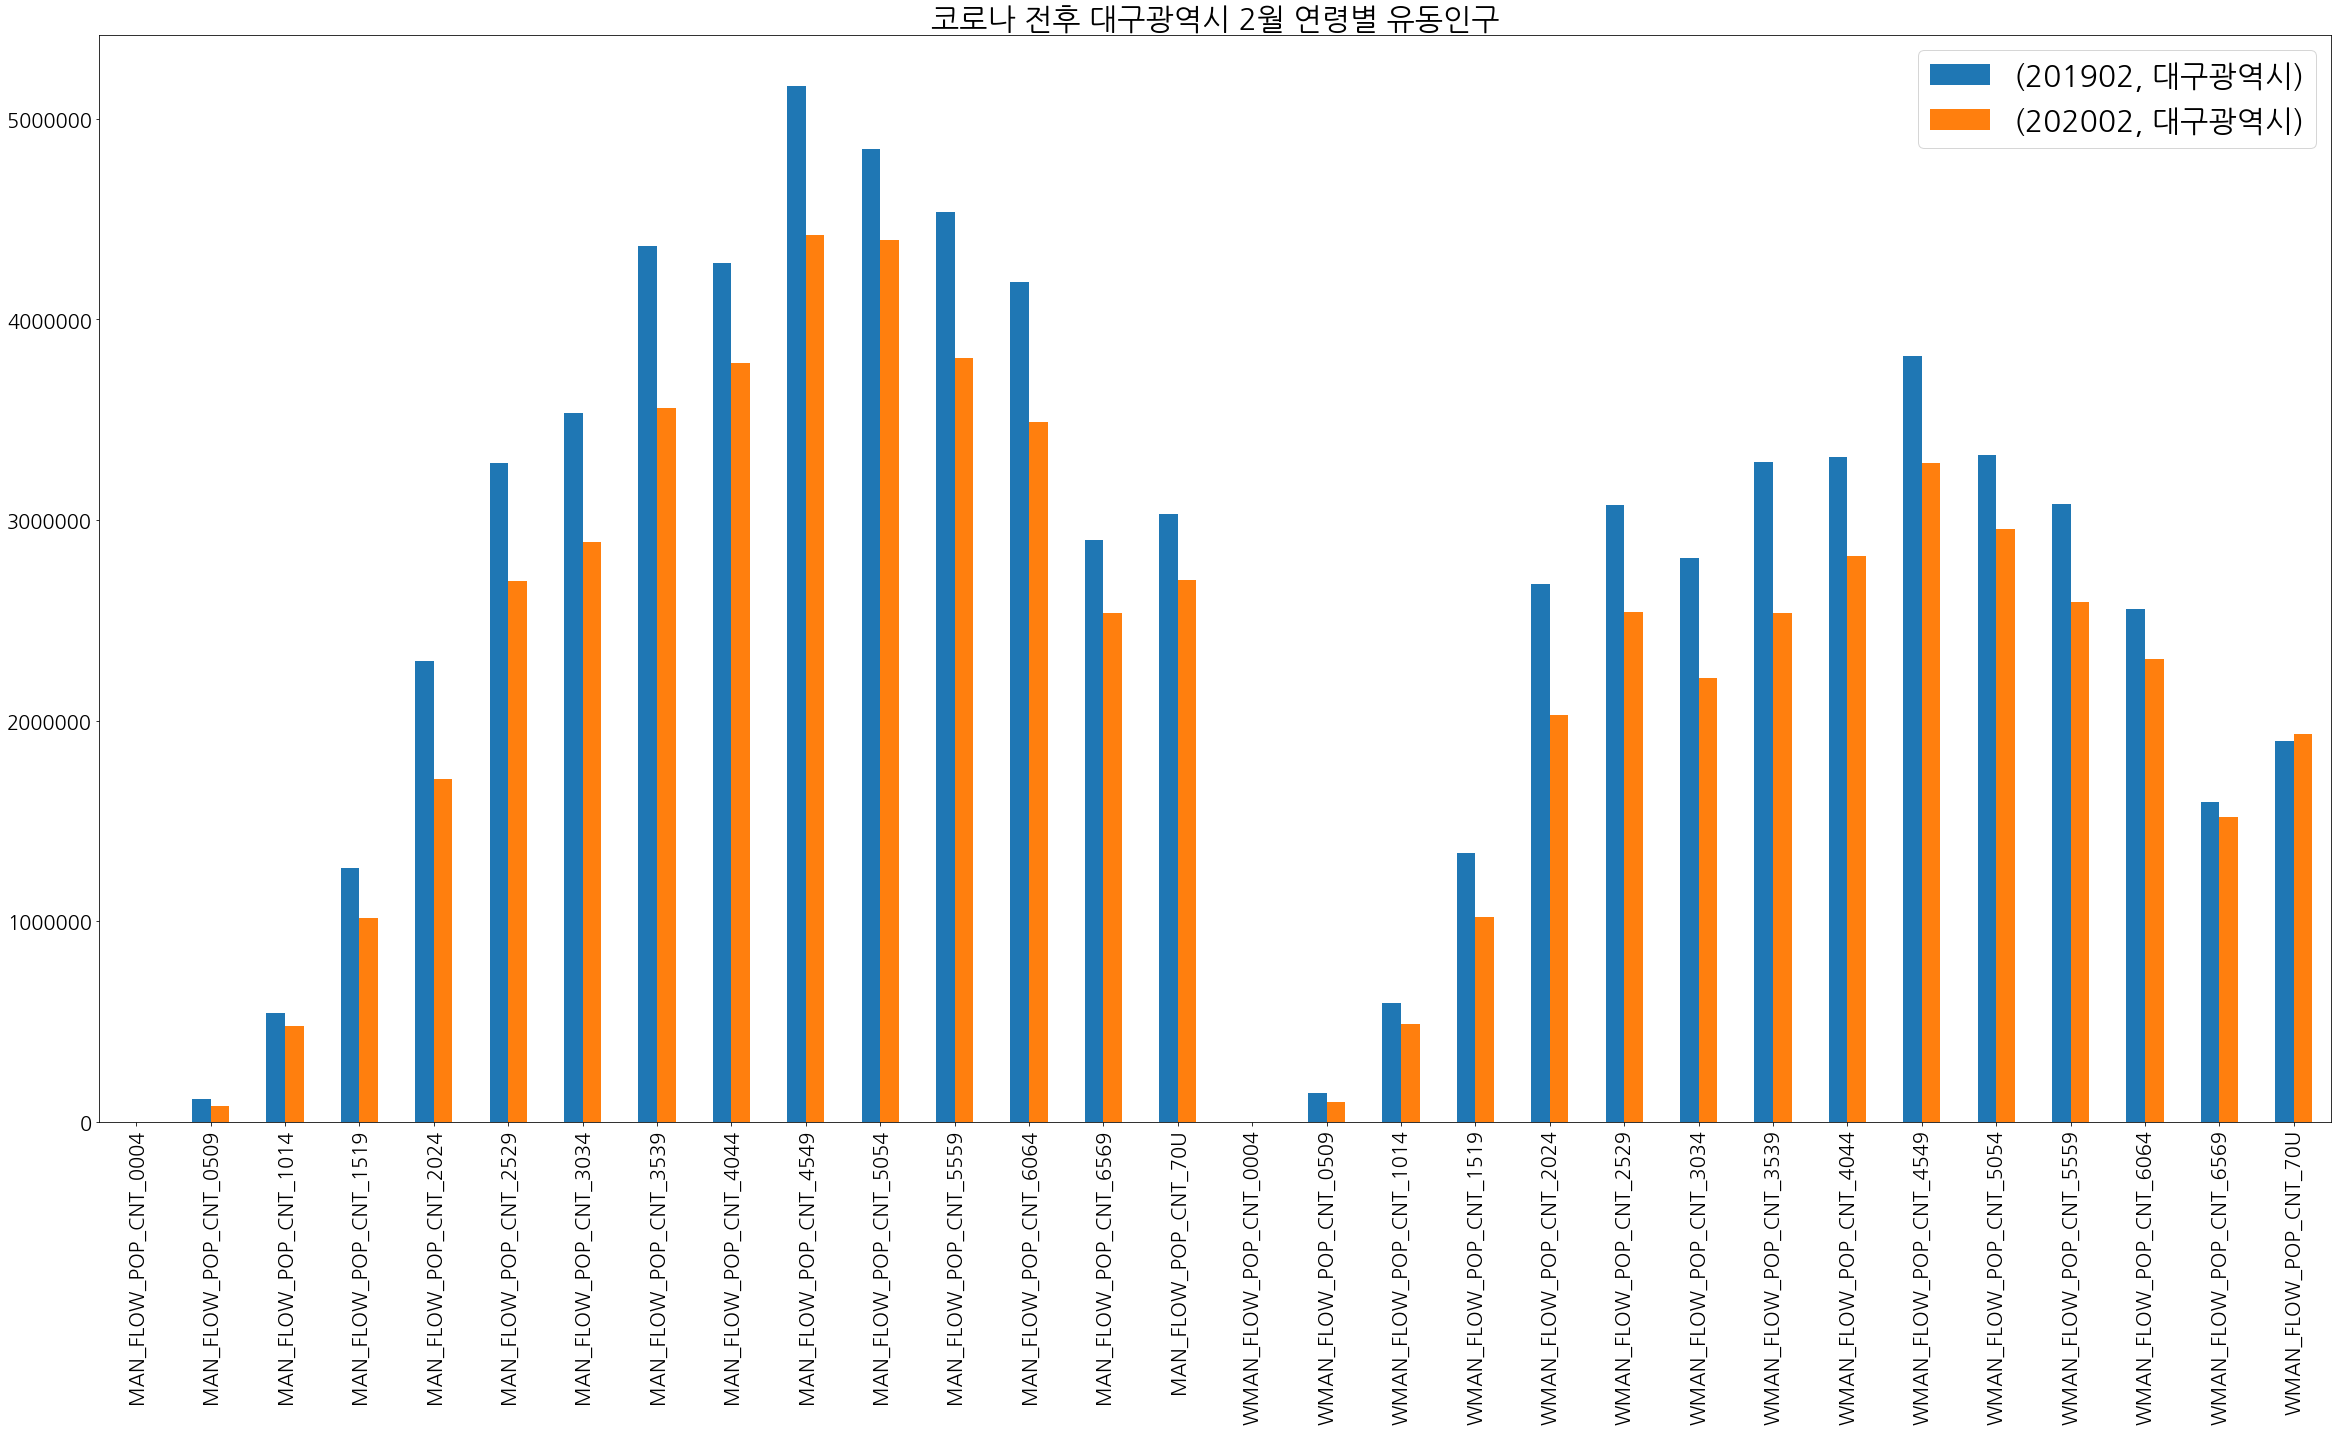

In [141]:
sk_month_move_AGE.T.iloc[:, [0, 8]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 2월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [142]:
start = 0
end = 8

YM = '2월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

2월 대구광역시의 유동인구 변화량은 WMAN_FLOW_POP_CNT_70U연령이 제일 작으며, MAN_FLOW_POP_CNT_3539연령이 제일 크다
2월 대구광역시은 MAN_FLOW_POP_CNT_3539의 이동량이 가장 큰 폭으로 감소하였으며, WMAN_FLOW_POP_CNT_70U에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569'] 연령은 이동량 감소
여자의 ['_70U'] 연령은 이동량 증가


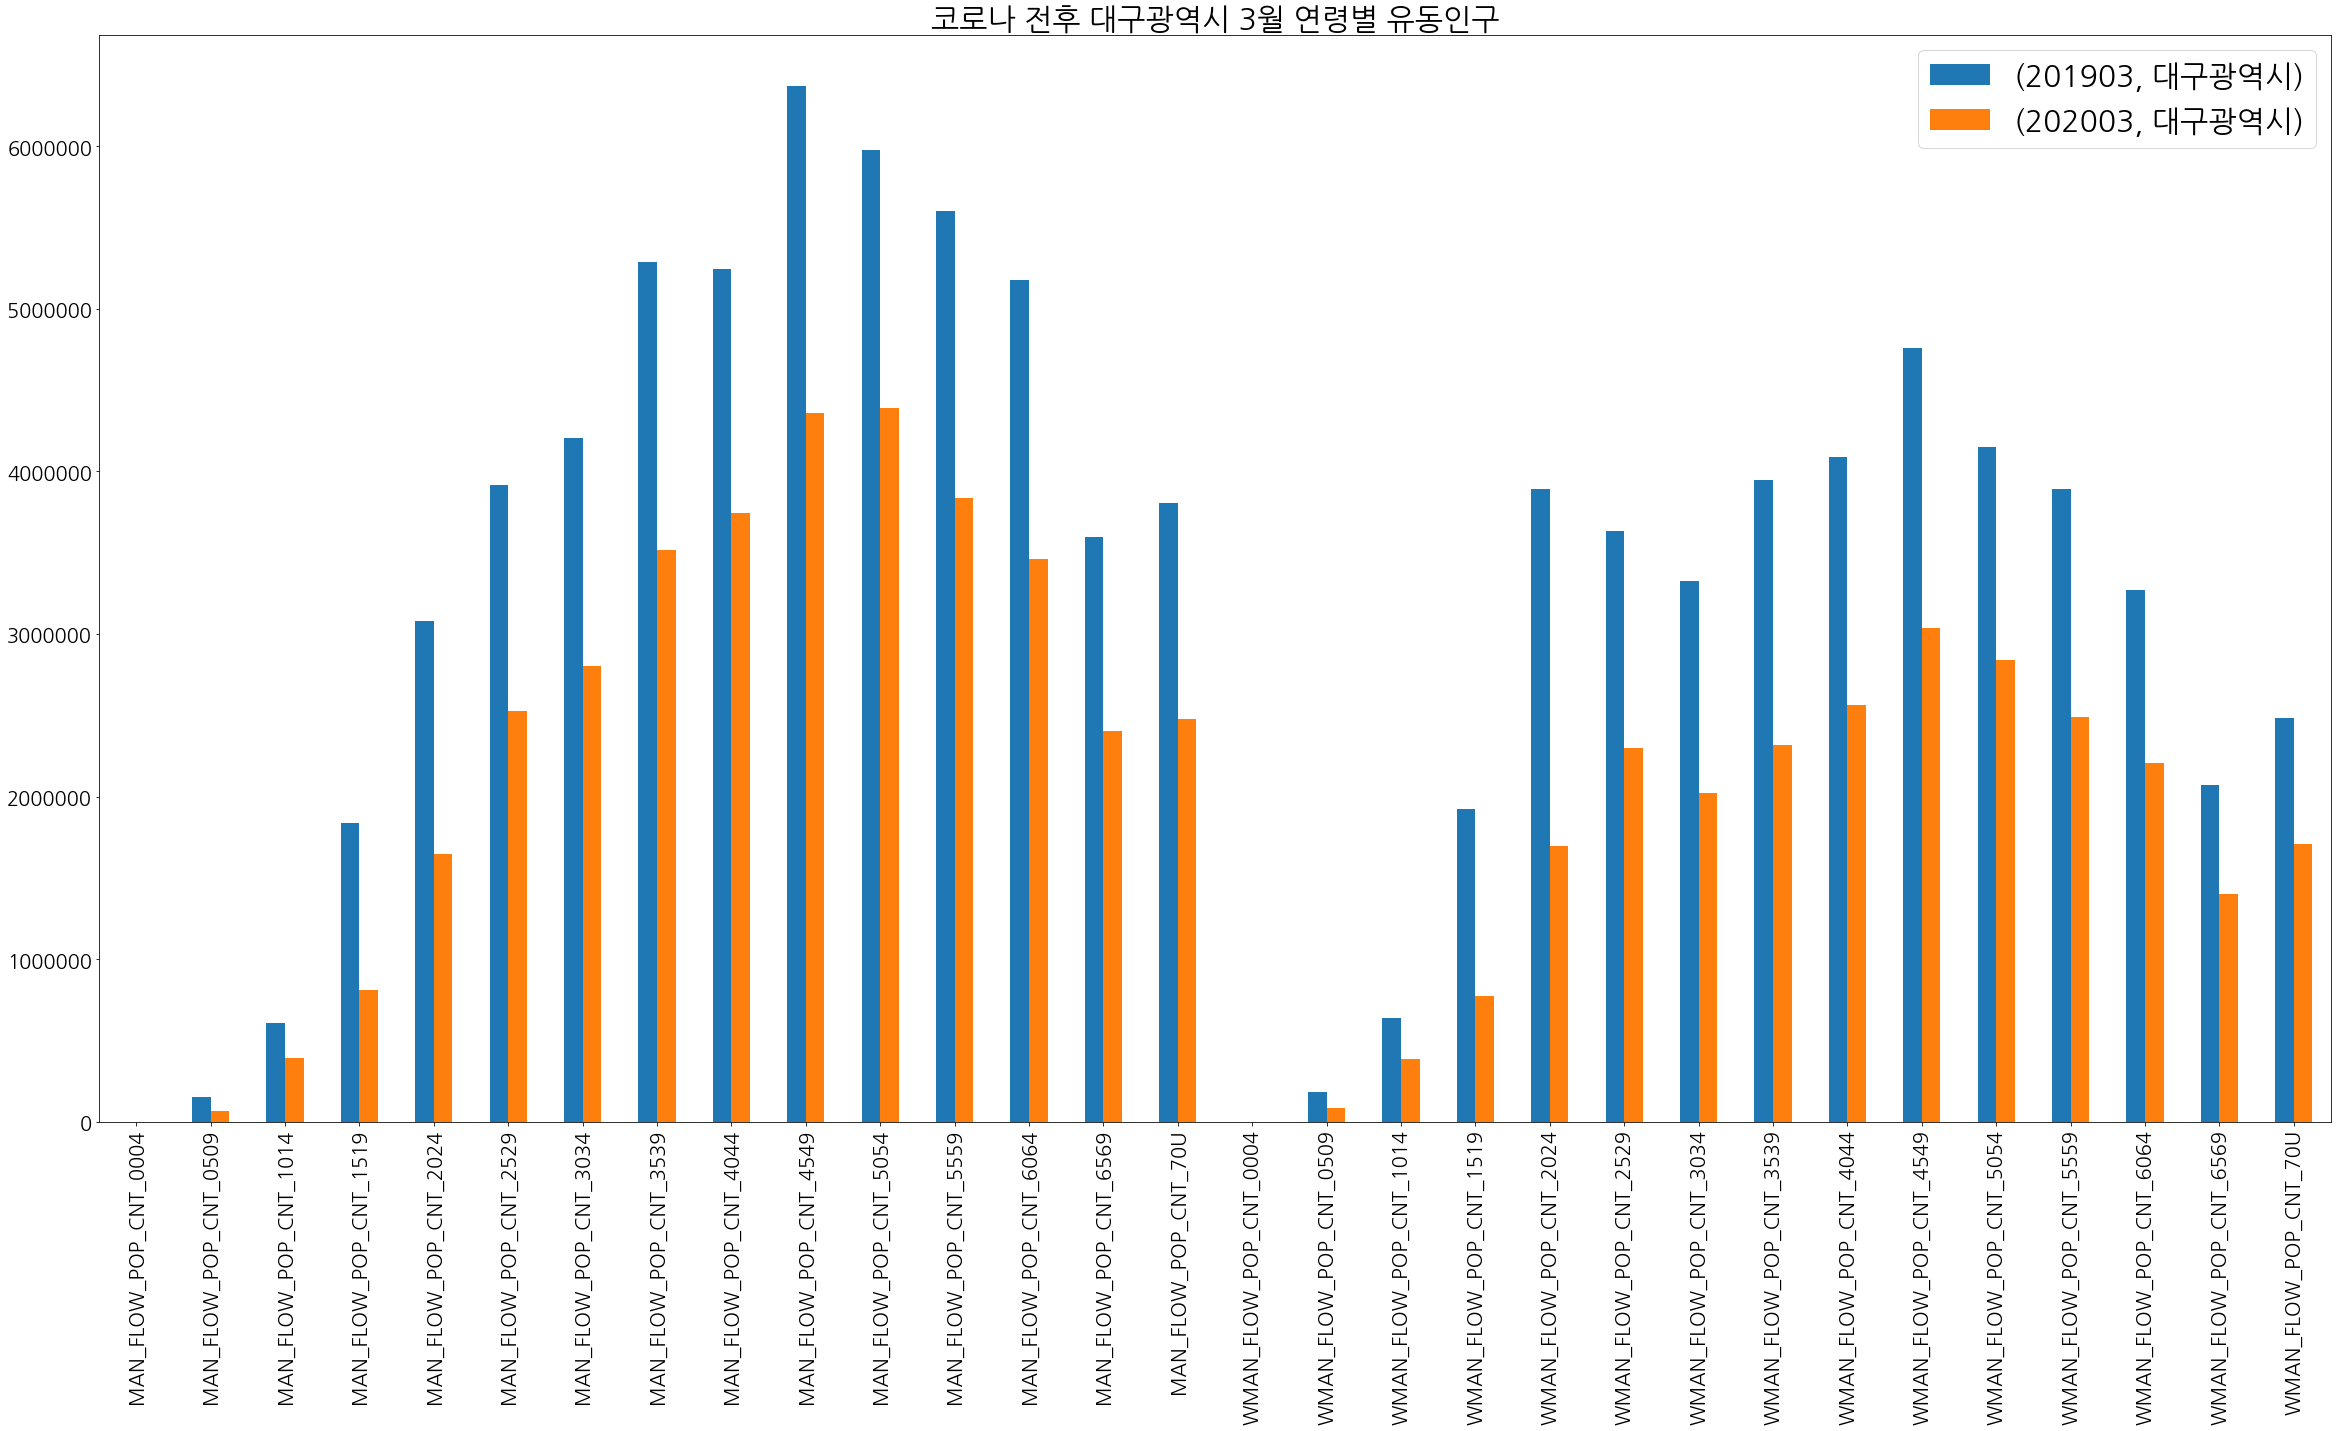

In [143]:
sk_month_move_AGE.T.iloc[:, [2, 10]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 3월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [144]:
start = 2
end = 10

YM = '3월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

3월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
3월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


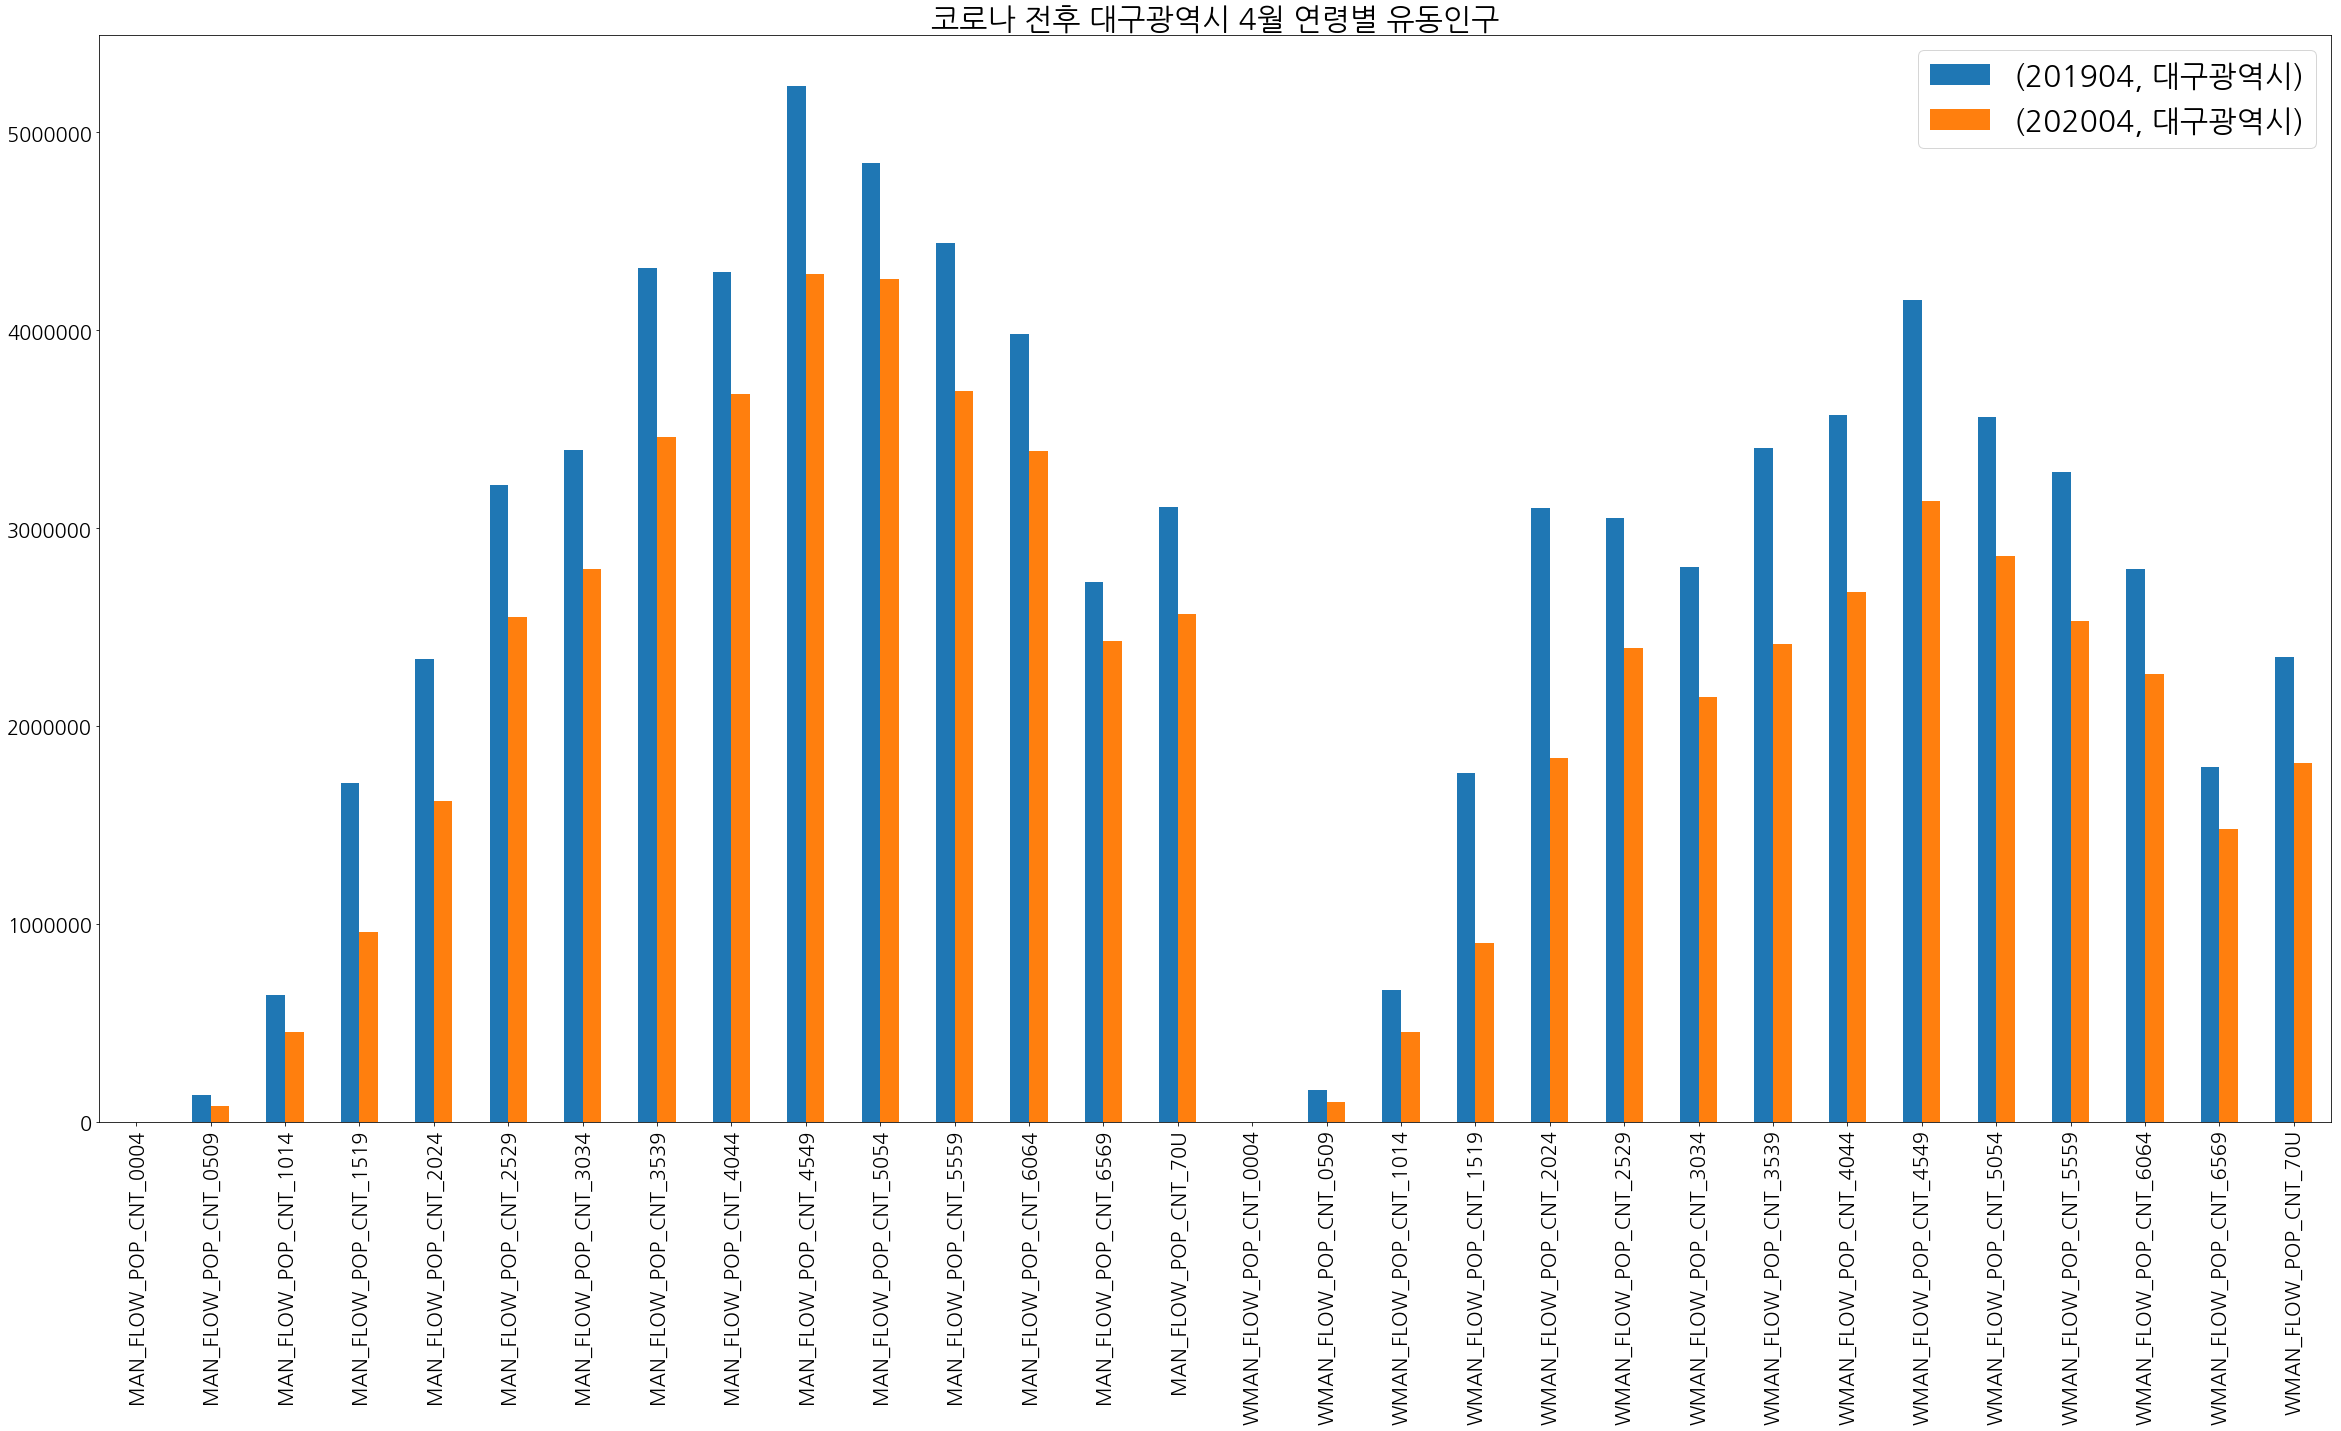

In [145]:
sk_month_move_AGE.T.iloc[:, [4, 12]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 4월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [146]:
start = 4
end = 12

YM = '4월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

4월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
4월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


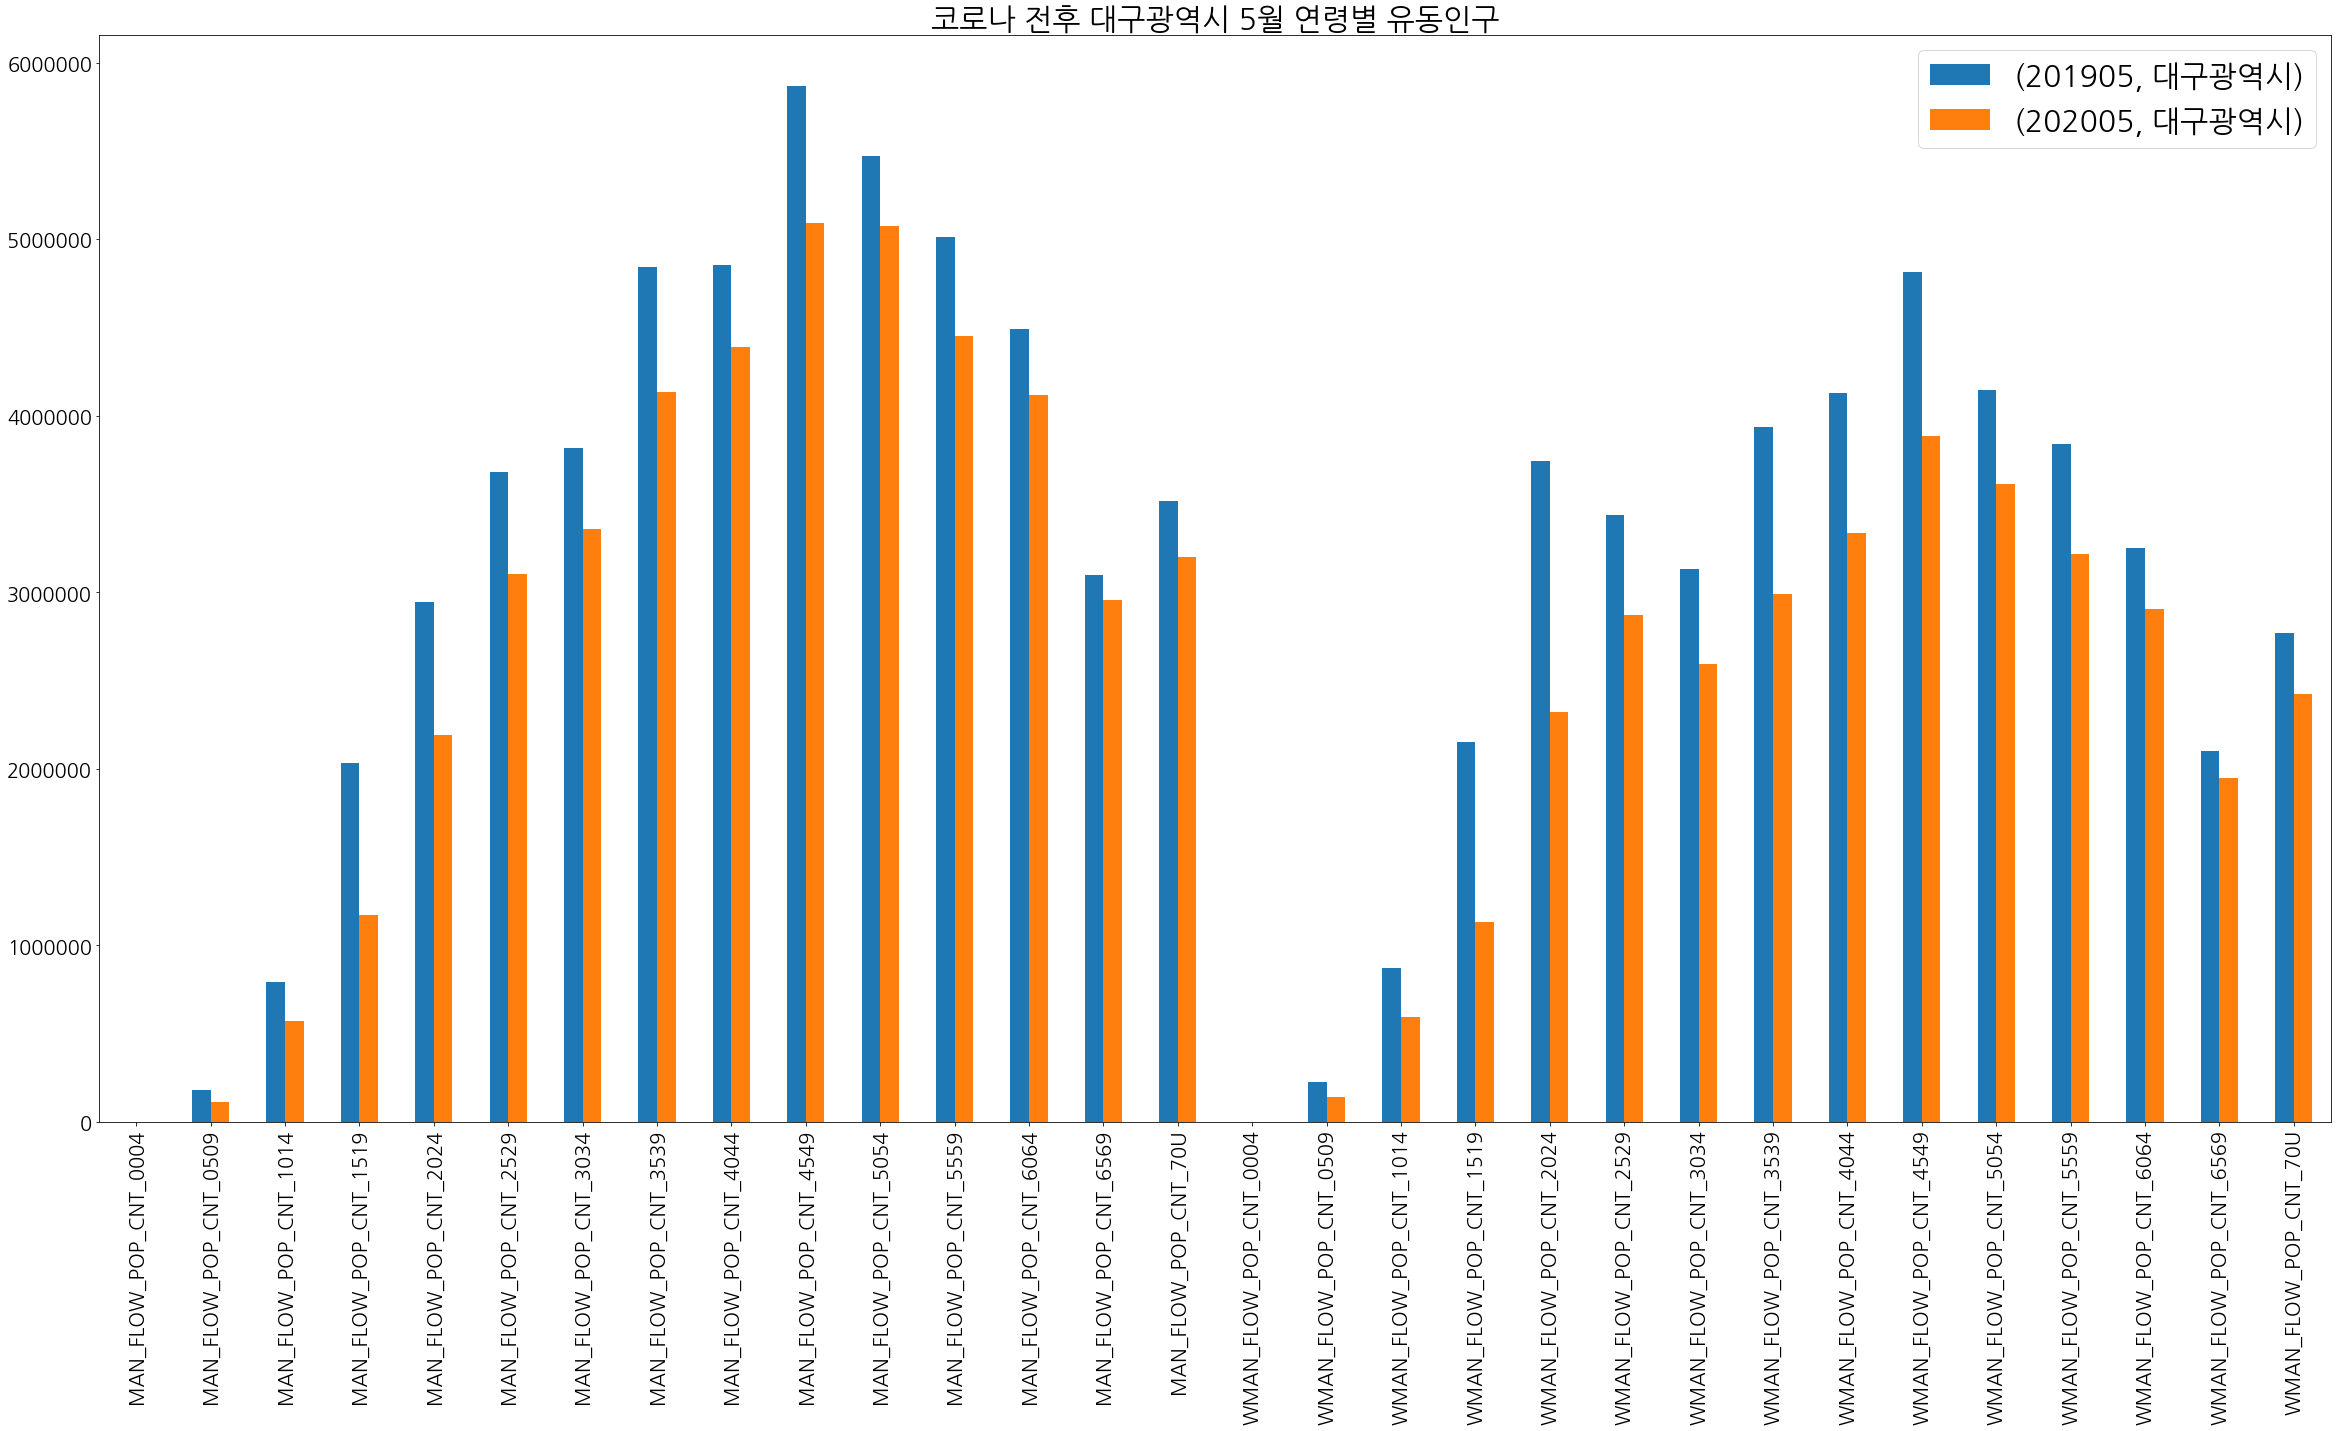

In [147]:
sk_month_move_AGE.T.iloc[:, [6, 14]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 5월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [148]:
start = 6
end = 14

YM = '5월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

5월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
5월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


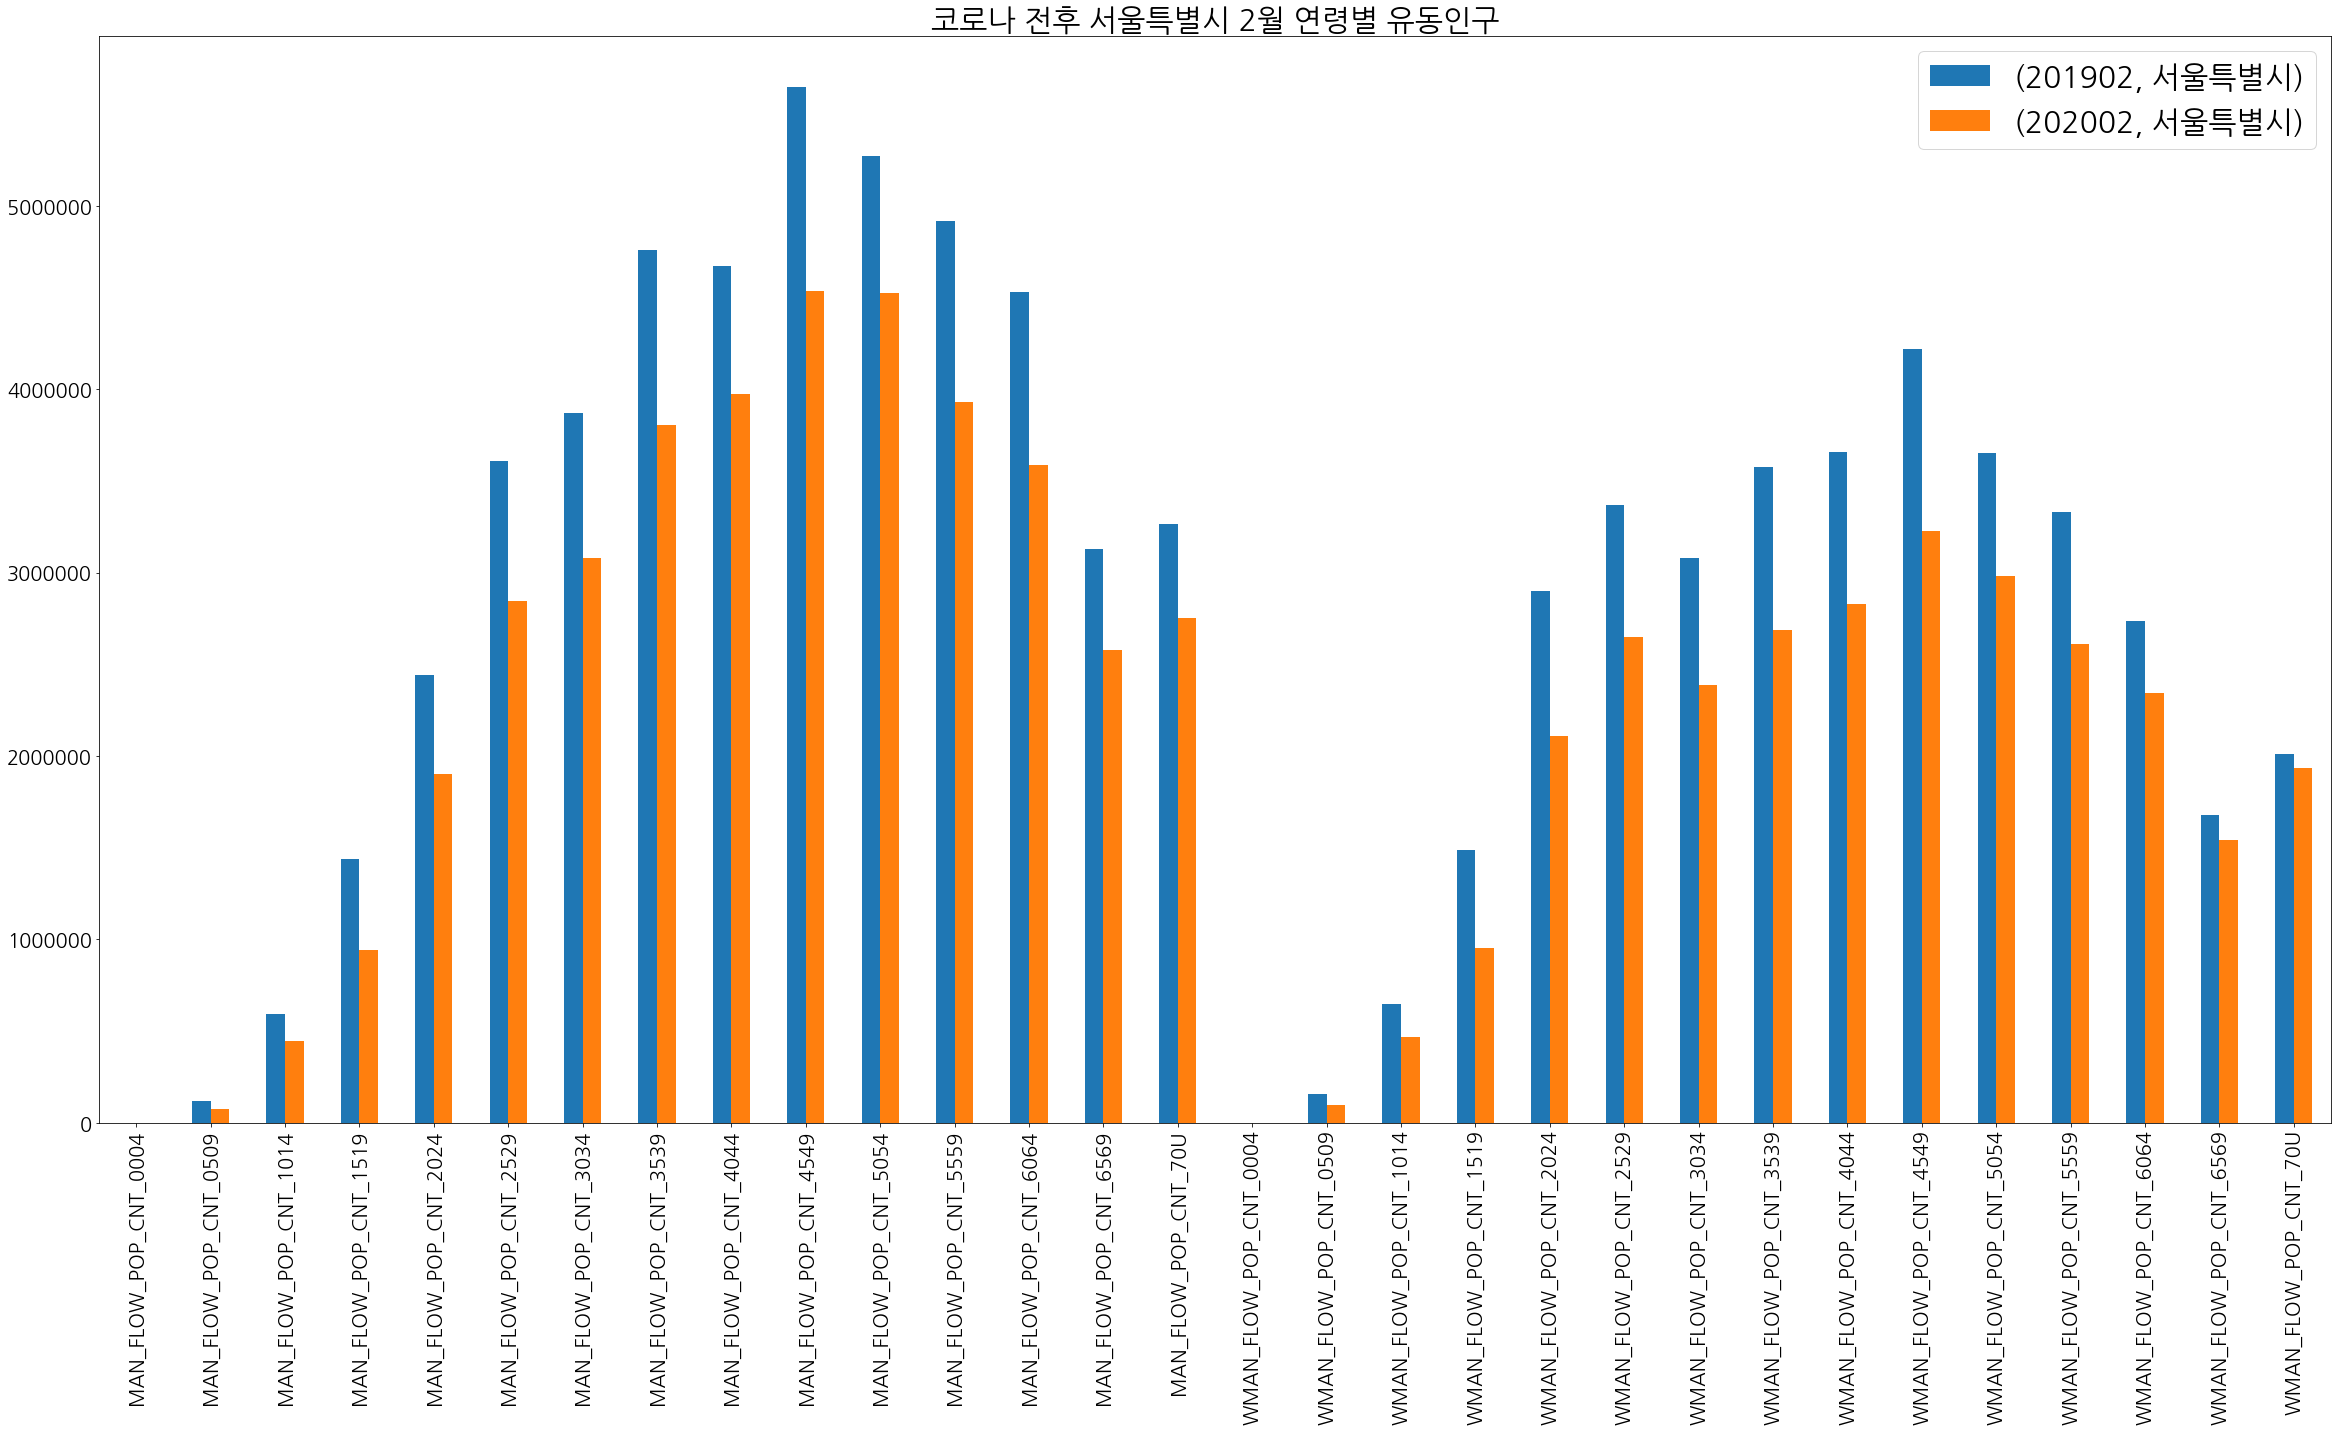

In [149]:
sk_month_move_AGE.T.iloc[:, [1, 9]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 2월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [150]:
start = 1
end = 9

YM = '2월 서울특별시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

2월 서울특별시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, MAN_FLOW_POP_CNT_4549연령이 제일 크다
2월 서울특별시은 MAN_FLOW_POP_CNT_4549의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


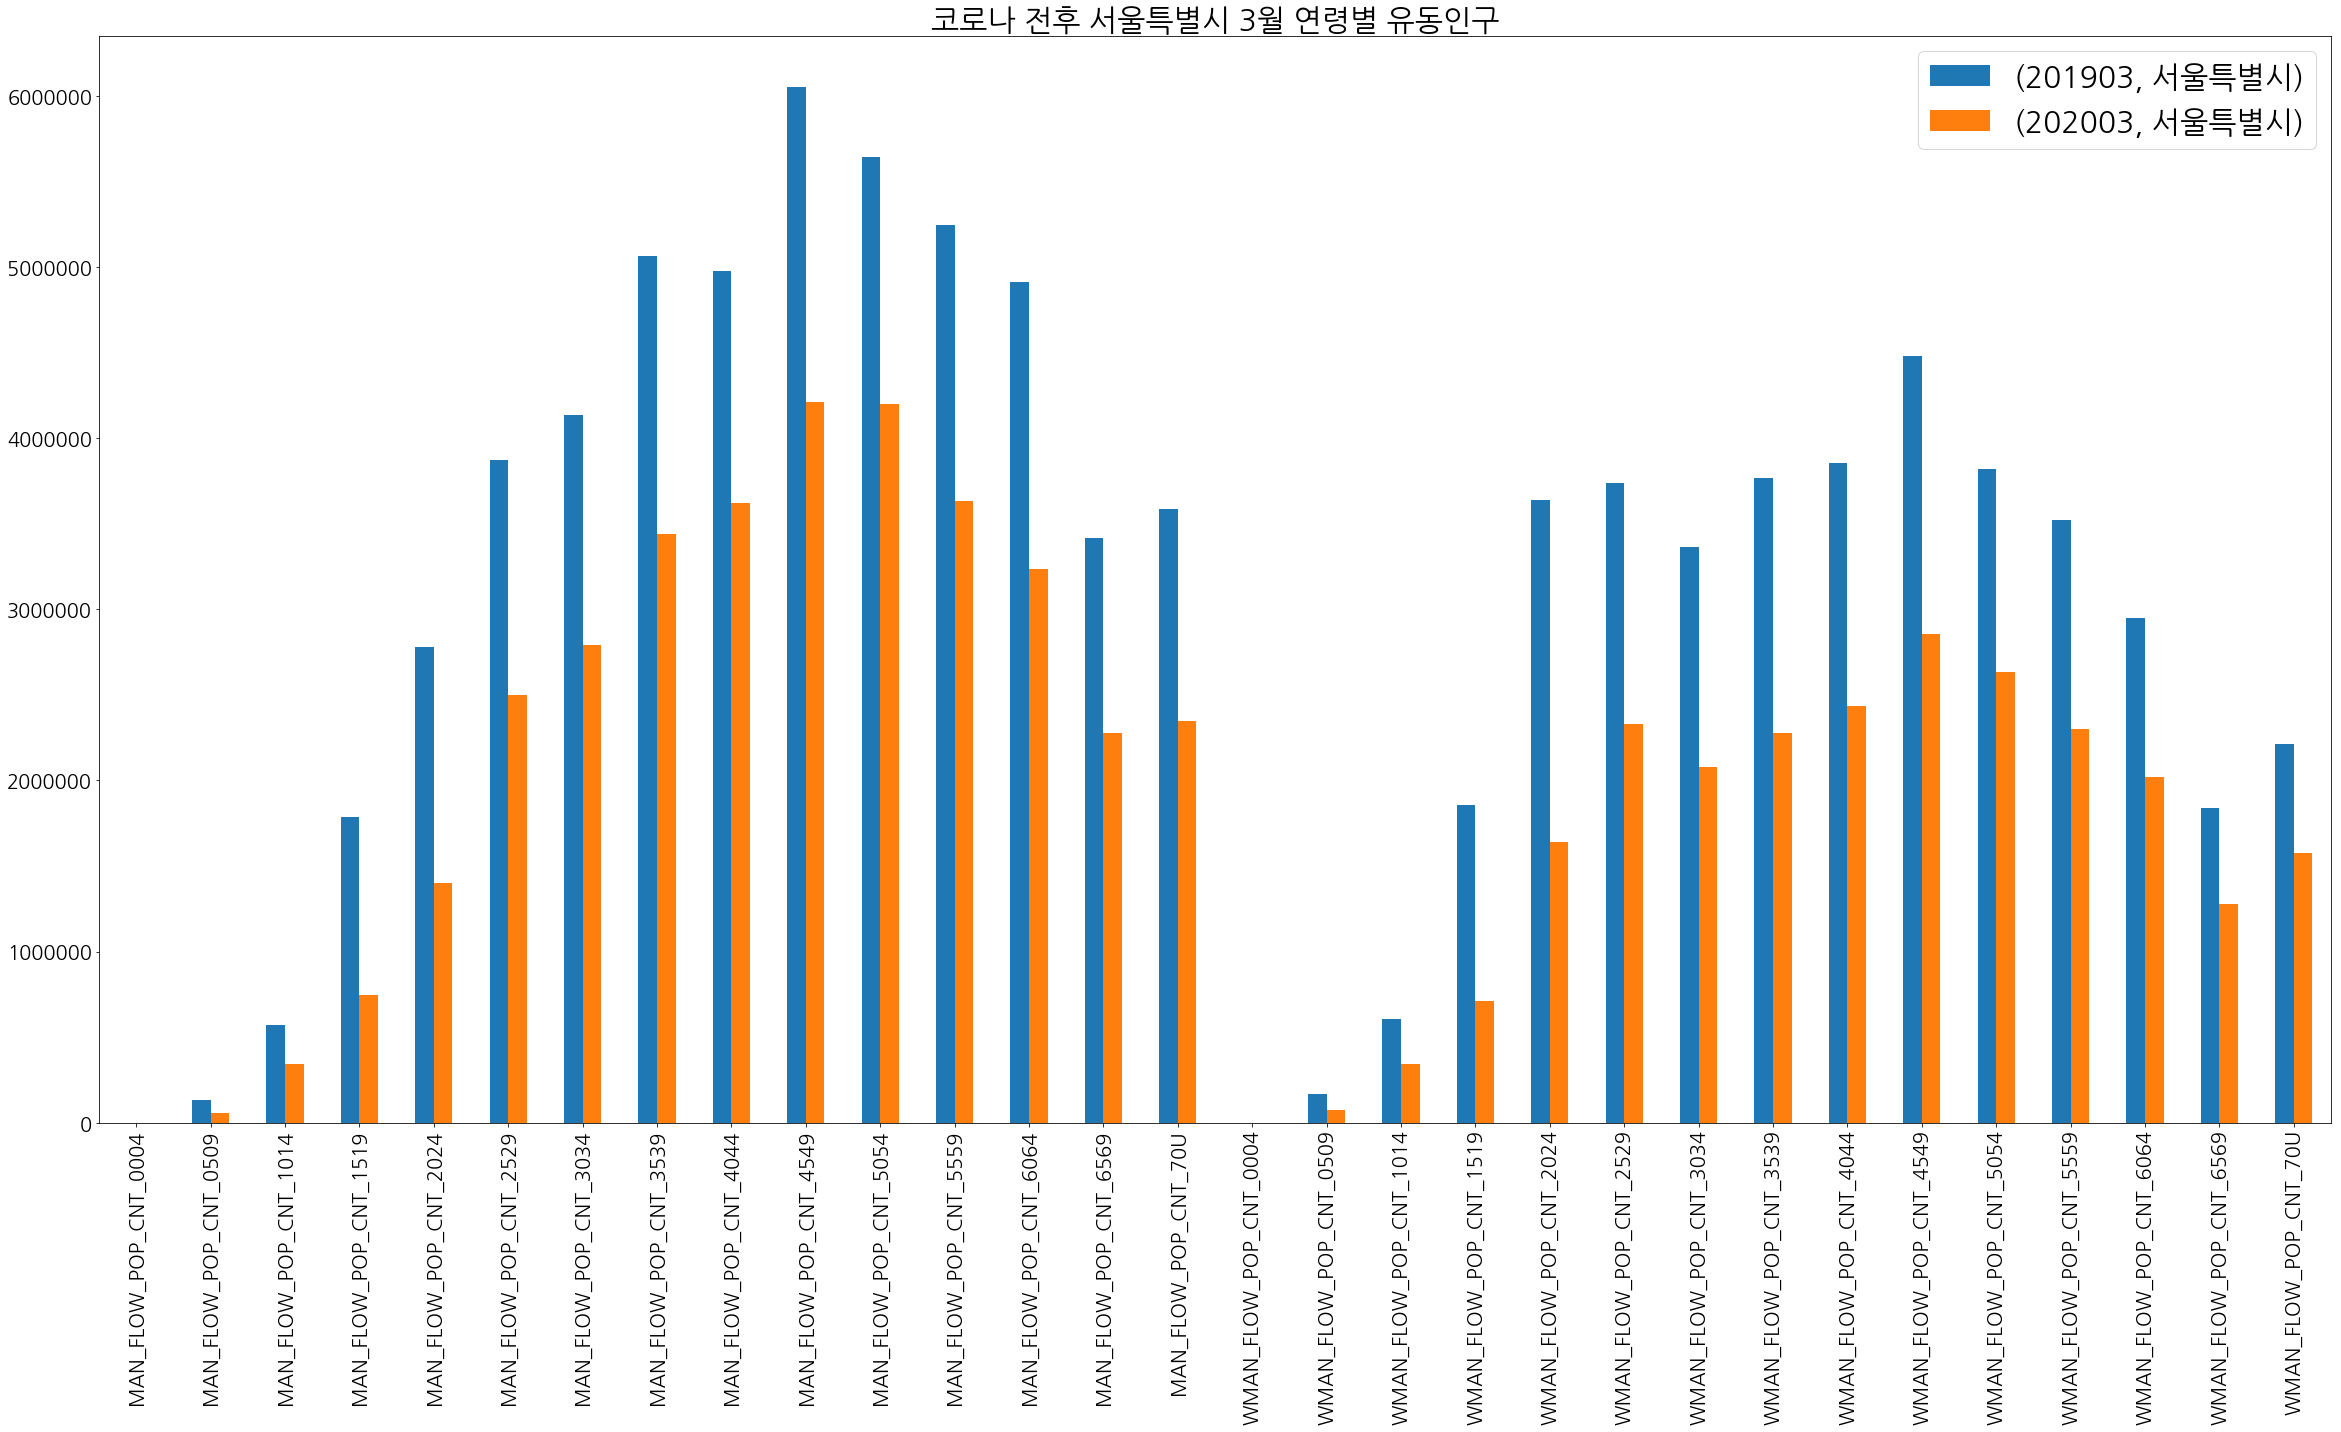

In [151]:
sk_month_move_AGE.T.iloc[:, [3, 11]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 3월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [152]:
start = 3
end = 11

YM = '3월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

3월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
3월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


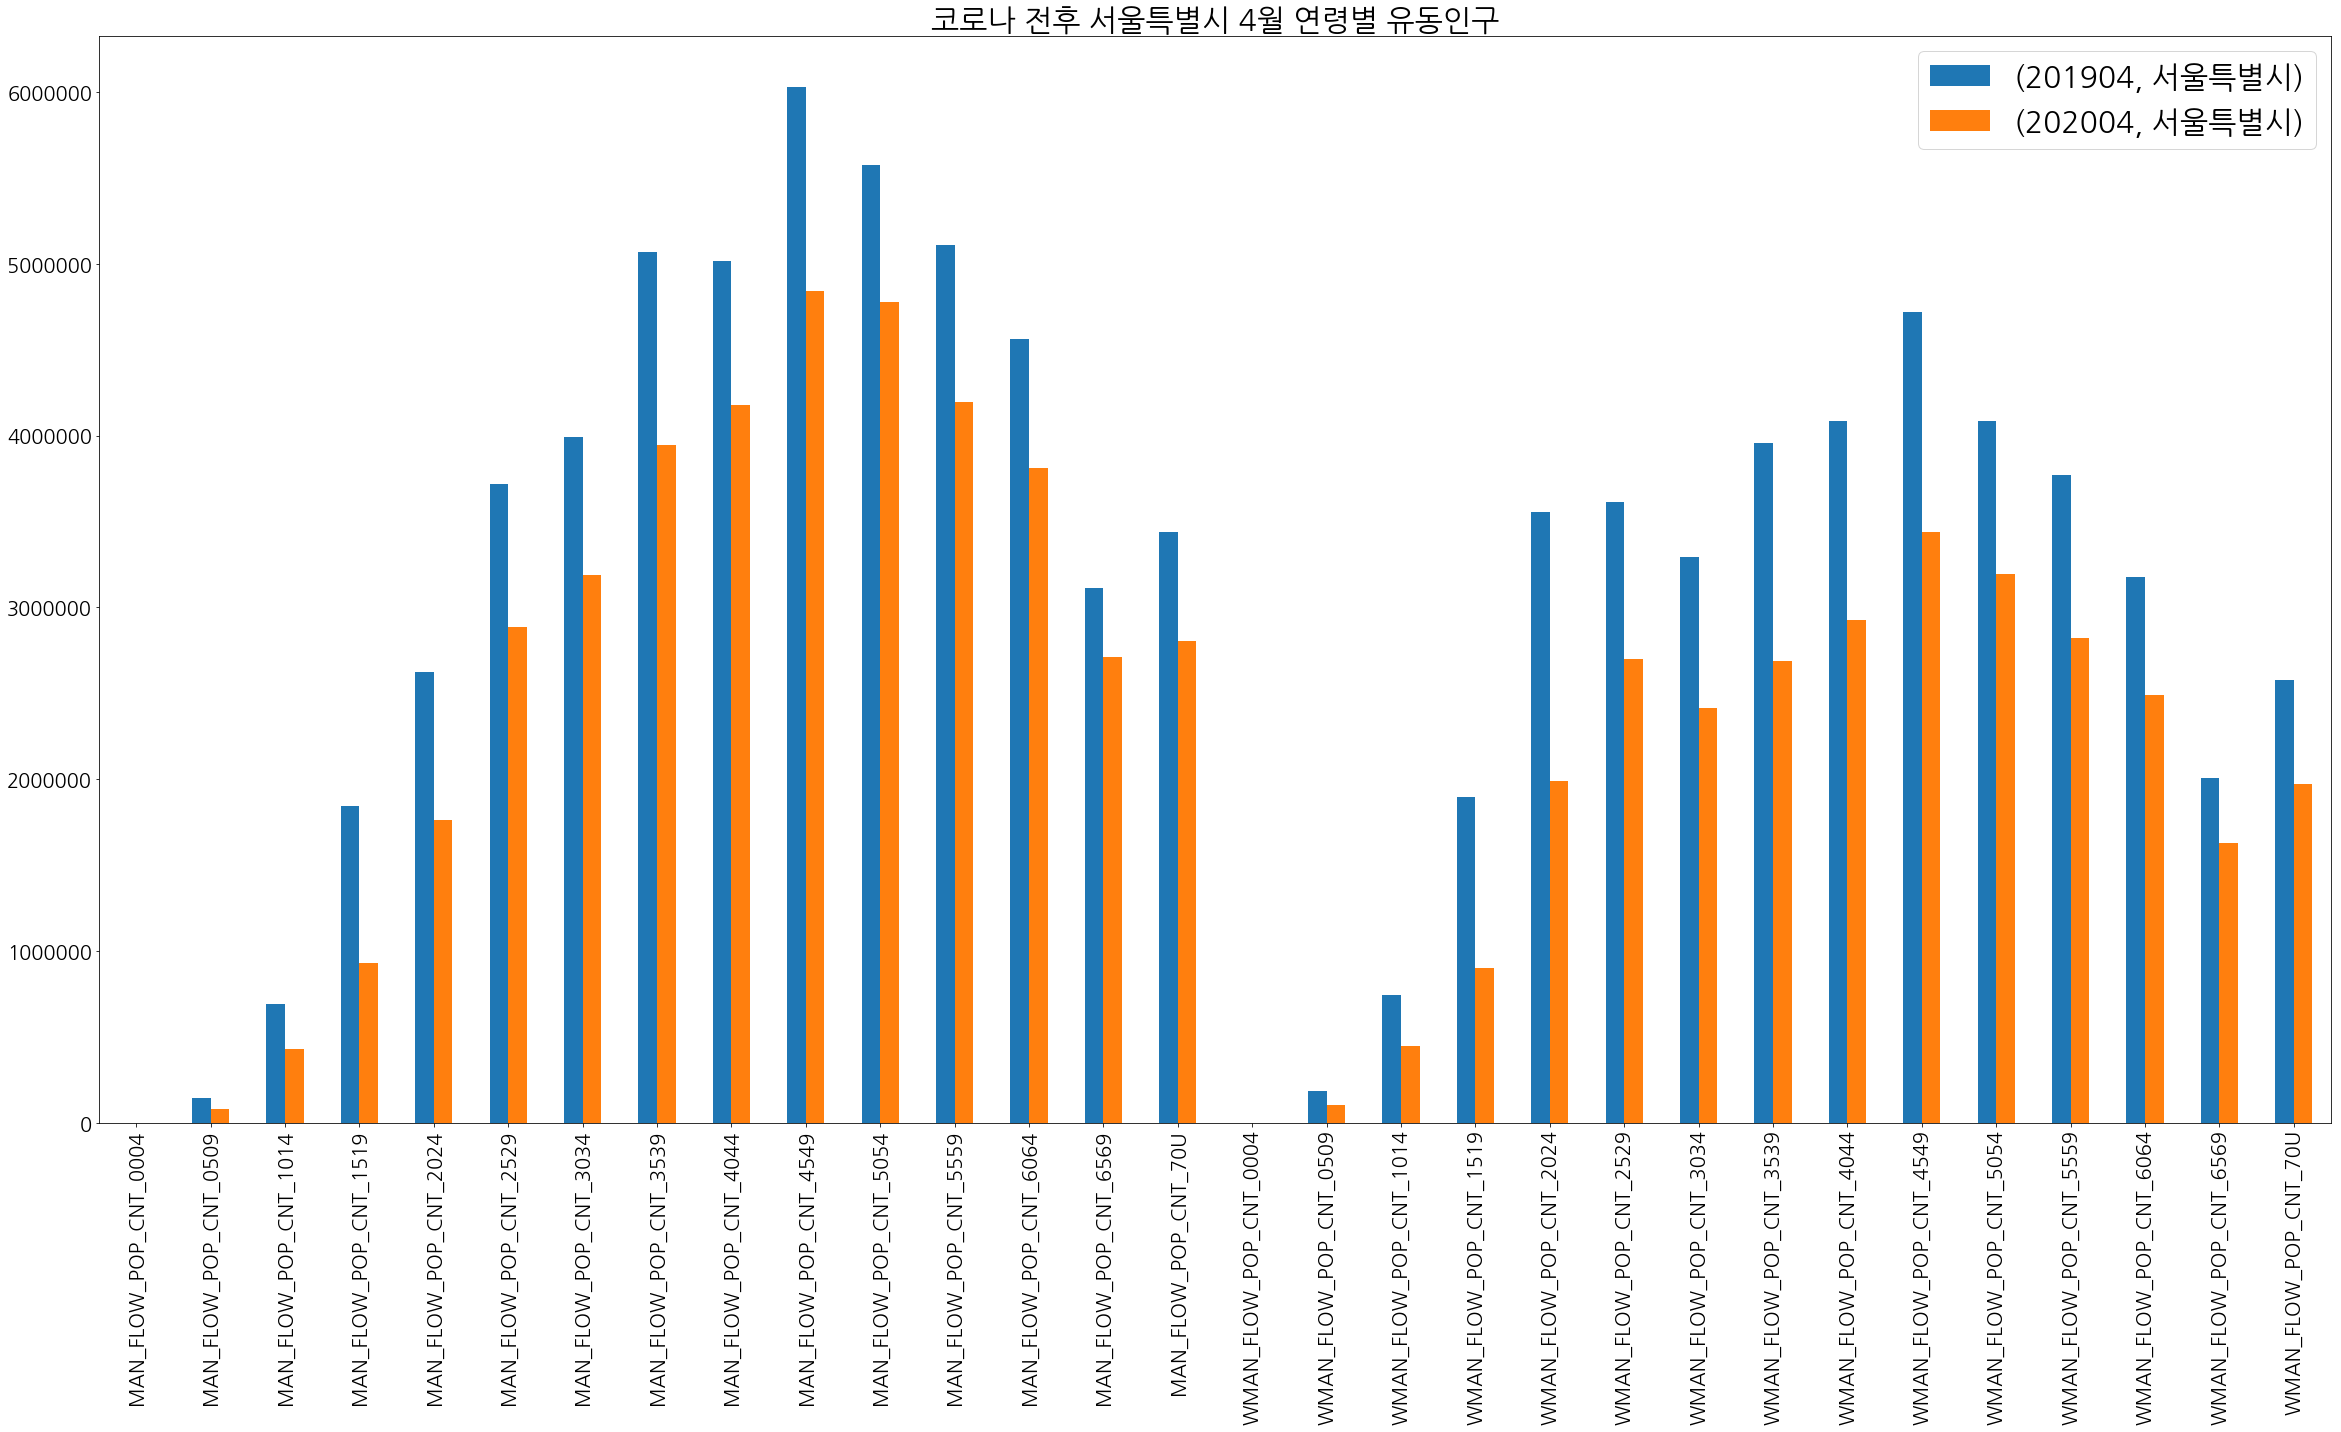

In [153]:
sk_month_move_AGE.T.iloc[:, [5, 13]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 4월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [154]:
start = 5
end = 13

YM = '4월 서울특별시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

4월 서울특별시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
4월 서울특별시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


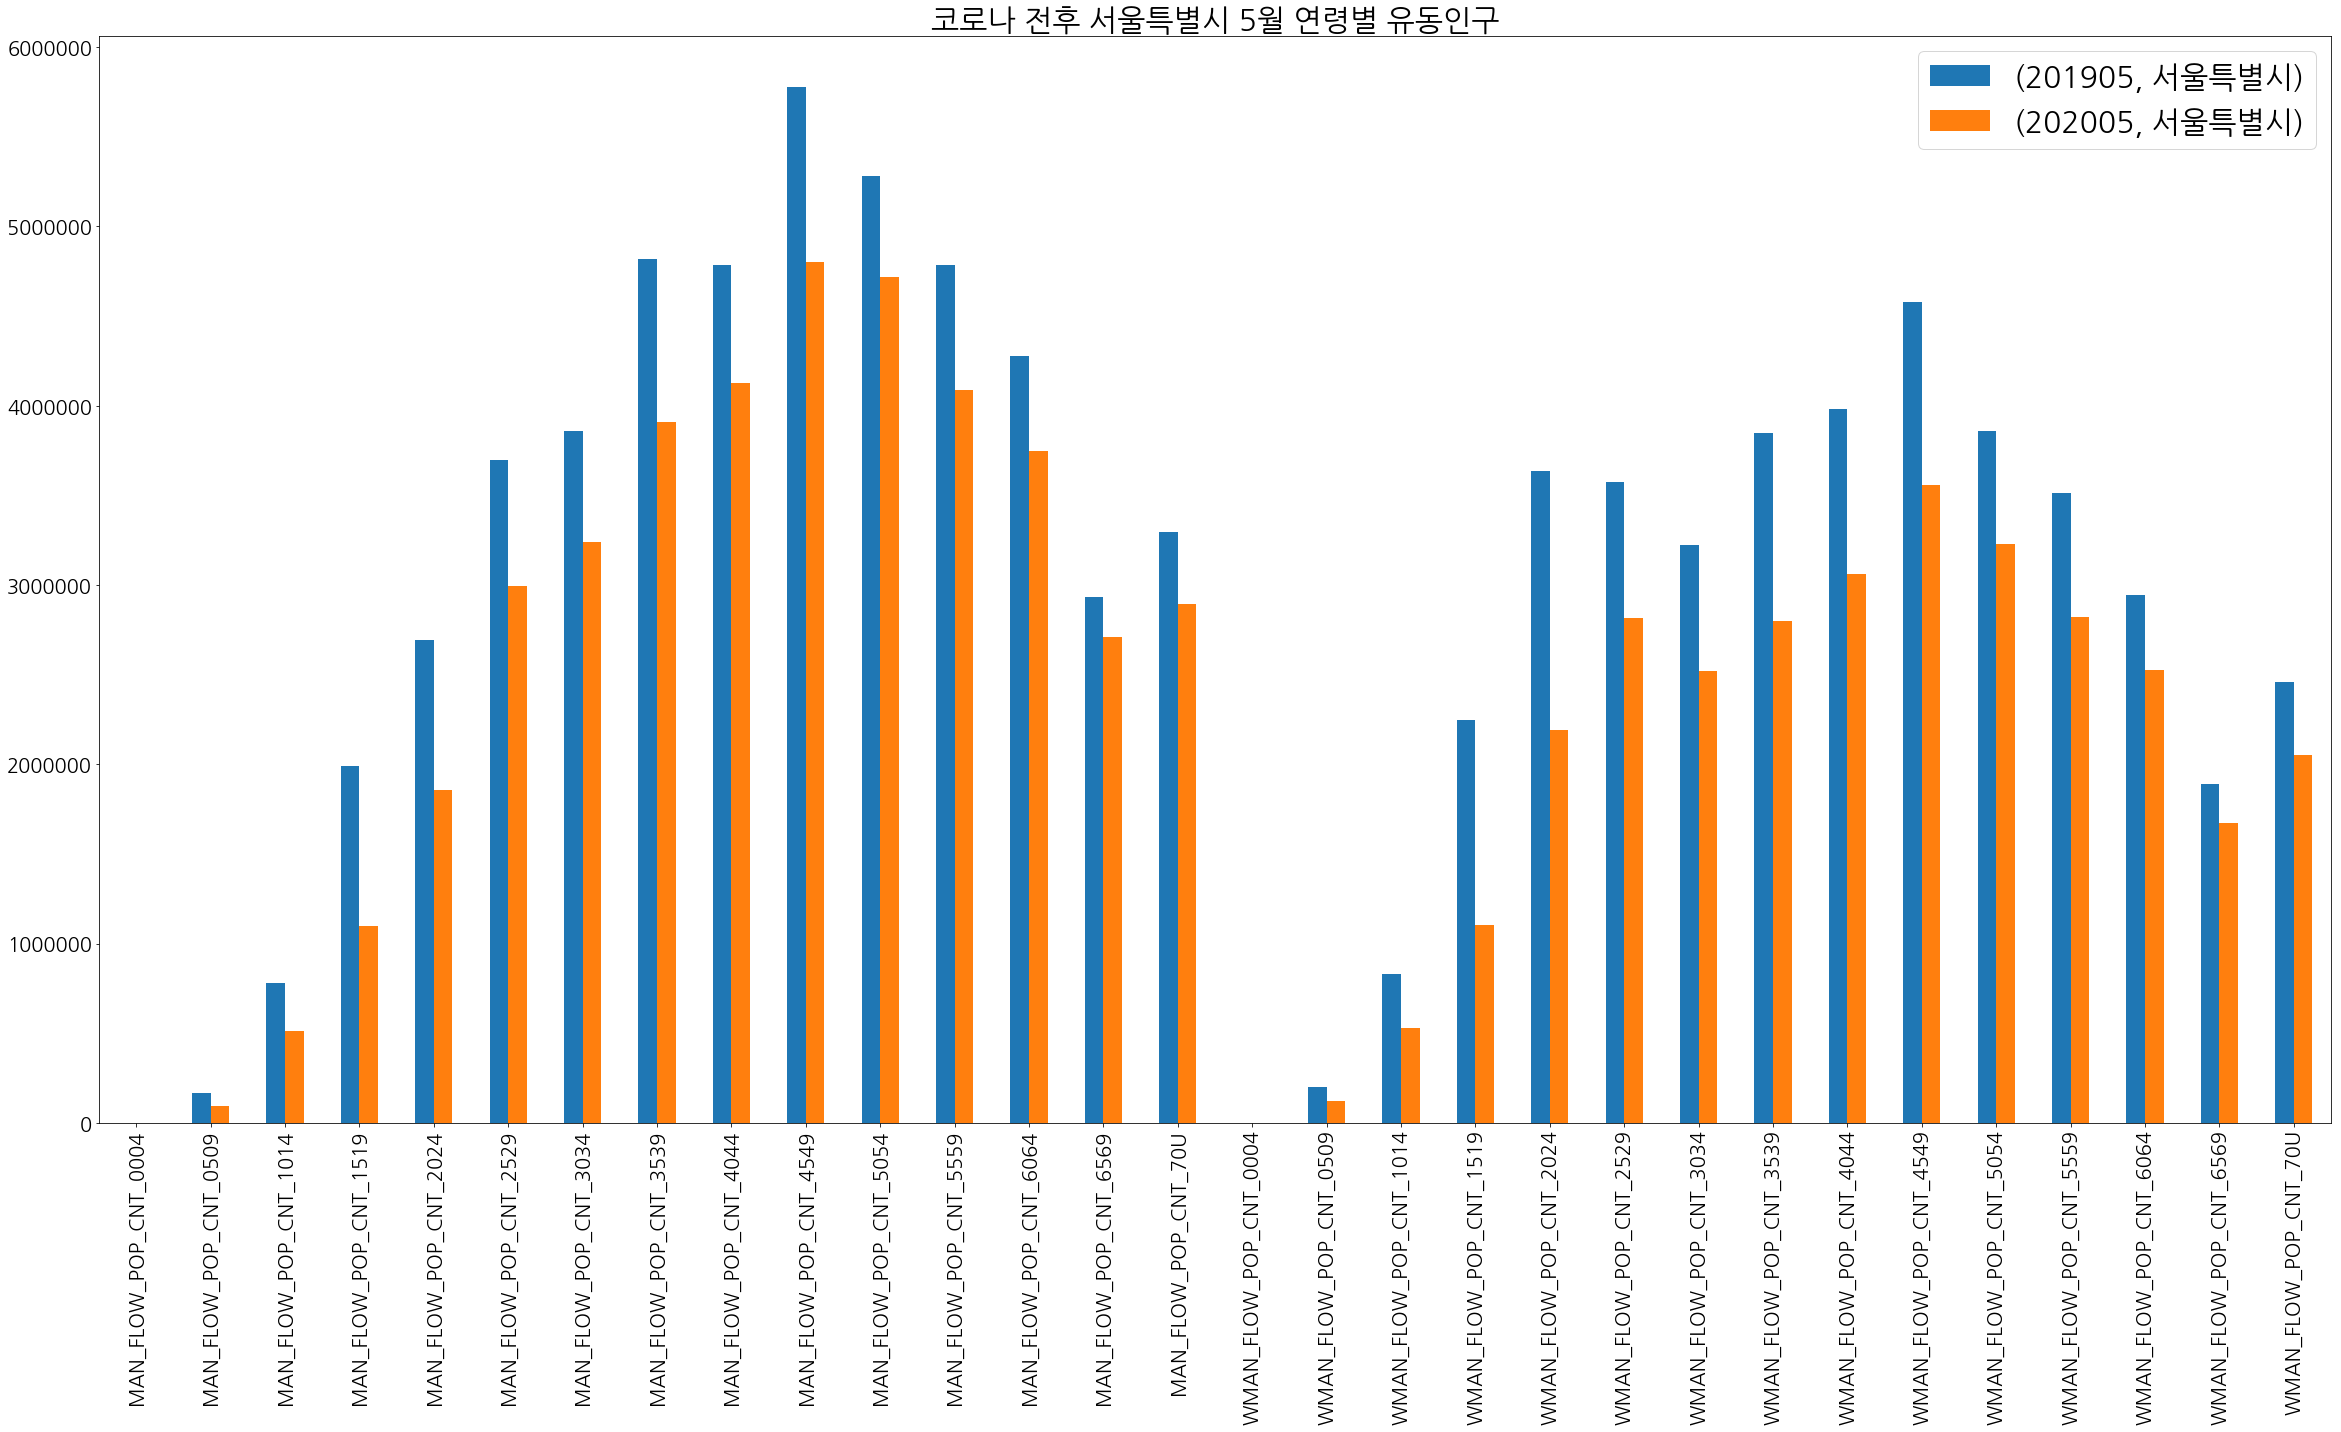

In [155]:
sk_month_move_AGE.T.iloc[:, [7, 15]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 5월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [156]:
start = 7
end = 15

YM = '5월 서울특별시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

5월 서울특별시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
5월 서울특별시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


In [159]:
sk_data_TIME.GU_NAME.value_counts()

대구광역시수성구    5543
서울특별시노원구    4579
서울특별시중구     3615
대구광역시중구     2892
Name: GU_NAME, dtype: int64

# 3. 동별 EDA

### 3.1 노원구

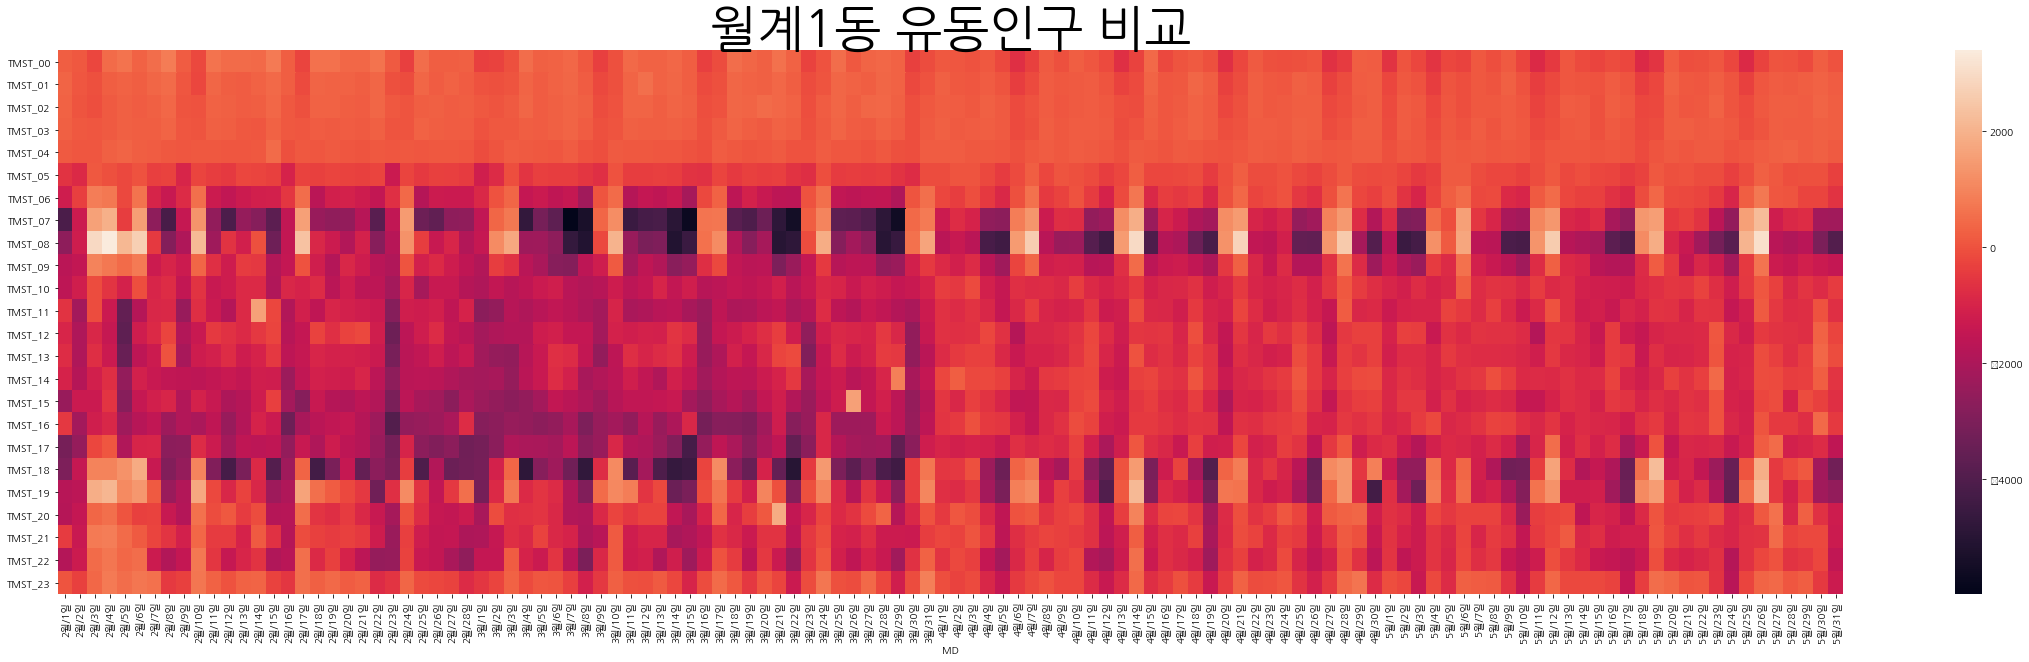

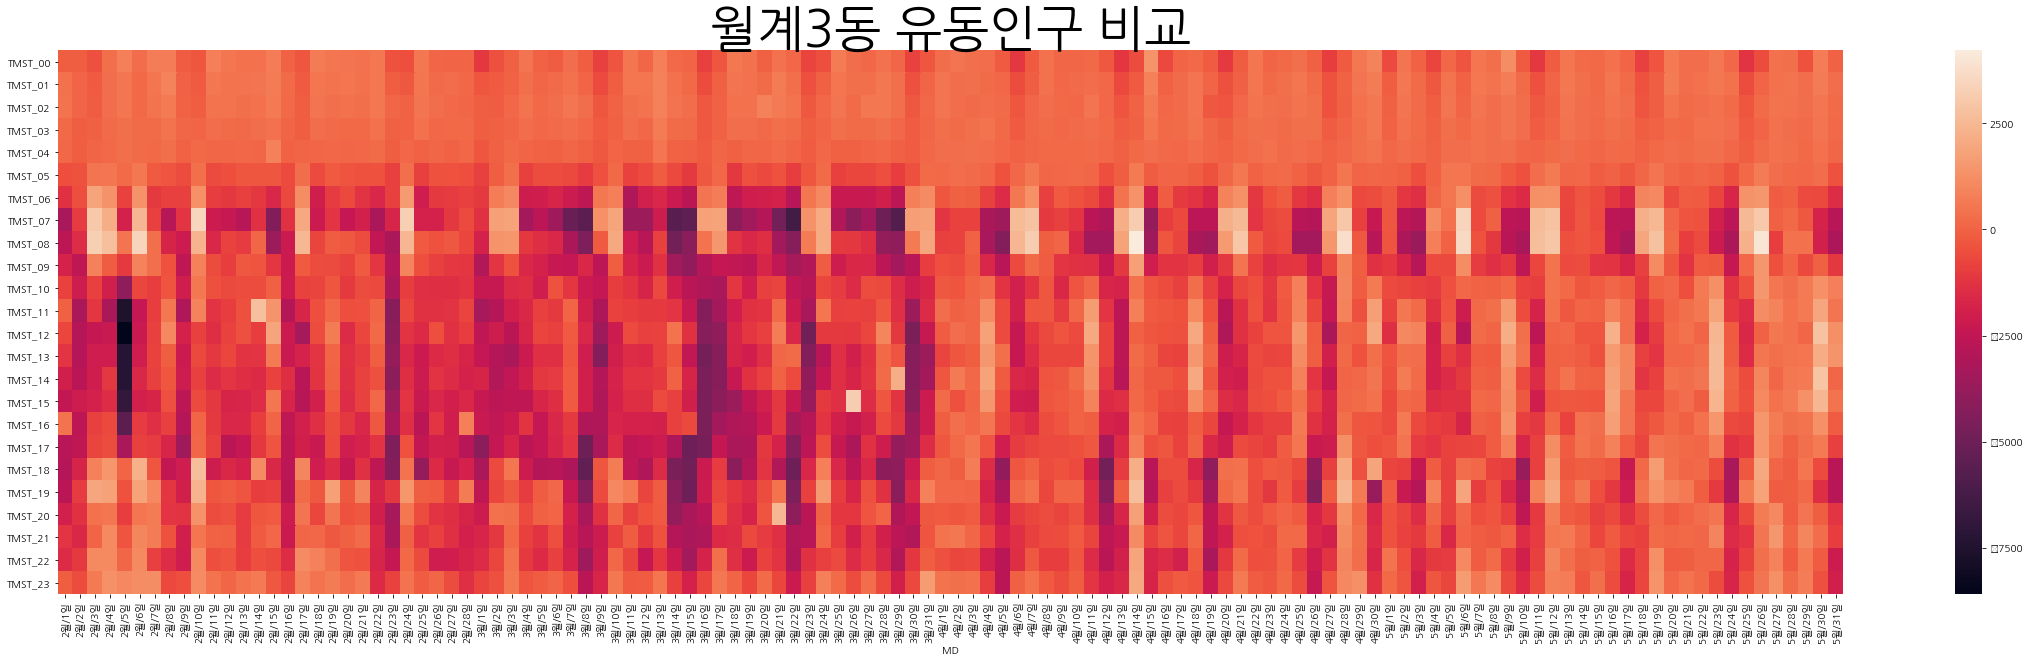

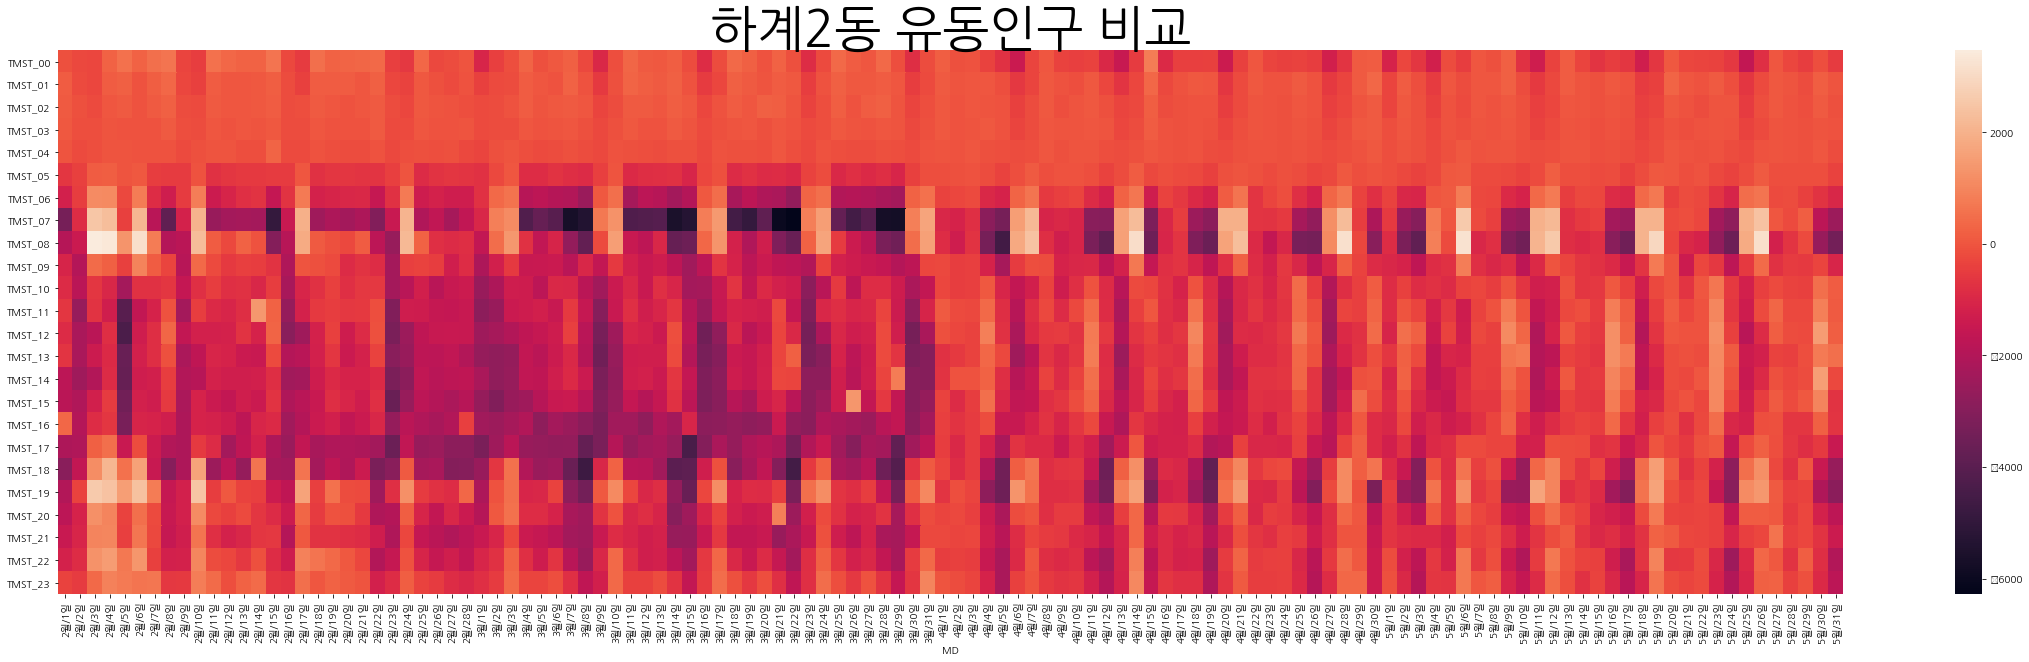

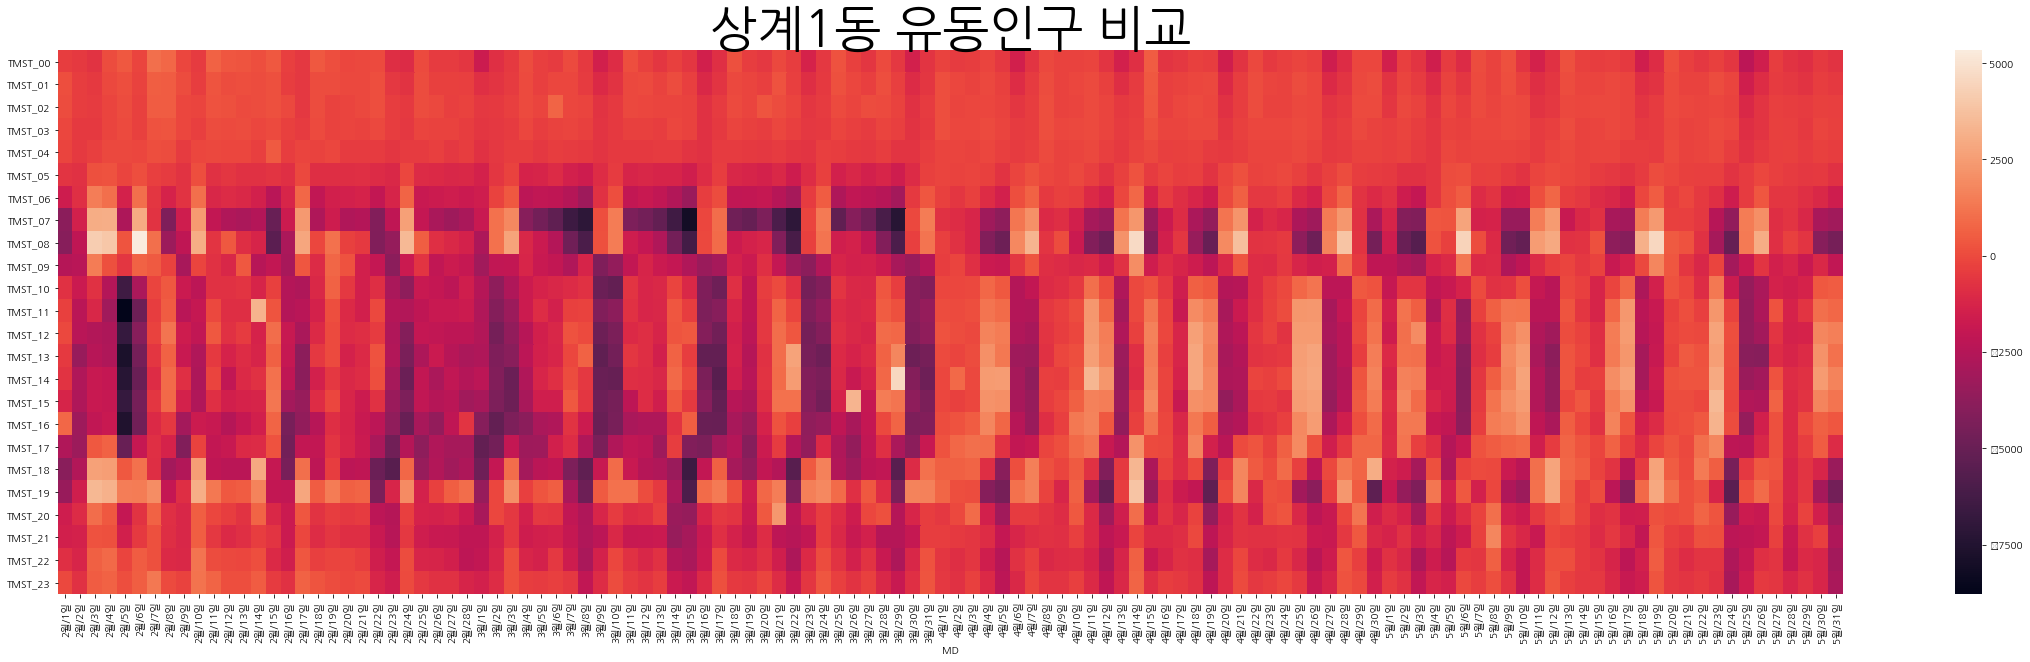

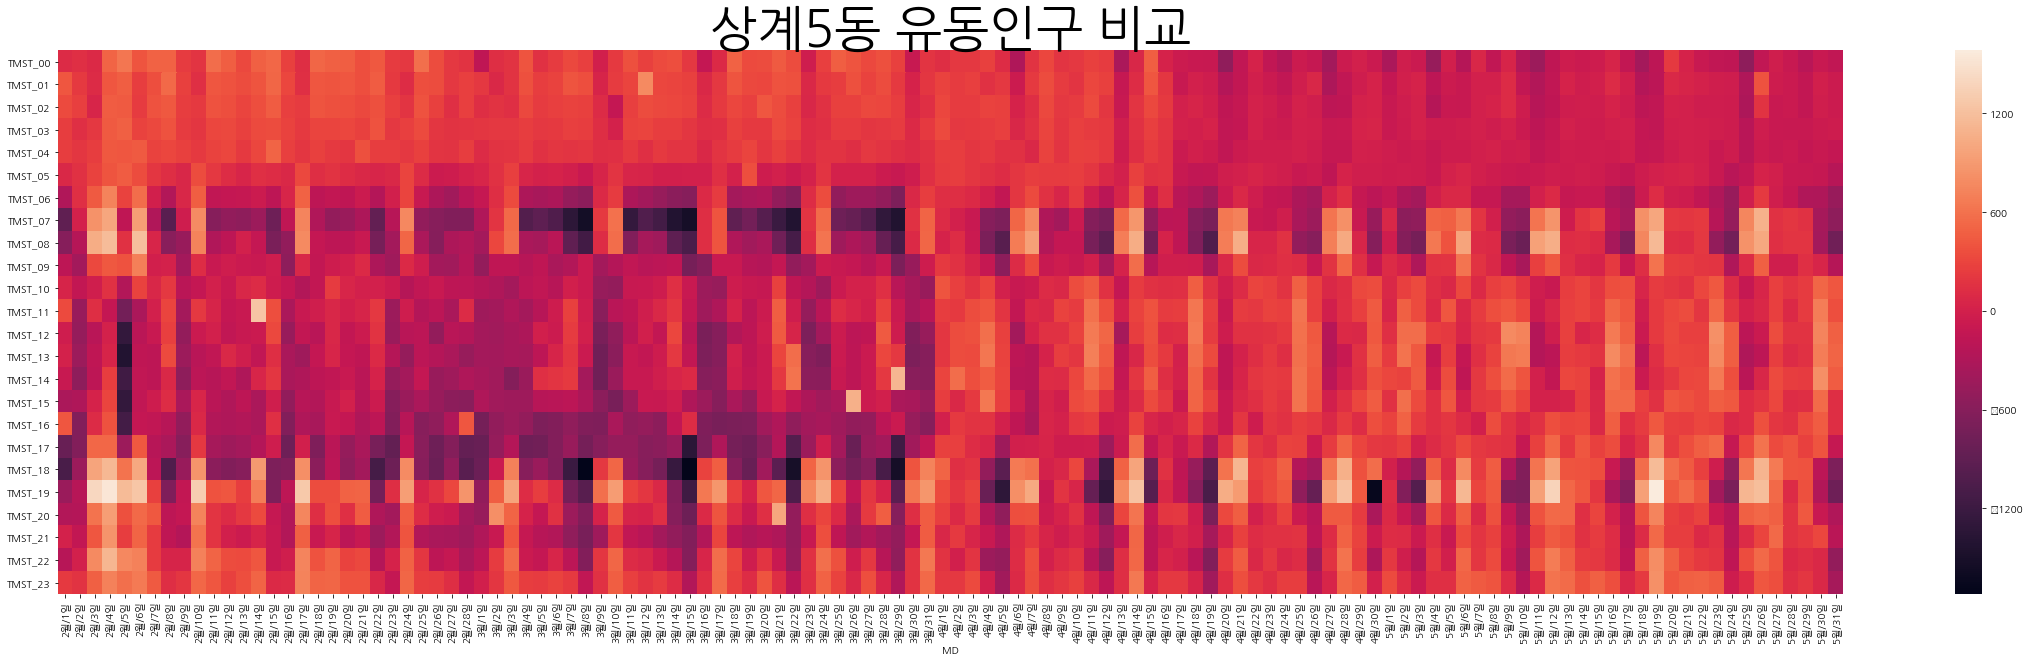

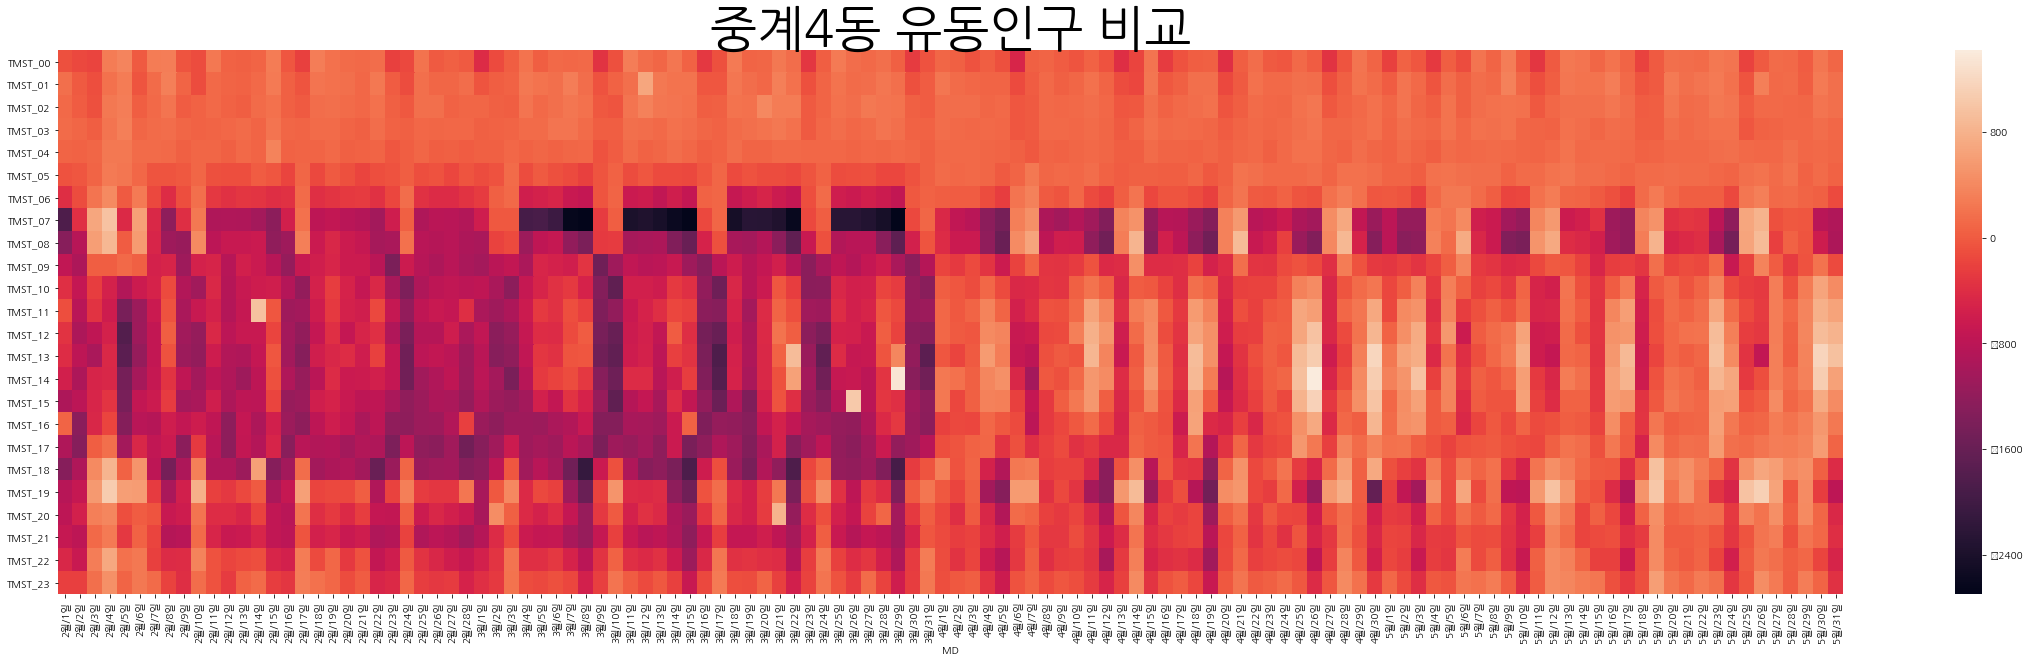

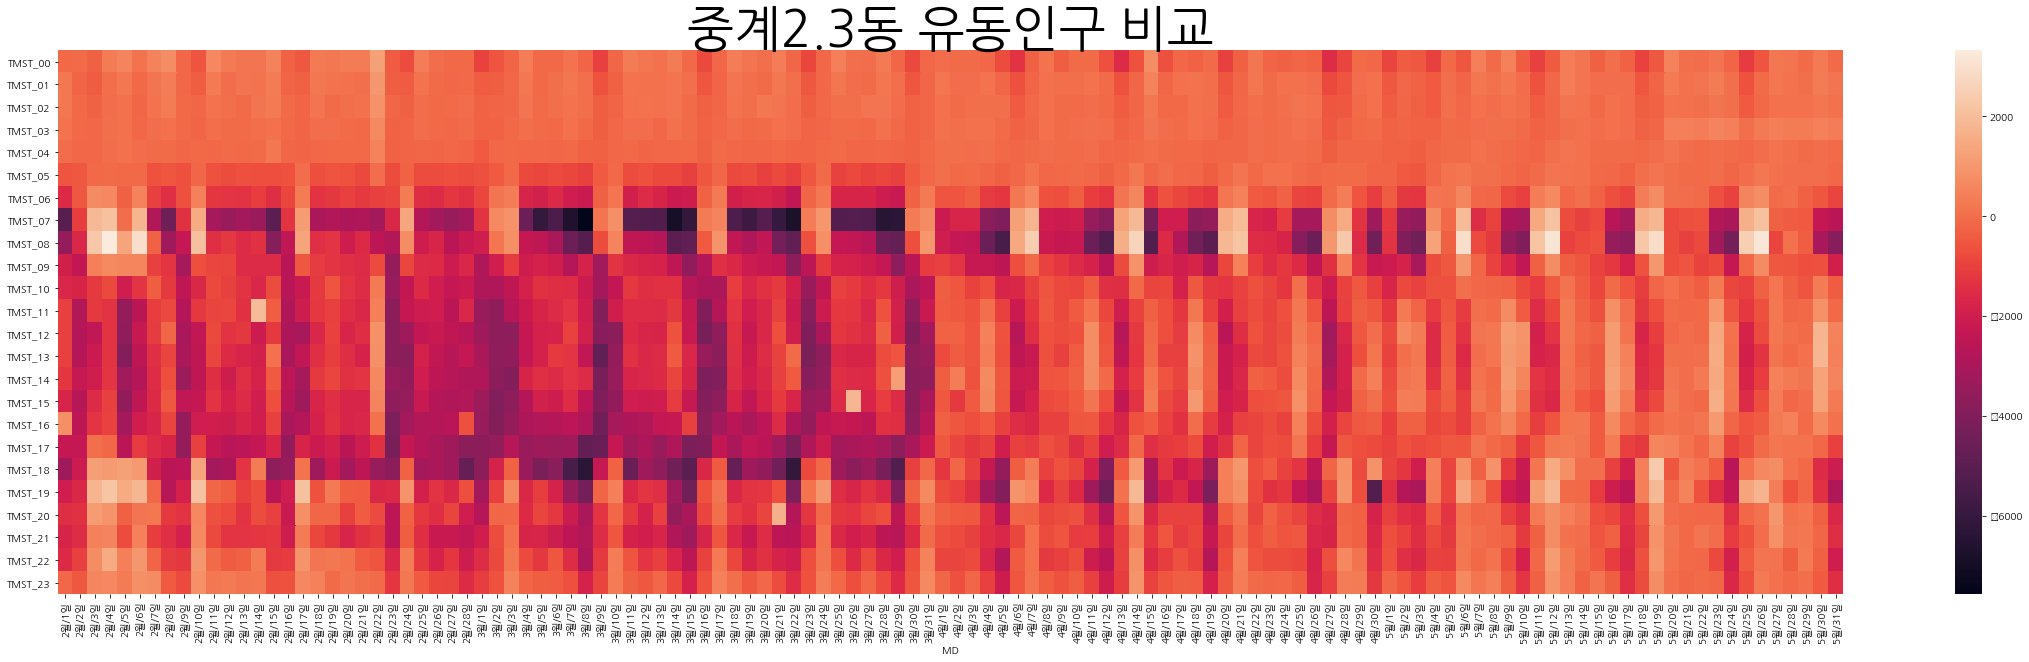

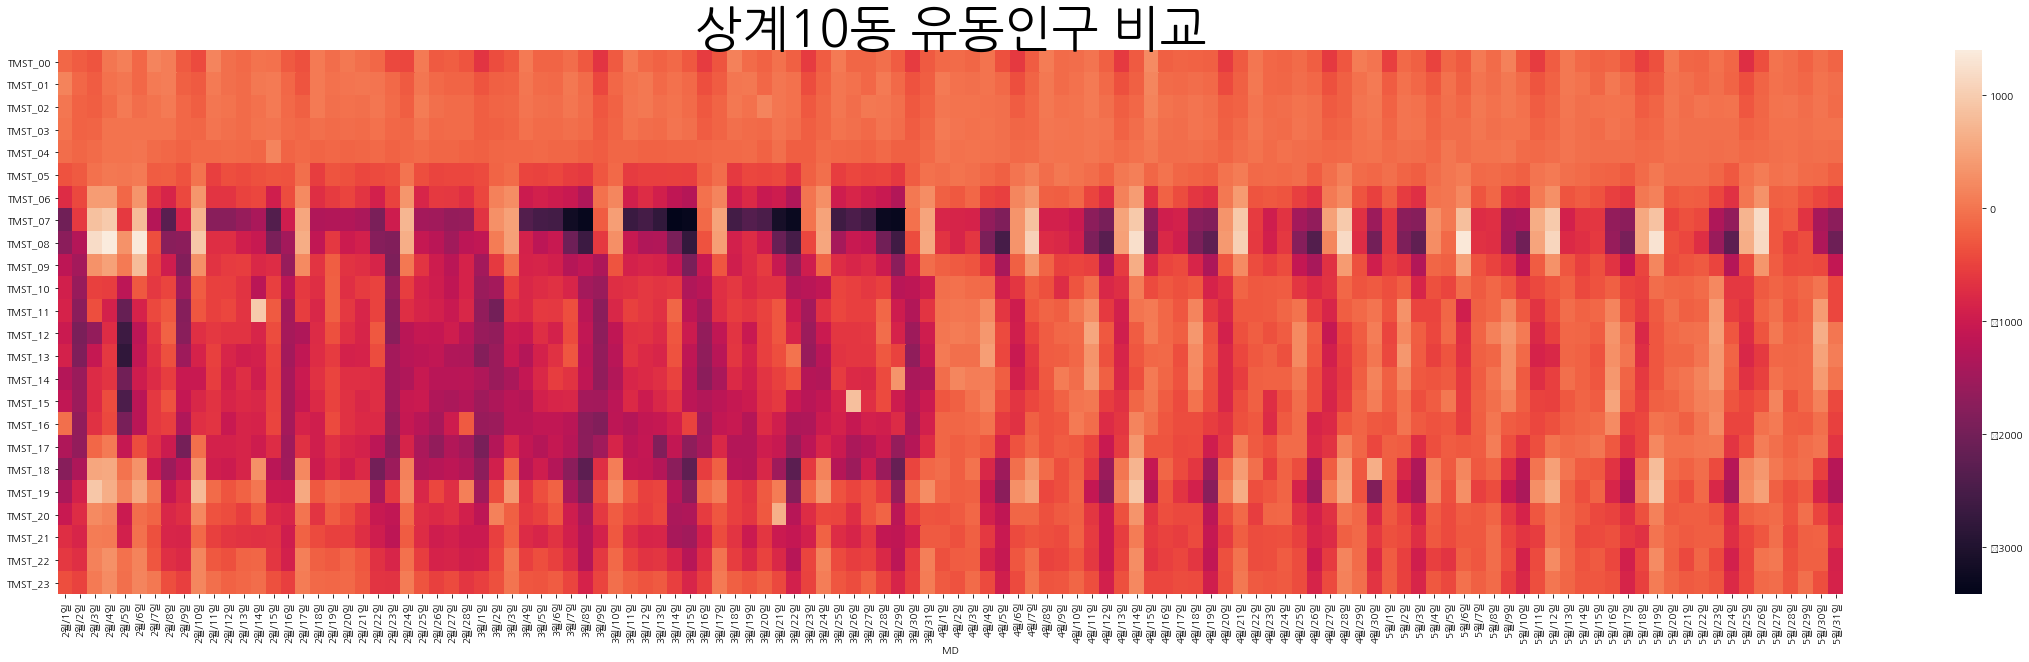

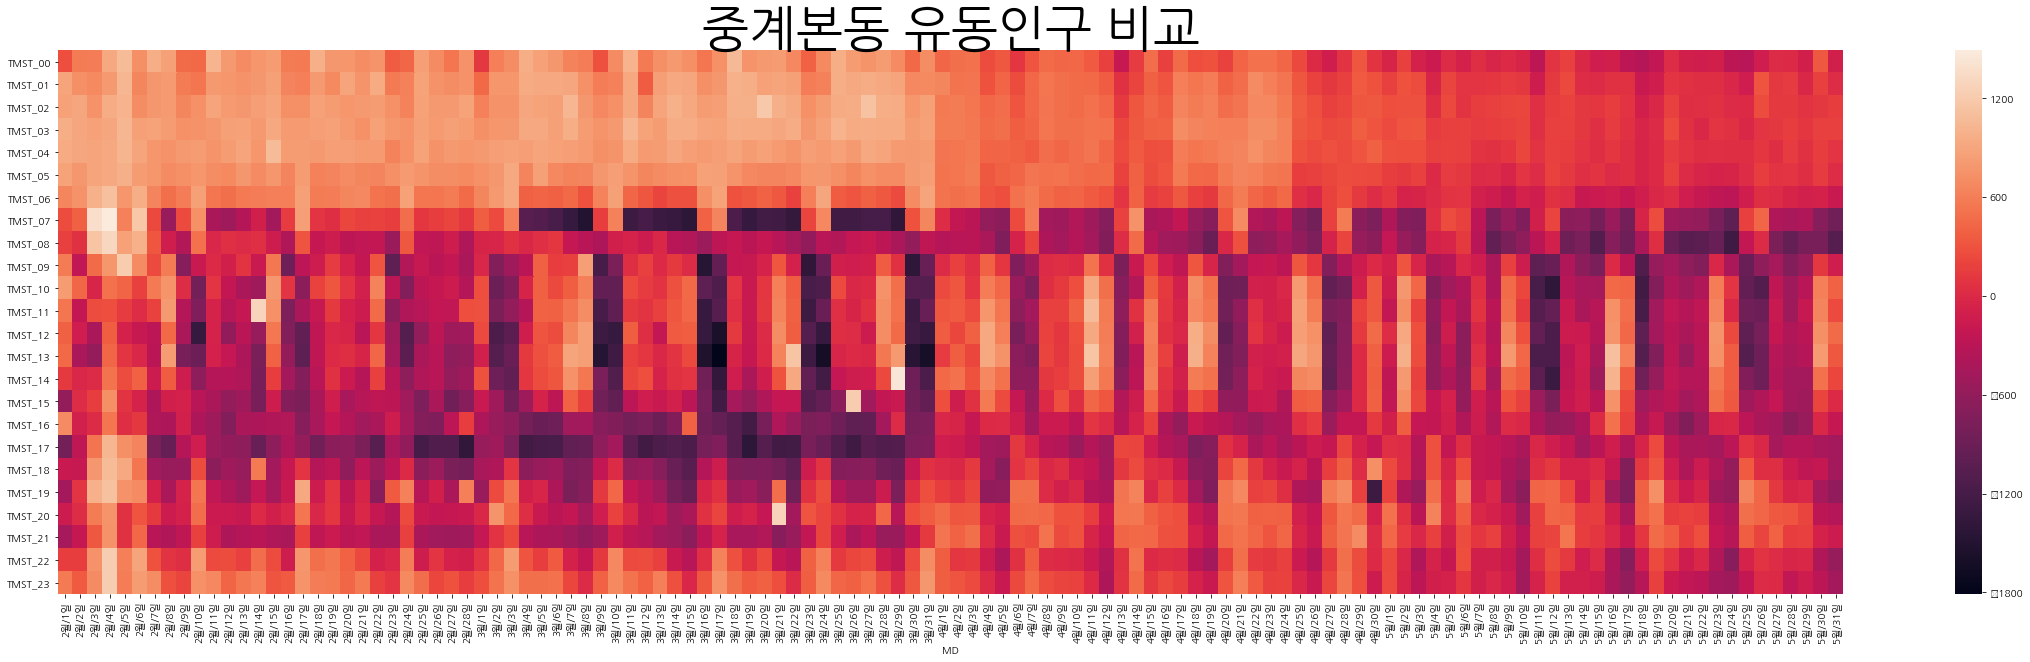

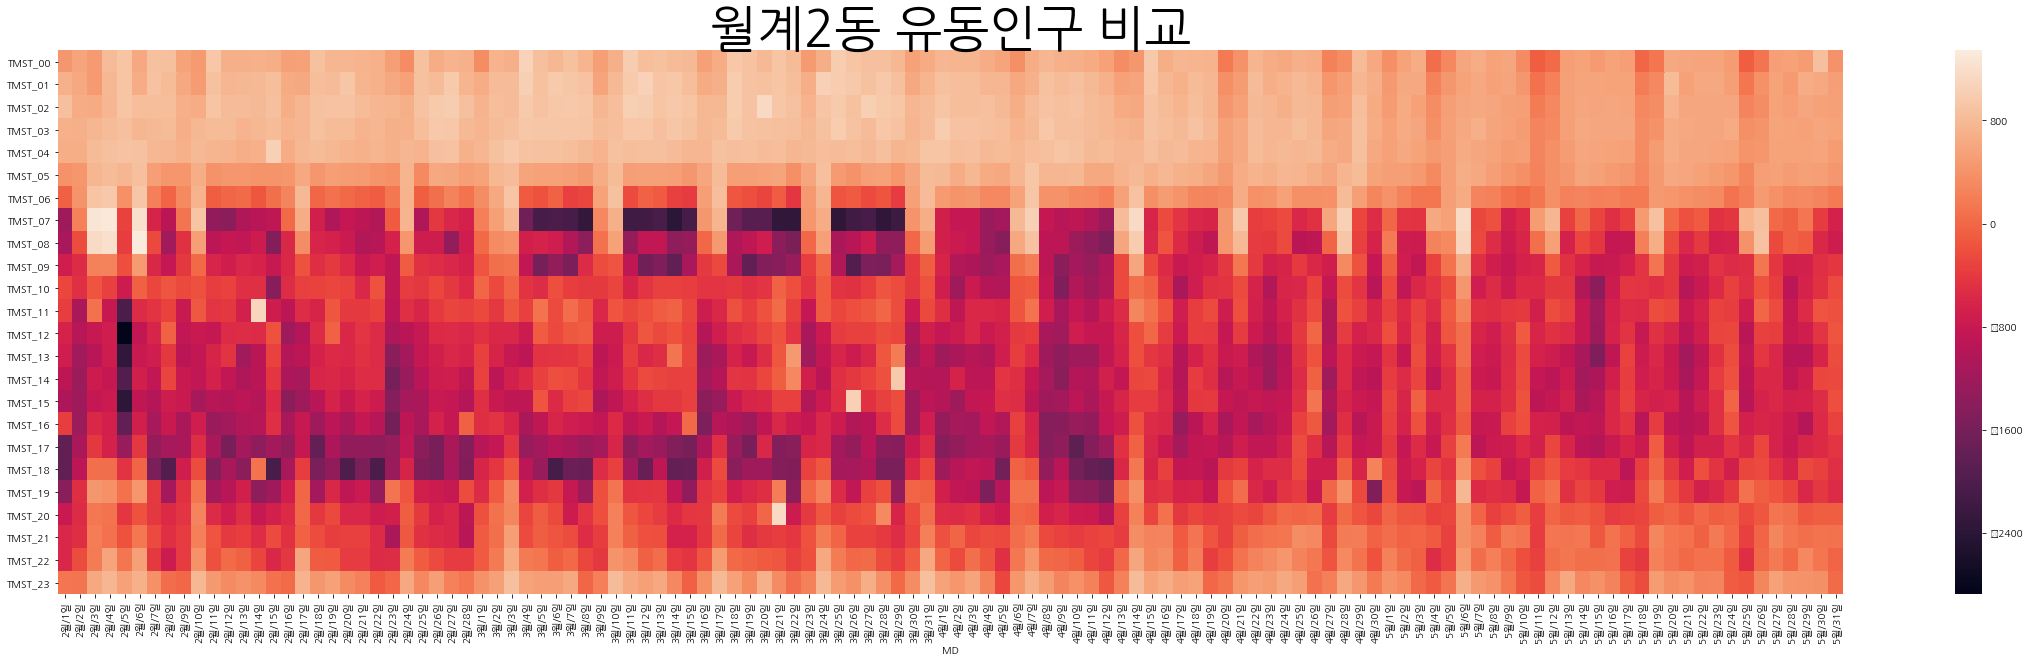

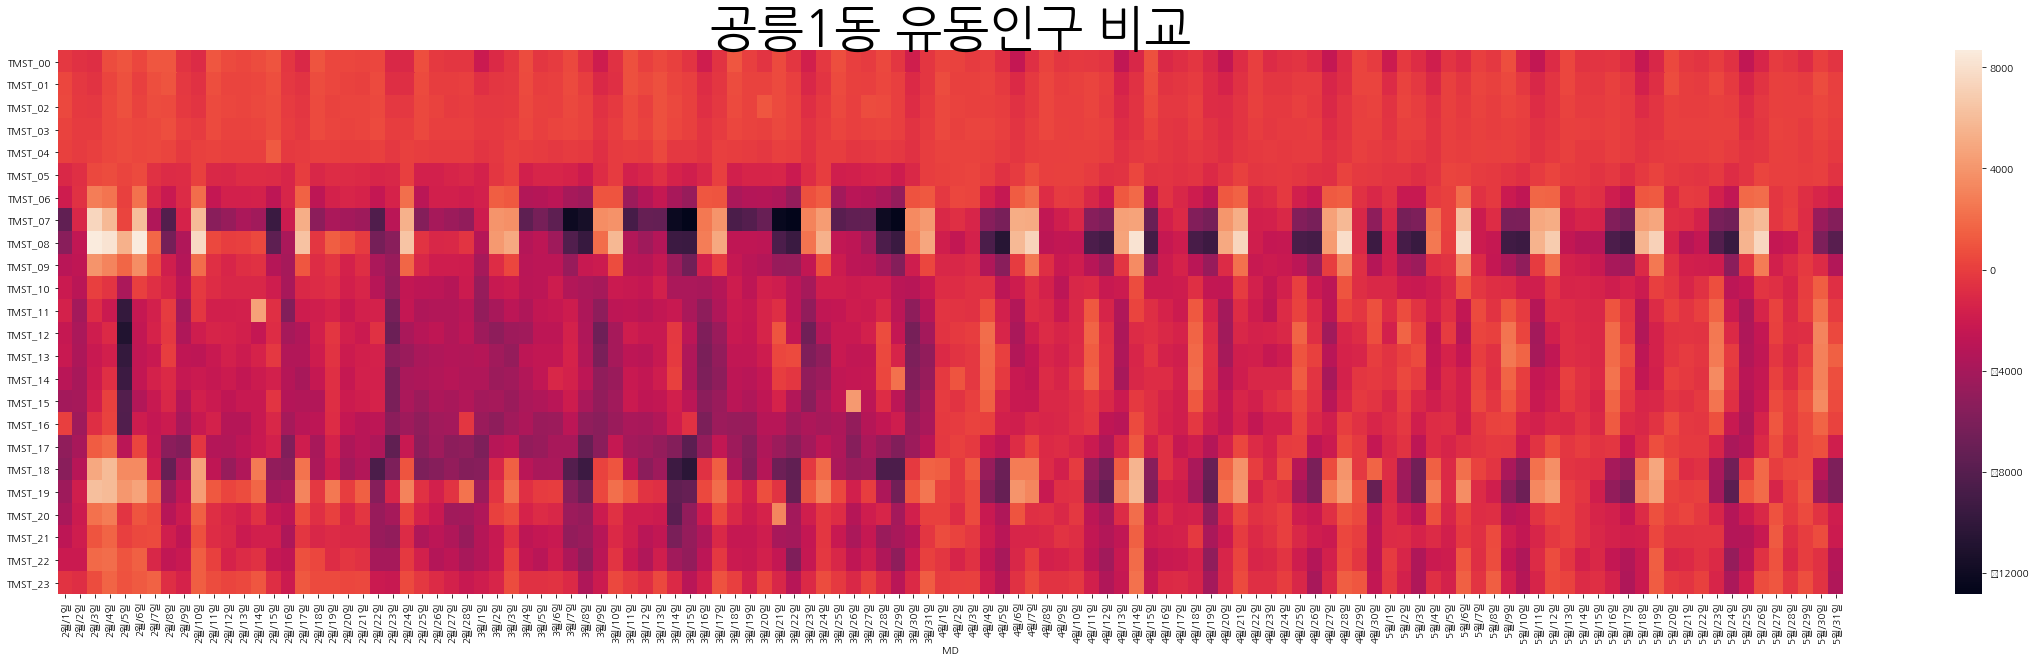

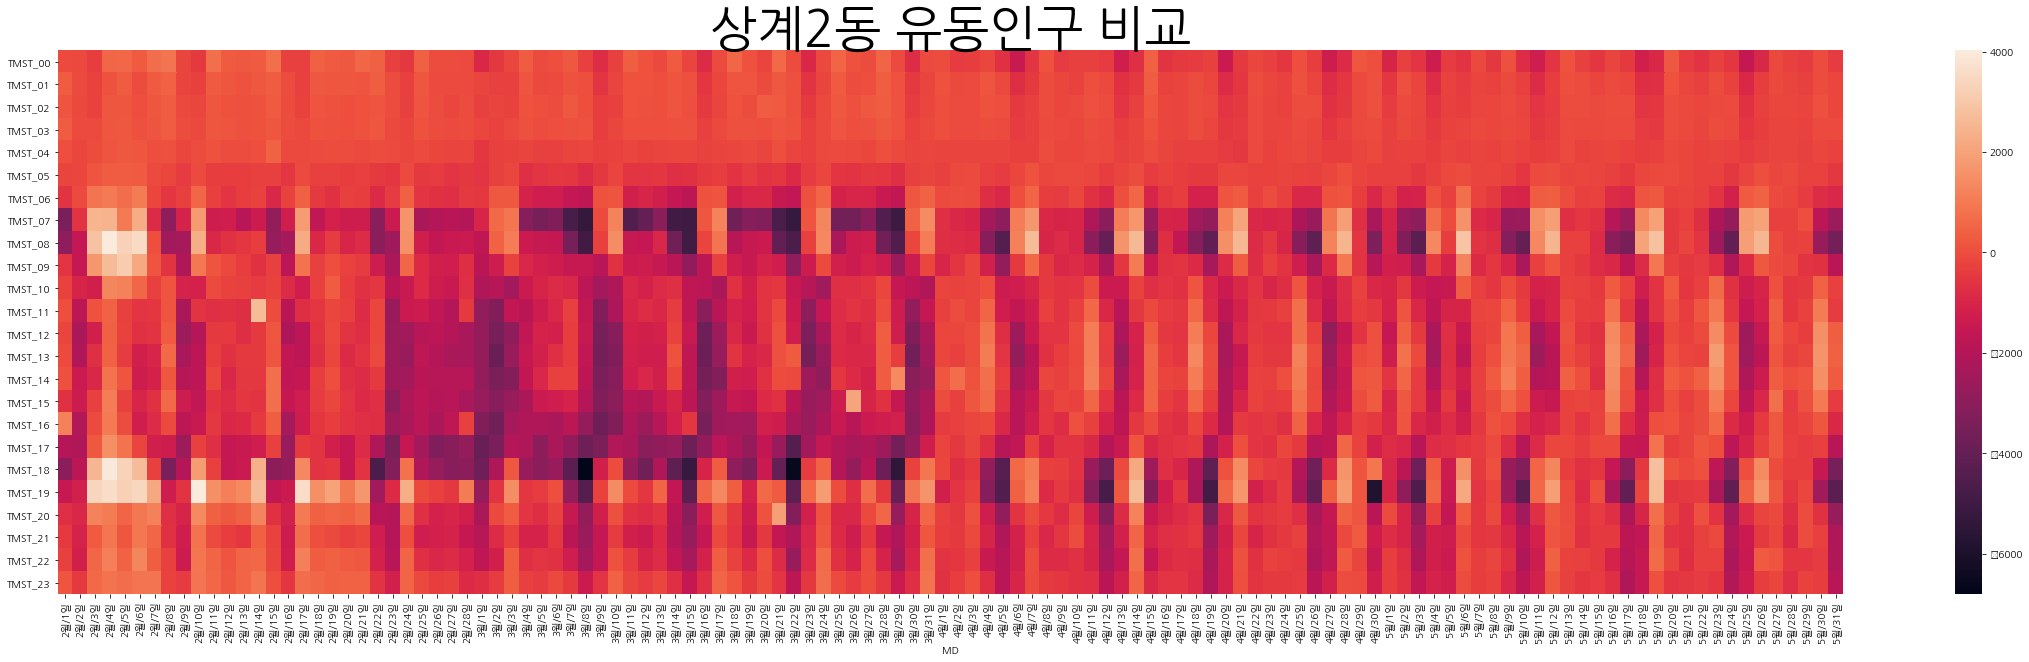

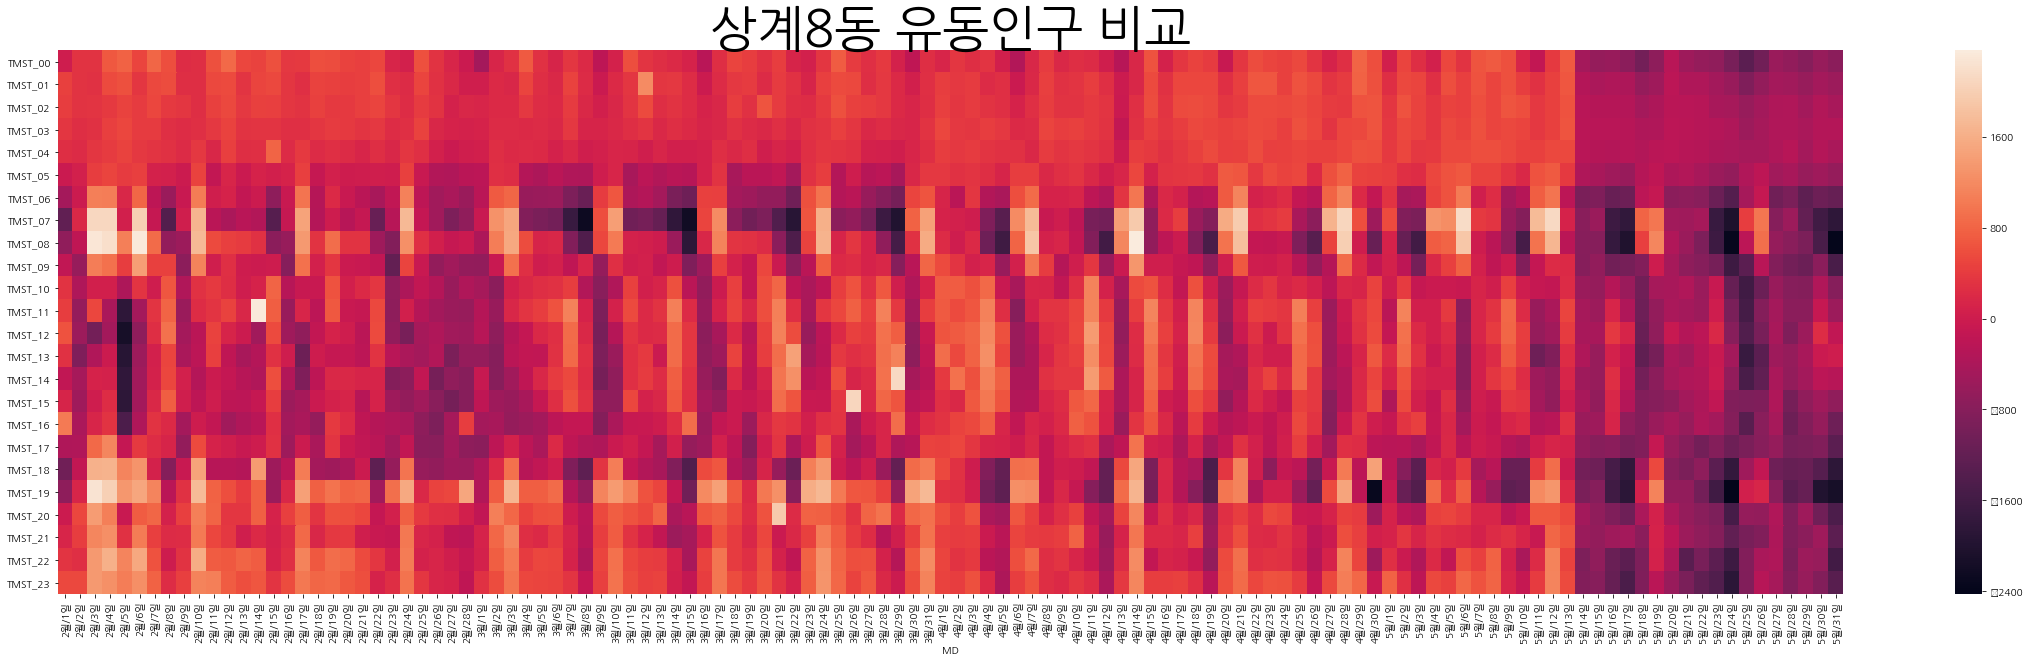

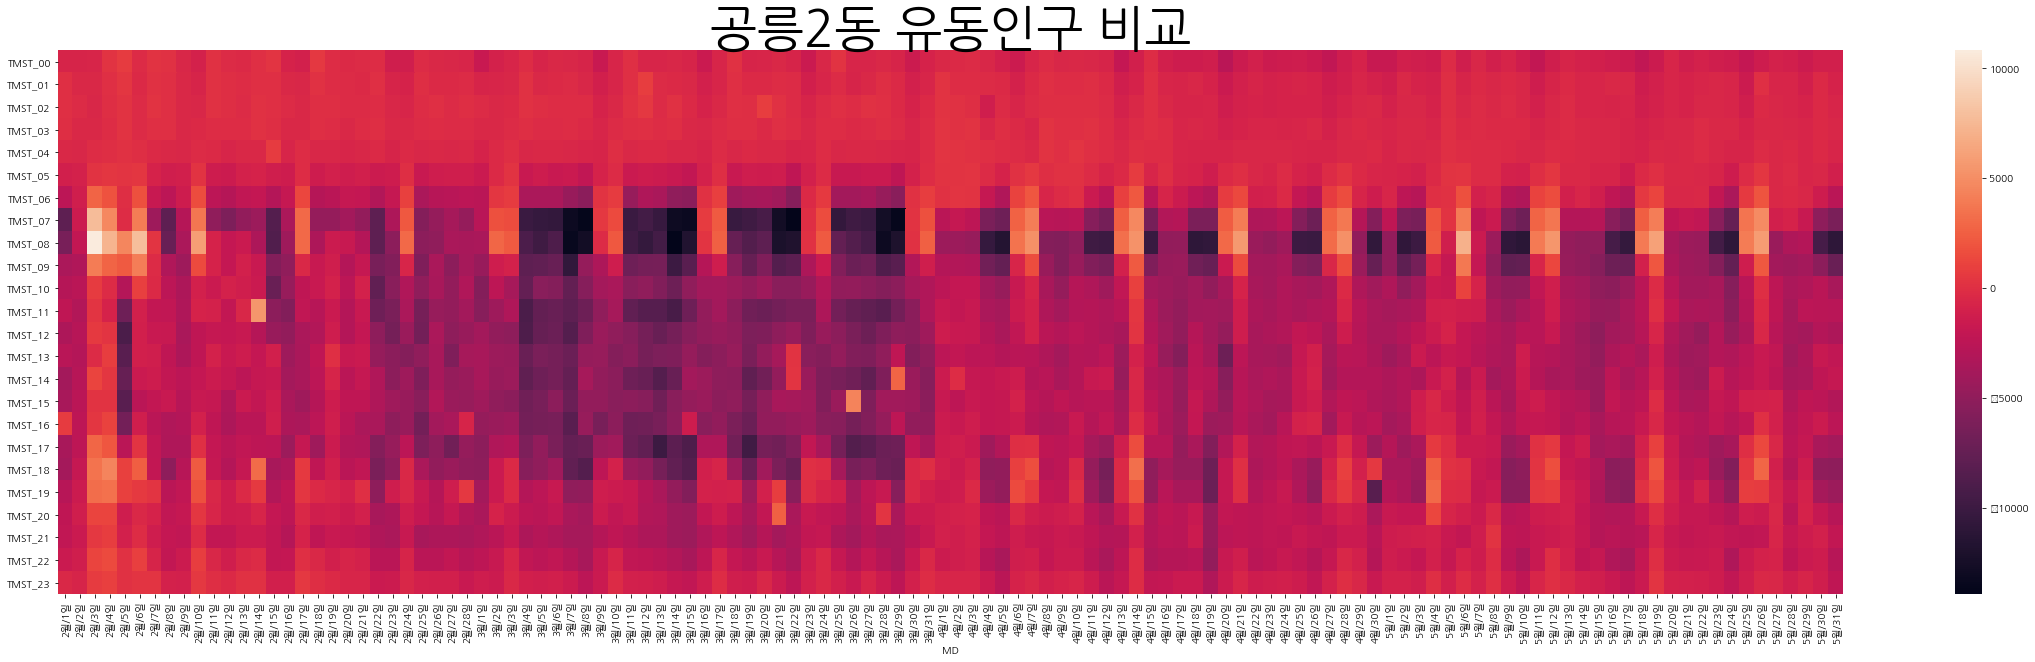

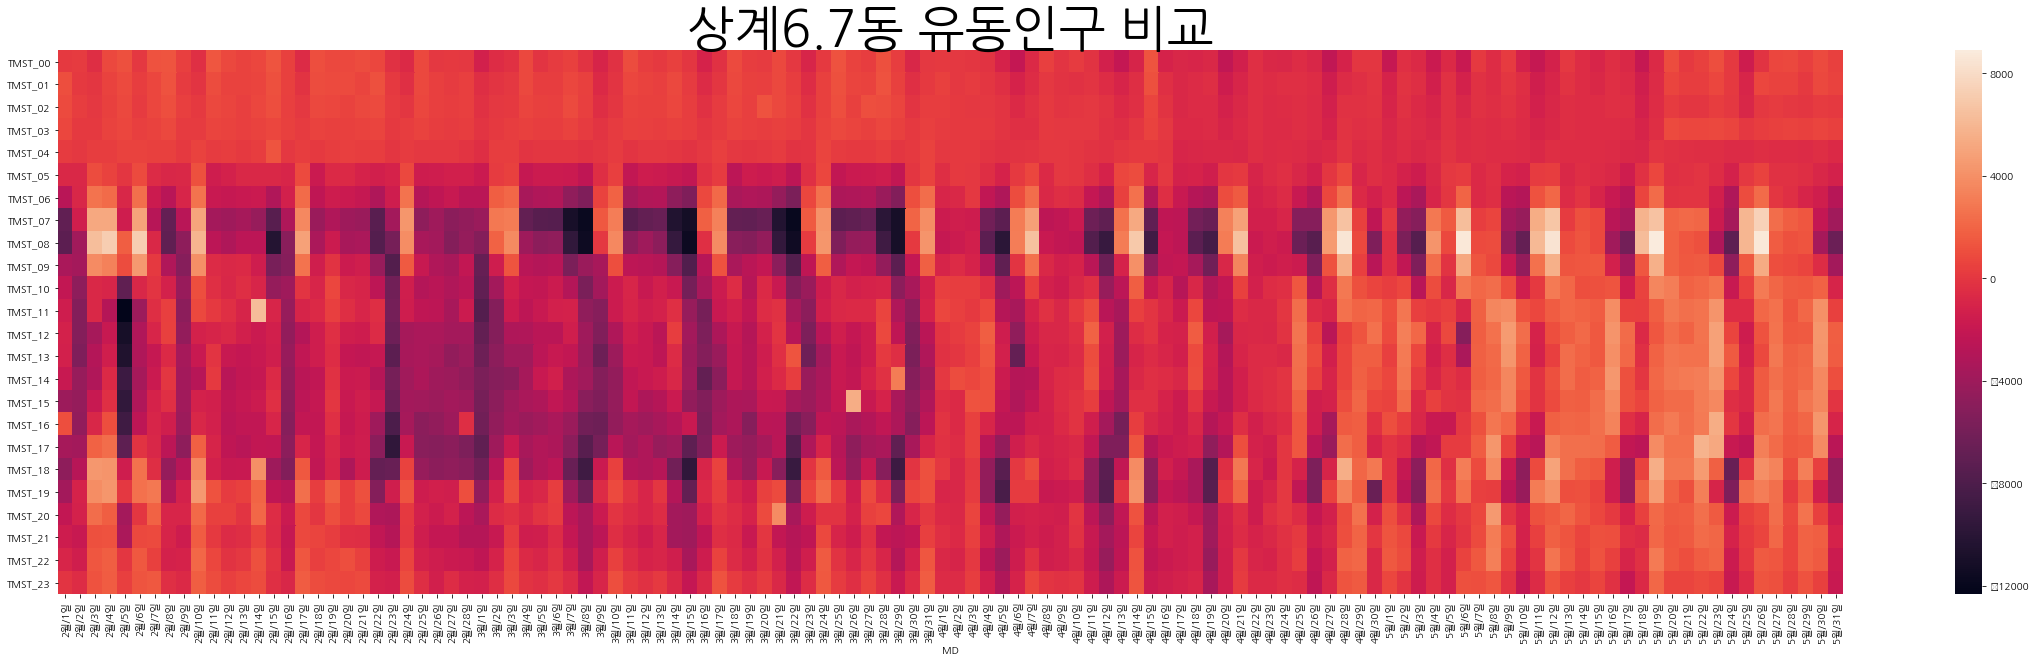

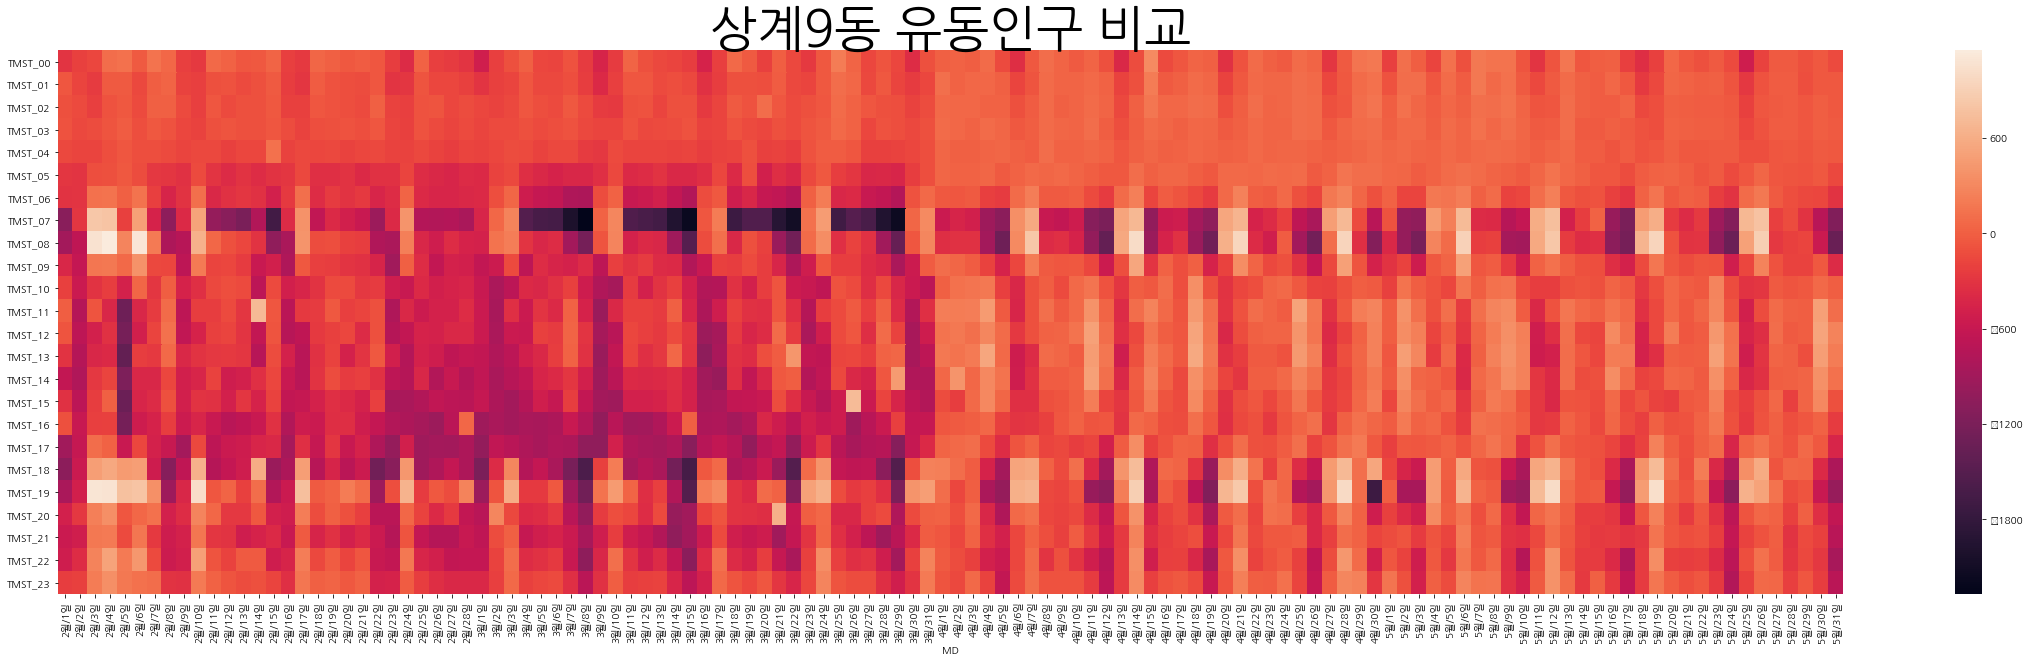

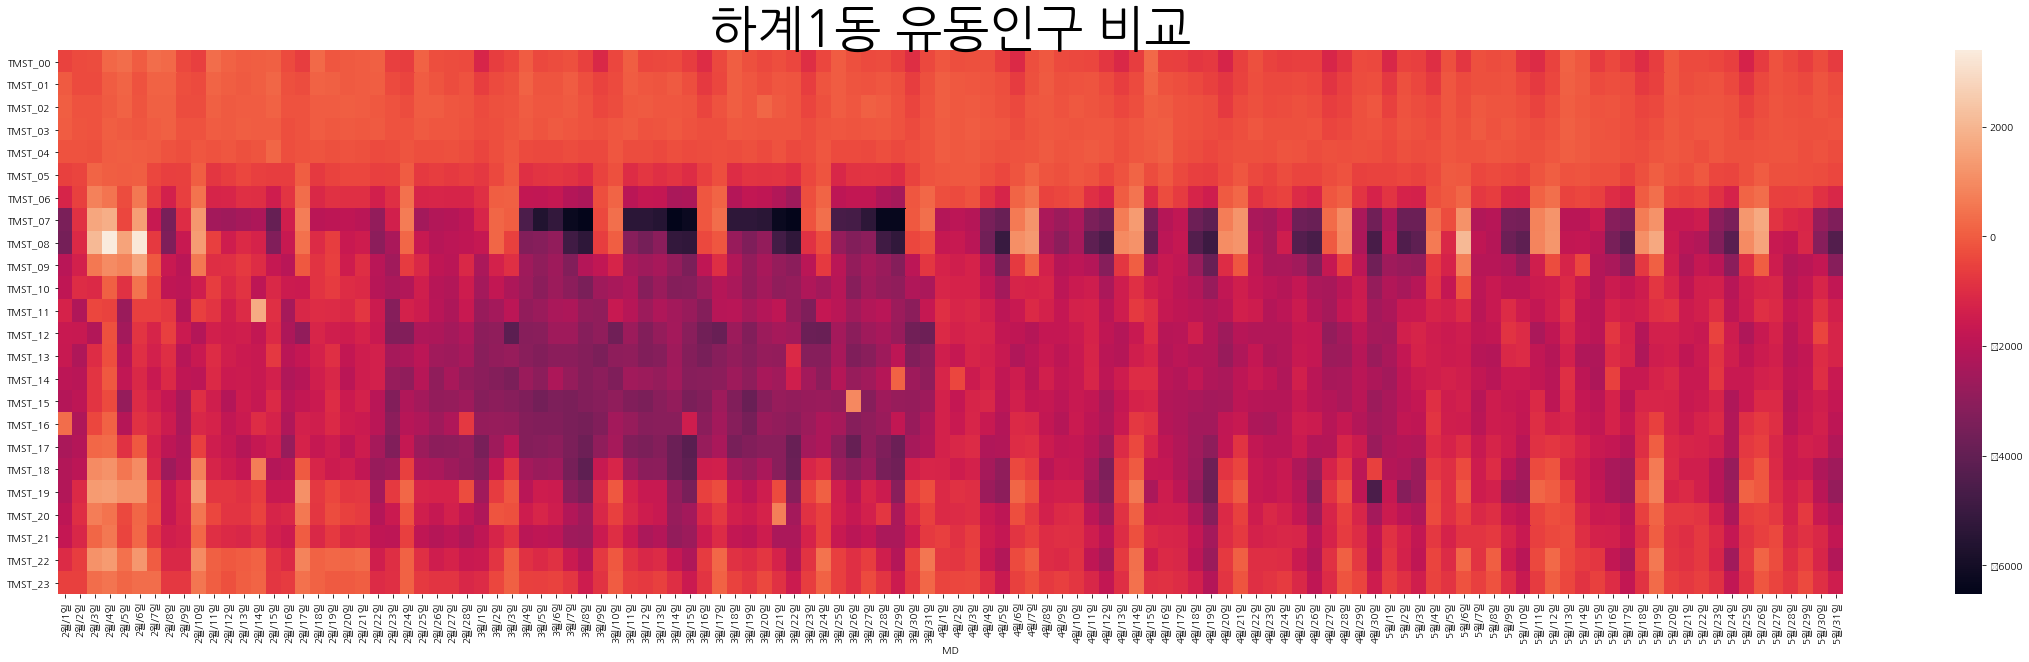

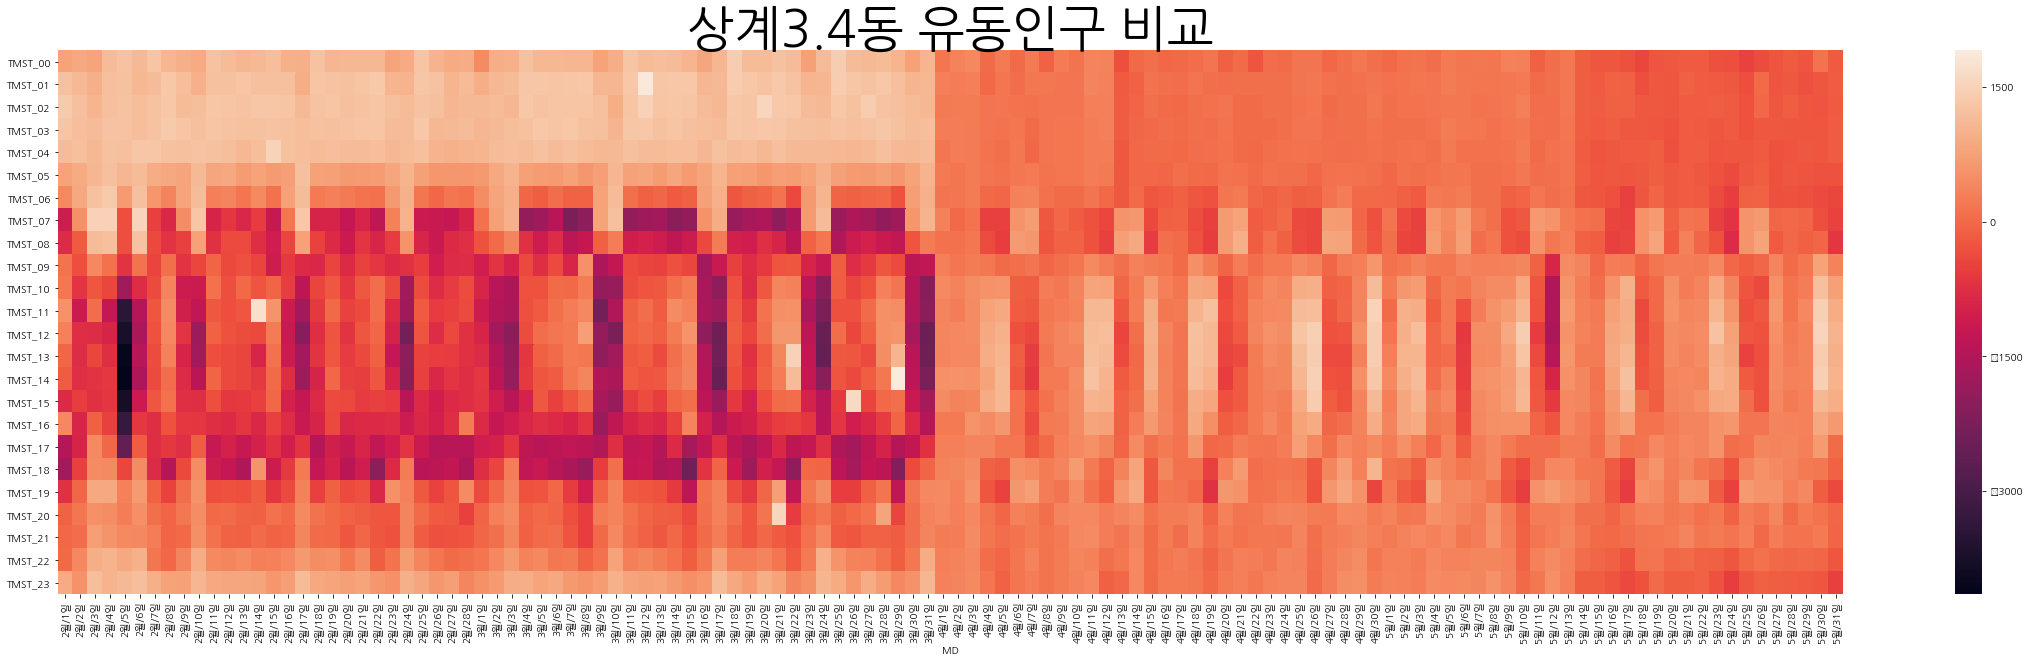

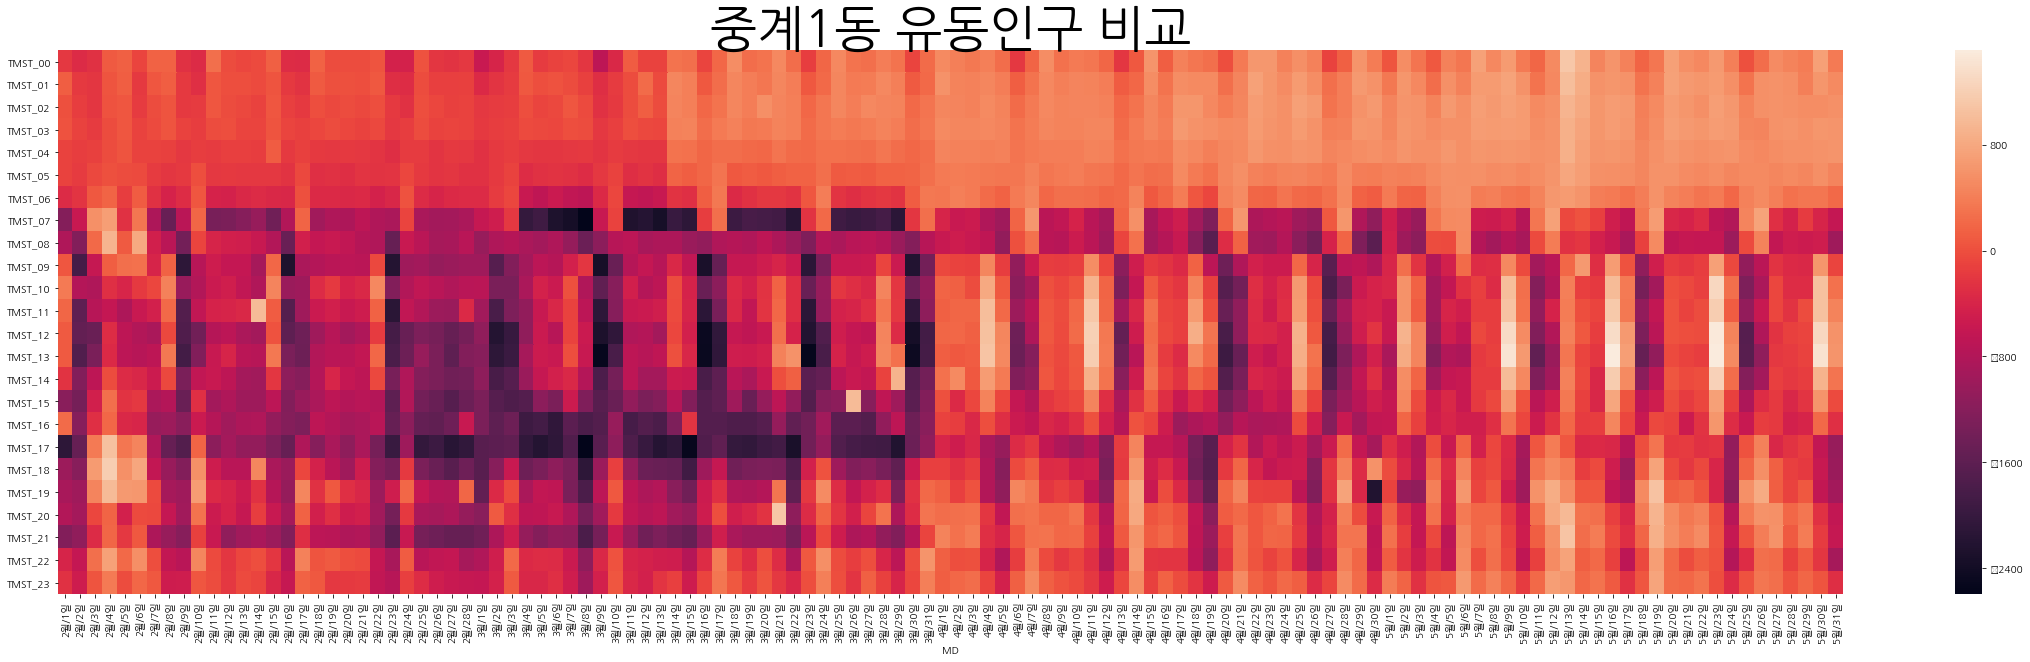

In [160]:
nowon = sk_data_TIME[sk_data_TIME.GU_NAME == '서울특별시노원구']

for dist_name in list(nowon.HDONG_NM.value_counts().index):
    sample = sk_data_TIME[sk_data_TIME['HDONG_NM'] == dist_name]
    sample['STD_YMD'] = pd.to_datetime(sample.STD_YMD, format = '%Y%m%d')
    
    sample['MD'] = sample['STD_YMD'].map(lambda x: str(x.month) + '월' + '/' + str(x.day) + '일')
    
    sample_2019 = sample[sample['STD_YM'] < 202000]
    sample_2020 = sample[sample['STD_YM'] >= 202000]
    
    sample_2019.index = sample_2019.MD
    sample_2020.index = sample_2020.MD
    
    del sample_2019['MD']
    del sample_2020['MD']
    
    sample_2019 = sample_2019.iloc[:, 6:].T
    sample_2020 = sample_2020.iloc[:, 6:].T

    # 2020년 2월 29일 삭제
    del sample_2020['2월/29일']
    sample_total = sample_2020 - sample_2019
    
    plt.figure(figsize = (40,10))
    sns.heatmap(sample_total)
    plt.title(f'{dist_name} 유동인구 비교', fontsize = 50)
    
#     sample_total.astype(int).style.background_gradient(cmap='summer', axis = 1)

### 3.2 서울특별시 중구

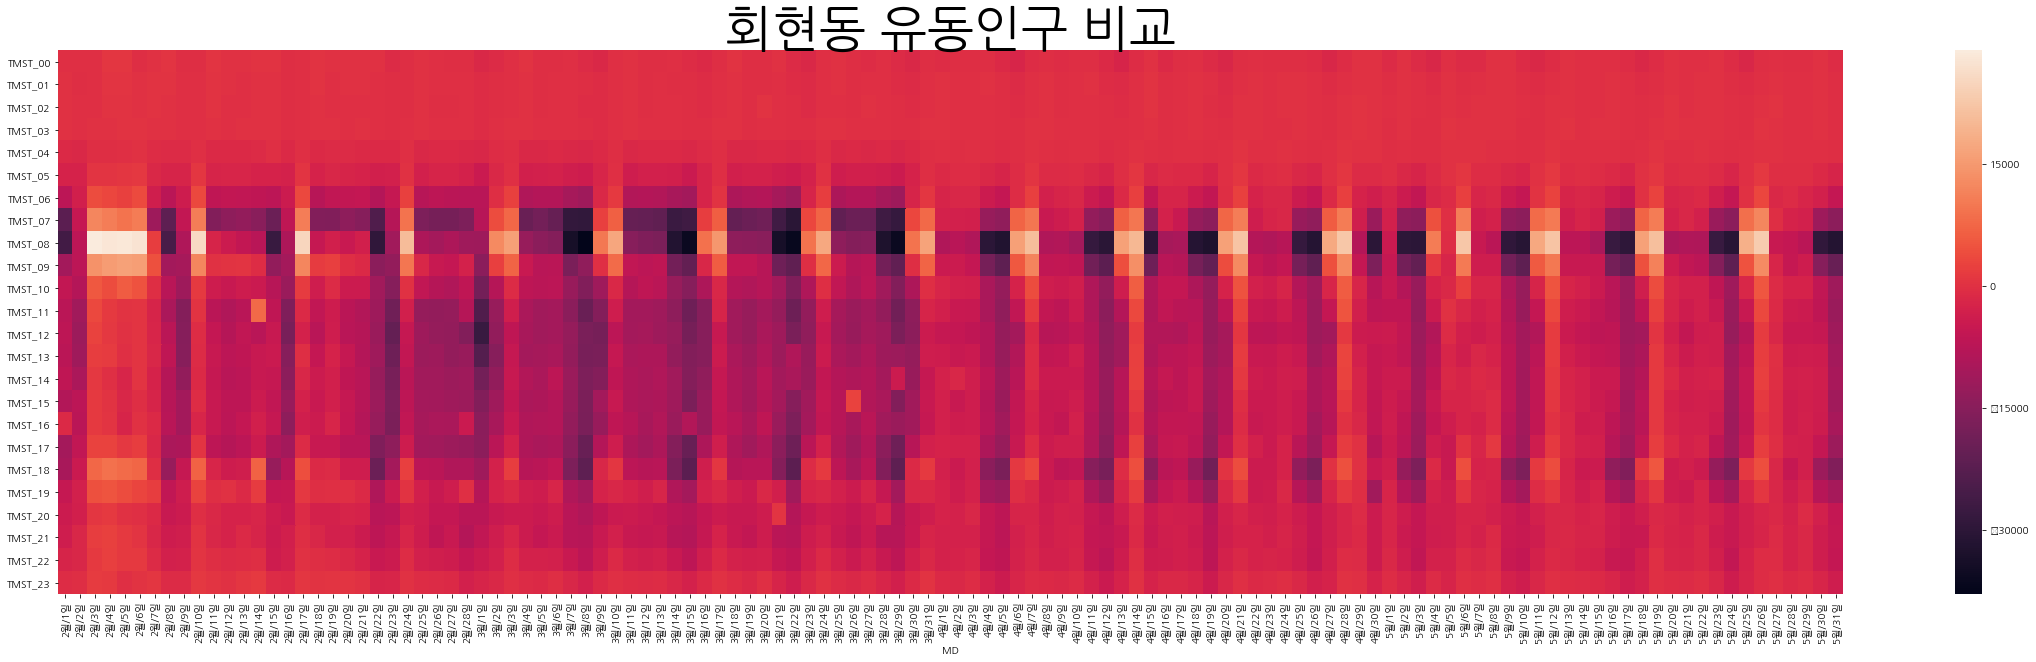

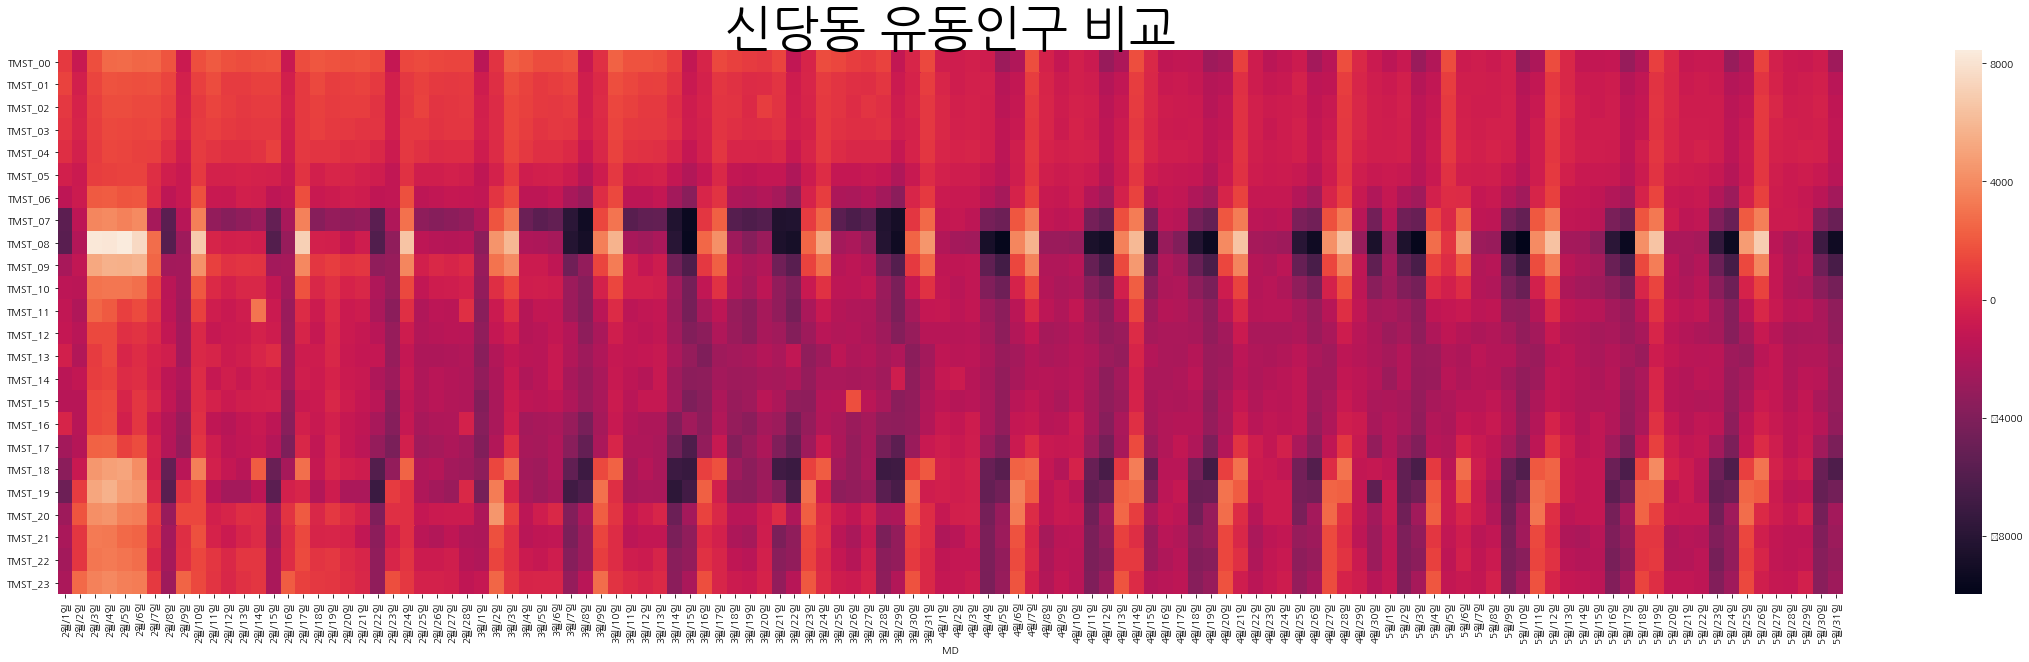

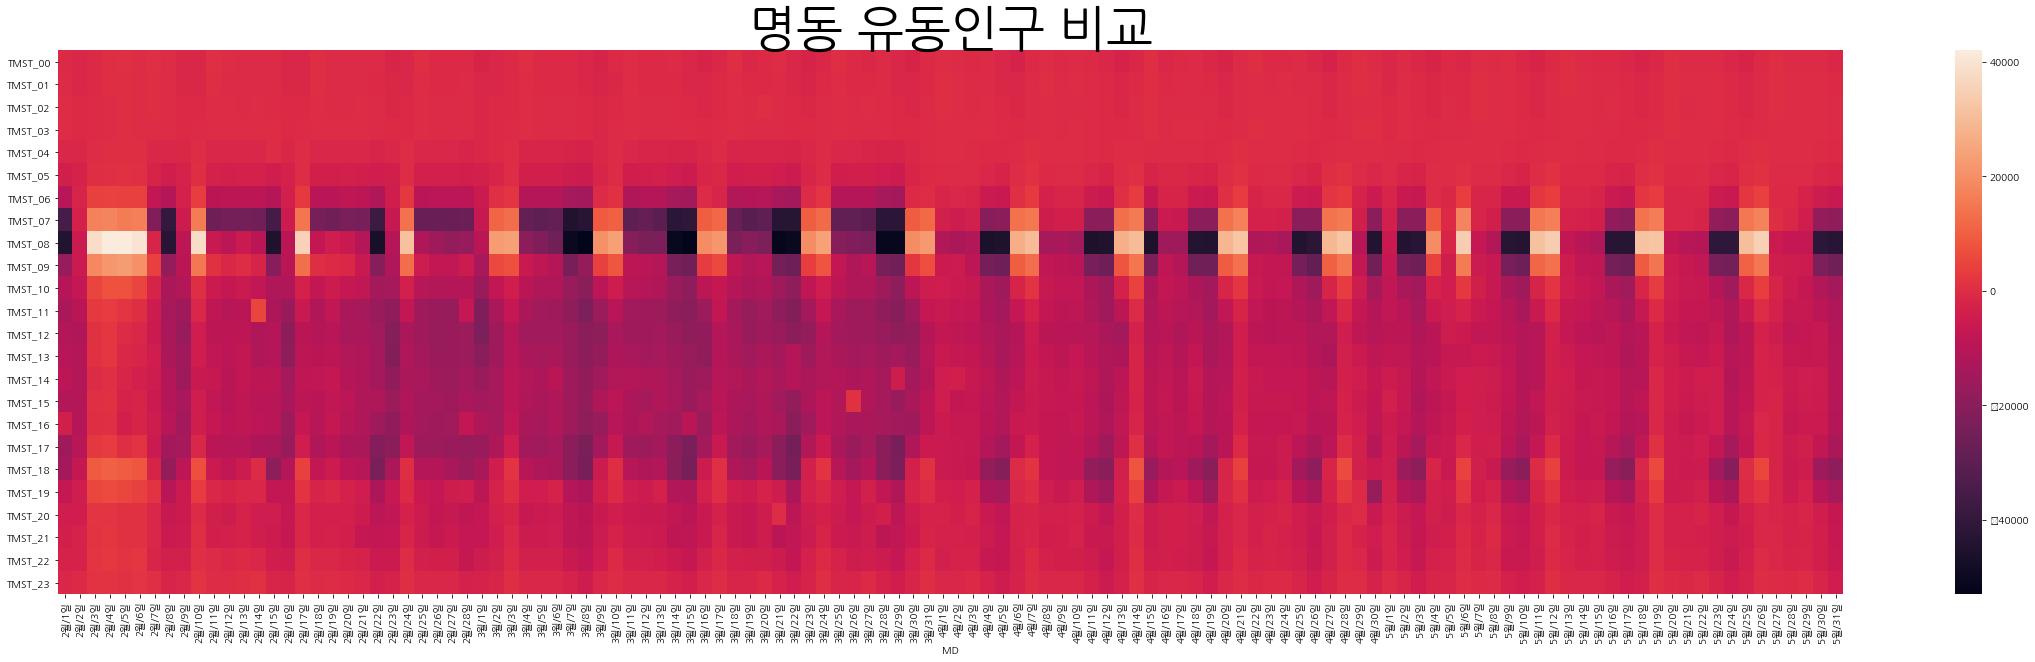

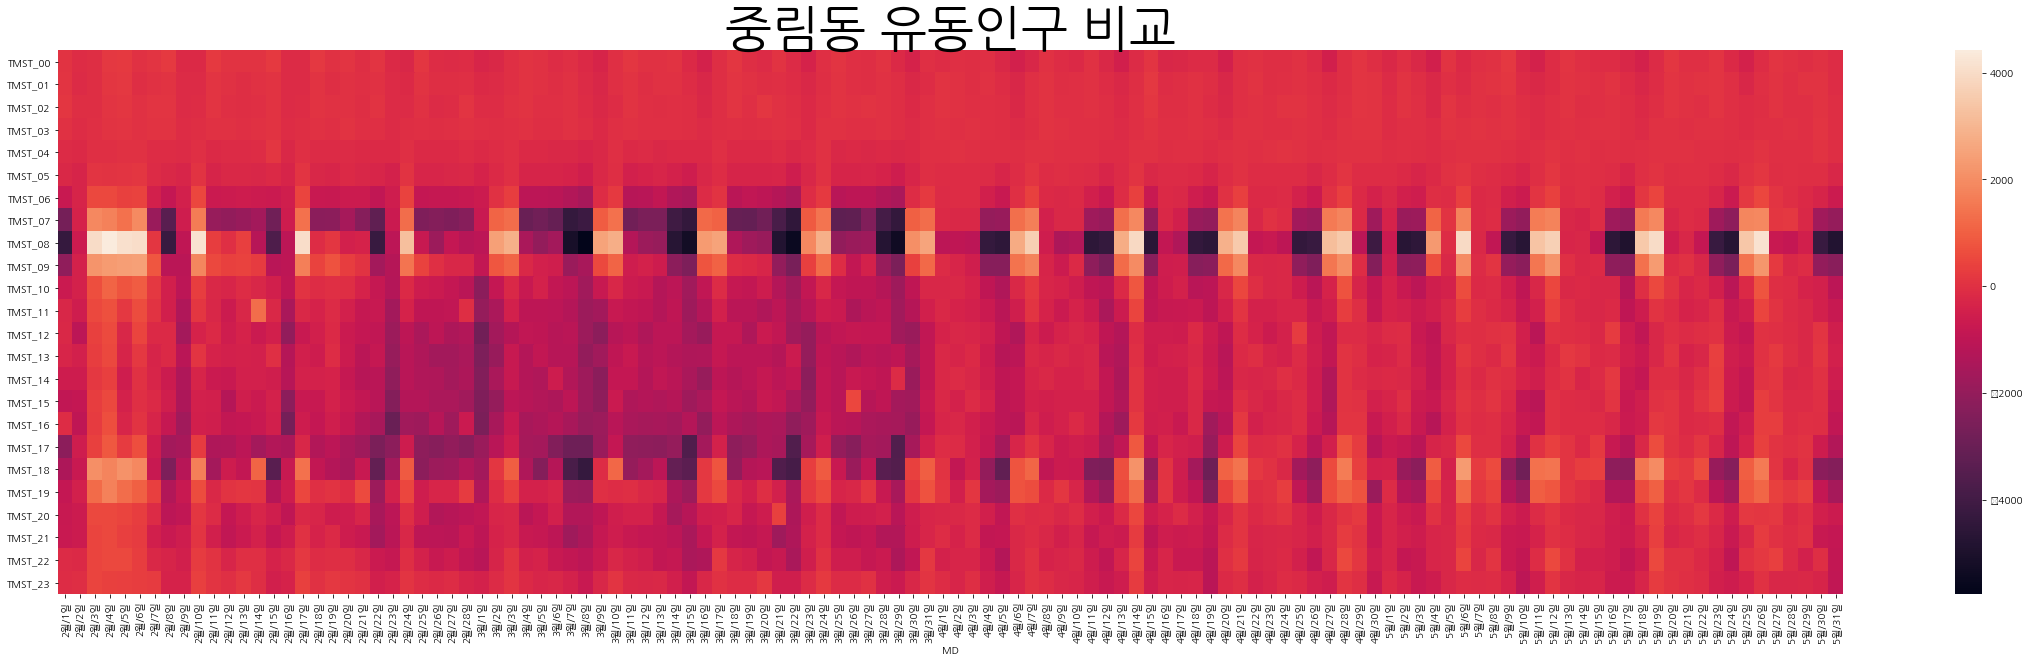

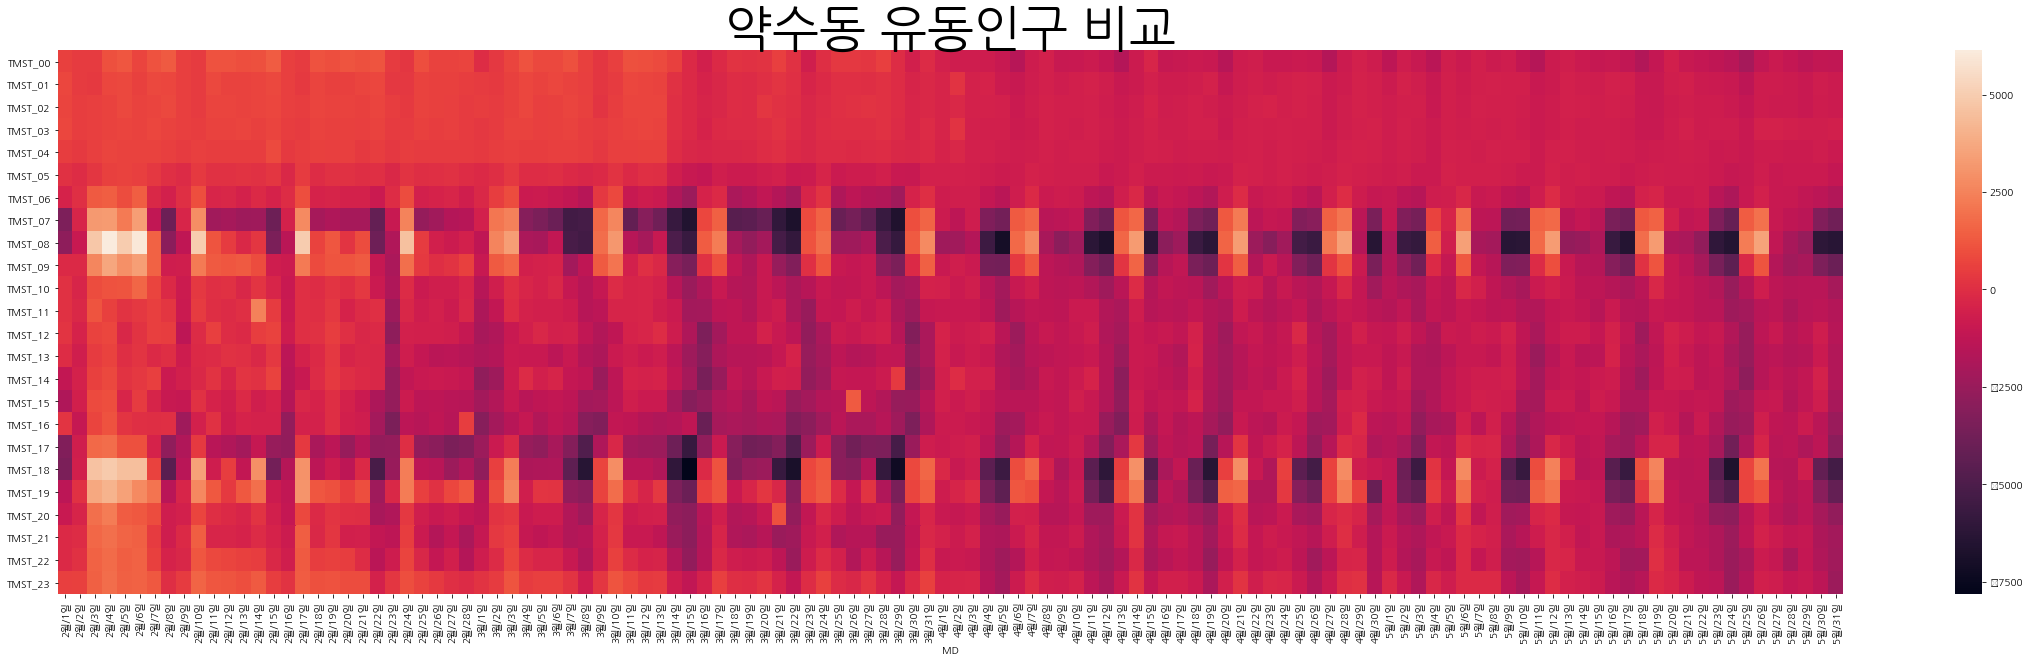

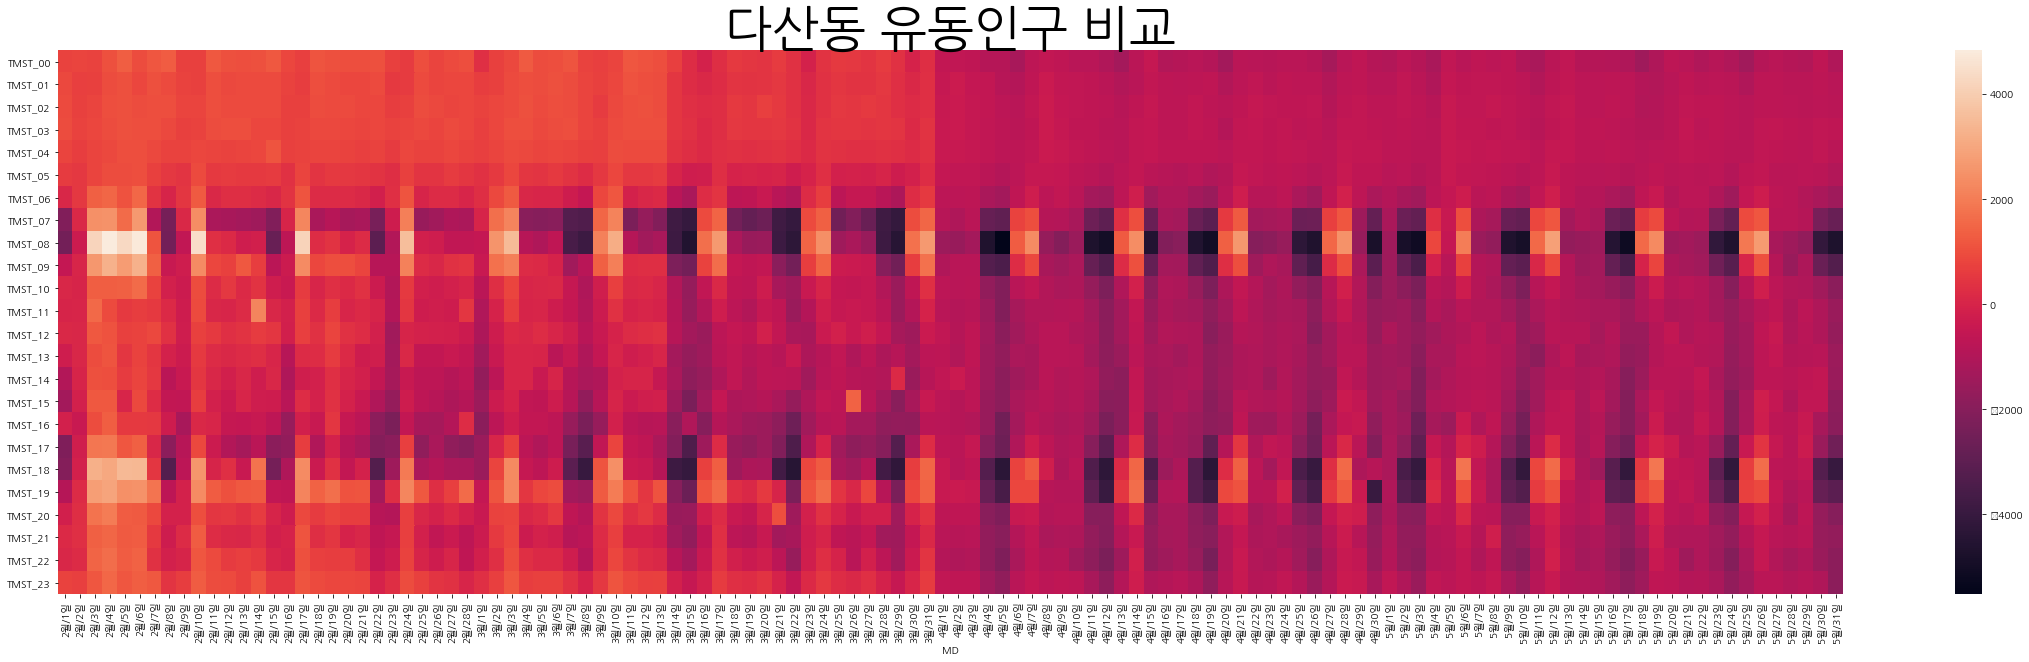

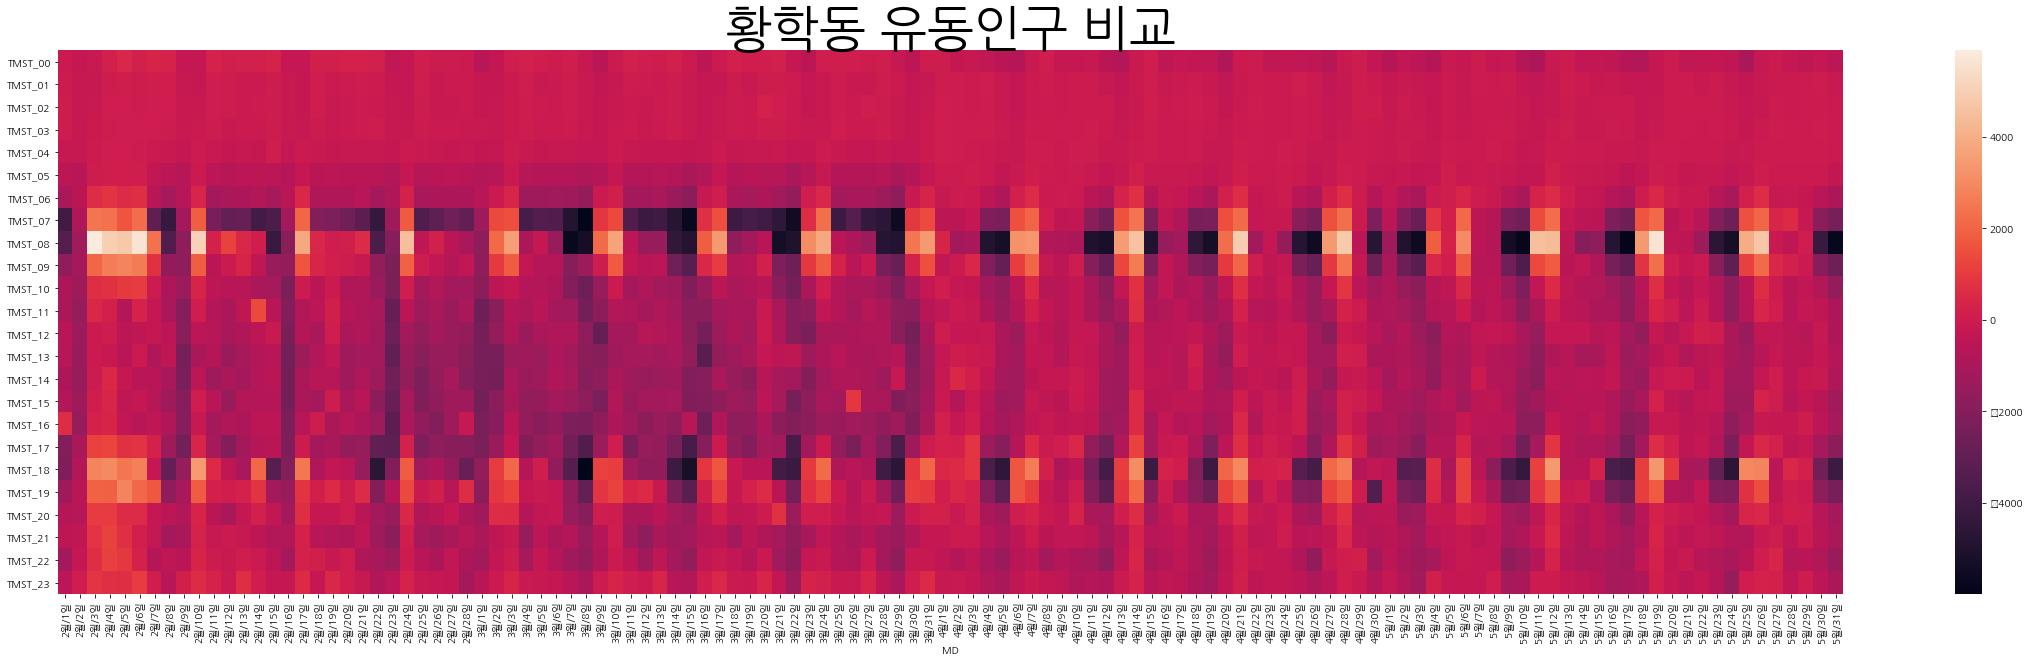

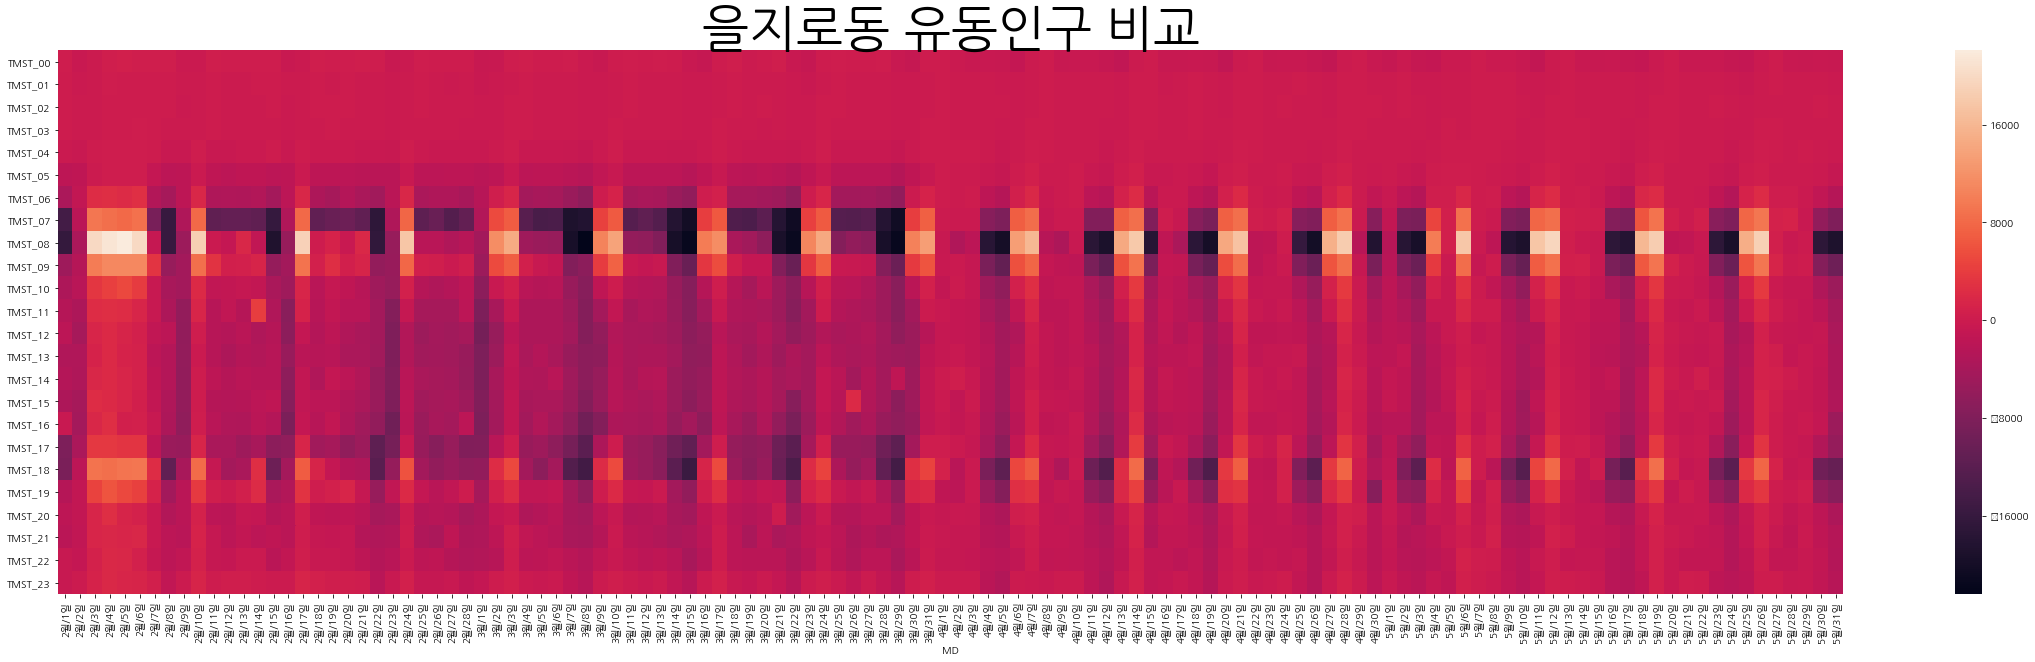

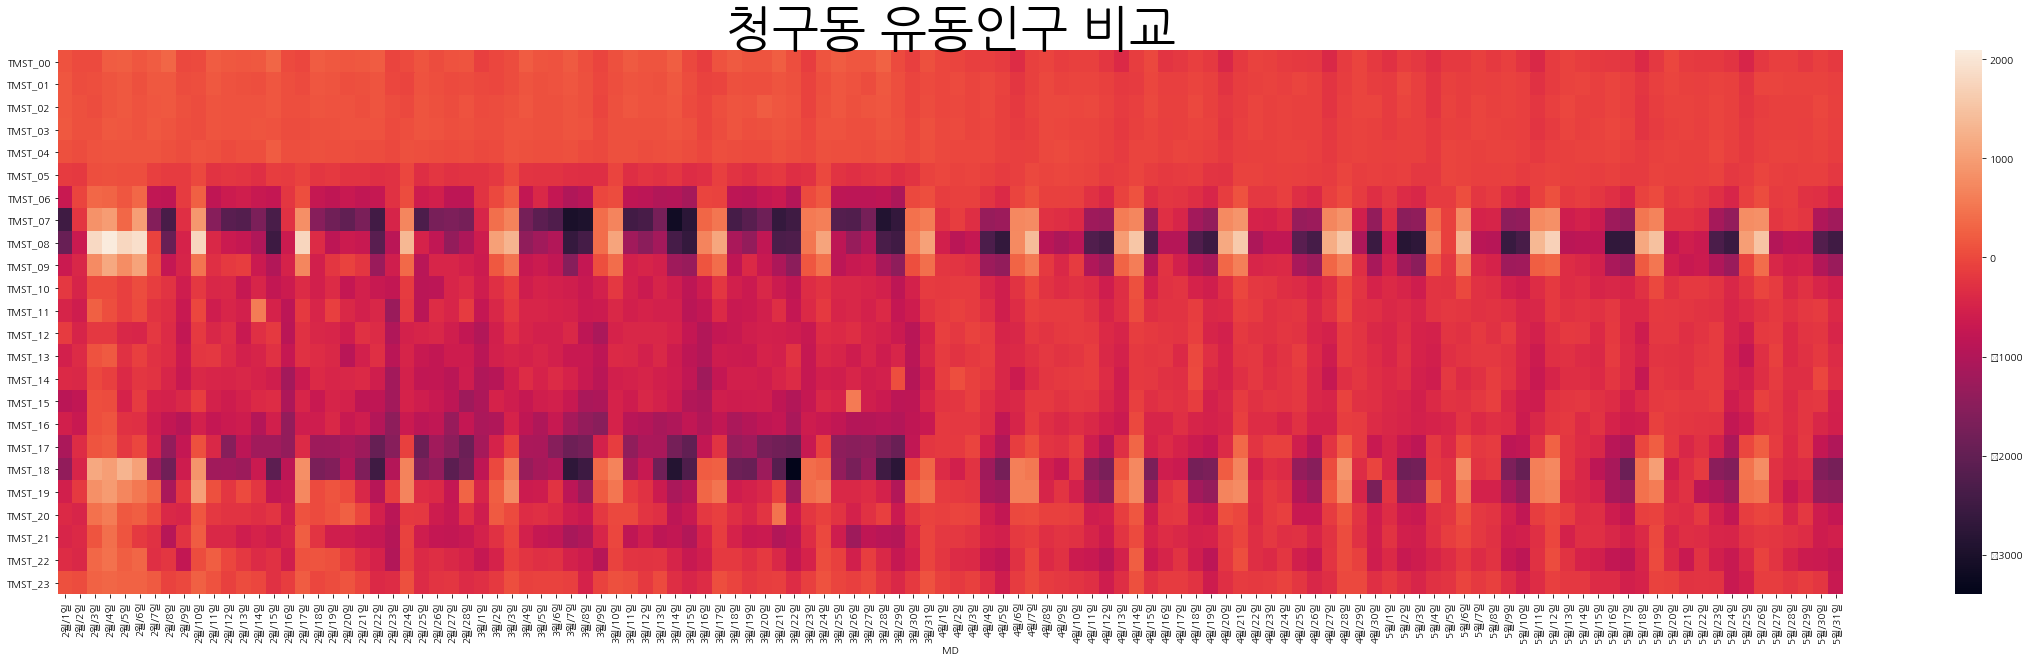

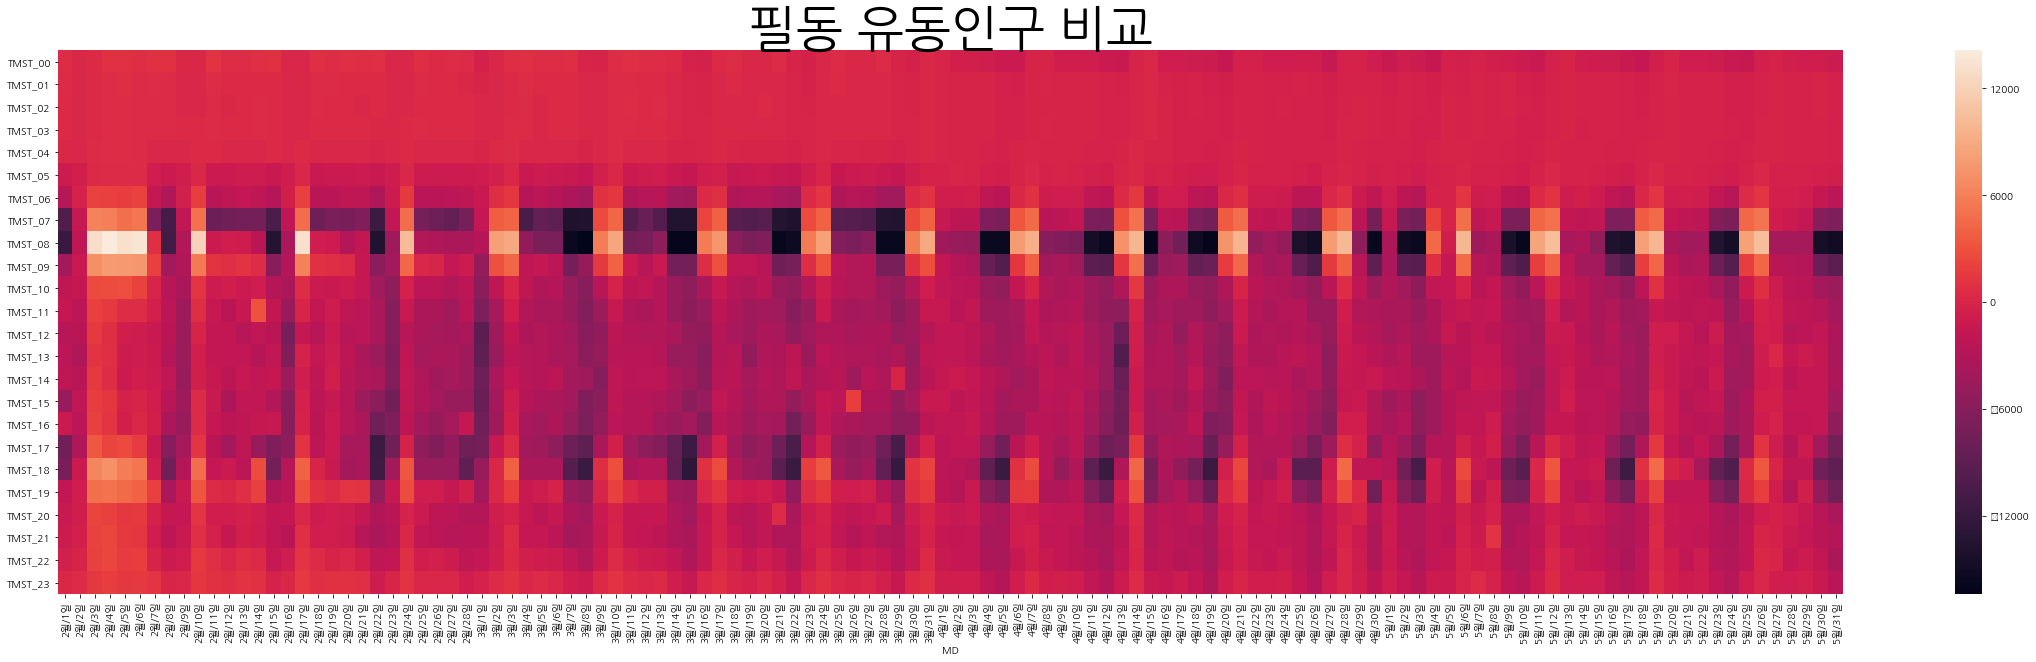

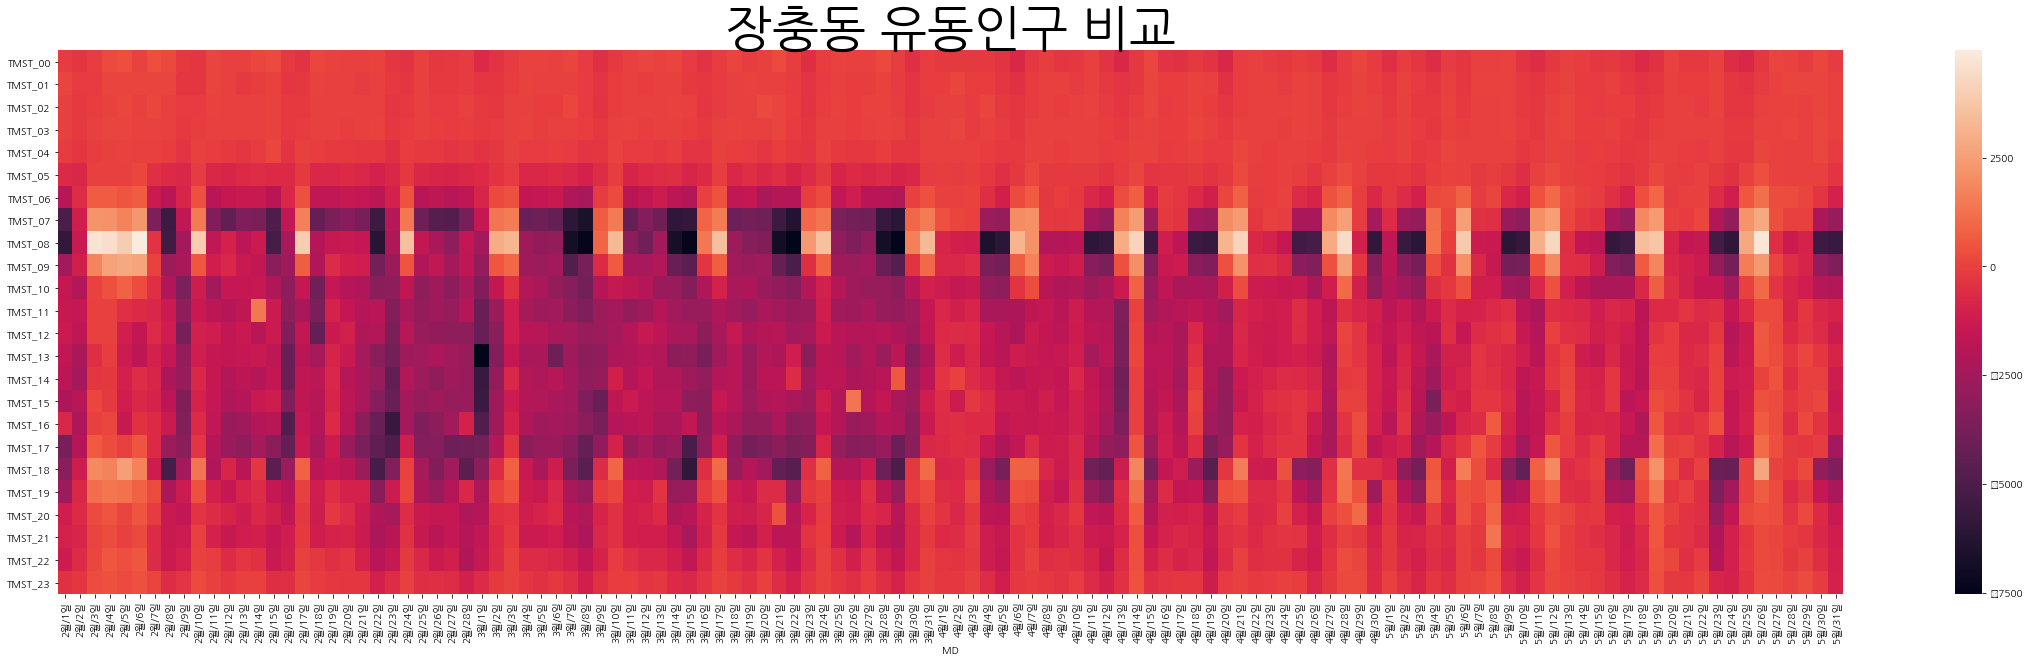

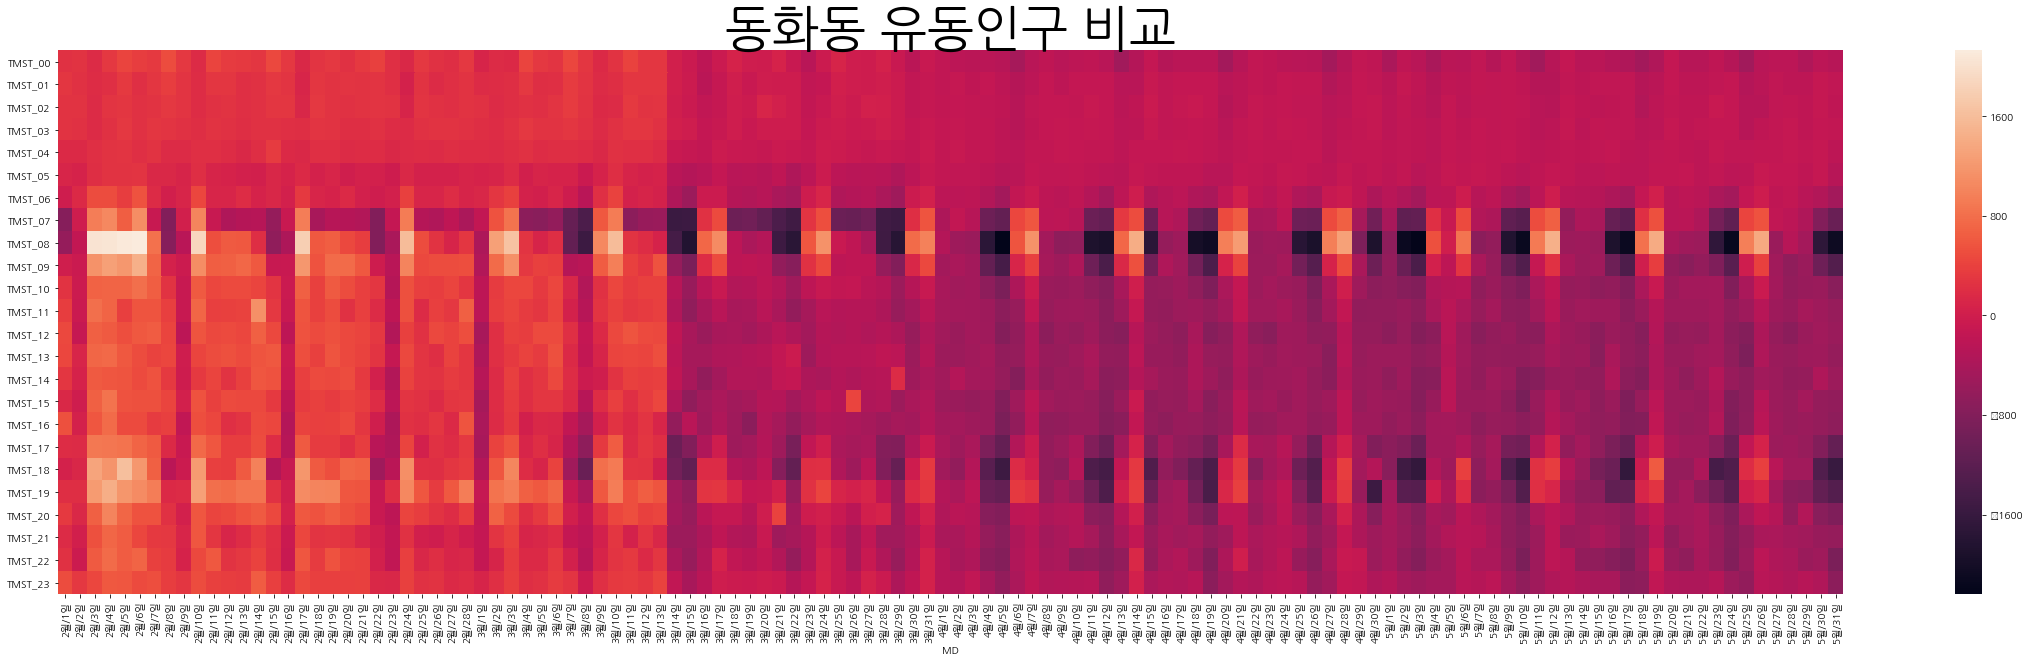

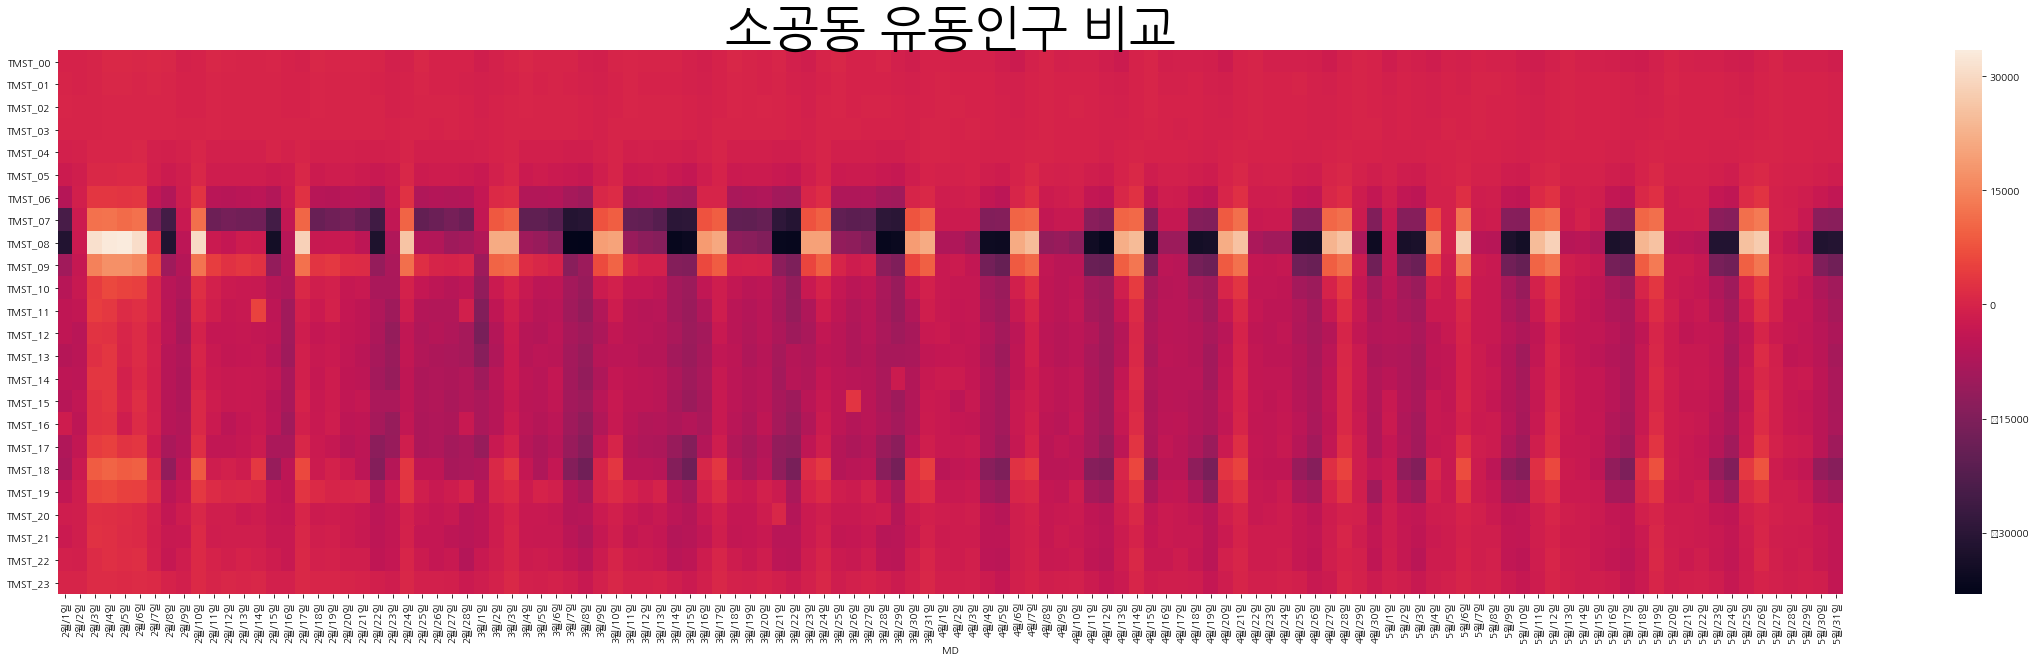

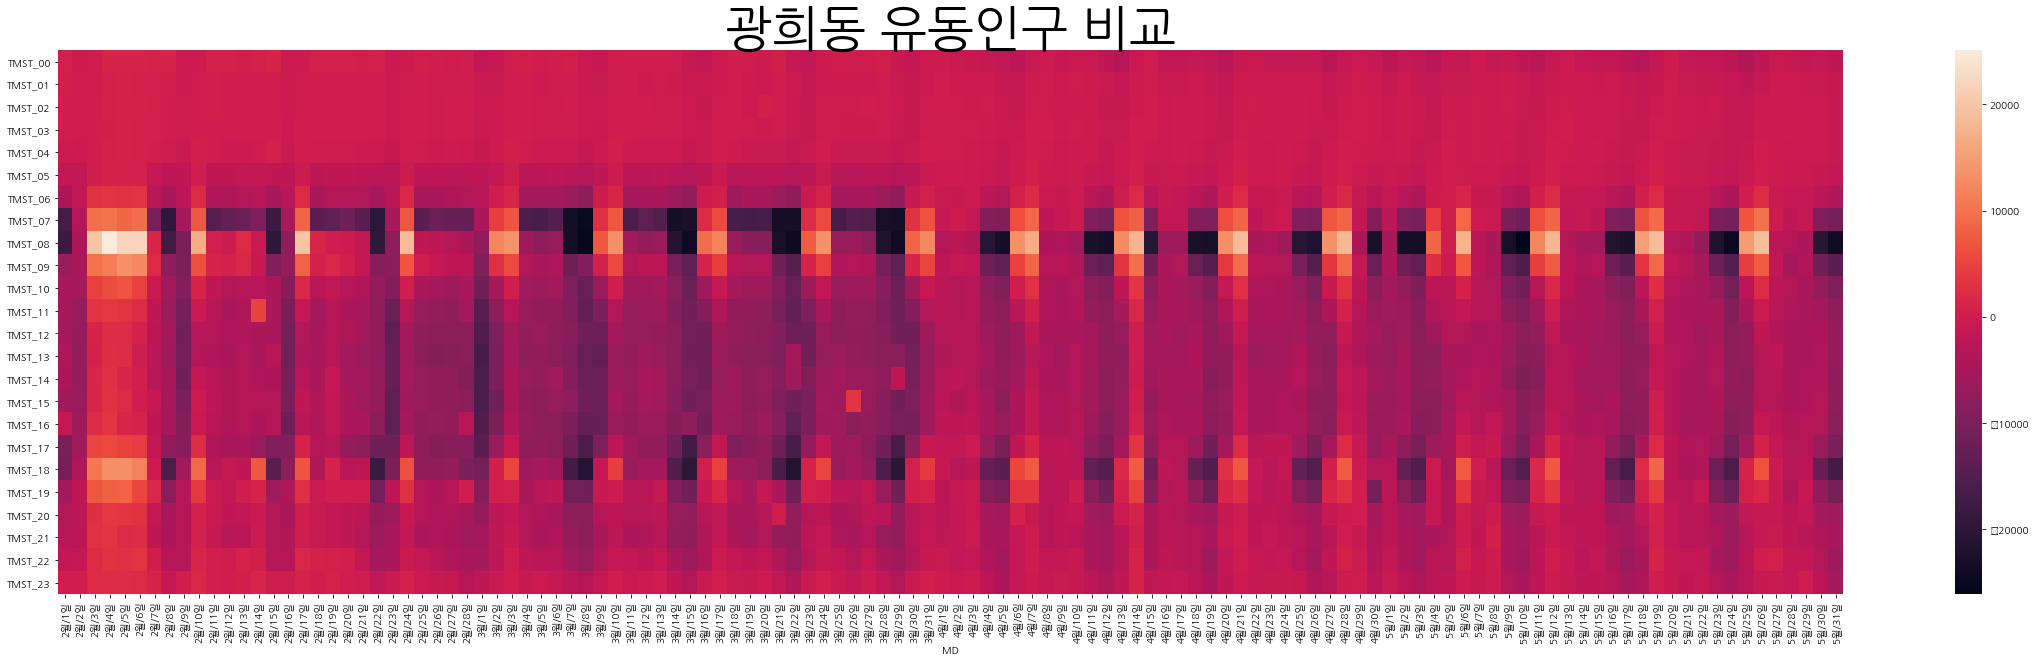

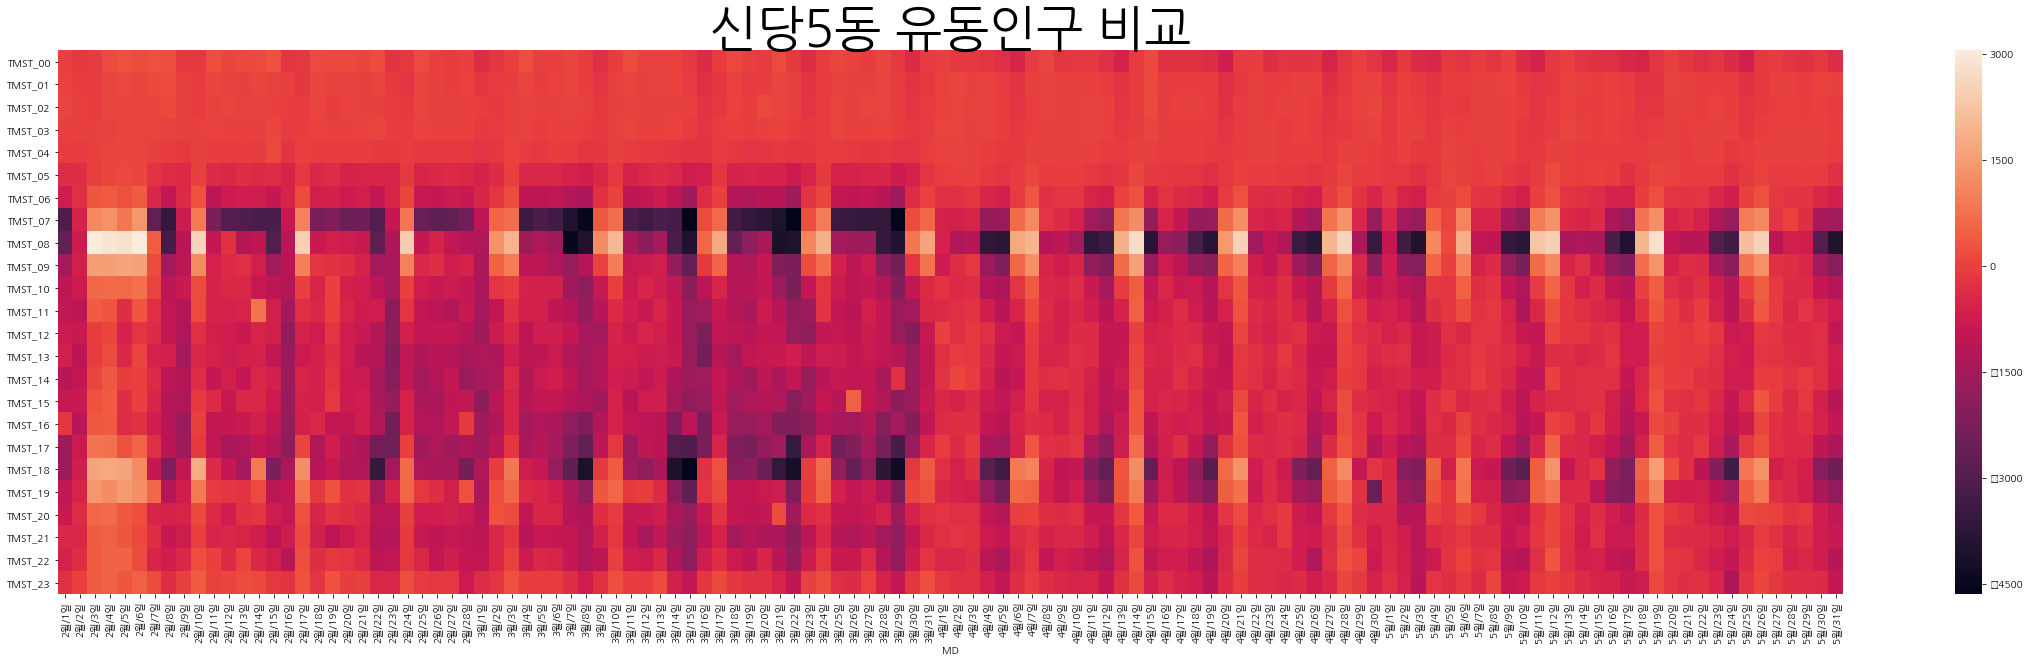

In [161]:
junggu = sk_data_TIME[sk_data_TIME.GU_NAME == '서울특별시중구']

for dist_name in list(junggu.HDONG_NM.value_counts().index):
    sample = sk_data_TIME[sk_data_TIME['HDONG_NM'] == dist_name]
    sample['STD_YMD'] = pd.to_datetime(sample.STD_YMD, format = '%Y%m%d')
    
    sample['MD'] = sample['STD_YMD'].map(lambda x: str(x.month) + '월' + '/' + str(x.day) + '일')
    
    sample_2019 = sample[sample['STD_YM'] < 202000]
    sample_2020 = sample[sample['STD_YM'] >= 202000]
    
    sample_2019.index = sample_2019.MD
    sample_2020.index = sample_2020.MD
    
    del sample_2019['MD']
    del sample_2020['MD']
    
    sample_2019 = sample_2019.iloc[:, 6:].T
    sample_2020 = sample_2020.iloc[:, 6:].T

    # 2020년 2월 29일 삭제
    del sample_2020['2월/29일']
    sample_total = sample_2020 - sample_2019
    
    plt.figure(figsize = (40,10))
    sns.heatmap(sample_total)
    plt.title(f'{dist_name} 유동인구 비교', fontsize = 50)
    
#     sample_total.astype(int).style.background_gradient(cmap='summer', axis = 1)

### 3.3 수성구

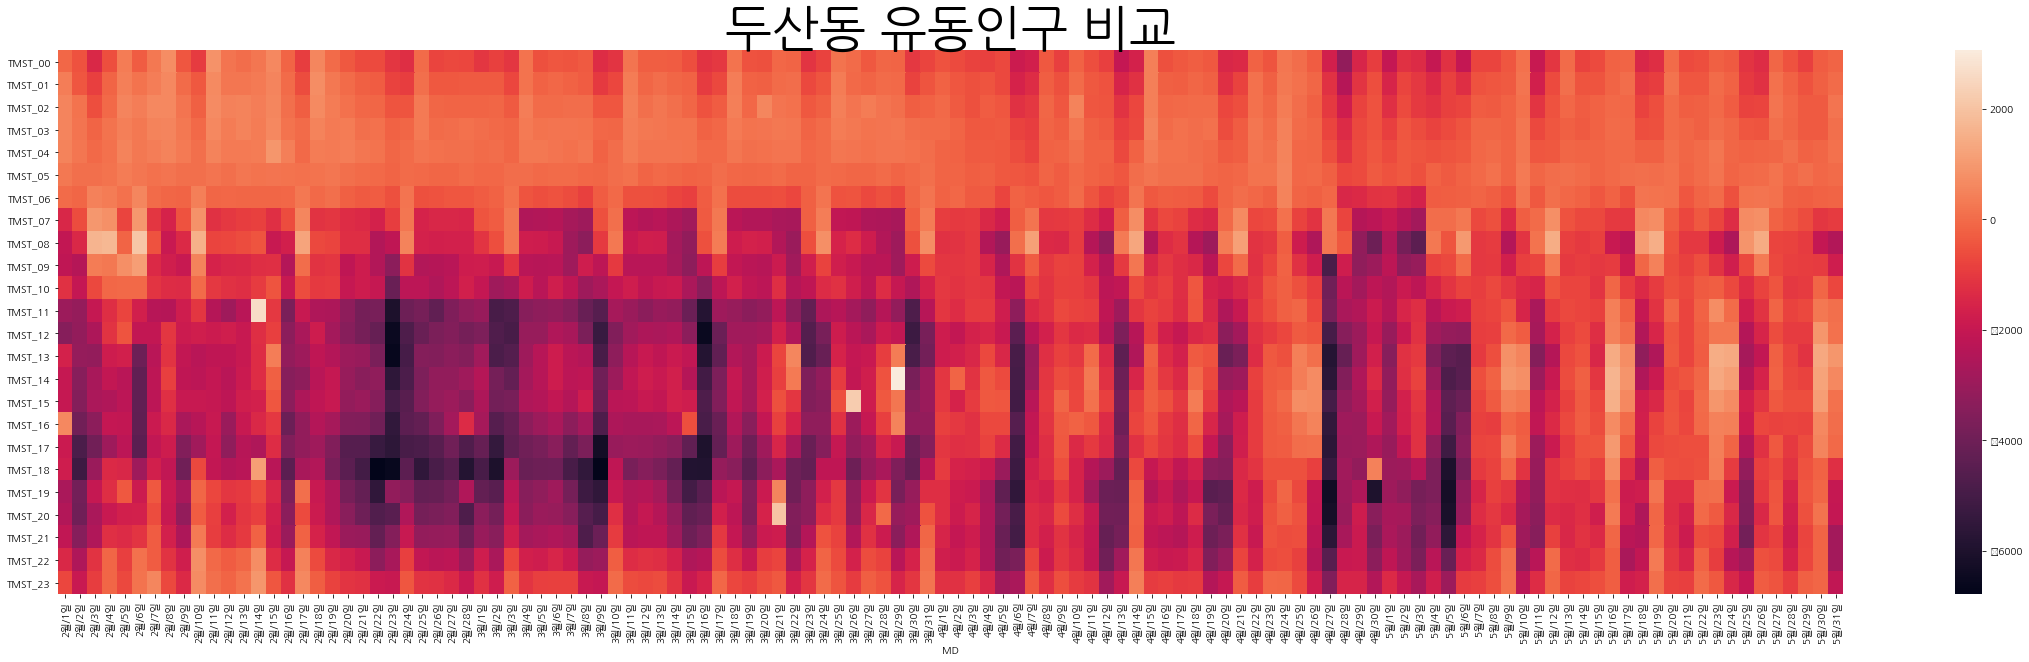

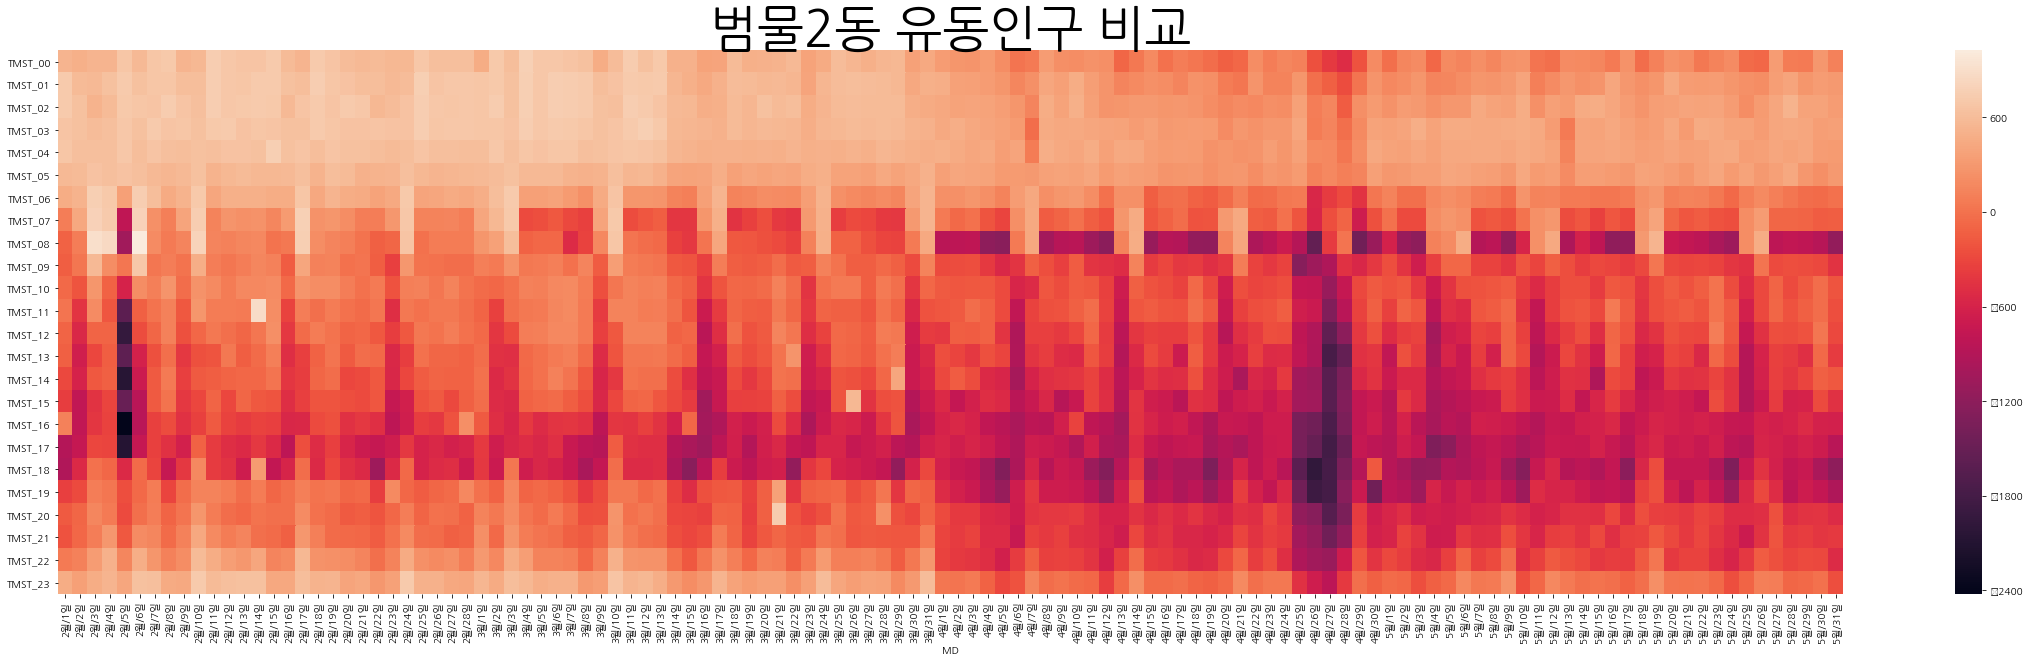

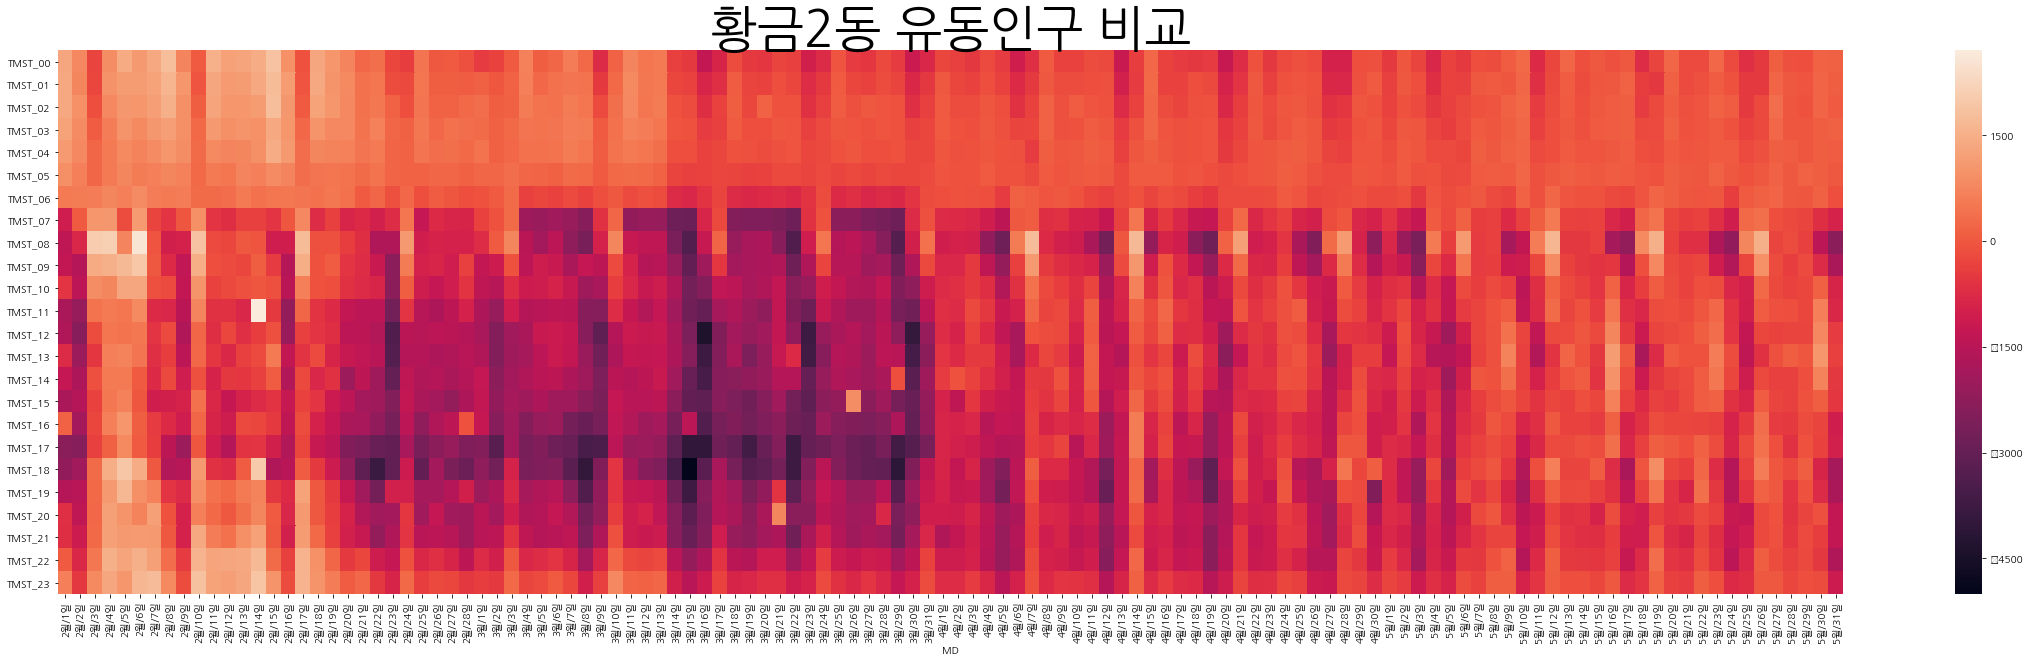

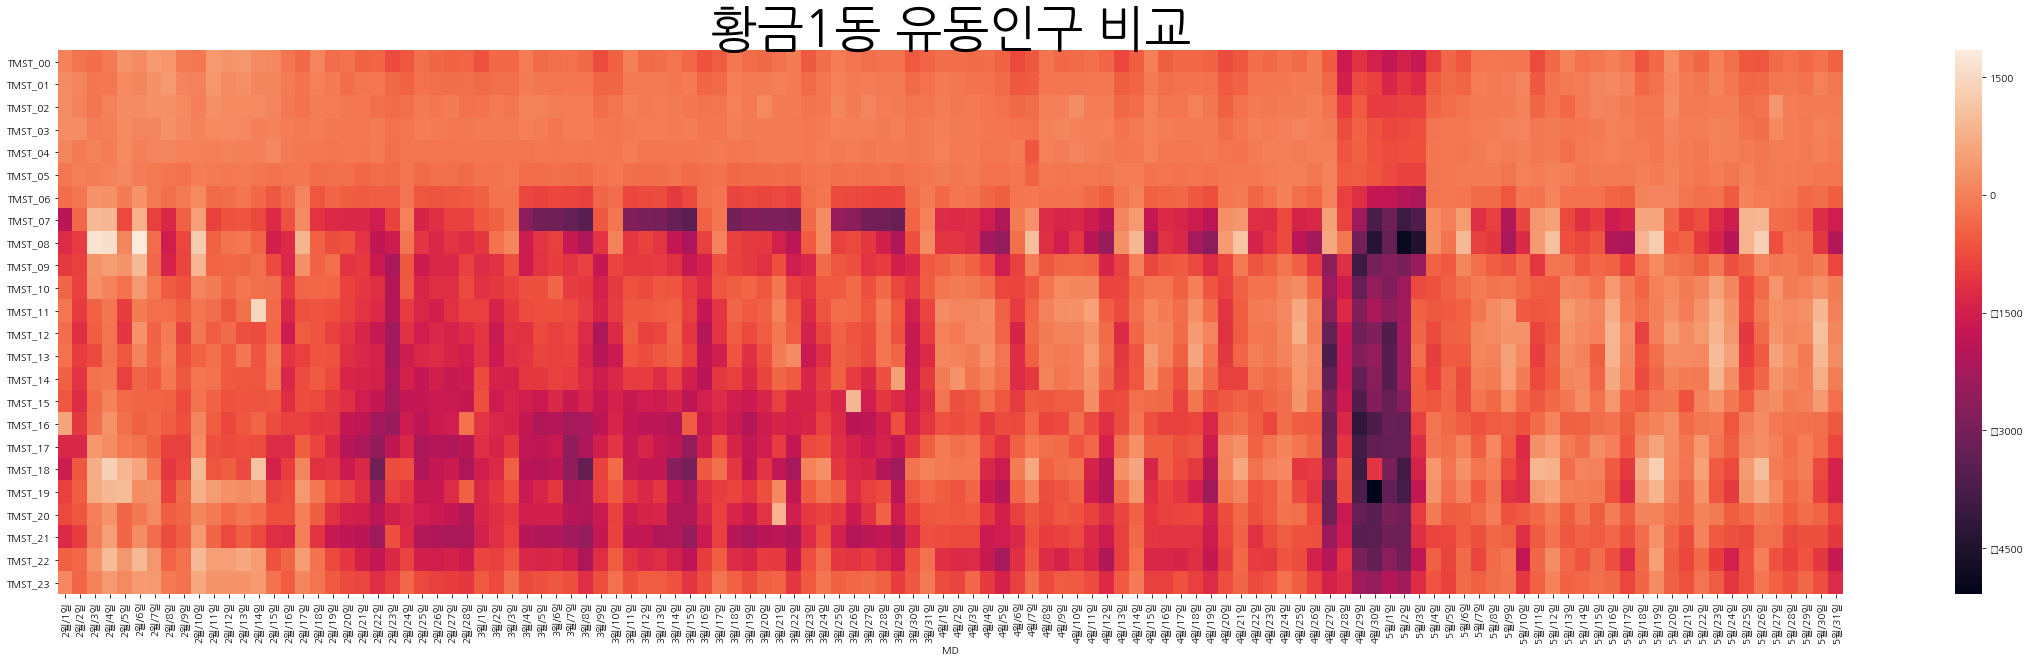

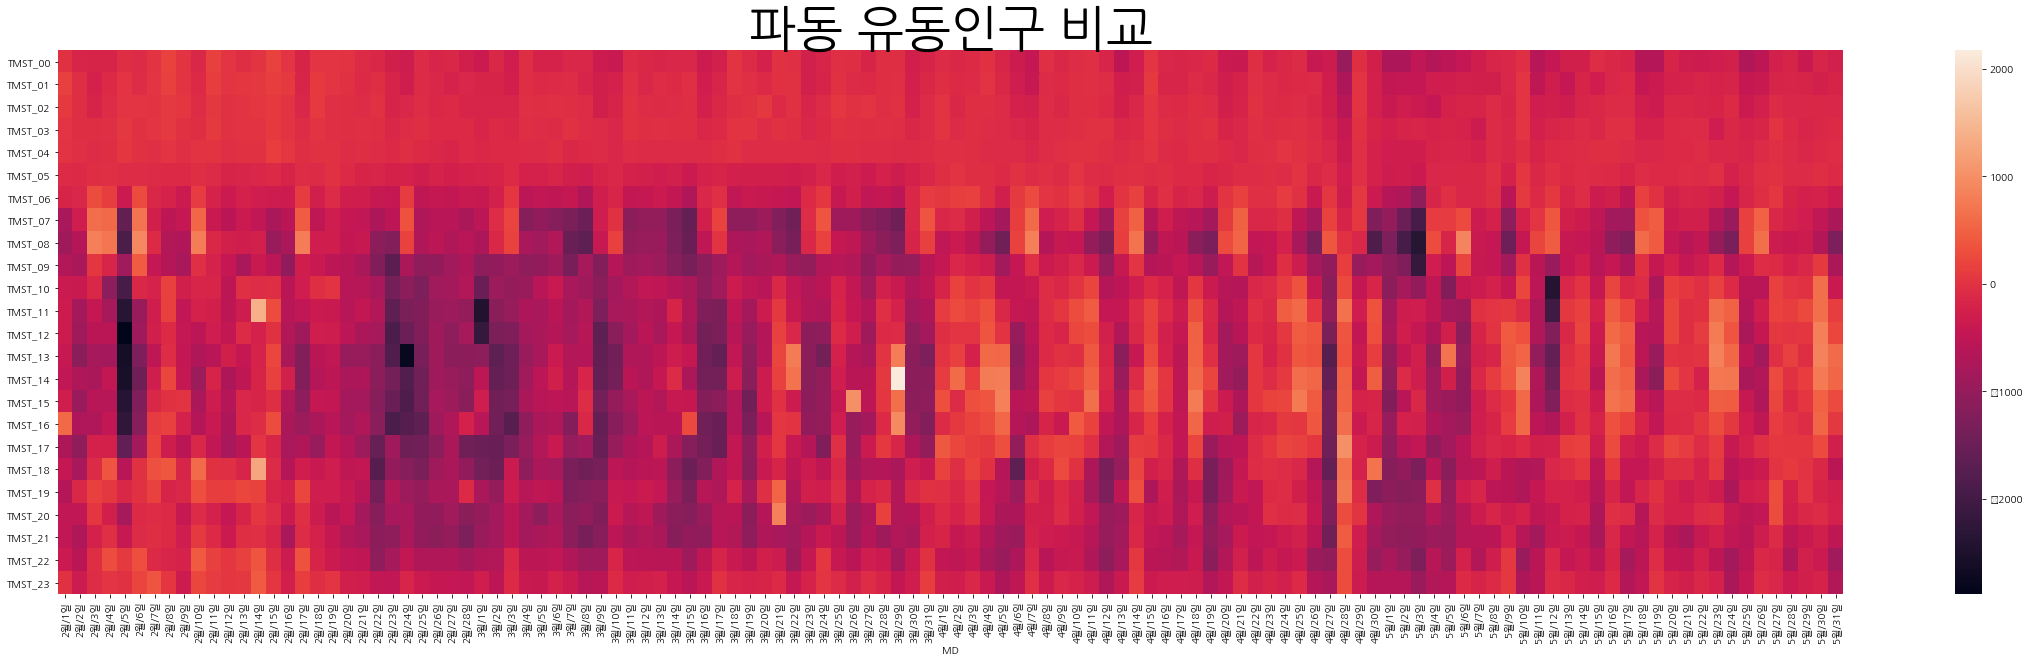

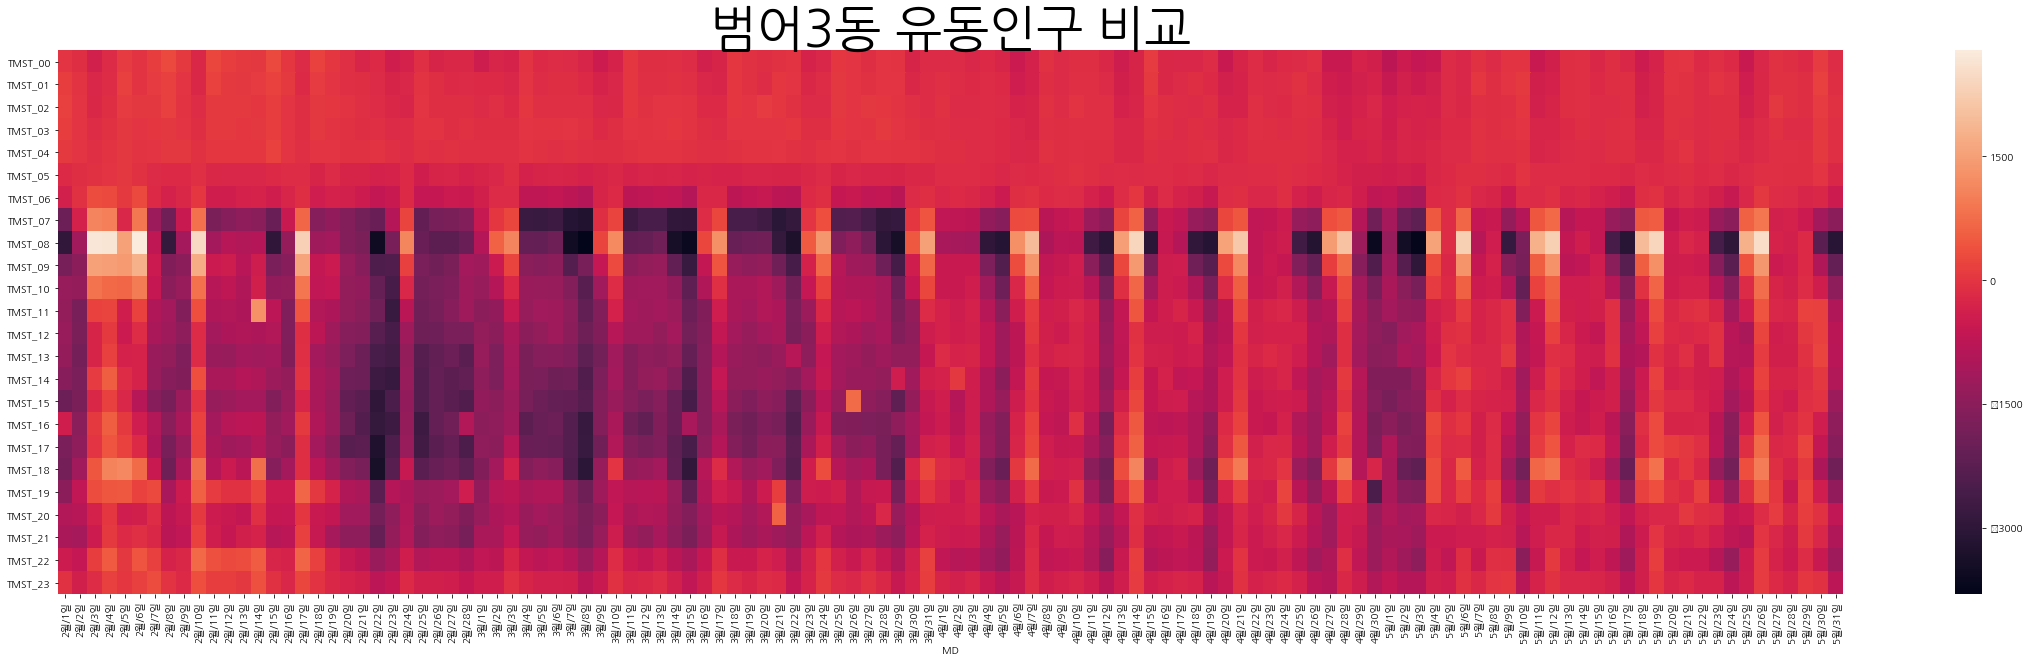

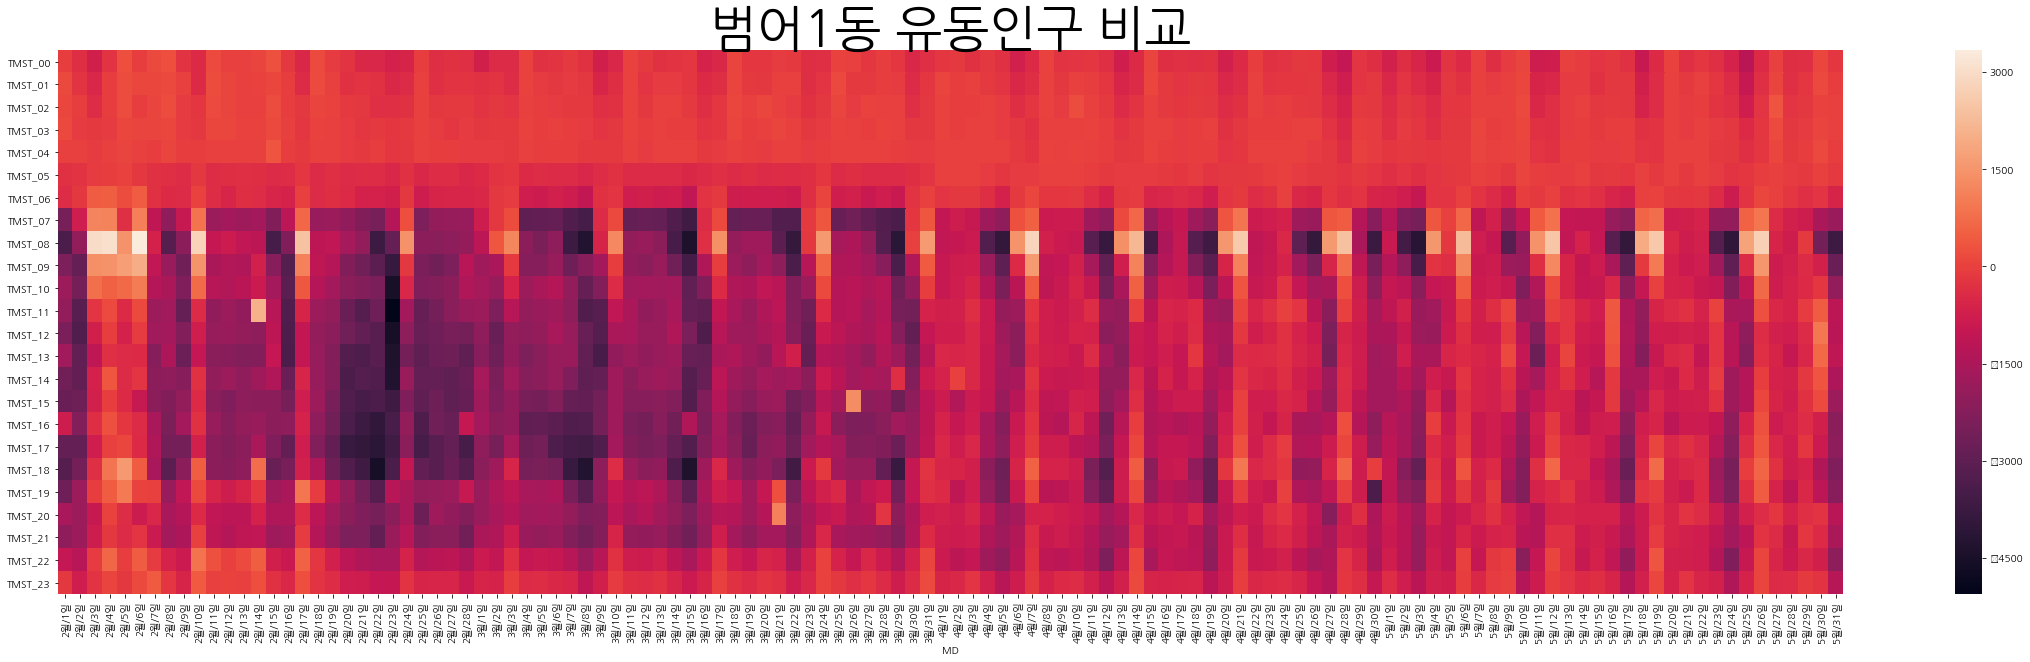

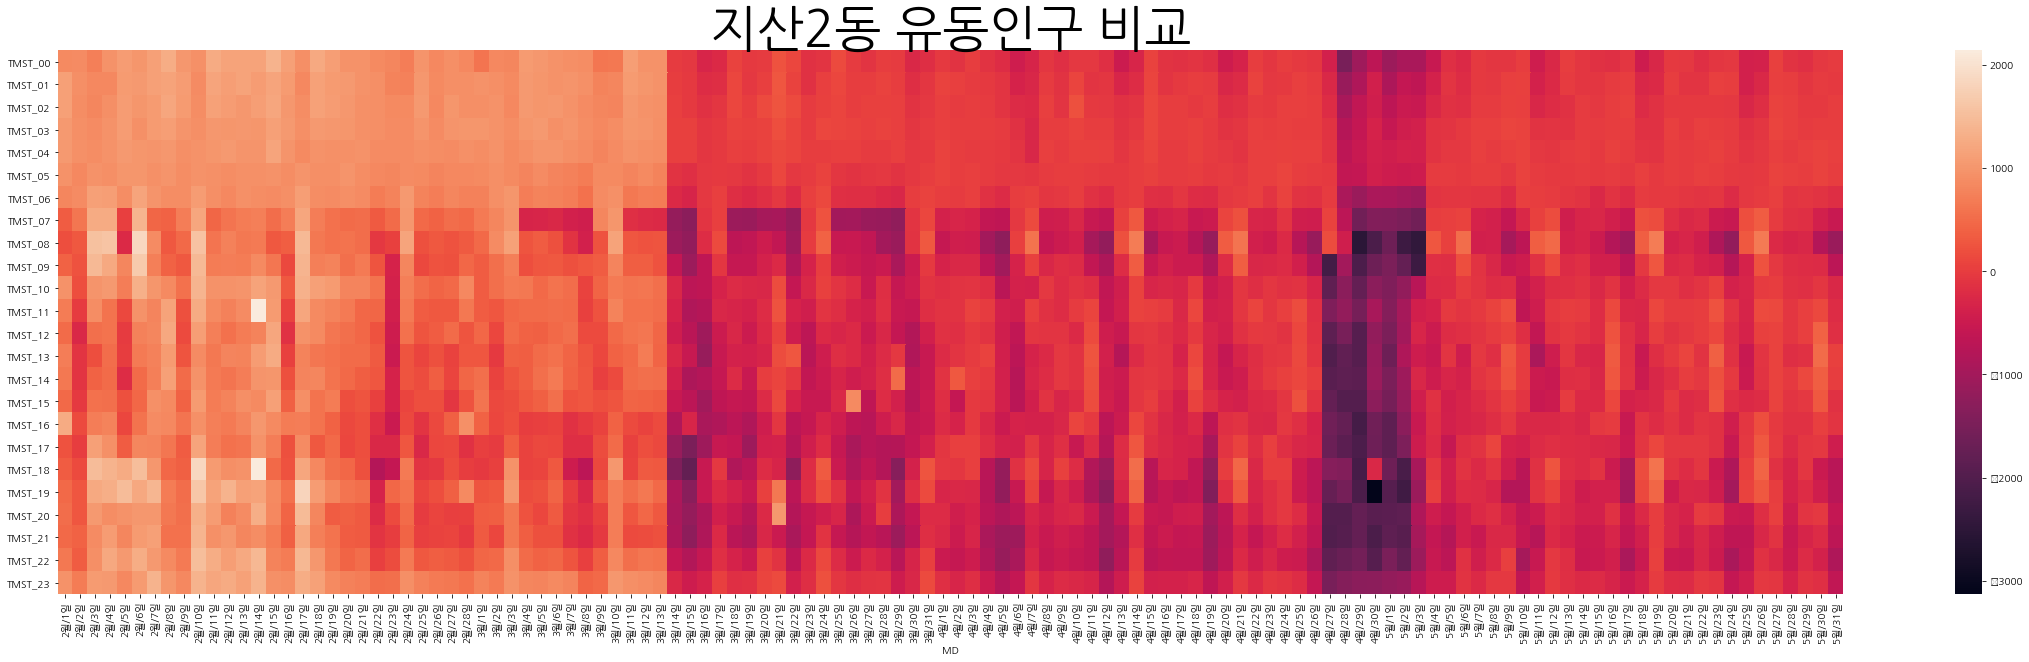

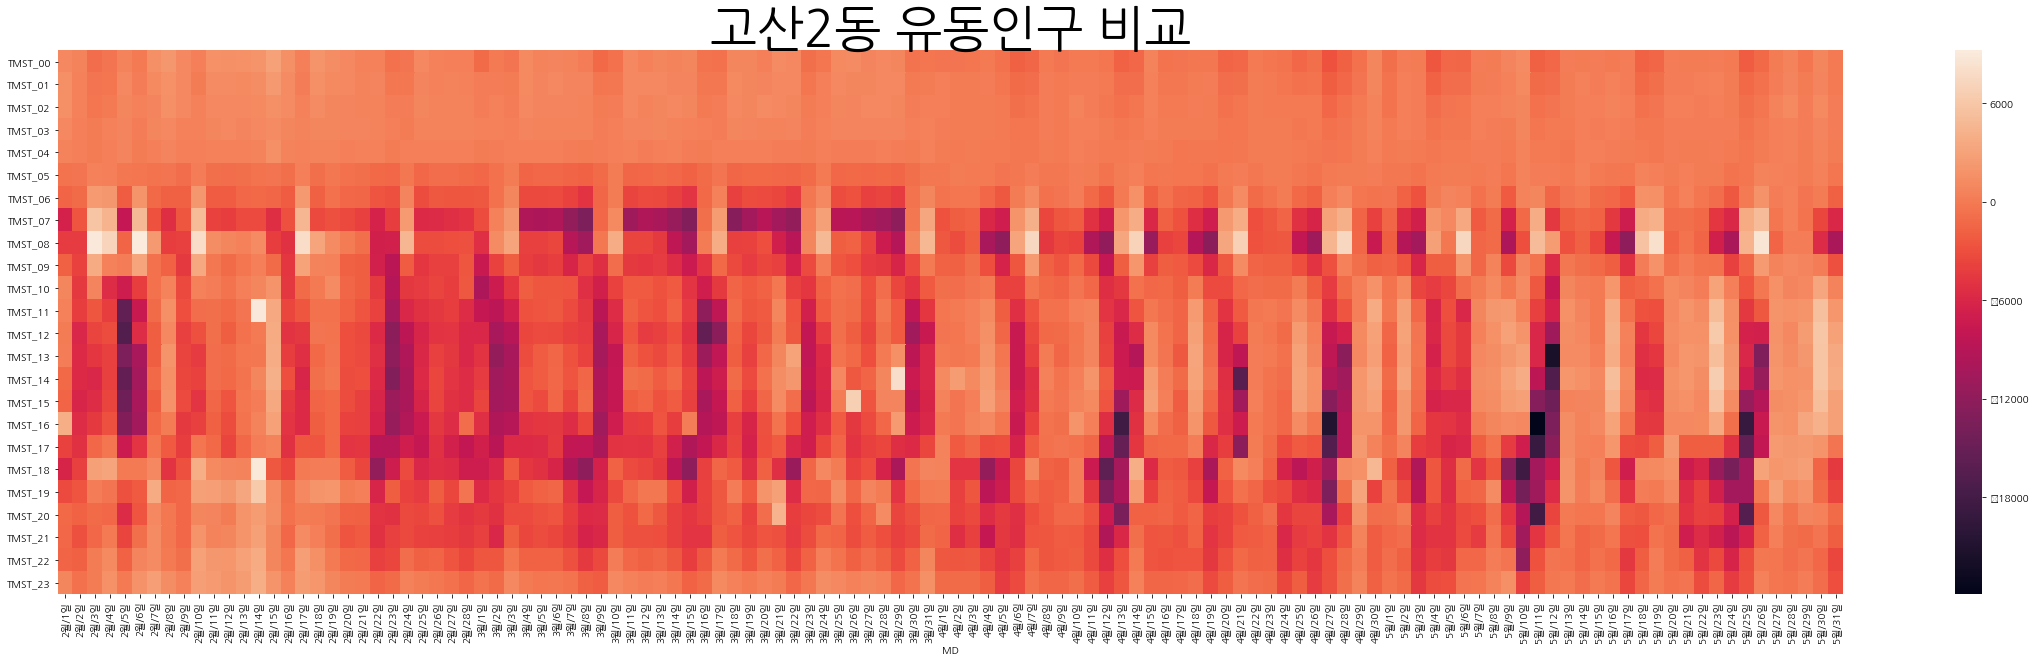

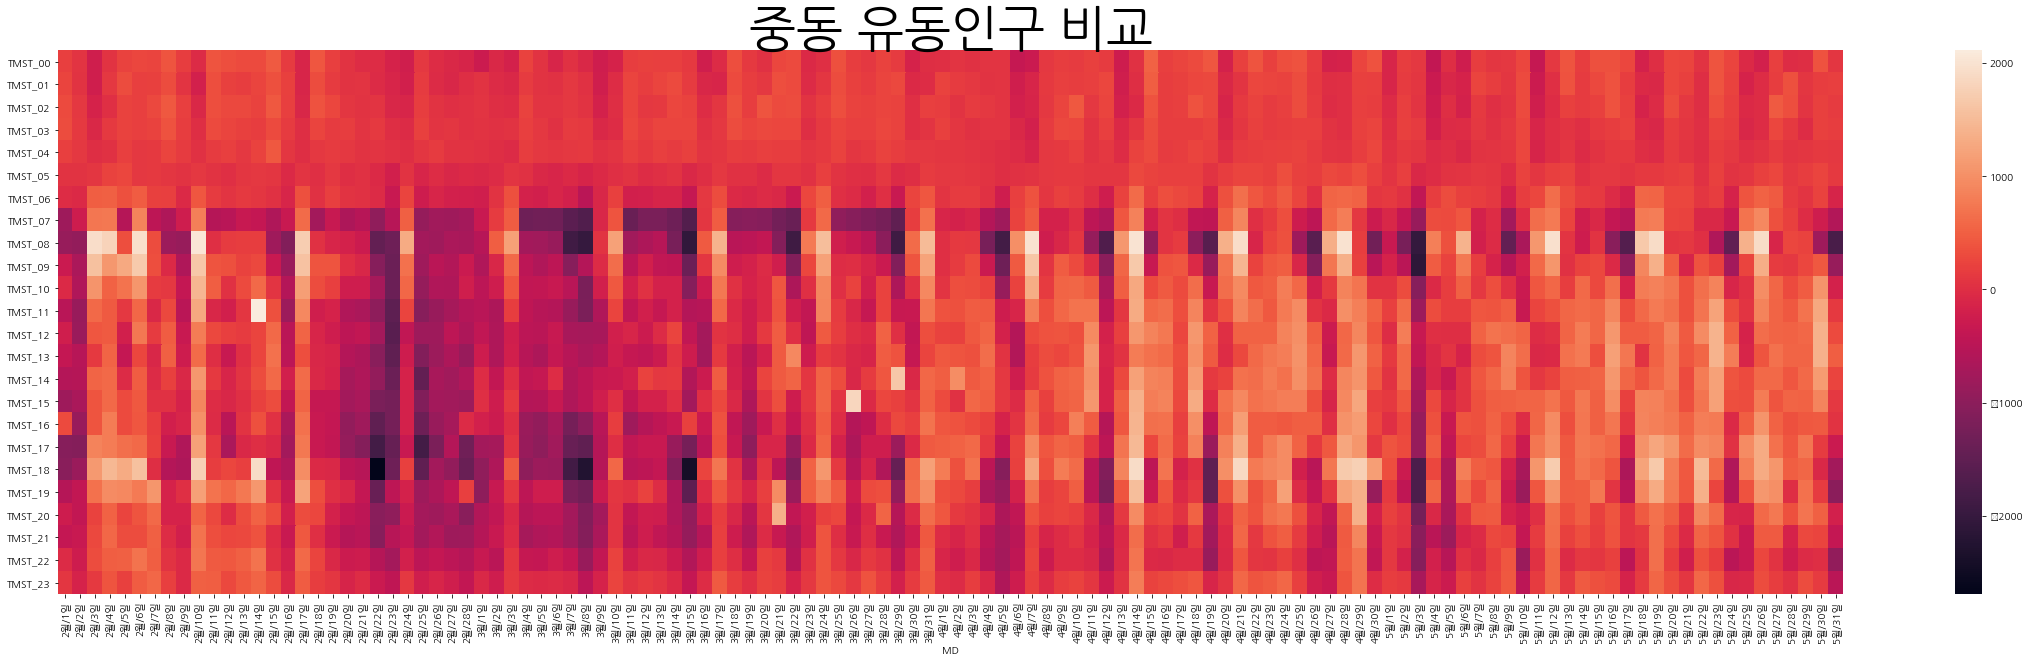

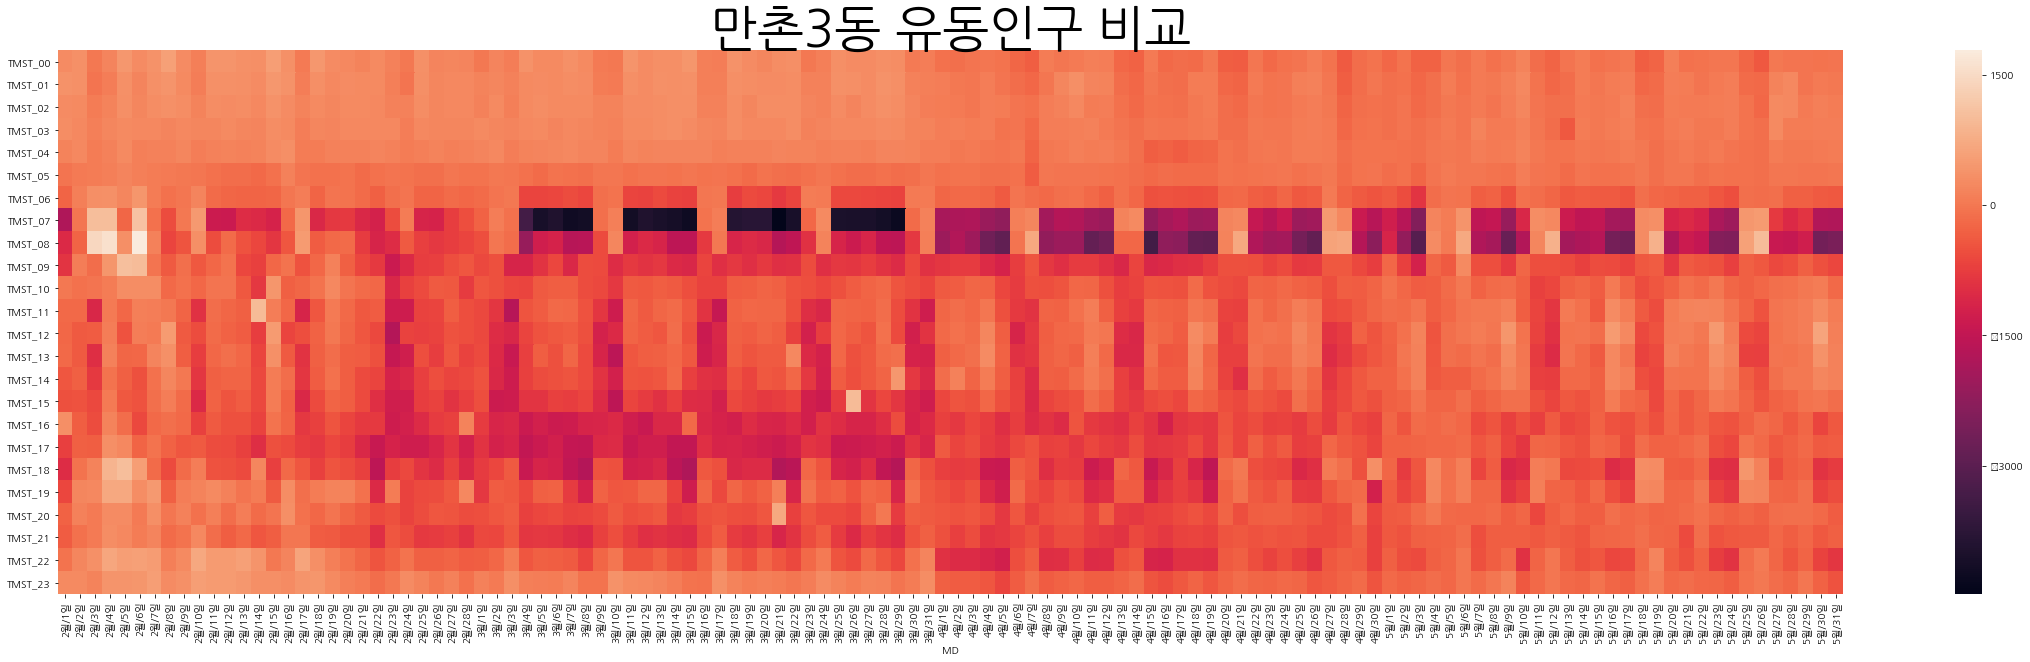

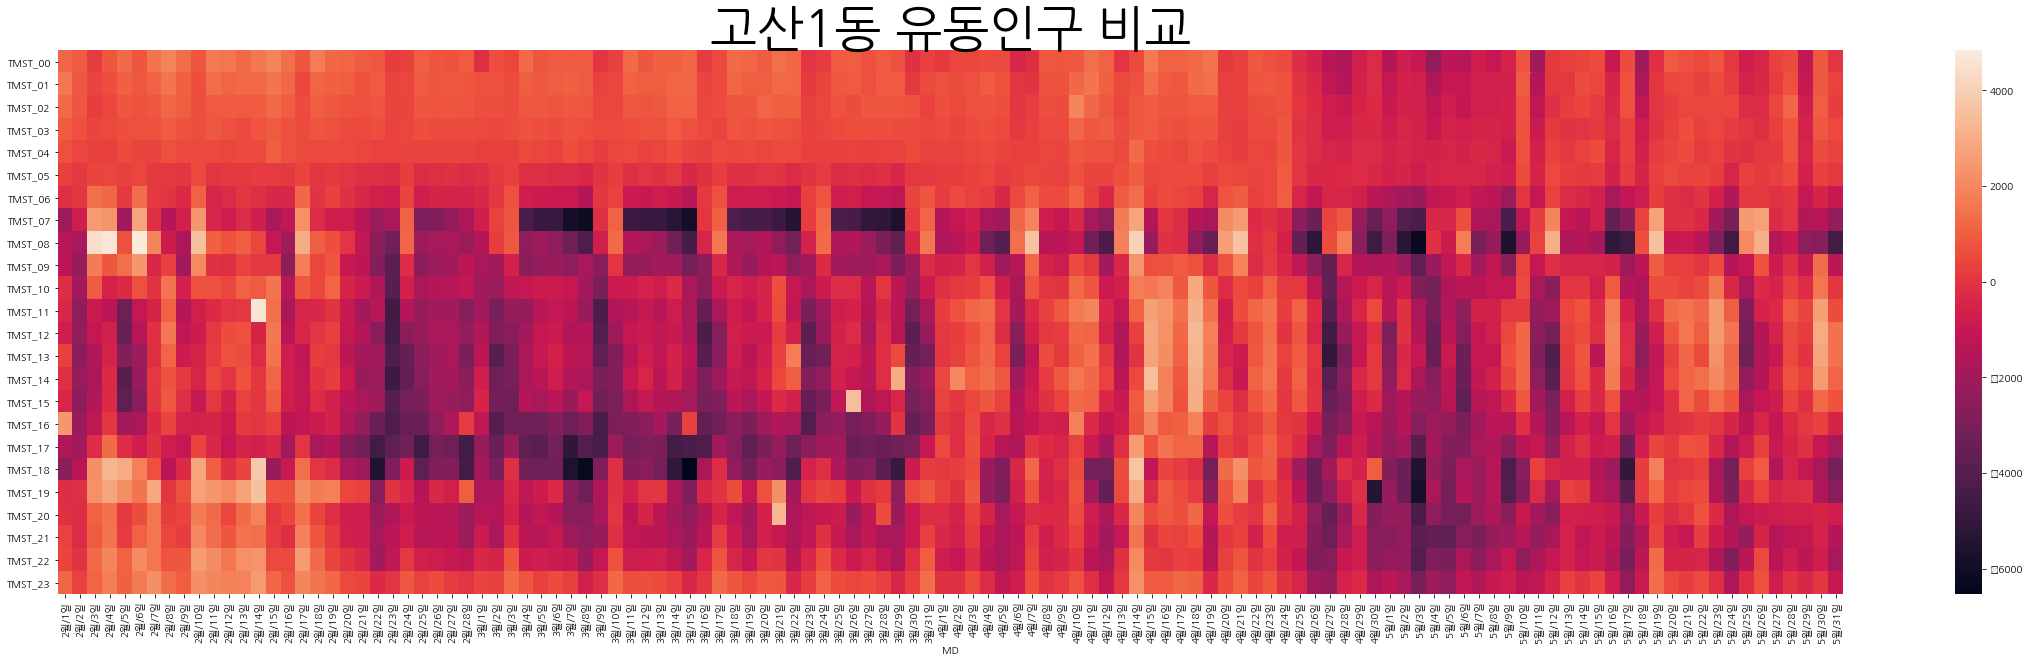

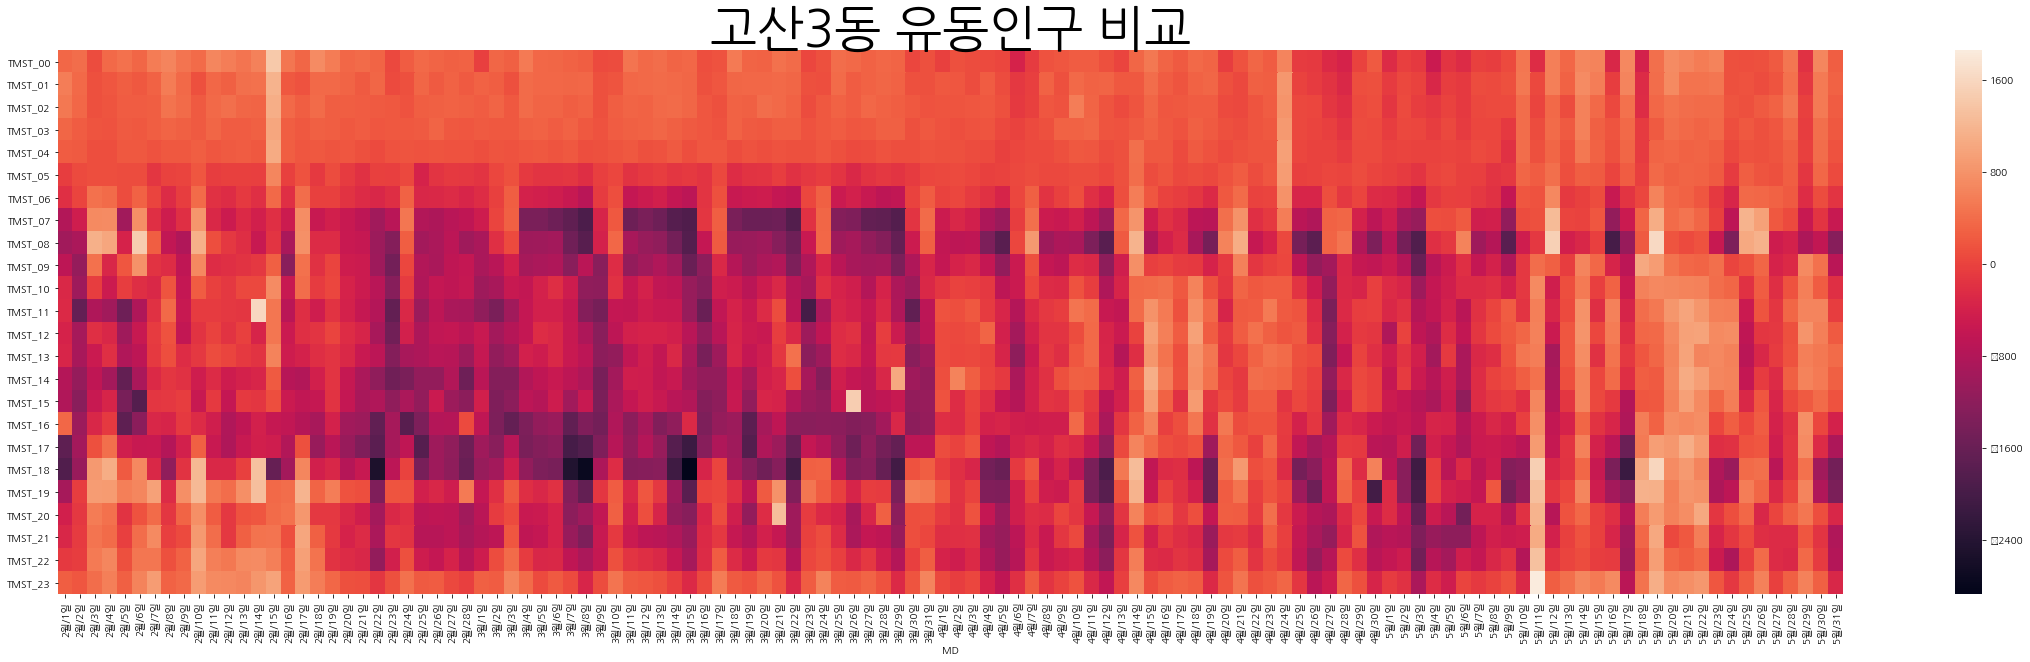

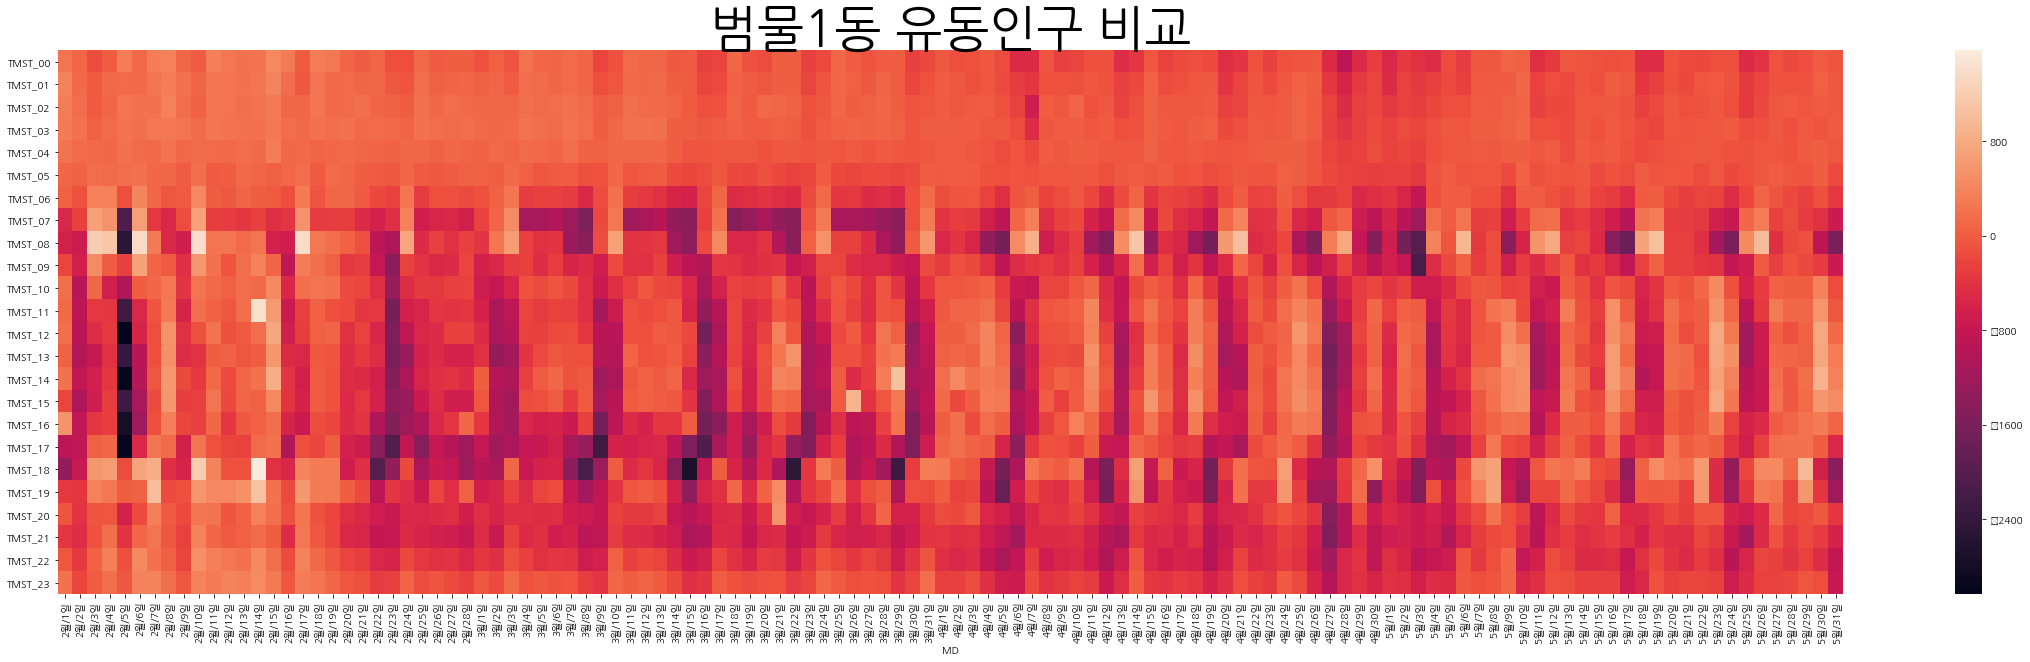

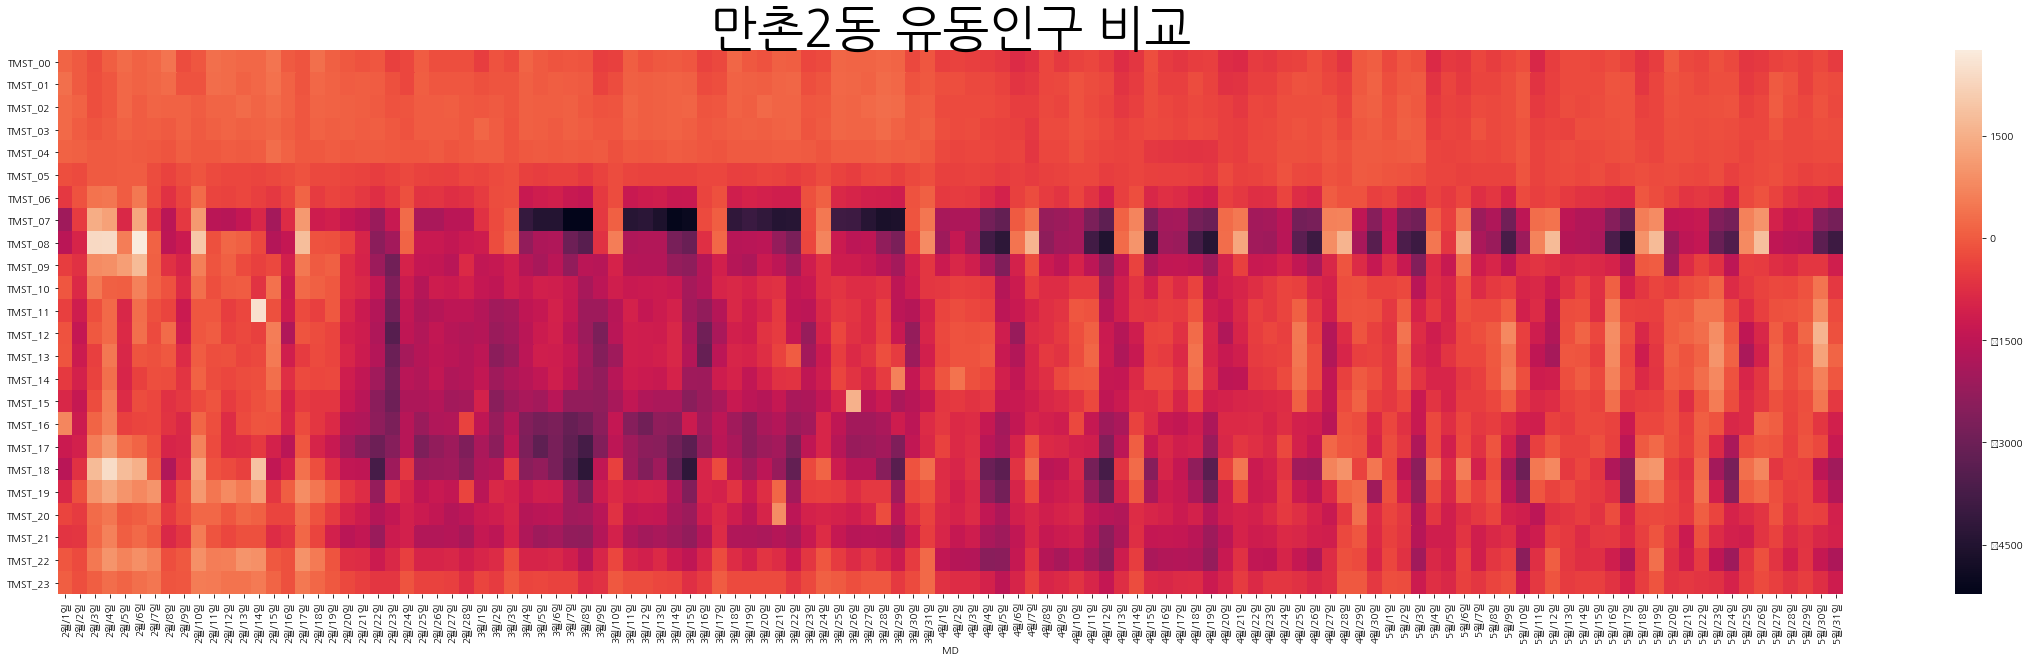

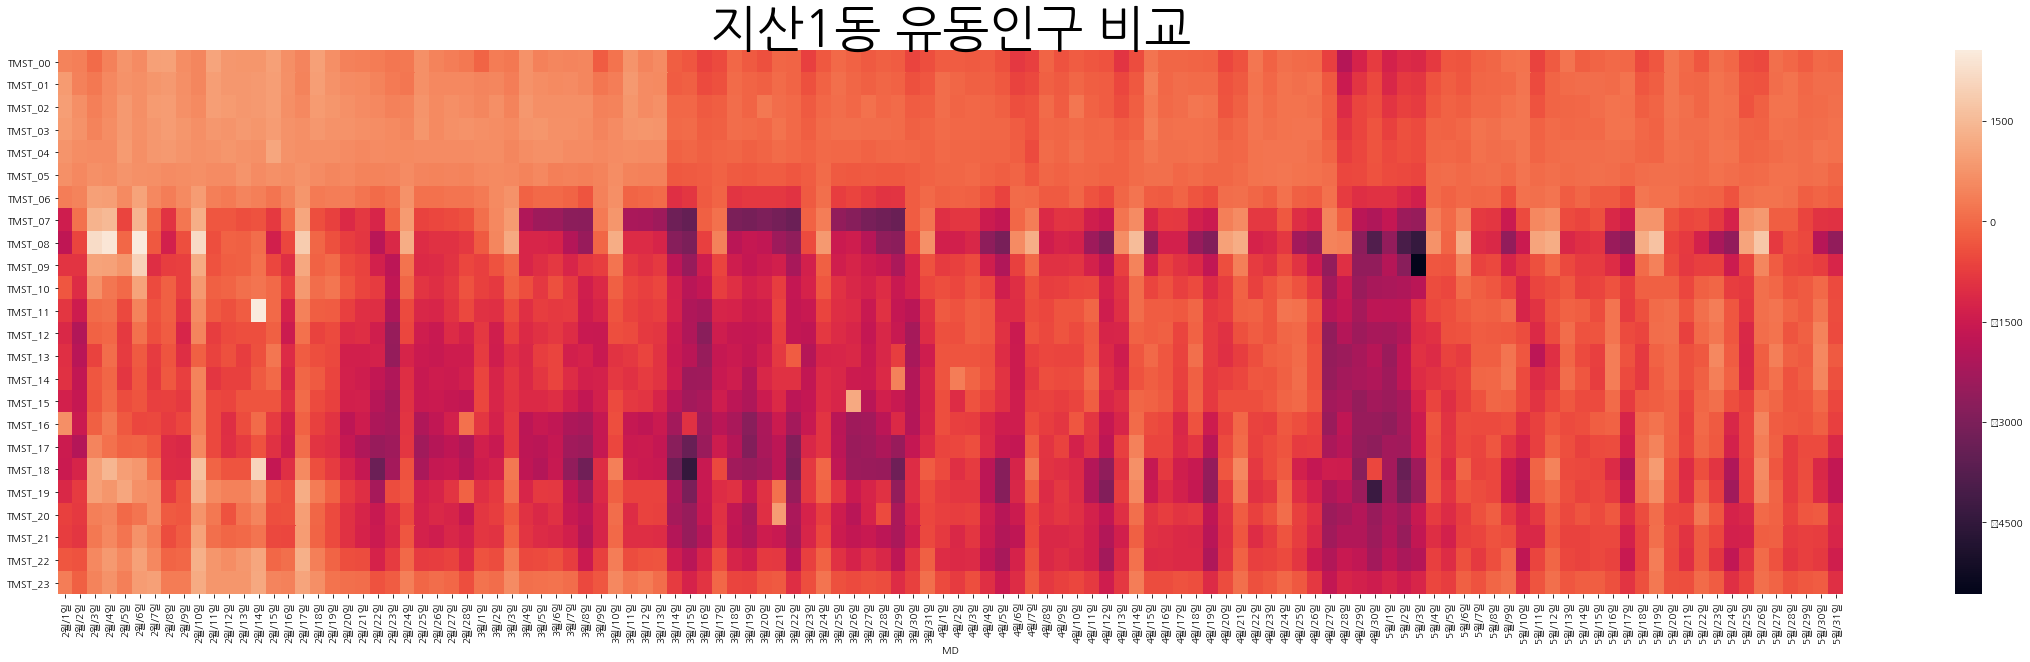

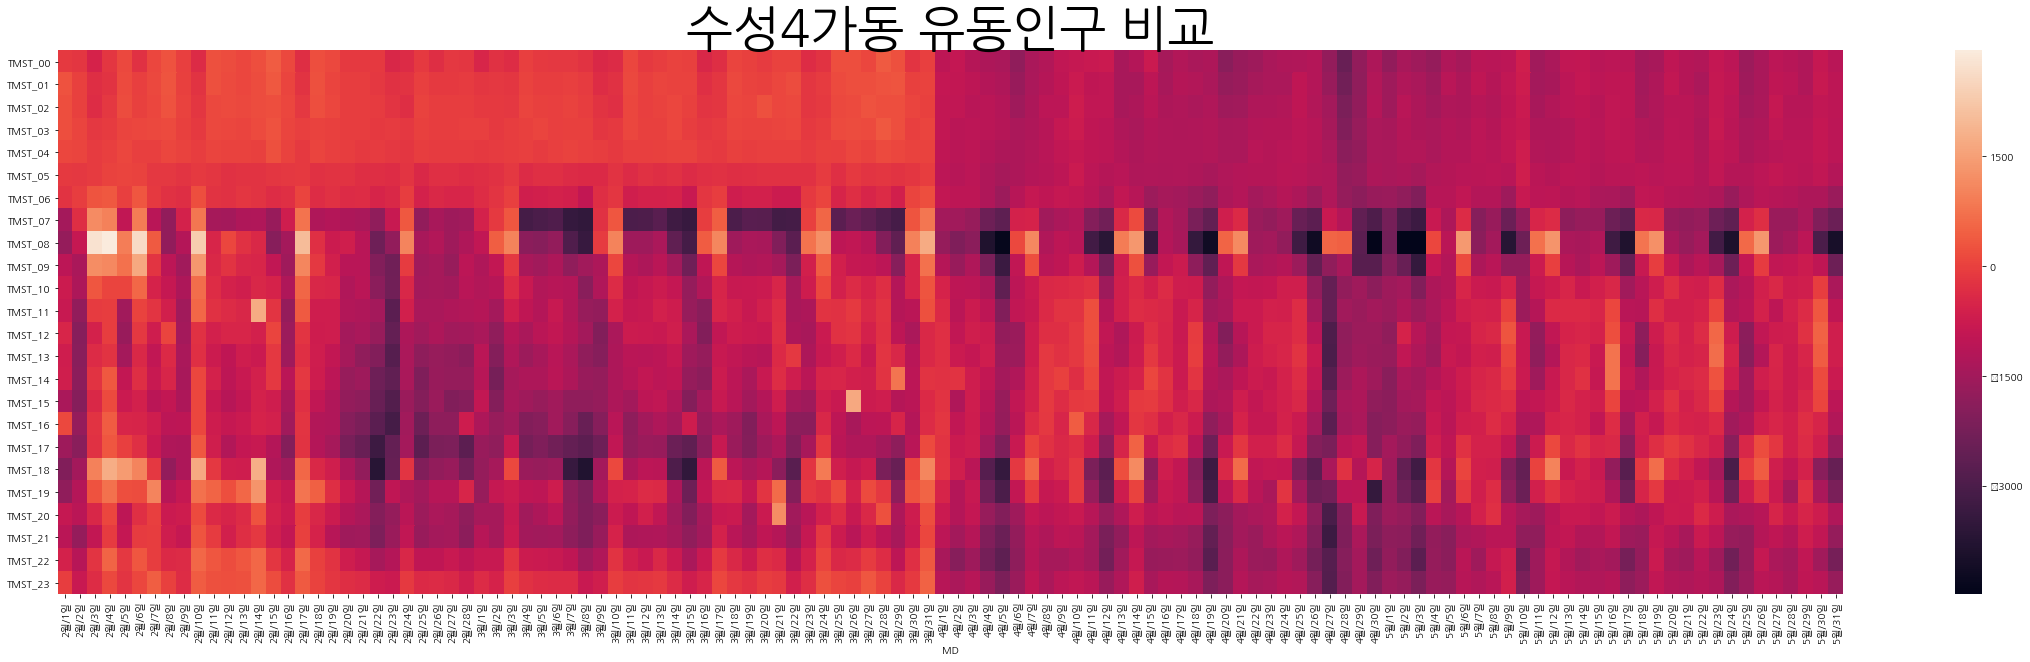

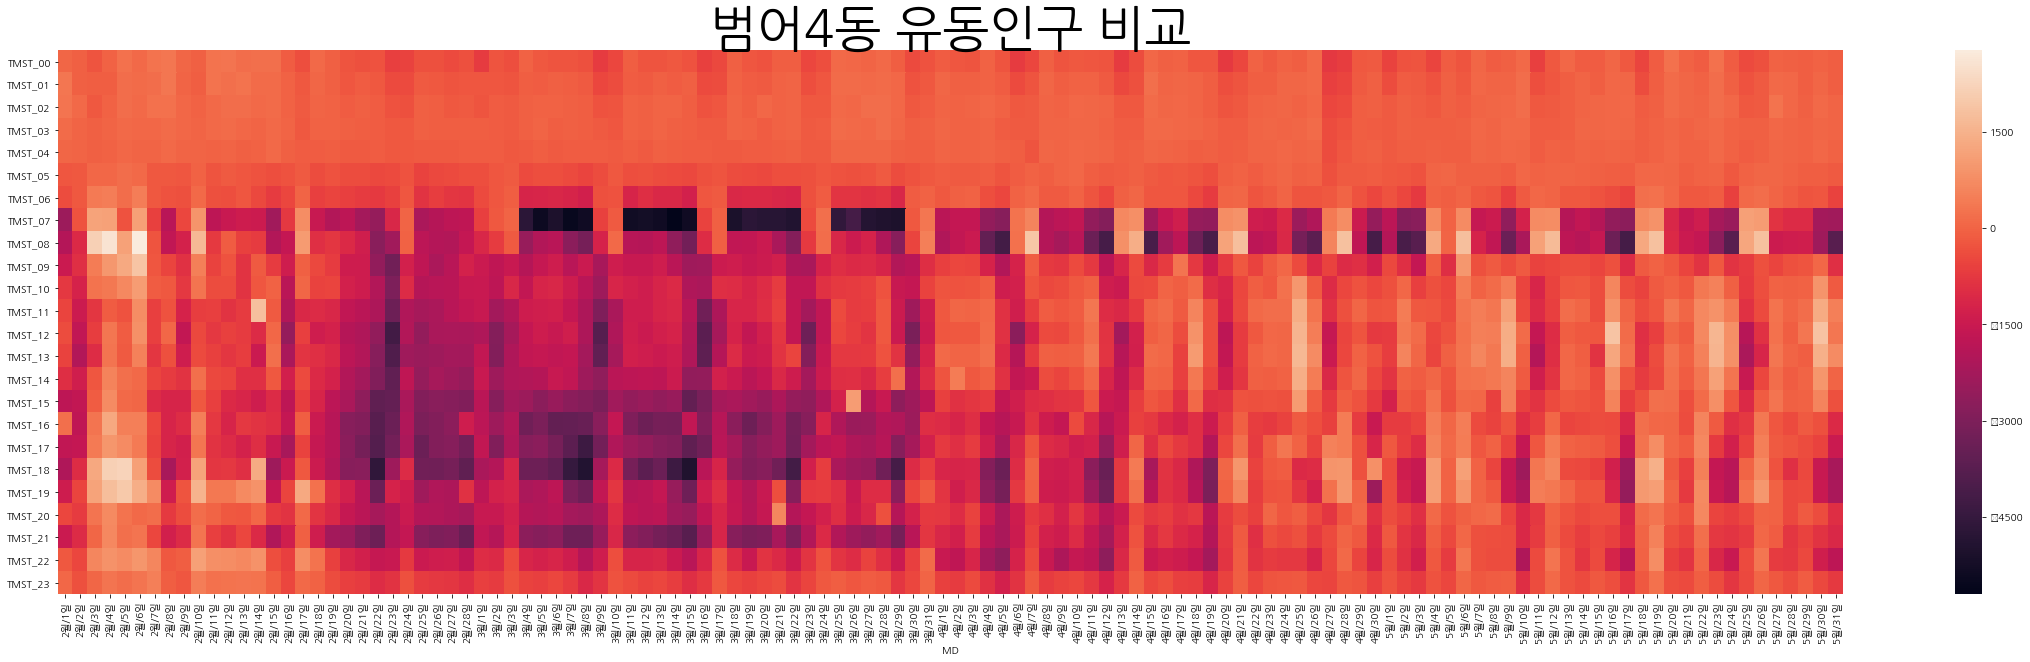

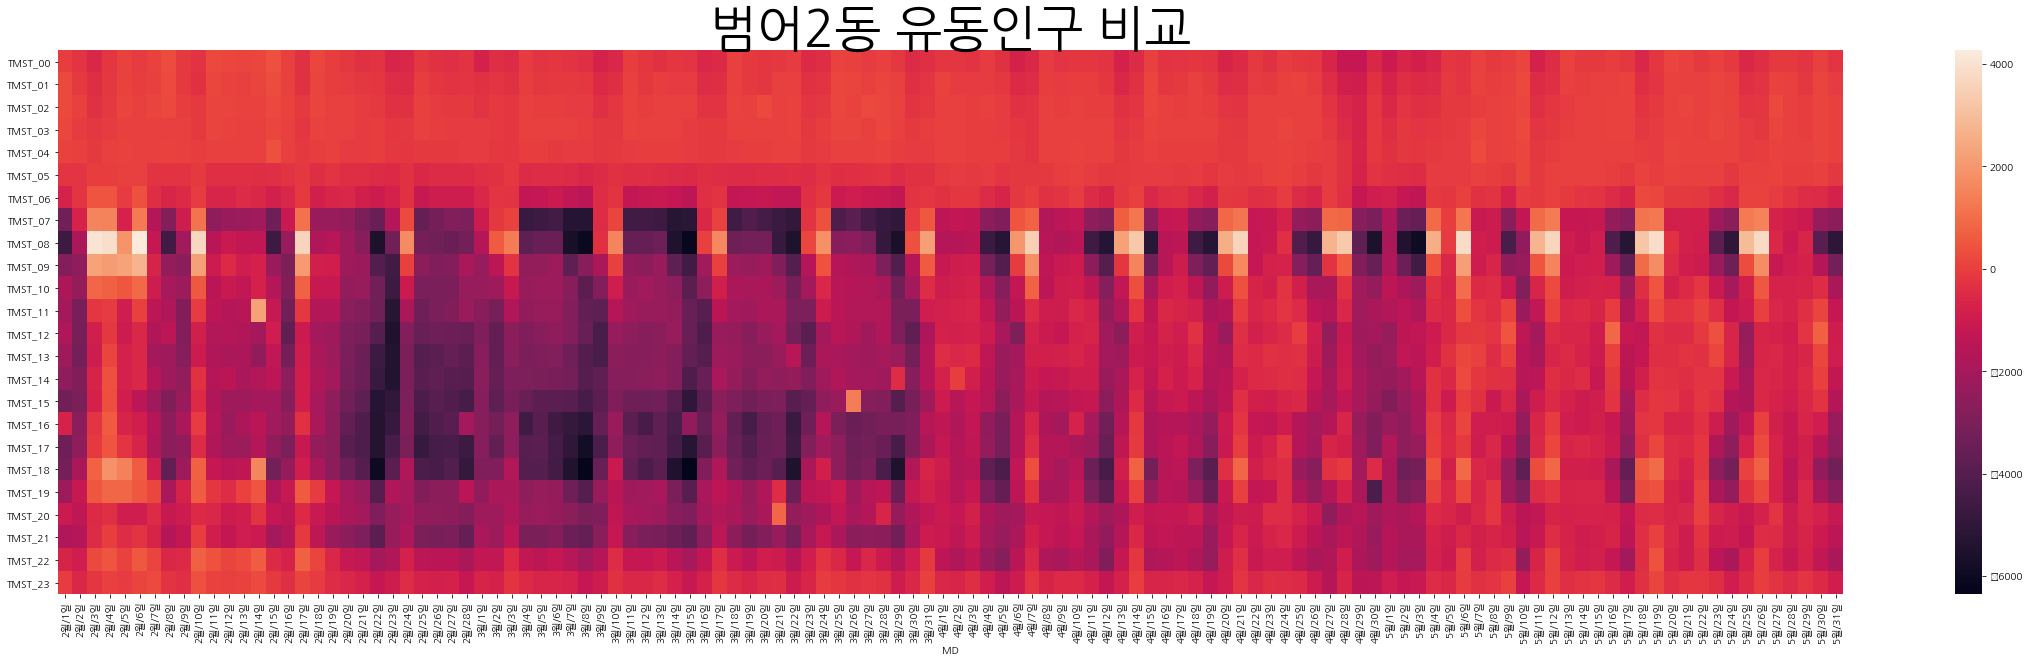

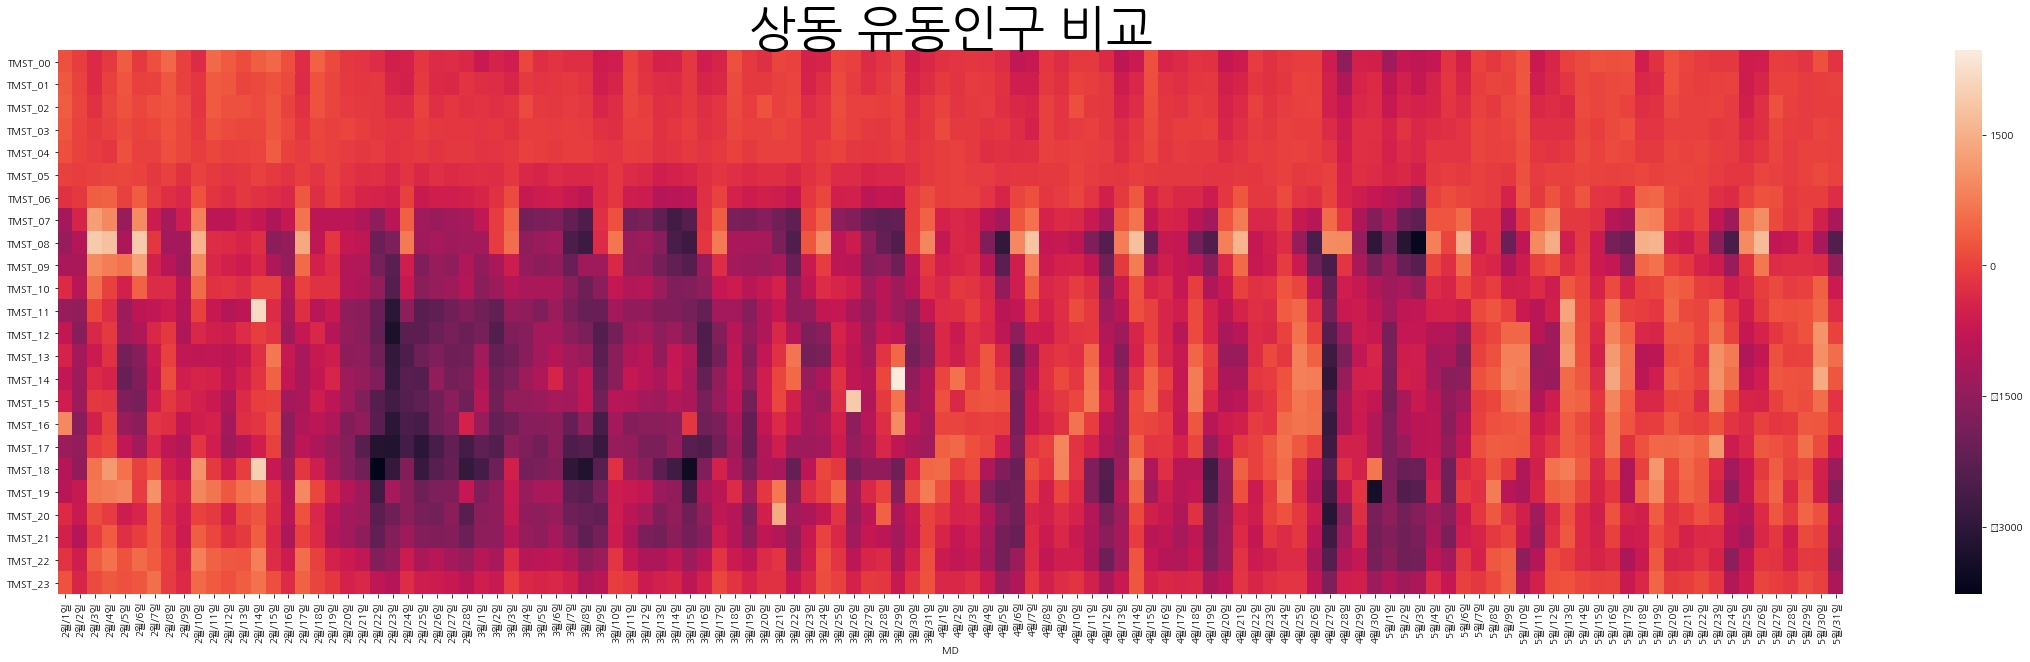

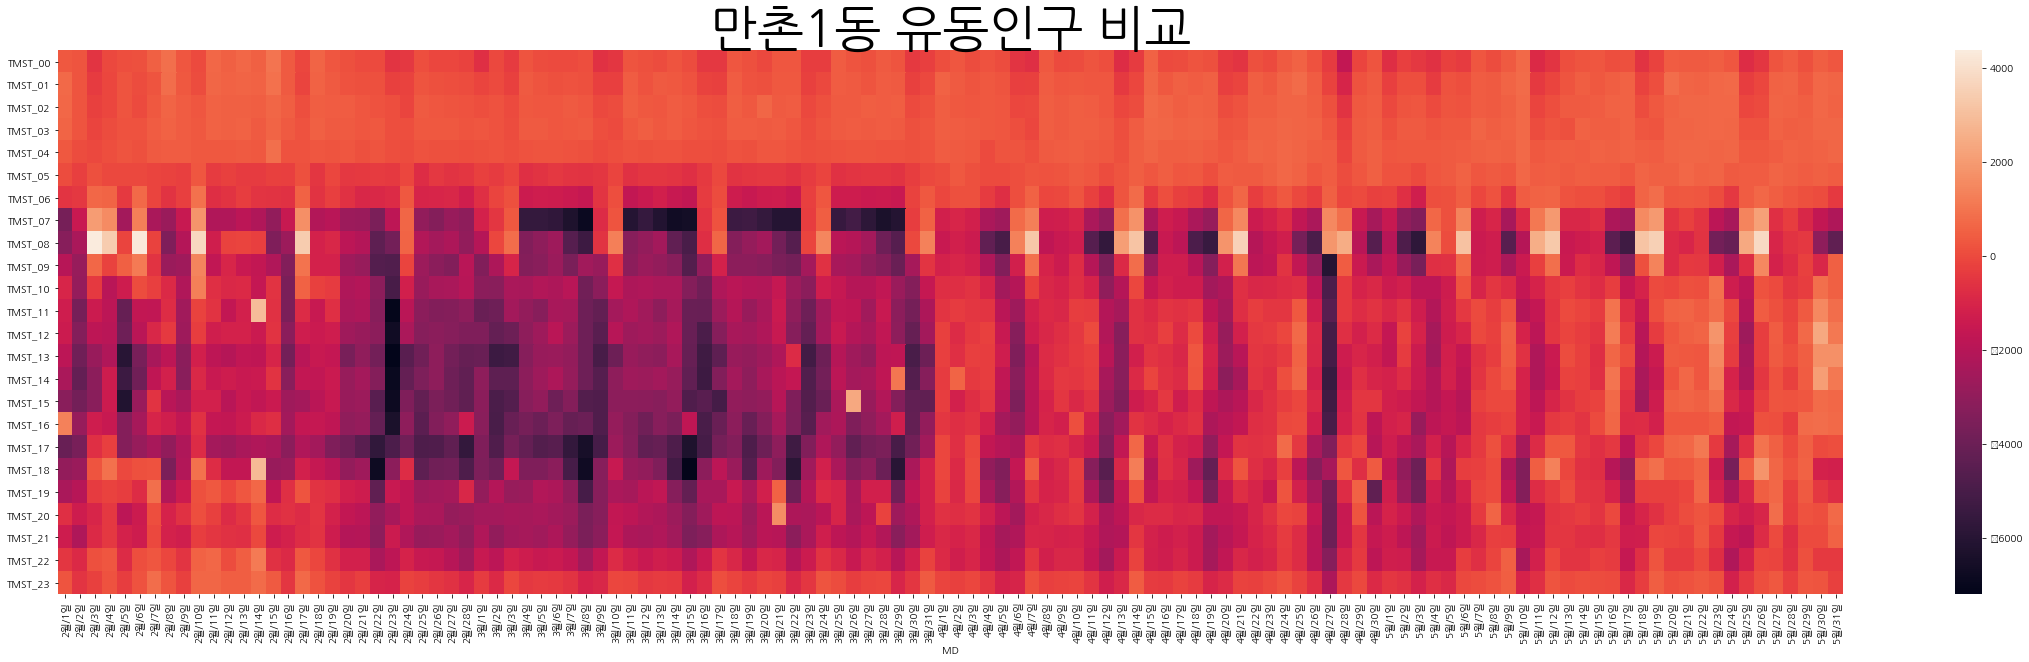

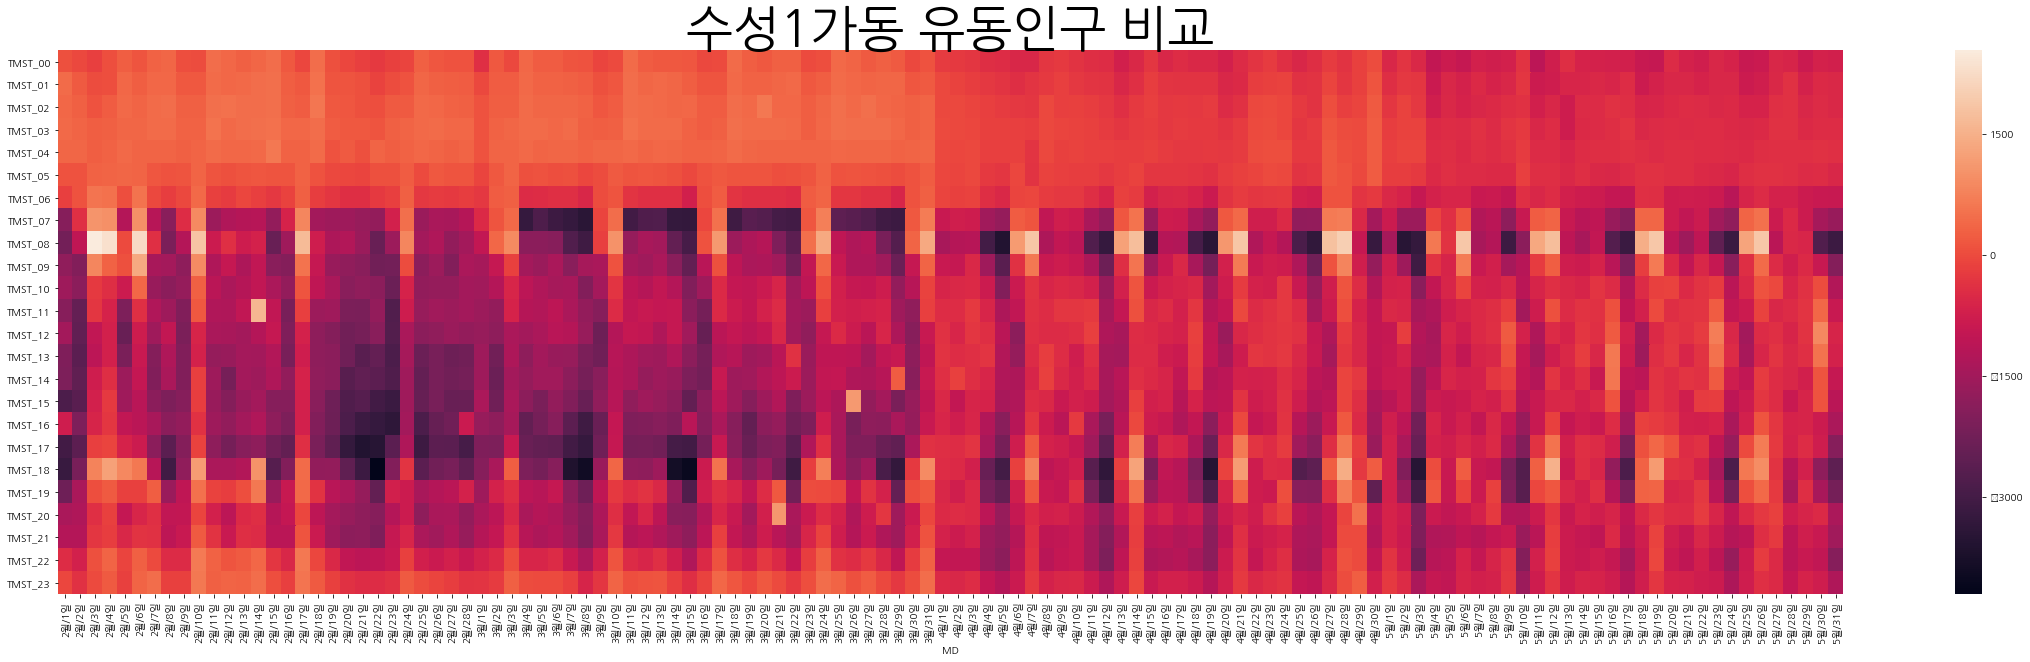

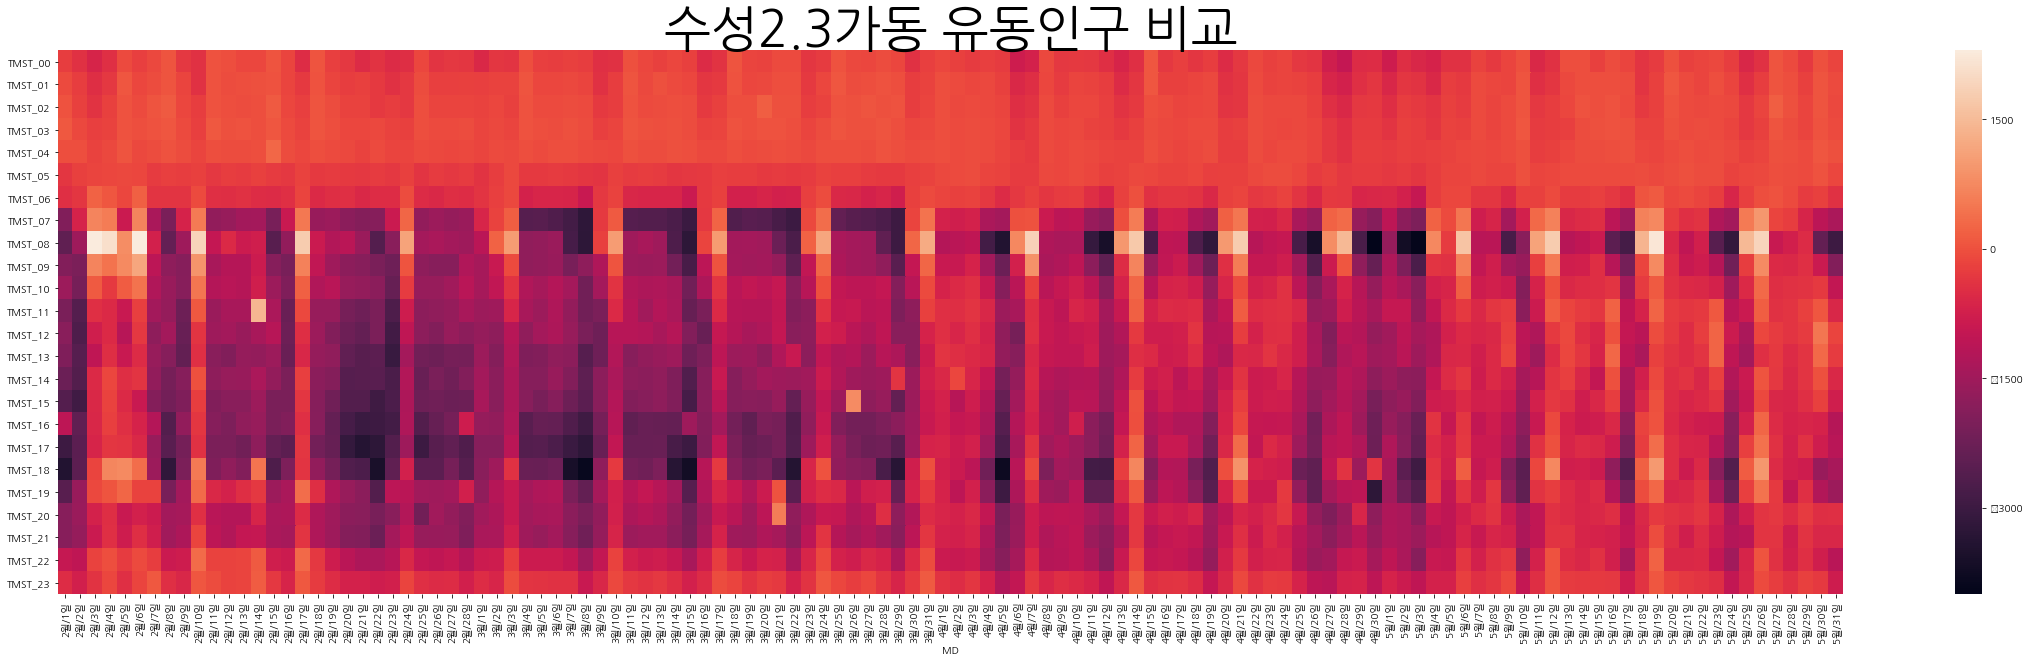

In [162]:
susung = sk_data_TIME[sk_data_TIME.GU_NAME == '대구광역시수성구']

for dist_name in list(susung.HDONG_NM.value_counts().index):
    sample = sk_data_TIME[sk_data_TIME['HDONG_NM'] == dist_name]
    sample['STD_YMD'] = pd.to_datetime(sample.STD_YMD, format = '%Y%m%d')
    
    sample['MD'] = sample['STD_YMD'].map(lambda x: str(x.month) + '월' + '/' + str(x.day) + '일')
    
    sample_2019 = sample[sample['STD_YM'] < 202000]
    sample_2020 = sample[sample['STD_YM'] >= 202000]
    
    sample_2019.index = sample_2019.MD
    sample_2020.index = sample_2020.MD
    
    del sample_2019['MD']
    del sample_2020['MD']
    
    sample_2019 = sample_2019.iloc[:, 6:].T
    sample_2020 = sample_2020.iloc[:, 6:].T

    # 2020년 2월 29일 삭제
    del sample_2020['2월/29일']
    sample_total = sample_2020 - sample_2019
    
    plt.figure(figsize = (40,10))
    sns.heatmap(sample_total)
    plt.title(f'{dist_name} 유동인구 비교', fontsize = 50)
    
#     sample_total.astype(int).style.background_gradient(cmap='summer', axis = 1)

### 3.4 대구광역시 종로구

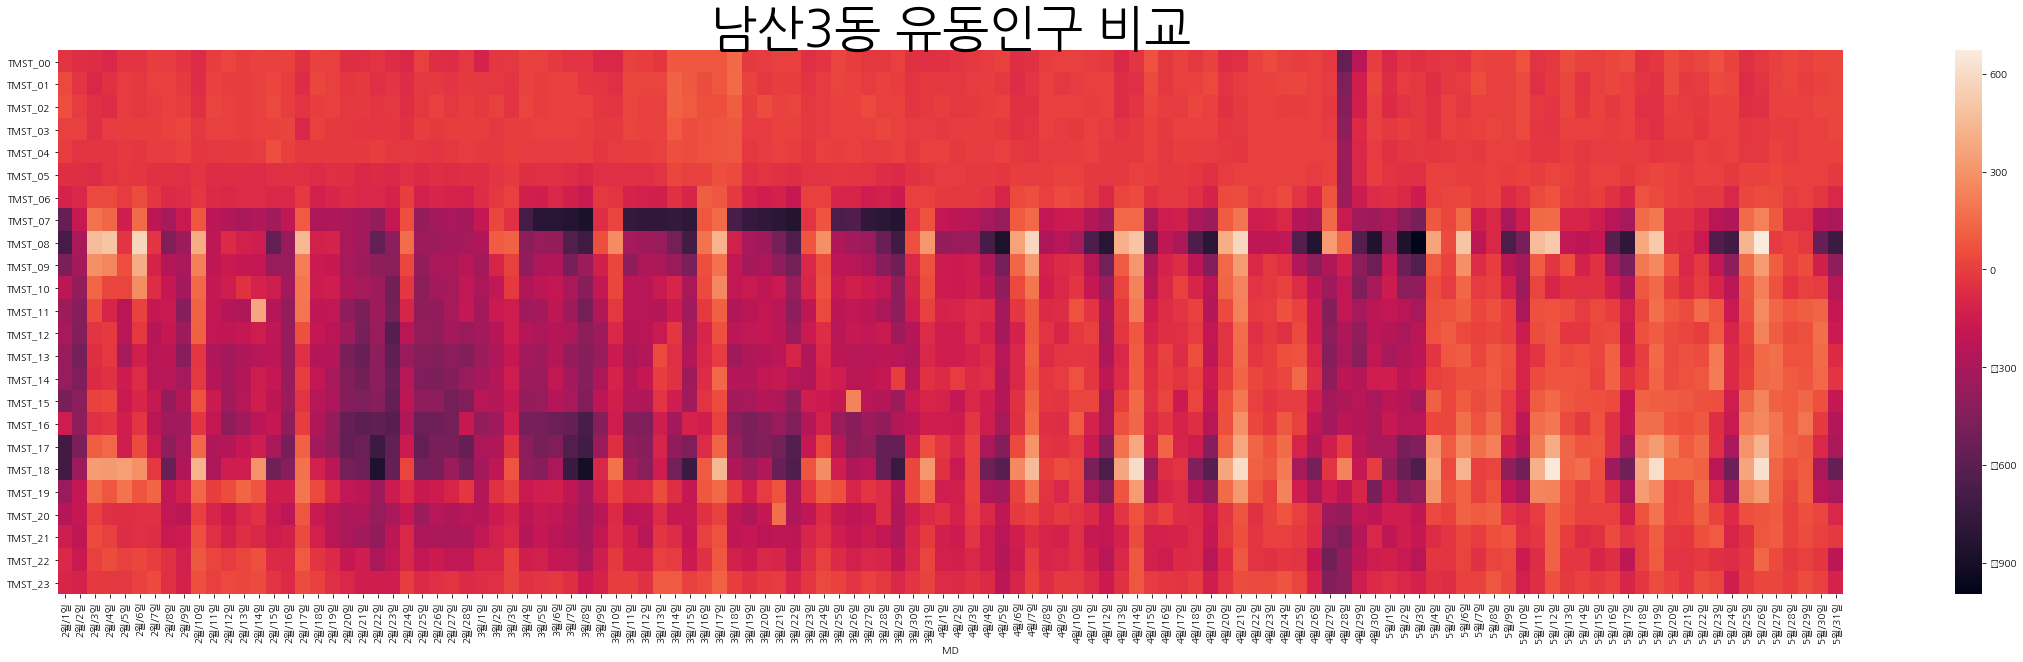

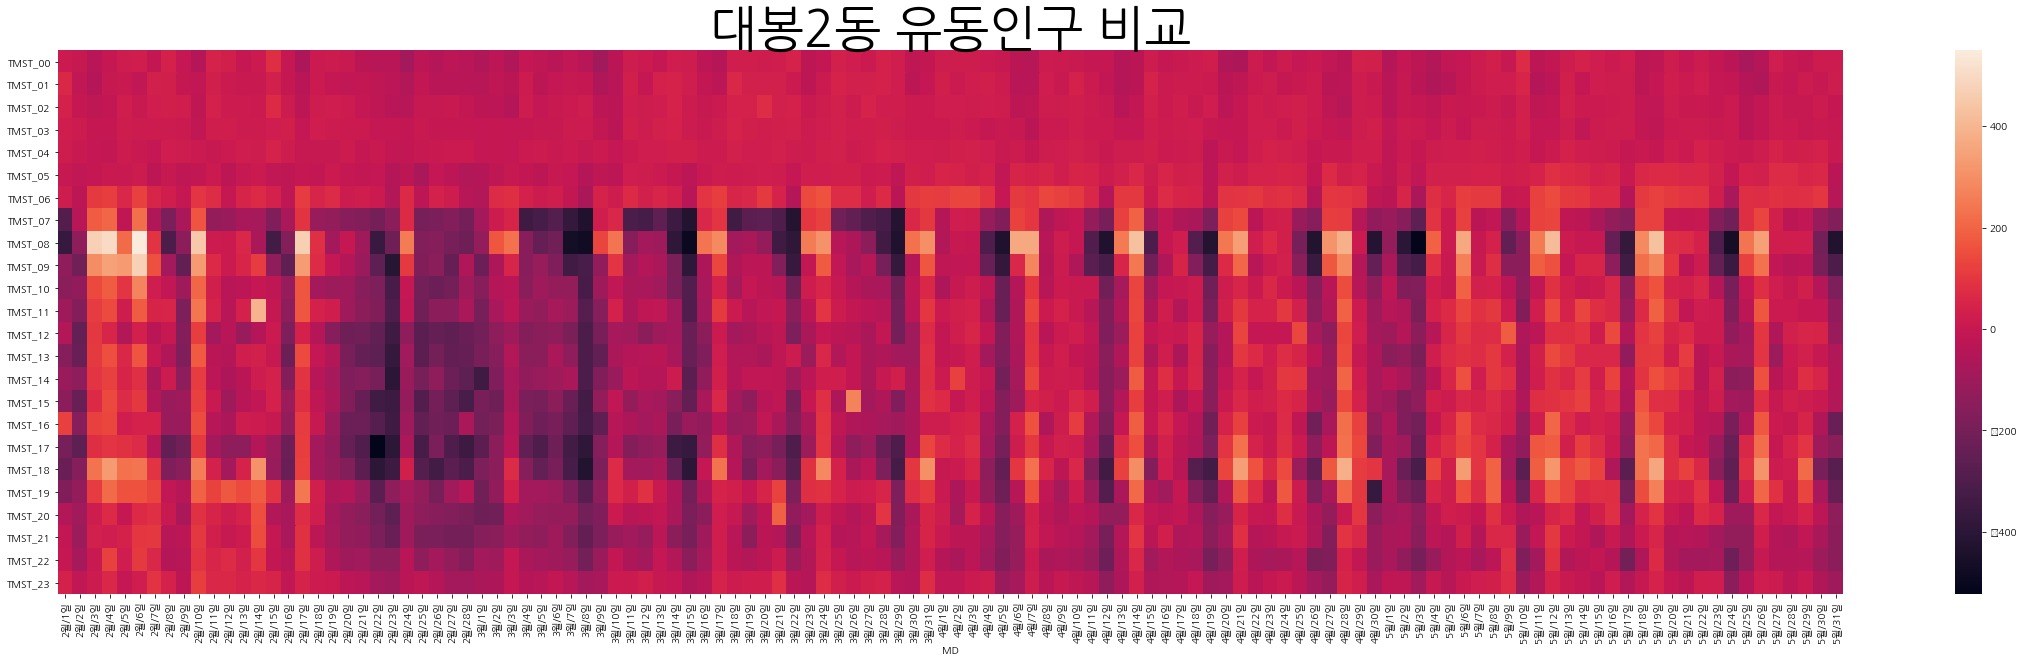

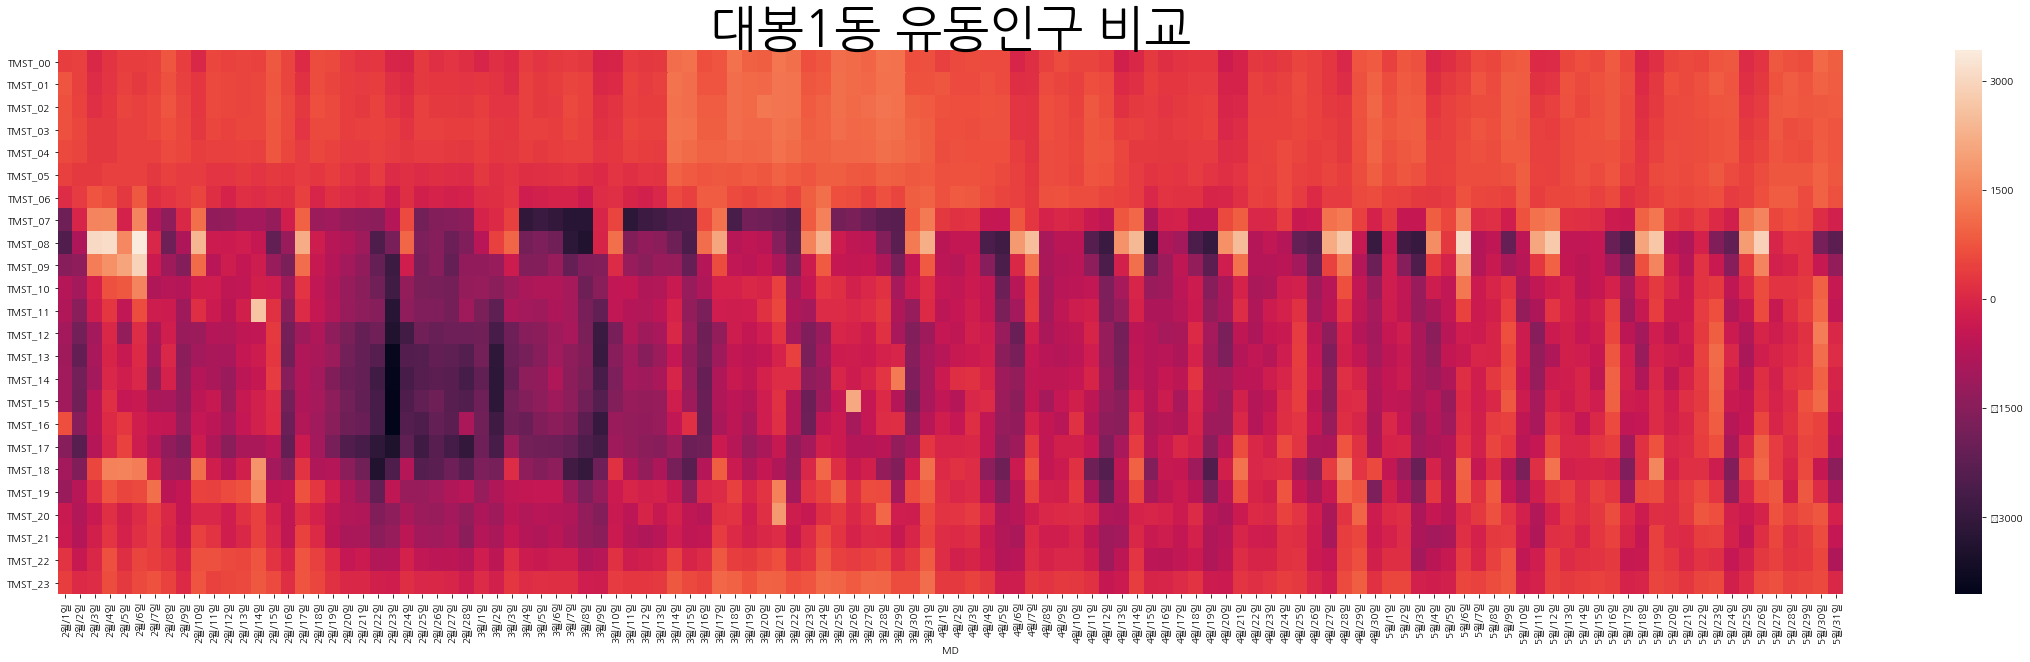

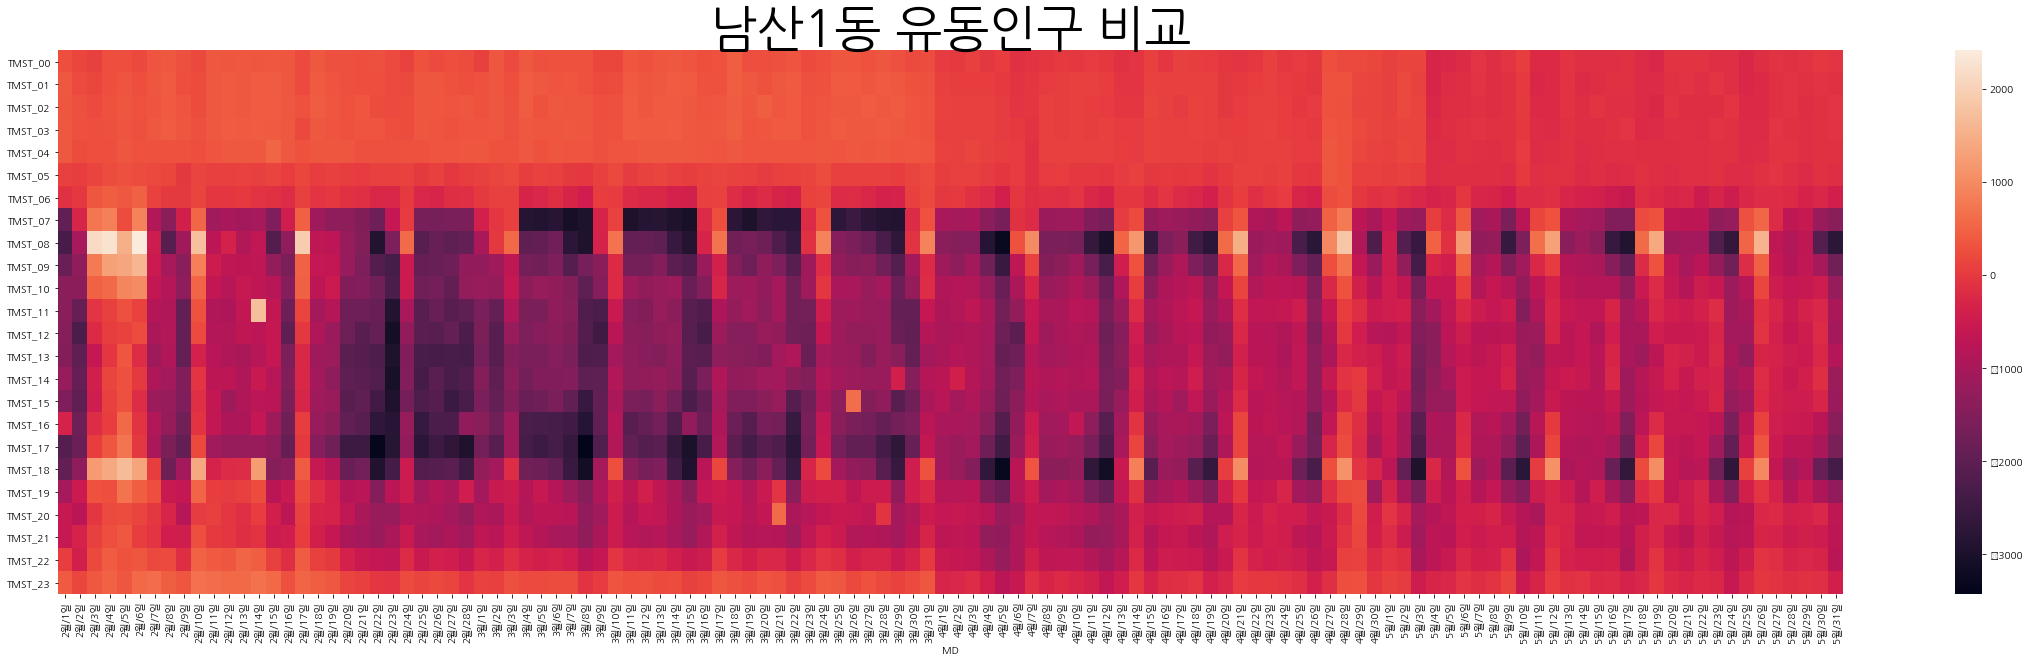

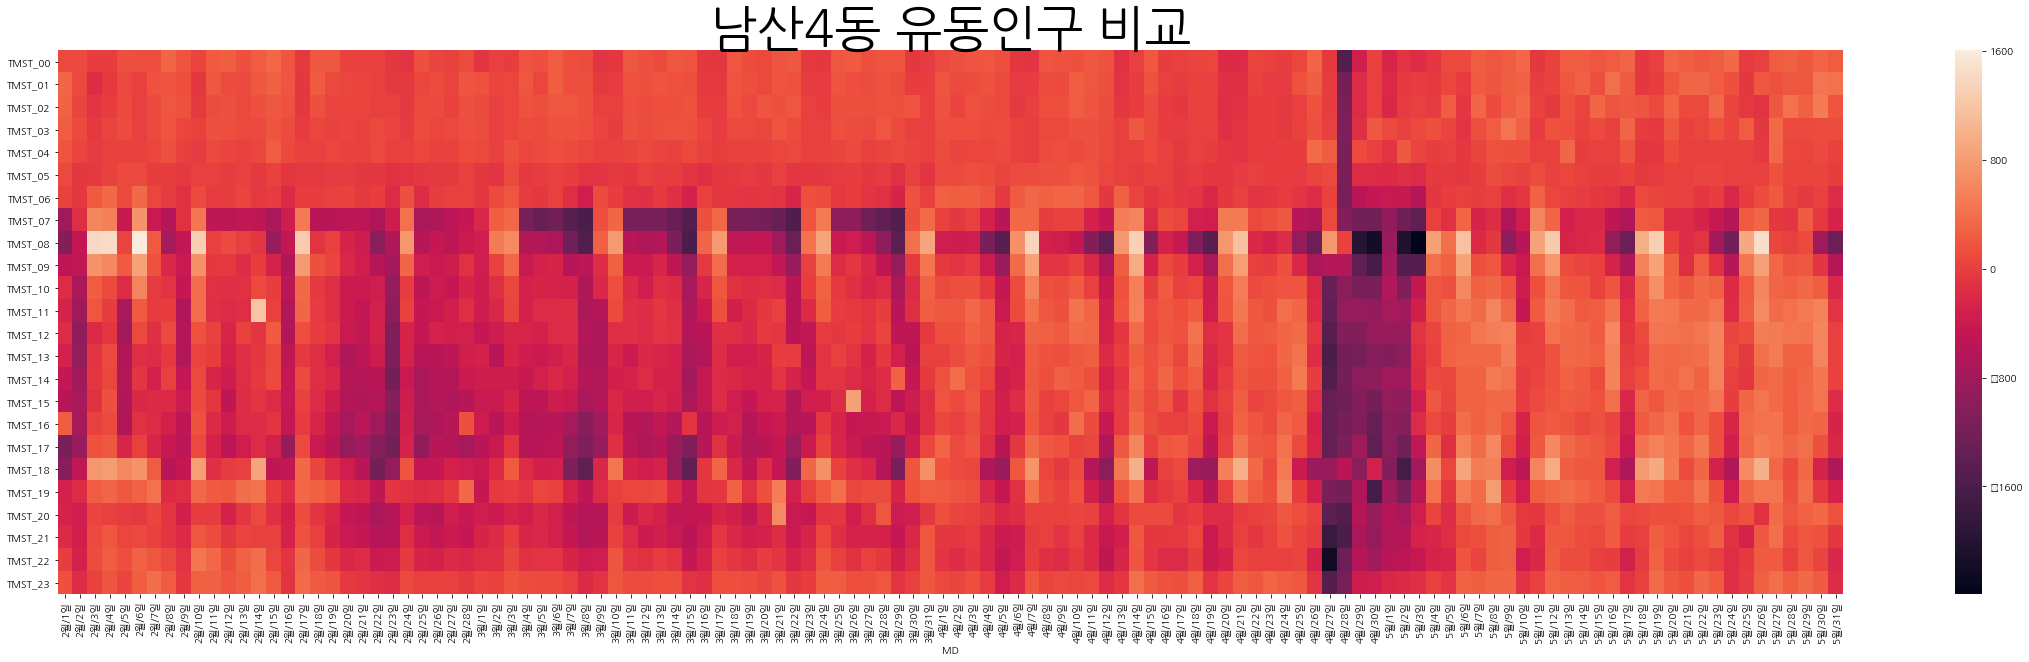

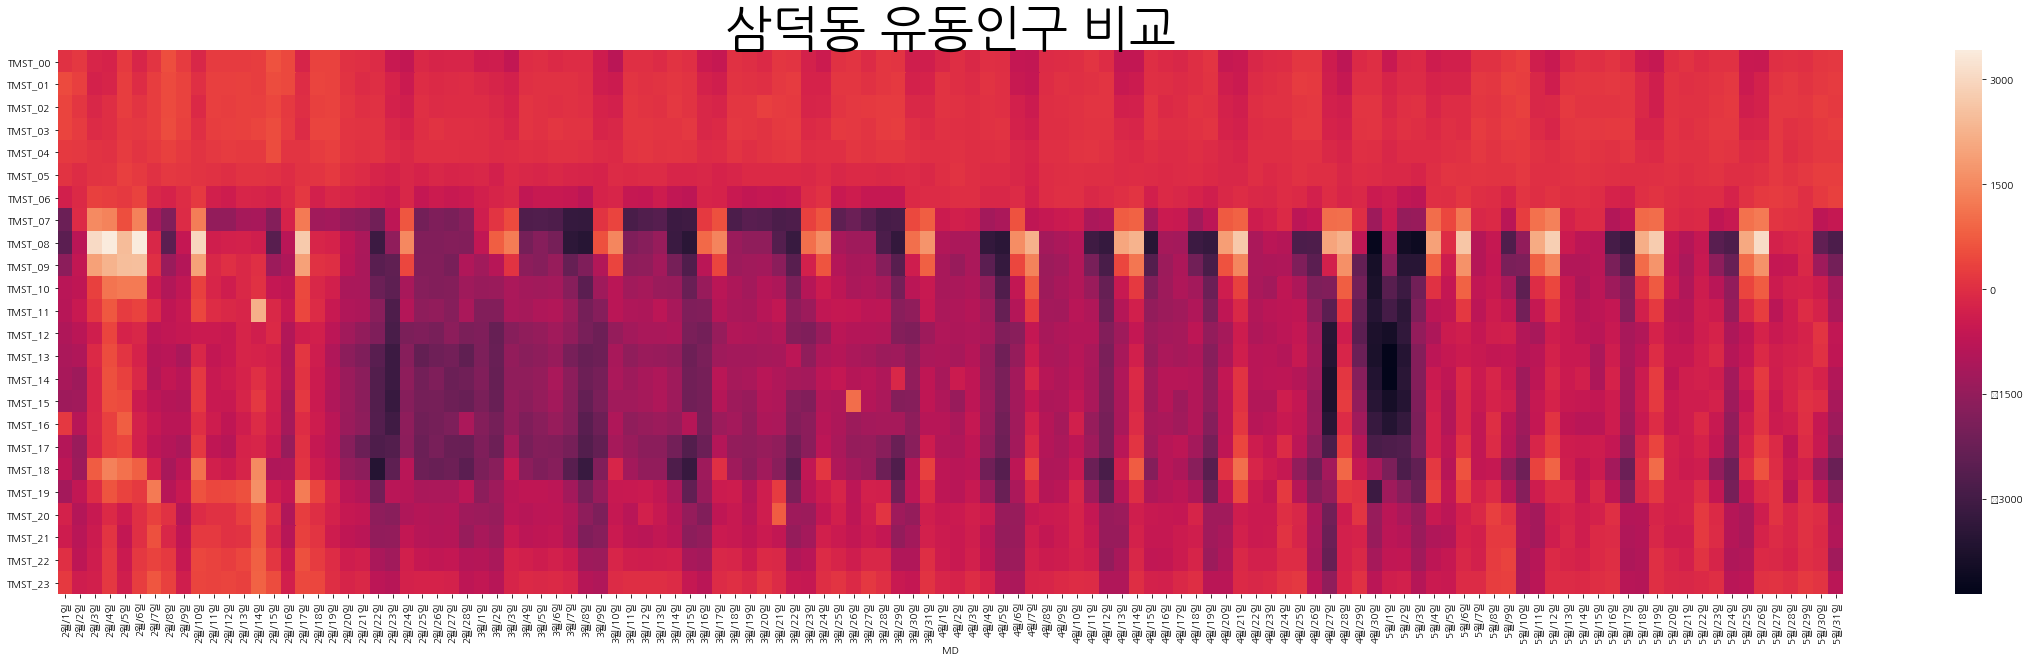

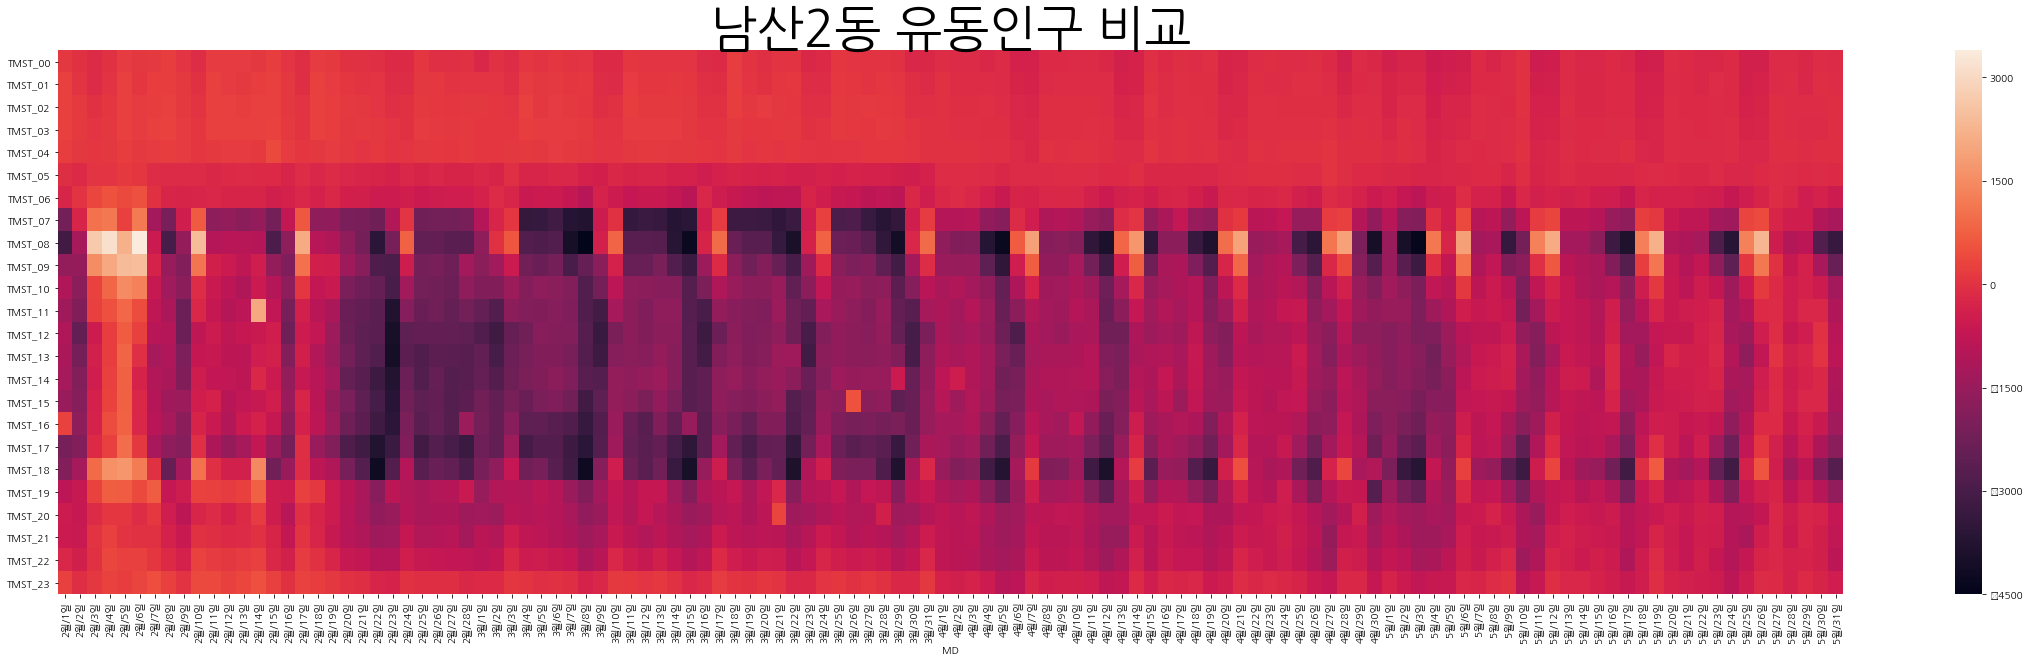

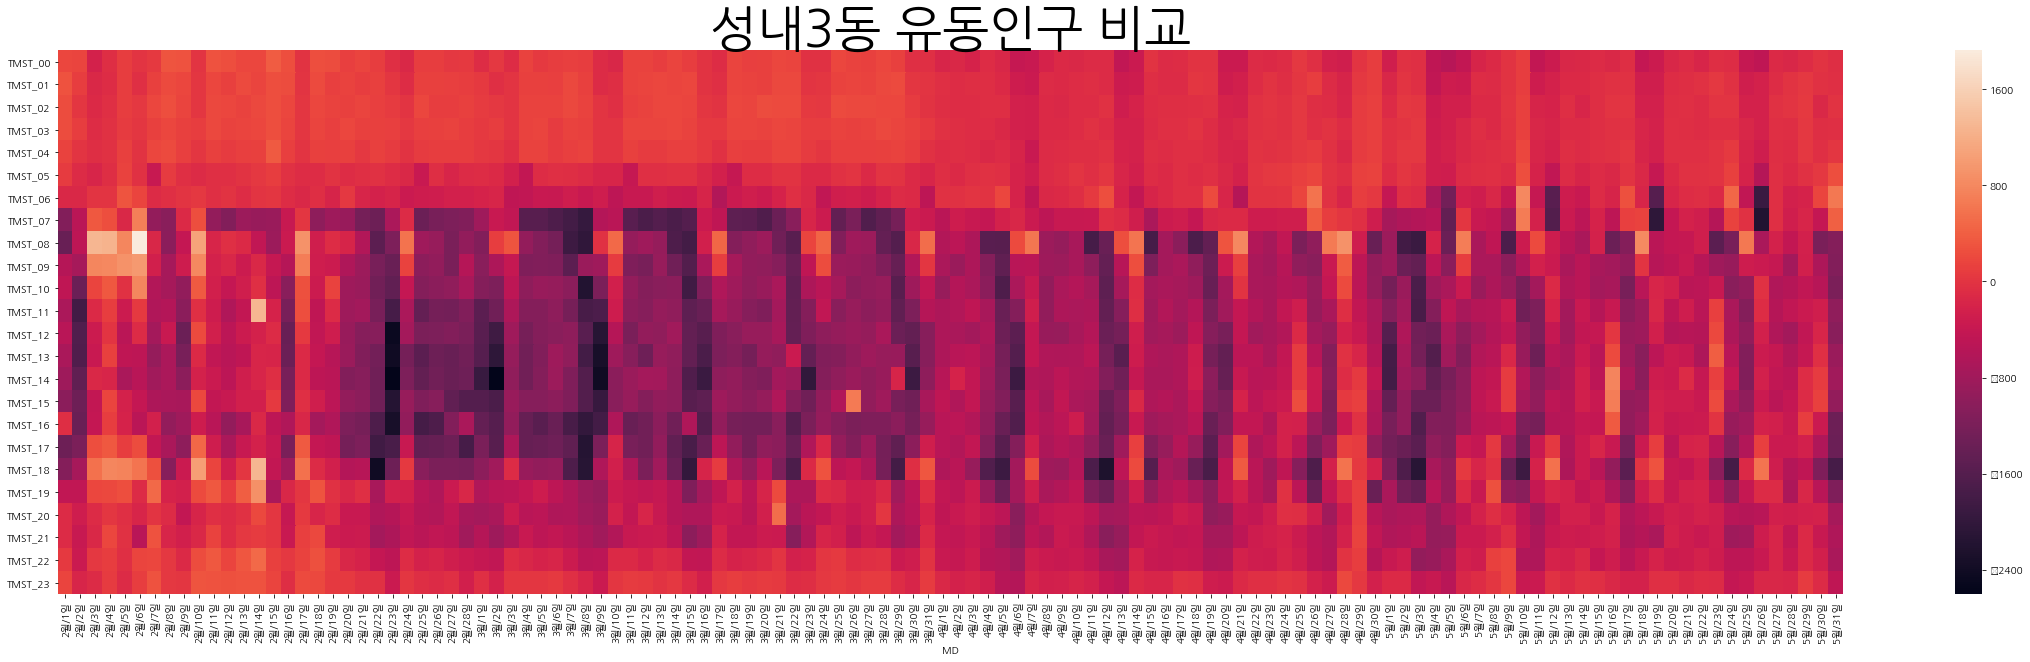

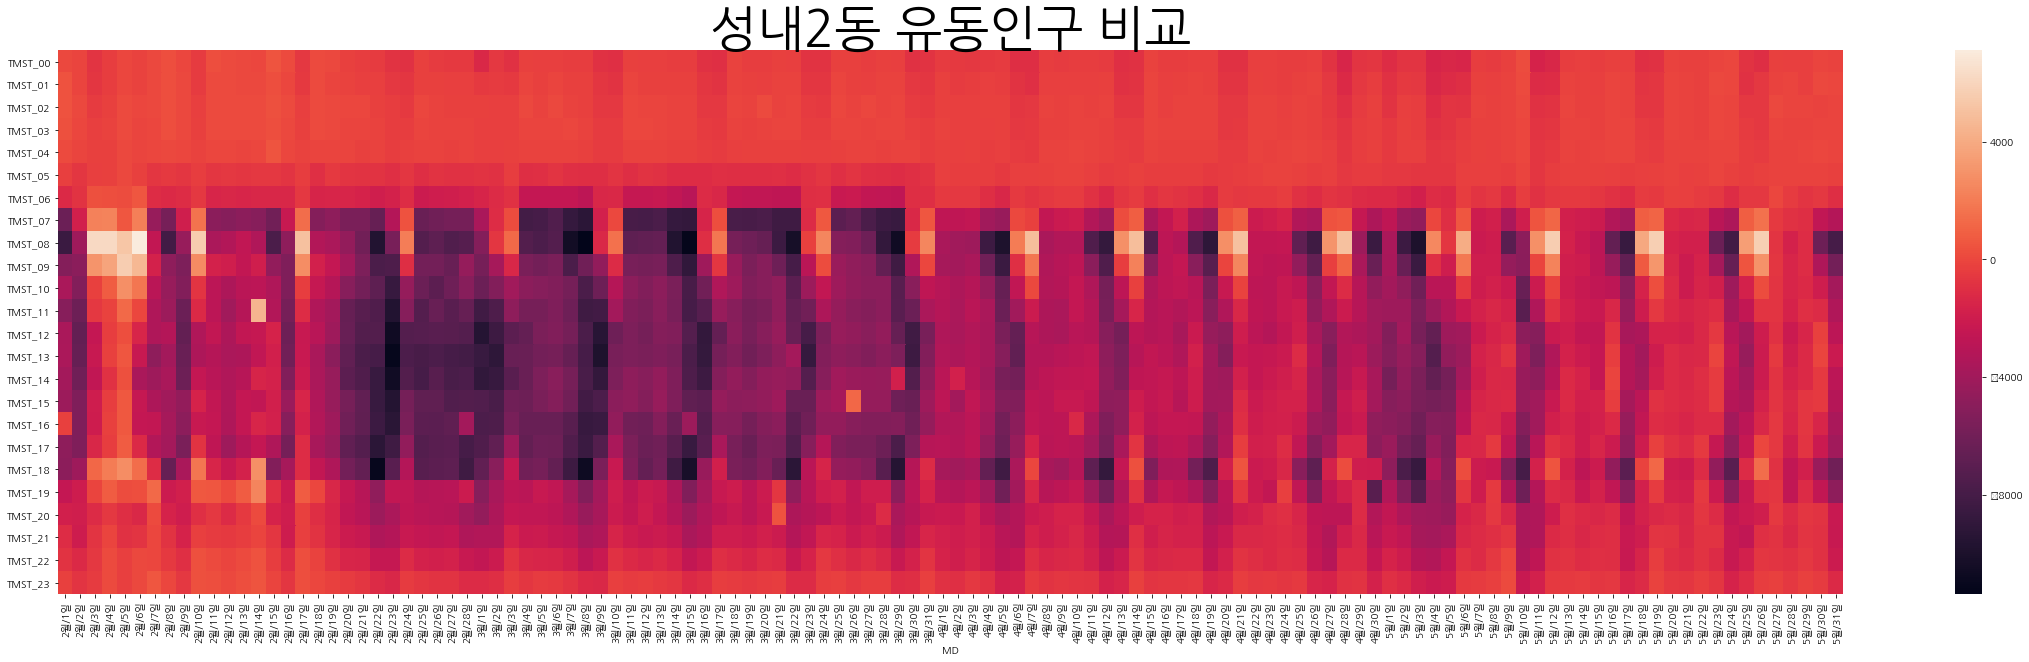

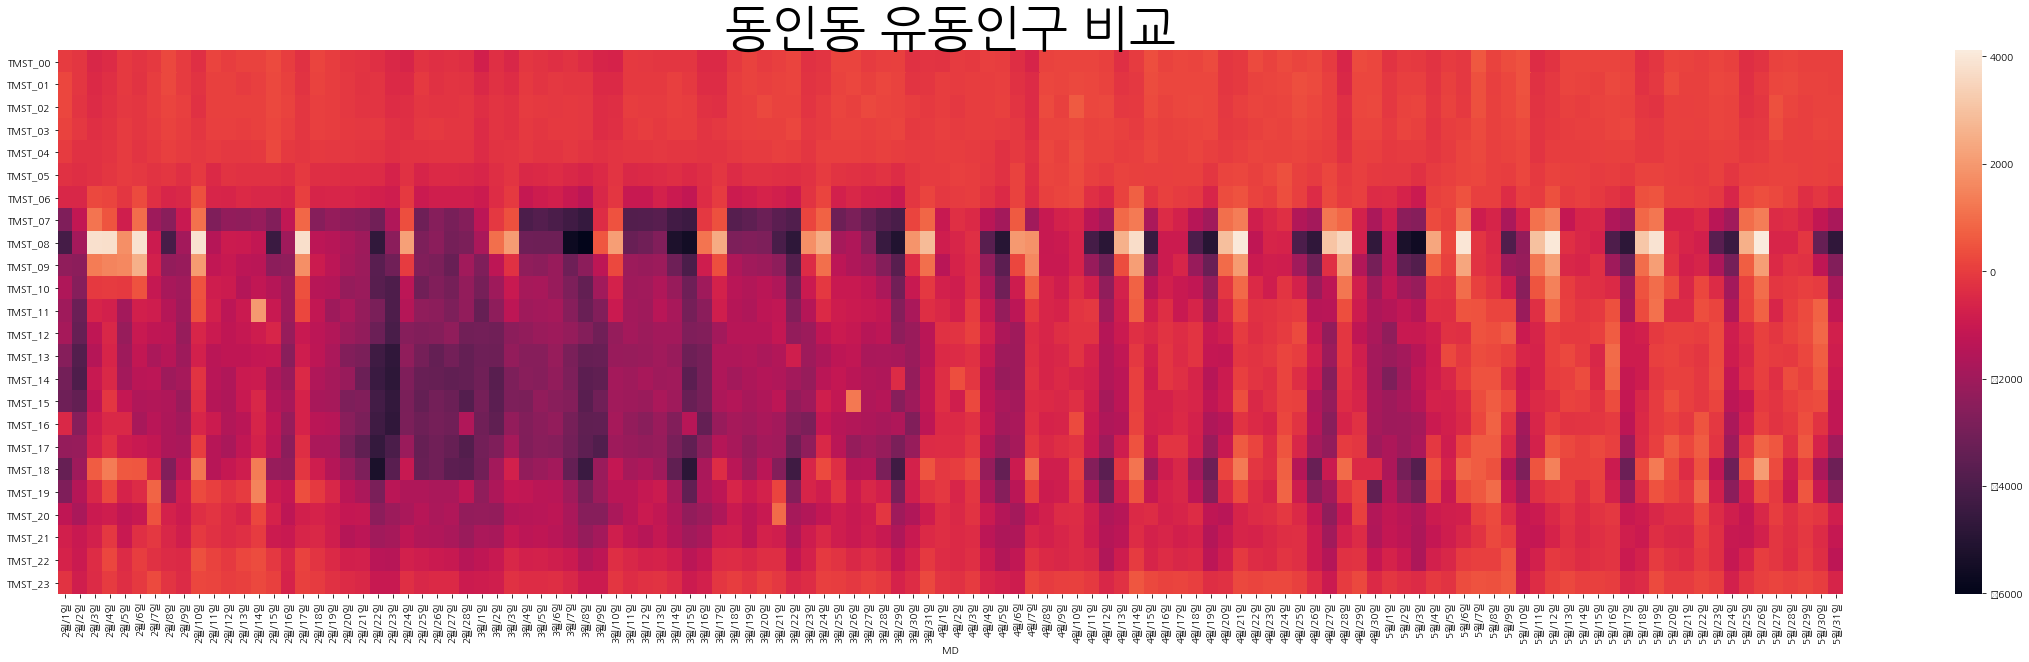

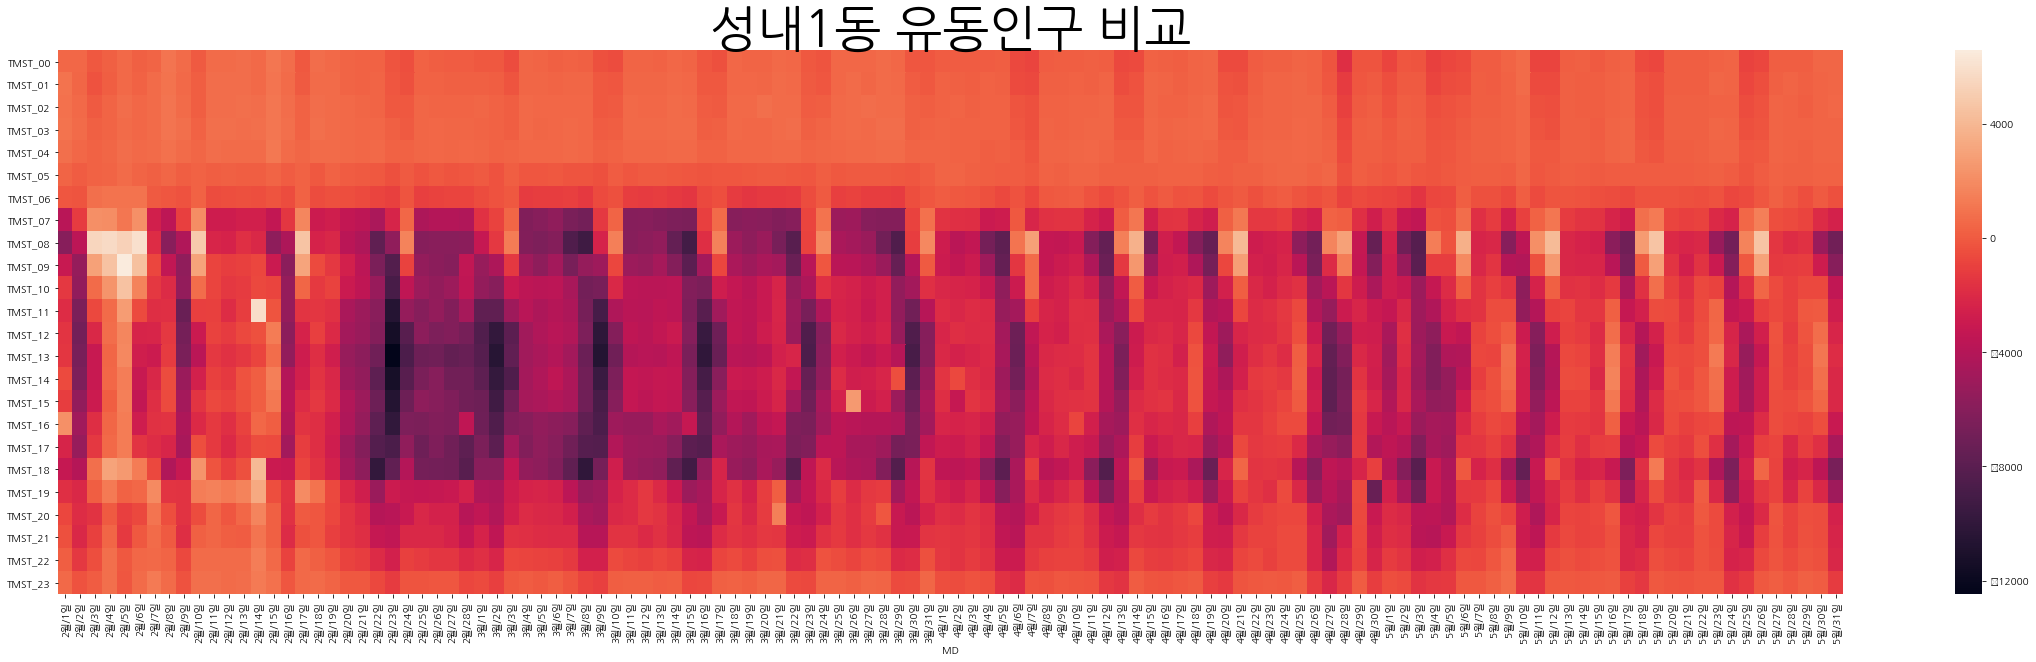

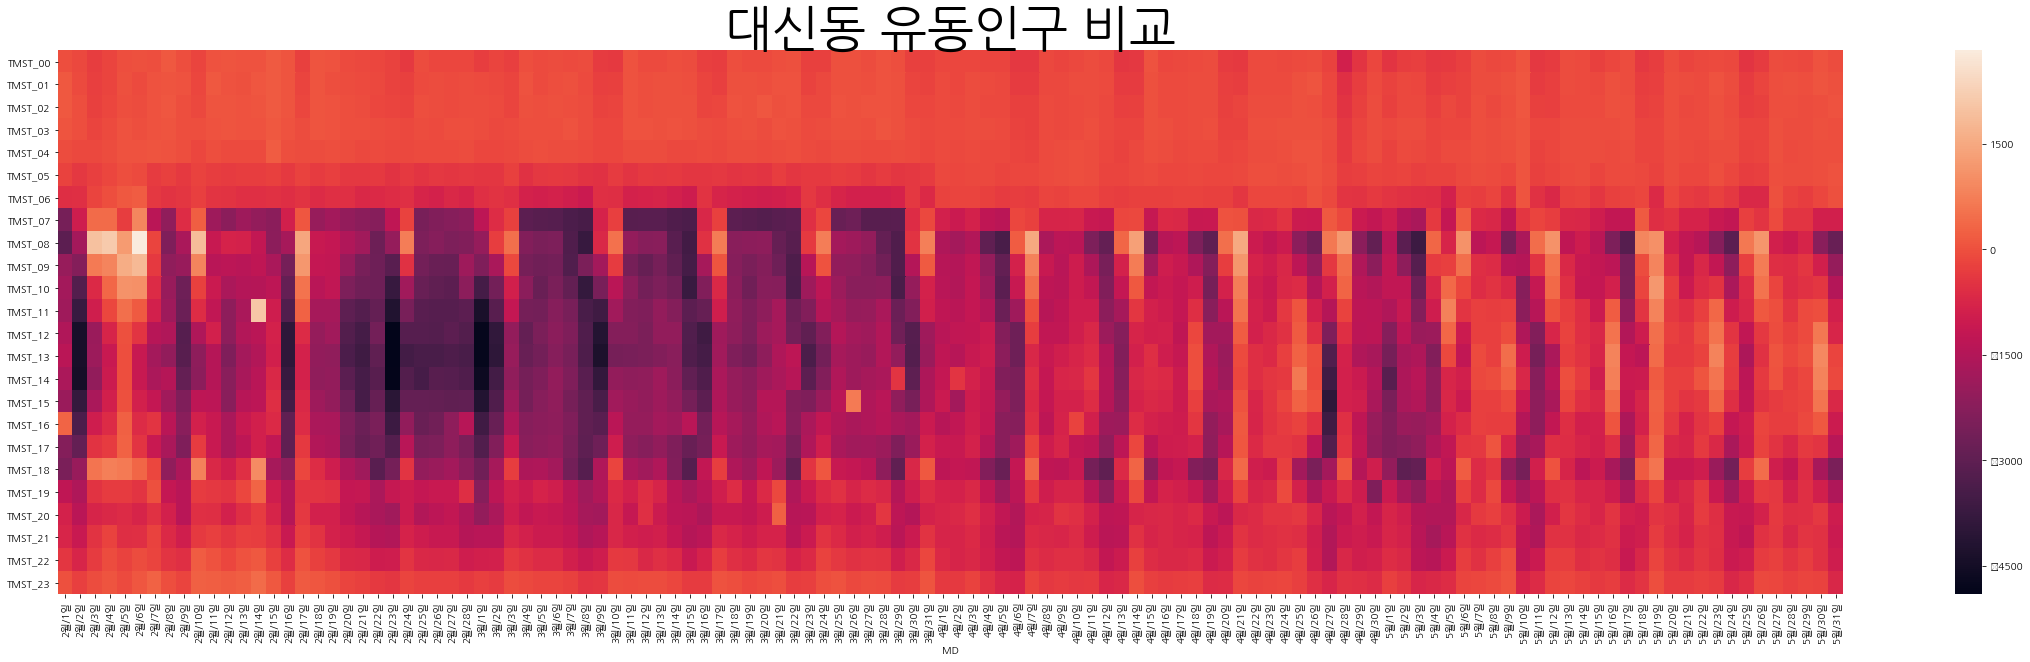

In [163]:
susung = sk_data_TIME[sk_data_TIME.GU_NAME == '대구광역시중구']

for dist_name in list(susung.HDONG_NM.value_counts().index):
    sample = sk_data_TIME[sk_data_TIME['HDONG_NM'] == dist_name]
    sample['STD_YMD'] = pd.to_datetime(sample.STD_YMD, format = '%Y%m%d')
    
    sample['MD'] = sample['STD_YMD'].map(lambda x: str(x.month) + '월' + '/' + str(x.day) + '일')
    
    sample_2019 = sample[sample['STD_YM'] < 202000]
    sample_2020 = sample[sample['STD_YM'] >= 202000]
    
    sample_2019.index = sample_2019.MD
    sample_2020.index = sample_2020.MD
    
    del sample_2019['MD']
    del sample_2020['MD']
    
    sample_2019 = sample_2019.iloc[:, 6:].T
    sample_2020 = sample_2020.iloc[:, 6:].T

    # 2020년 2월 29일 삭제
    del sample_2020['2월/29일']
    sample_total = sample_2020 - sample_2019
    
    plt.figure(figsize = (40,10))
    sns.heatmap(sample_total)
    plt.title(f'{dist_name} 유동인구 비교', fontsize = 50)
    
#     sample_total.astype(int).style.background_gradient(cmap='summer', axis = 1)

# 4. Covid19와의 연관성

In [164]:
# data load

covid = pd.read_excel('/Users/minki/pythonworkspace/bigcon2020/2020dataset/accumulate_covid.xlsx')
covid = covid.iloc[:, [0, 1, 3]]

covid = covid.rename(columns = {'날짜' : 'date', '서울 누적':'accumulate_seoul', '대구 누적':'accumulate_daegu'})

# 첫 행 삭제
covid = covid[1:]

# datetype으로 변경
covid['date'] = pd.to_datetime(covid['date'], format = '%Y%m%d')
covid.index = covid['date']

# 데이터 범위 조정
covid = covid['2020-02-01':'2020-05-31']
covid = covid.fillna(0)

In [165]:
# data 나누기

covid_SEOUL = covid.iloc[:, [0, 1]]
covid_DAEGU = covid.iloc[:, [0, 2]]

In [166]:
# 일별 증가량 데이터 만들기

## seoul
covid_SEOUL_dif = covid_SEOUL - covid_SEOUL.shift(1)
covid_SEOUL_dif = covid_SEOUL_dif.iloc[:, 1]
covid_SEOUL_dif = pd.DataFrame(covid_SEOUL_dif.fillna(0))

## daegu
covid_DAEGU_dif = covid_DAEGU - covid_DAEGU.shift(1)
covid_DAEGU_dif = covid_DAEGU_dif.iloc[:, 1]
covid_DAEGU_dif = pd.DataFrame(covid_DAEGU_dif.fillna(0))

## 4.1 상관관계 확인

https://dacon.io/competitions/official/235618/codeshare/1399

In [167]:
sk_data_TIME_SEOUL = sk_data_TIME[sk_data_TIME['CITY'] == '서울특별시']
sk_data_TIME_DAEGU = sk_data_TIME[sk_data_TIME['CITY'] == '대구광역시']

sk_data_TIME_SEOUL_2020 = sk_data_TIME_SEOUL[sk_data_TIME_SEOUL['STD_YM'] >= 202000]
sk_data_TIME_DAEGU_2020 = sk_data_TIME_DAEGU[sk_data_TIME_DAEGU['STD_YM'] >= 202000]

In [168]:
sk_data_TIME_SEOUL_2020_group = sk_data_TIME_SEOUL_2020.groupby(sk_data_TIME_SEOUL_2020['STD_YMD']).sum().iloc[:, 2:]
sk_data_TIME_DAEGU_2020_group = sk_data_TIME_DAEGU_2020.groupby(sk_data_TIME_DAEGU_2020['STD_YMD']).sum().iloc[:, 2:]

In [169]:
sk_data_TIME_SEOUL_2020_group.index =  pd.to_datetime(sk_data_TIME_SEOUL_2020_group.index, format = '%Y%m%d')
sk_data_TIME_DAEGU_2020_group.index =  pd.to_datetime(sk_data_TIME_DAEGU_2020_group.index, format = '%Y%m%d')

In [170]:
# 차이 데이터 만들기

sk_data_TIME_SEOUL_2020_group_dif = sk_data_TIME_SEOUL_2020_group - sk_data_TIME_SEOUL_2020_group.shift(1)
sk_data_TIME_SEOUL_2020_group_dif = sk_data_TIME_SEOUL_2020_group_dif.fillna(0)

sk_data_TIME_DAEGU_2020_group_dif = sk_data_TIME_DAEGU_2020_group - sk_data_TIME_DAEGU_2020_group.shift(1)
sk_data_TIME_DAEGU_2020_group_dif = sk_data_TIME_DAEGU_2020_group_dif.fillna(0)

In [171]:
covid_SEOUL_dif_merge = pd.concat([covid_SEOUL_dif, sk_data_TIME_SEOUL_2020_group_dif], axis = 1) 
covid_DAEGU_dif_merge = pd.concat([covid_DAEGU_dif, sk_data_TIME_DAEGU_2020_group_dif], axis = 1)

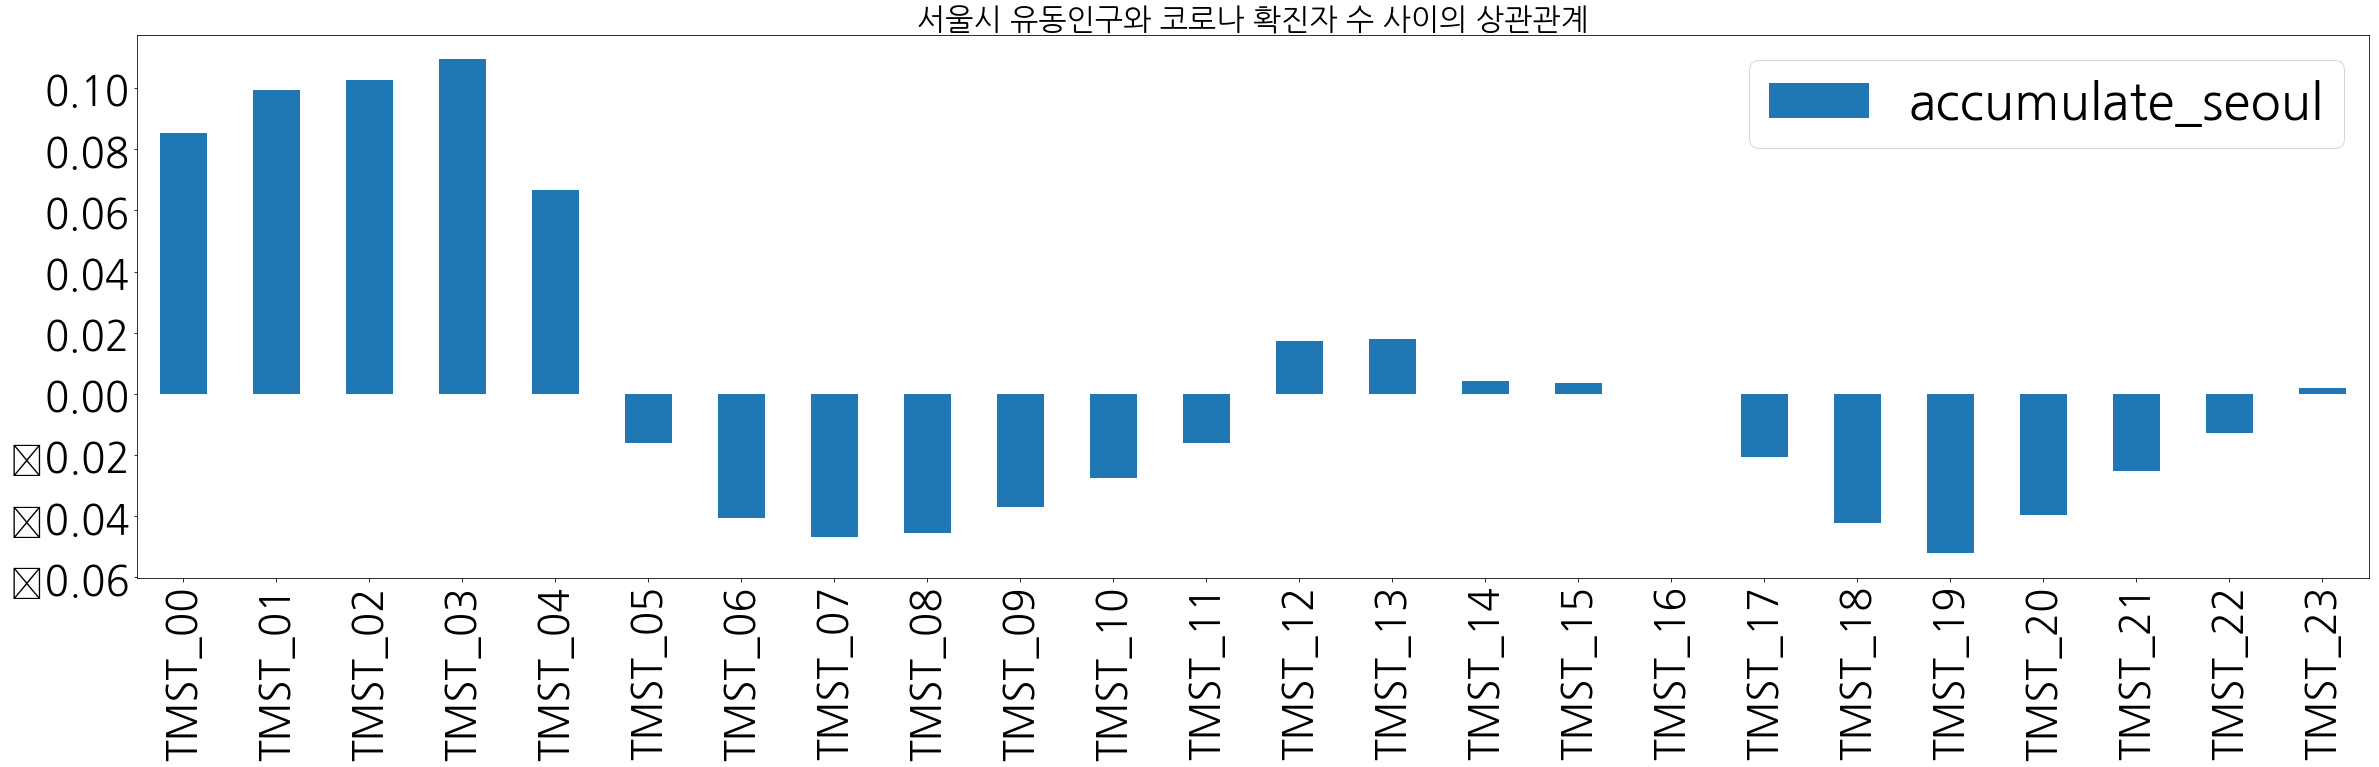

In [172]:
plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(covid_SEOUL_dif_merge.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('서울시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 50)

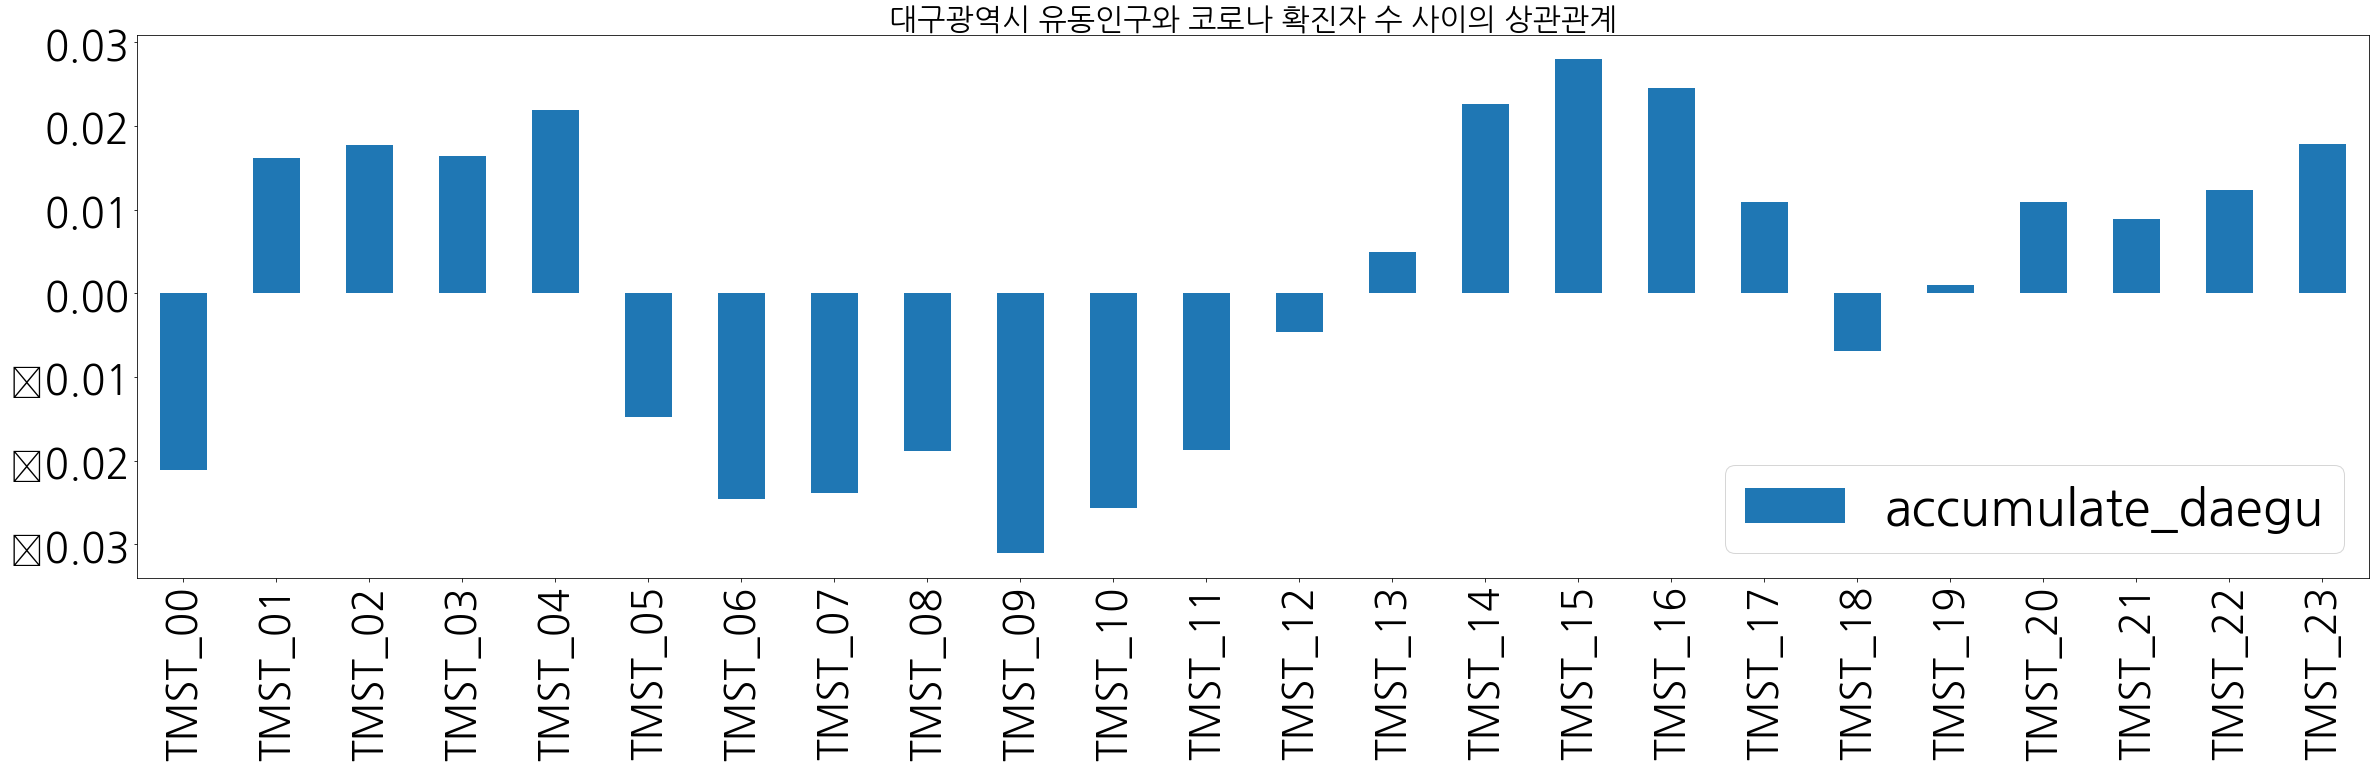

In [173]:
plt.rcParams["figure.figsize"] = (40,10)
pd.DataFrame(covid_DAEGU_dif_merge.corr().iloc[0, 1:]).plot(kind = 'bar')
plt.title('대구광역시 유동인구와 코로나 확진자 수 사이의 상관관계', fontsize = 30)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(fontsize = 50)